## Ray Jennings
## Exploratory Data Analysis (EDA) on NYC's Yellow Taxi Trip Records for January, March and May 2020

## **NYC Yellow Taxi Zones:**
![SegmentLocal](taxi_zone_map_manhattan_alt.png "segment")

![SegmentLocal](taxi_zone_lookup-1.png "segment")
<br>
![SegmentLocal](taxi_zone_lookup-2.png "segment")
<br>
![SegmentLocal](taxi_zone_lookup-3.png "segment")
<br>
![SegmentLocal](taxi_zone_lookup-4.png "segment")
<br>
![SegmentLocal](taxi_zone_lookup-5.png "segment")
<br>
![SegmentLocal](taxi_zone_lookup-6.png "segment")
<br>
![SegmentLocal](taxi_zone_lookup-7.png "segment")
<br>
![SegmentLocal](taxi_zone_lookup-8.png "segment")
<br>
![SegmentLocal](taxi_zone_lookup-9.png "segment")
<br>

<br>

### Help on understanding what the various taxi terms mean: https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf
<br>

# **Part I - EDA Classic Approach**

In [1]:
import os
import datetime, time
import tempfile, urllib, zipfile
import warnings
import random

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd

# Default matplot figure size and font size
fig_x = 16
fig_y = 9
title_size = '20'

### **Read January, March, May CSV files:**

In [2]:
#
# Read CSV files
#

# Jan dataset
jan_file = "./data/yellow_tripdata_2020-01.csv"

# March dataset
march_file = "./data/yellow_tripdata_2020-03.csv"

# May dataset
may_file = "./data/yellow_tripdata_2020-05.csv"

# taxi zone dataset
taxizone_file = "./data/taxi_zone_lookup.csv"

print("Read CSV files...\n")
print("   reading January csv file...")
jan_taxi_data = pd.read_csv(jan_file, low_memory=False)
print("   reading March csv file...")
march_taxi_data = pd.read_csv(march_file, low_memory=False)
print("   reading May csv file...")
may_taxi_data = pd.read_csv(may_file, low_memory=False)
print("   reading Taxi Zone csv file...")
taxizone_data = pd.read_csv(taxizone_file, low_memory=False)
print("\nDone")

Read CSV files...

   reading January csv file...
   reading March csv file...
   reading May csv file...
   reading Taxi Zone csv file...

Done


## **Create January, March, May dataframes**

In [3]:
#
# Create Jan, March, May data-frames
#

jan_df = pd.DataFrame(jan_taxi_data)
march_df = pd.DataFrame(march_taxi_data)
may_df = pd.DataFrame(may_taxi_data)
taxizone_df = pd.DataFrame(taxizone_data)

# Setup the geozone dataframe
geozone_df = gpd.read_file('./taxi_zones.shp').to_crs({'init' :'epsg:4326'})
geozone_df.set_index('LocationID', inplace=True)

# Let the file data garbage collect
jan_taxi_data = None
march_taxi_data = None
may_taxi_data = None
taxizone_data = None

## **Dataframe shapes**

In [4]:
print("\nJan data-frame shape:\n")
print("   ", end="")
print(jan_df.shape)
print("")

print("\nMarch data-frame shape:\n")
print("   ", end="")
print(march_df.shape)
print("")

print("\nMay data-frame shape:\n")
print("   ", end="")
print(may_df.shape)
print("")

print("\nTaxi Zone data-frame shape:\n")
print("   ", end="")
print(taxizone_df.shape)
print("")




Jan data-frame shape:

   (6405008, 18)


March data-frame shape:

   (3007292, 18)


May data-frame shape:

   (348371, 18)


Taxi Zone data-frame shape:

   (265, 4)



### **Show the labels for each dataframe**

In [5]:
#
# Show the labels for each data-frame
#

print("\nJanuary data-set column names...\n")
print(jan_df.columns)
print("\n")

print("\nMarch data-set column names...\n")
print(march_df.columns)
print("\n")

print("\nMay data-set column names...\n")
print(may_df.columns)
print("\n")


January data-set column names...

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')



March data-set column names...

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')



May data-set column names...

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULo

## **Compare each dataframes' labels to be sure they match**

In [6]:
#
# Compare data-frame labels from each set to make sure they match
#

print("\nCompare column labels of all sets to check if they al match....\n")

march_cols = march_df.columns
may_cols = may_df.columns
jan_cols = jan_df.columns

# common_cols = march_cols.intersection(may_cols)

march_not_jan = march_cols.difference(jan_cols)
march_not_may = march_cols.difference(may_cols)

if not march_not_jan.empty:
    print("ERROR: March and January labels do not match:\n")
    print(march_not_may)
else:
    print("   January and March labels match")

if not march_not_may.empty:
    print("ERROR: March and May labels do not match:\n")
    print(march_not_may)
else:
    print("   March and May labels match")
    
print("")
    
if march_not_may.empty and march_not_jan.empty:
    print("Jan, May and March data-frame labels match\n\n")


Compare column labels of all sets to check if they al match....

   January and March labels match
   March and May labels match

Jan, May and March data-frame labels match




## **View of missing values for the March dataset**

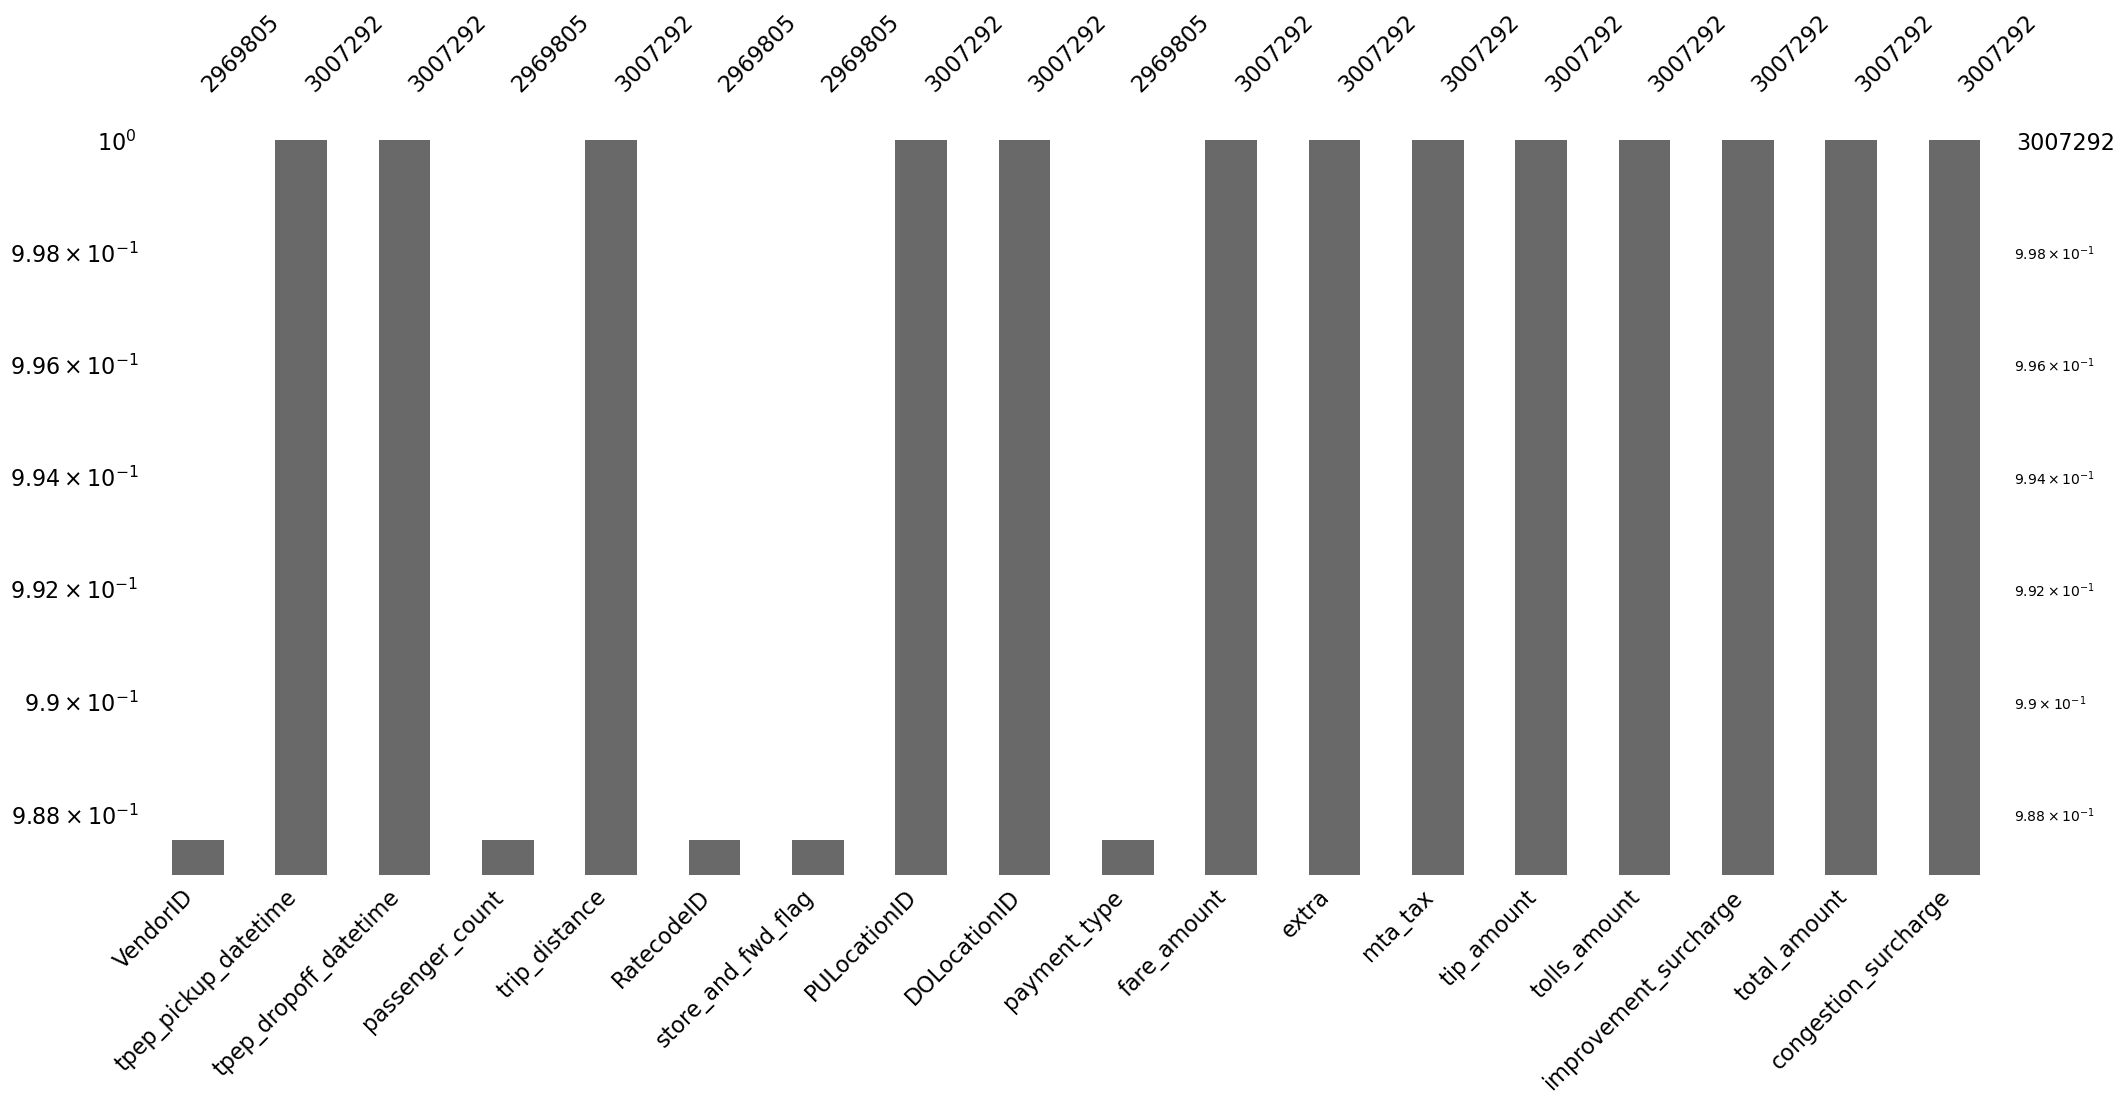

In [7]:
import missingno as msno

# msno.matrix(march_df, sparkline=True);
msno.bar(march_df, log=True);

In [8]:
# msno.heatmap(march_df);

## **View of dendrogram of the missing values for the March dataset**

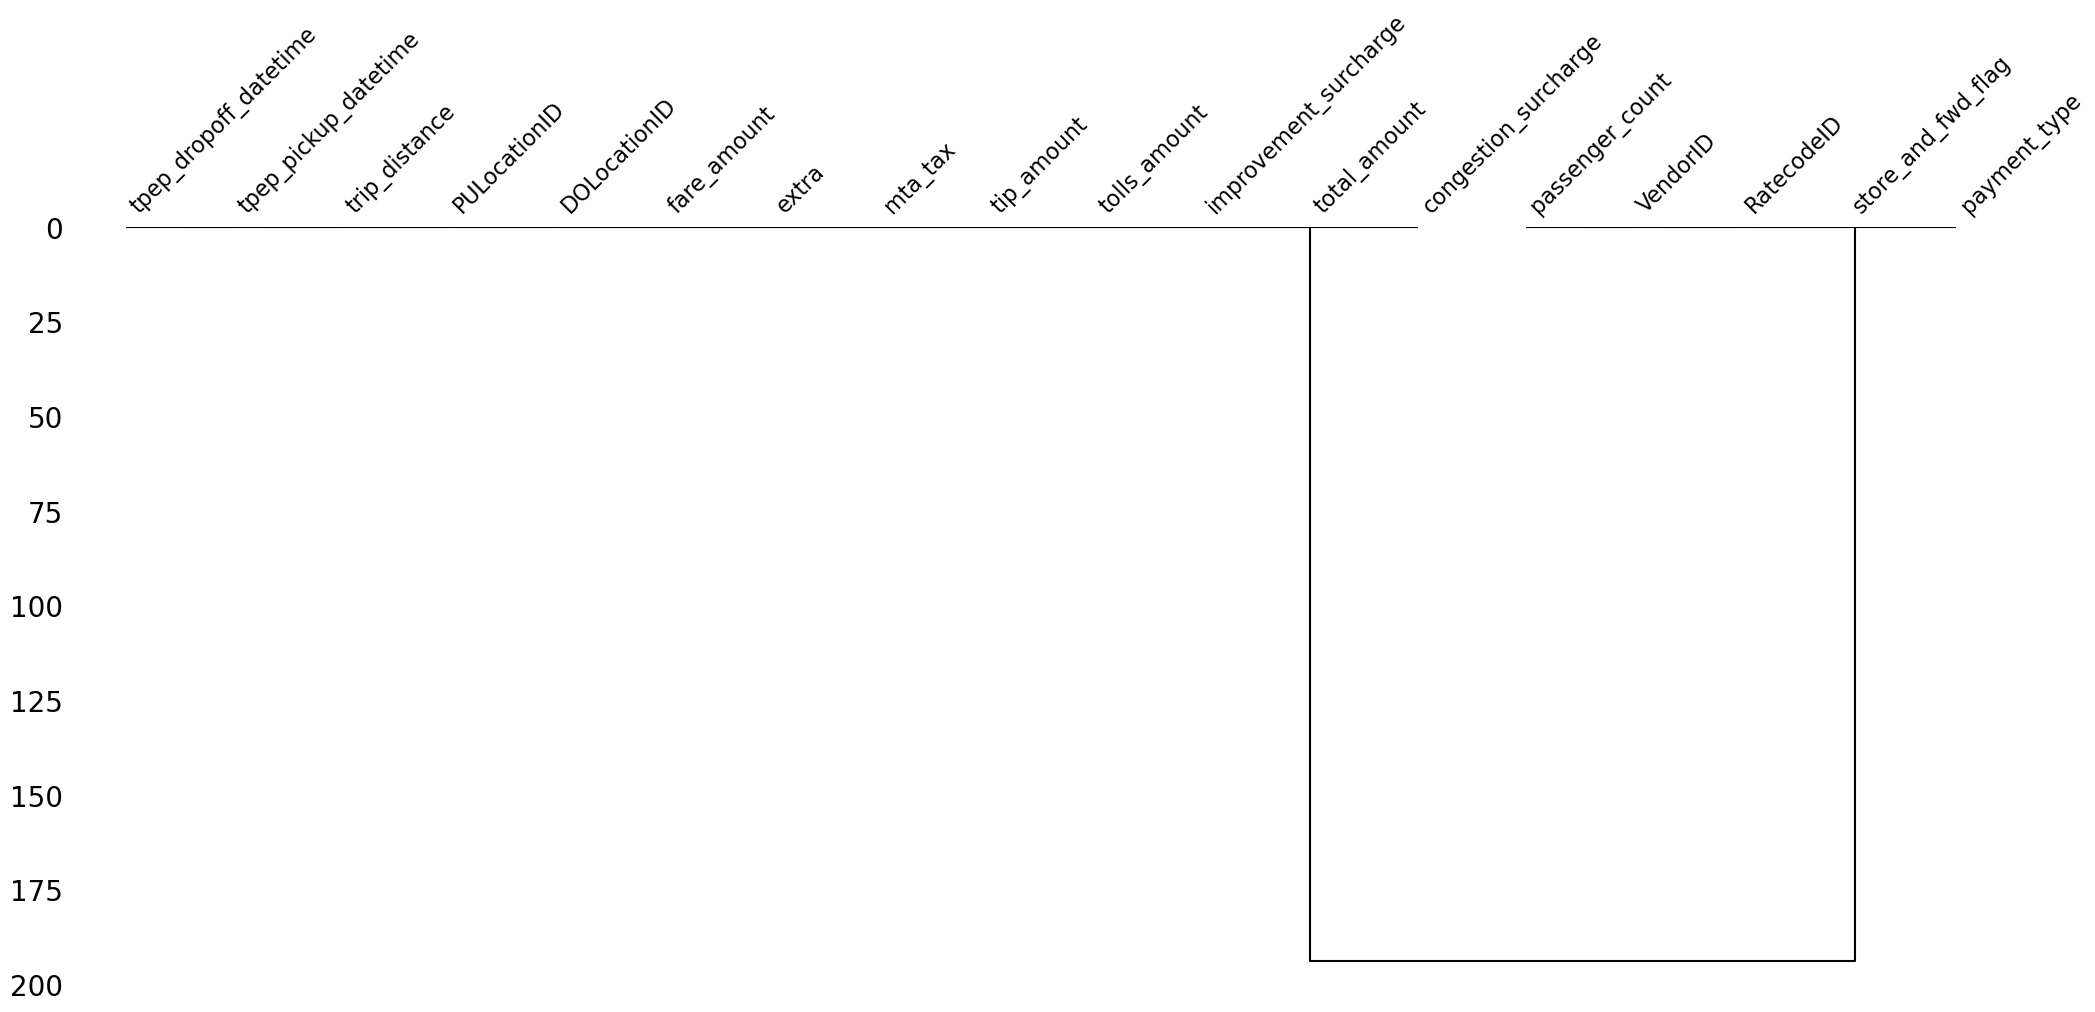

In [9]:
#
# Diagram that shows the hierarchical relationship of missing values
#

msno.dendrogram(march_df);  # method='weighted'  # method type is defined in scipy

<br>
<br>

# **Let's start fixing and optimizing the datasets...**
<br>

## **Fix dataframes where the months are not correct for each dataset: (January, March, May)**
Only change a row when both the pick-up and drop-off months are wrong | pick-up is right but drop-off is wrong | pick-up is right but drop-off is wrong.<br>
Some rows have a pick-up day on the day before the month begins or a drop-off day the first day after the month ends. These values are okay.<br>

In [10]:
#
# Fix datetime rows where BOTH pickup and dropoff are not the number they should be
#  In some cases the pick-up time is the last day of the previous mont and the drop-off is the 1st of the month
#  For example: pick-up on Feb 29, 2020 and drop-off on March 1, 2020
#

print("\nJan data-frame, March data-frame, May data-frame: Fix rows that have (both) the wrong months...")

def fix_bad_jan_dates(row):
    day1 = row['tpep_pickup_datetime'][8:]
    row['tpep_pickup_datetime'] = "2020-01-" + day1
    day2 = row['tpep_dropoff_datetime'][8:]
    row['tpep_dropoff_datetime'] = "2020-01-" + day2
    #print("new: " + row['tpep_pickup_datetime'] + " " + row['tpep_dropoff_datetime'])
    return row

def fix_bad_march_dates(row):
    day1 = row['tpep_pickup_datetime'][8:]
    row['tpep_pickup_datetime'] = "2020-03-" + day1
    day2 = row['tpep_dropoff_datetime'][8:]
    row['tpep_dropoff_datetime'] = "2020-03-" + day2
    return row

def fix_bad_may_dates(row):
    day1 = row['tpep_pickup_datetime'][8:]
    row['tpep_pickup_datetime'] = "2020-05-" + day1
    day2 = row['tpep_dropoff_datetime'][8:]
    row['tpep_dropoff_datetime'] = "2020-05-" + day2
    return row

print("   Fixing January dates...", end="")
new_jan_df = jan_df.loc[(~jan_df['tpep_pickup_datetime'].str.contains('2020-01') | ~jan_df['tpep_dropoff_datetime'].str.contains('2020-01'))]
new_jan_df = new_jan_df.loc[~(new_jan_df['tpep_pickup_datetime'].str.contains('2020-01-31') & new_jan_df['tpep_dropoff_datetime'].str.contains('2020-02-01'))]
new_jan_df = new_jan_df.loc[~(new_jan_df['tpep_pickup_datetime'].str.contains('2019-12-31') & new_jan_df['tpep_dropoff_datetime'].str.contains('2020-01-01'))]
new_jan_df = new_jan_df.apply(fix_bad_jan_dates, axis=1)
print(str(len(new_jan_df)) + " rows")
jan_df.loc[new_jan_df.index, :] = new_jan_df[:]

print("   Fixing March dates...", end="")
new_march_df = march_df.loc[(~march_df['tpep_pickup_datetime'].str.contains('2020-03') | ~march_df['tpep_dropoff_datetime'].str.contains('2020-03'))]
new_march_df = new_march_df.loc[~(new_march_df['tpep_pickup_datetime'].str.contains('2020-03-31') & new_march_df['tpep_dropoff_datetime'].str.contains('2020-04-01'))]
new_march_df = new_march_df.loc[~(new_march_df['tpep_pickup_datetime'].str.contains('2020-02-29') & new_march_df['tpep_dropoff_datetime'].str.contains('2020-03-01'))]
new_march_df = new_march_df.apply(fix_bad_march_dates, axis=1)
print(str(len(new_march_df)) + " rows")
march_df.loc[new_march_df.index, :] = new_march_df[:]

print("   Fixing May dates...", end="")
#new_may_df = may_df.loc[(~may_df['tpep_pickup_datetime'].str.contains('2020-05') & ~may_df['tpep_dropoff_datetime'].str.contains('2020-05')) & ~(may_df['tpep_pickup_datetime'].str.contains('2020-05-31') & may_df['tpep_dropoff_datetime'].str.contains('2020-06-01')) & ~(may_df['tpep_pickup_datetime'].str.contains('2020-04-30') & may_df['tpep_dropoff_datetime'].str.contains('2020-05-01'))].apply(fix_bad_may_dates, axis=1)
new_may_df = may_df.loc[(~may_df['tpep_pickup_datetime'].str.contains('2020-05') | ~may_df['tpep_dropoff_datetime'].str.contains('2020-05'))]
new_may_df = new_may_df.loc[~(new_may_df['tpep_pickup_datetime'].str.contains('2020-05-31') & new_may_df['tpep_dropoff_datetime'].str.contains('2020-06-01'))]
new_may_df = new_may_df.loc[~(new_may_df['tpep_pickup_datetime'].str.contains('2020-04-30') & new_may_df['tpep_dropoff_datetime'].str.contains('2020-05-01'))]
new_may_df = new_may_df.apply(fix_bad_may_dates, axis=1)
print(str(len(new_may_df)) + " rows")
may_df.loc[new_may_df.index, :] = new_may_df[:]

print("Done\n\n")


Jan data-frame, March data-frame, May data-frame: Fix rows that have (both) the wrong months...
   Fixing January dates...151 rows
   Fixing March dates...237 rows
   Fixing May dates...21 rows
Done




## **Convert** _tpep_pickup_datetime_ **and** _tpep_pickup_datetime_ **from string to python** _datetime_ **type**

In [11]:
#
# Convert pickup and dropoff times from string type to python datetime type
#

print("\nJConvert tpep_pickup_datetime and tpep_dropoff_datetime to 'datetime' python types...")

print("   January")
jan_df['tpep_pickup_datetime'] = pd.to_datetime(jan_df['tpep_pickup_datetime'])
jan_df['tpep_dropoff_datetime'] = pd.to_datetime(jan_df['tpep_dropoff_datetime'])

print("   March")
march_df['tpep_pickup_datetime'] = pd.to_datetime(march_df['tpep_pickup_datetime'])
march_df['tpep_dropoff_datetime'] = pd.to_datetime(march_df['tpep_dropoff_datetime'])

print("   May")
may_df['tpep_pickup_datetime'] = pd.to_datetime(may_df['tpep_pickup_datetime'])
may_df['tpep_dropoff_datetime'] = pd.to_datetime(may_df['tpep_dropoff_datetime'])

print("Done\n\n")


JConvert tpep_pickup_datetime and tpep_dropoff_datetime to 'datetime' python types...
   January
   March
   May
Done




## **Create new unixtime columns for the pick-up and drop-off values - data type will be** _int64_

In [12]:
#
# Create unix-time columns for pickup and dropoff to keep in integer format
#

print("\nCreate 'unixtime' columns for pickup and dropoff in int64 format...")

march_df['pickup_unix_time'] = march_df['tpep_pickup_datetime'].astype(np.int64)
march_df['dropoff_unix_time'] = march_df['tpep_dropoff_datetime'].astype(np.int64)

may_df['pickup_unix_time'] = may_df['tpep_pickup_datetime'].astype(np.int64)
may_df['dropoff_unix_time'] = may_df['tpep_dropoff_datetime'].astype(np.int64)

jan_df['pickup_unix_time'] = jan_df['tpep_pickup_datetime'].astype(np.int64)
jan_df['dropoff_unix_time'] = jan_df['tpep_dropoff_datetime'].astype(np.int64)

print("")
print("Done")


Create 'unixtime' columns for pickup and dropoff in int64 format...

Done


<br>

## **Add a new column:** _trip_in_seconds_ **(for the trip duration) - data type will be** _int64_

In [13]:
#
# Add a trip-in-seconds column for trip_duration - int64 data type
#

jan_df['trip_duration'] = (jan_df['tpep_dropoff_datetime'] - jan_df['tpep_pickup_datetime'])
march_df['trip_duration'] = (march_df['tpep_dropoff_datetime'] - march_df['tpep_pickup_datetime'])
may_df['trip_duration'] = (may_df['tpep_dropoff_datetime'] - may_df['tpep_pickup_datetime'])

# Fix negative trip times
jan_df['trip_duration'] = jan_df['trip_duration'].abs()
march_df['trip_duration'] = march_df['trip_duration'].abs()
may_df['trip_duration'] = may_df['trip_duration'].abs()

jan_df['trip_in_seconds'] = jan_df['trip_duration'].dt.total_seconds()
march_df['trip_in_seconds'] = march_df['trip_duration'].dt.total_seconds()
may_df['trip_in_seconds'] = may_df['trip_duration'].dt.total_seconds()

# Fix negative time values by taking the abs
jan_df['trip_in_seconds'] = jan_df['trip_in_seconds'].abs().astype(np.int64)
march_df['trip_in_seconds'] = march_df['trip_in_seconds'].abs().astype(np.int64)
may_df['trip_in_seconds'] = may_df['trip_in_seconds'].abs().astype(np.int64)

<br>

## **Let's see the missing values (_NaN_) in the January dataset**
#### Notice the same number of missing values are the same for the columns that do have missing values

In [14]:
#
# Show NaN values in Jan dataset
#

print("\nJan Data-Frame: Find NaN values...")
print("")
for col in jan_df:
    print(col +': '+ np.str(jan_df[col].isna().sum()))

print("\n\n")


Jan Data-Frame: Find NaN values...

VendorID: 65441
tpep_pickup_datetime: 0
tpep_dropoff_datetime: 0
passenger_count: 65441
trip_distance: 0
RatecodeID: 65441
store_and_fwd_flag: 65441
PULocationID: 0
DOLocationID: 0
payment_type: 65441
fare_amount: 0
extra: 0
mta_tax: 0
tip_amount: 0
tolls_amount: 0
improvement_surcharge: 0
total_amount: 0
congestion_surcharge: 0
pickup_unix_time: 0
dropoff_unix_time: 0
trip_duration: 0
trip_in_seconds: 0





## **Fix all _NaN_ values in January dataset**
#### Take a weighted random value of the particular columns

In [15]:
#
# Jan Data-Frame - Fix NaN values
#

print("\nJan Data-Frame: Fix (NaN) missing values...\n")

# Fix VendorID NaN values

print("   Fix NaN values for VendorID...and convert from float to int")
vendor_1 = len(jan_df[(jan_df['VendorID'] == 1.0)])
vendor_2 = len(jan_df[(jan_df['VendorID'] == 2.0)])

#print(vendor_1)
#print(vendor_2)

def fix_jan_vendor_values(row):
    row['VendorID'] = random.choices([1.0, 2.0], weights=((vendor_1/(vendor_1 + vendor_2)), (vendor_2/(vendor_1 + vendor_2))), k=1)[0]
    #print(row['VendorID'])
    return row

new_jan_df = jan_df.loc[jan_df['VendorID'].isnull()].apply(fix_jan_vendor_values, axis=1)

jan_df.loc[new_jan_df.index, :] = new_jan_df[:]
jan_df['VendorID'] = jan_df['VendorID'].astype(np.int64)

# Fix payment_type NaN values
print("   Fix NaN values for payment_type...and convert from float to int")
payment_type_1 = len(jan_df[(jan_df['payment_type'] == 1.0)])
payment_type_2 = len(jan_df[(jan_df['payment_type'] == 2.0)])

def fix_jan_payment_values(row):
    row['payment_type'] = random.choices([1.0, 2.0], weights=((payment_type_1/(payment_type_1 + payment_type_2)), (payment_type_2/(payment_type_1 + payment_type_2))), k=1)[0]
    return row

new_jan_df = jan_df.loc[jan_df['payment_type'].isnull()].apply(fix_jan_payment_values, axis=1)
jan_df.loc[new_jan_df.index, :] = new_jan_df[:]

jan_df['payment_type'] = jan_df['payment_type'].astype(np.int64)

print("   Fix NaN values for passenger_count...and concever from float to int")
jan_df['passenger_count'].fillna(1.0, inplace=True)
jan_df['passenger_count'].replace(to_replace=0.0, value=1.0, inplace=True)
jan_df['passenger_count'] = jan_df['passenger_count'].astype(np.int64)

print("   Fix NaN values for RatecodeID...and convert from float to int")
jan_df['RatecodeID'].fillna(1.0, inplace=True)
jan_df['RatecodeID'] = jan_df['RatecodeID'].astype(np.int64)

print("   Drop store_and_fwd_flag column...(I think it's useless)")
if 'store_and_fwd_flag' in jan_df:
    jan_df.drop('store_and_fwd_flag', inplace=True, axis=1)

print("\nDone\n")


Jan Data-Frame: Fix (NaN) missing values...

   Fix NaN values for VendorID...and convert from float to int
   Fix NaN values for payment_type...and convert from float to int
   Fix NaN values for passenger_count...and concever from float to int
   Fix NaN values for RatecodeID...and convert from float to int
   Drop store_and_fwd_flag column...(I think it's useless)

Done



## **January dataset should no longer have any _NaN_ values in any column**

In [16]:
#
# Jan Data-Frame: Show NaN values - should be none left
#

print("\nJan Data-Frame: All NaN values should be gone...\n")

for col in jan_df:
    print(col +': '+ np.str(jan_df[col].isna().sum()))
    
print("\nJan Data-Frame: All NaN values are gone")
print("\n\n")


Jan Data-Frame: All NaN values should be gone...

VendorID: 0
tpep_pickup_datetime: 0
tpep_dropoff_datetime: 0
passenger_count: 0
trip_distance: 0
RatecodeID: 0
PULocationID: 0
DOLocationID: 0
payment_type: 0
fare_amount: 0
extra: 0
mta_tax: 0
tip_amount: 0
tolls_amount: 0
improvement_surcharge: 0
total_amount: 0
congestion_surcharge: 0
pickup_unix_time: 0
dropoff_unix_time: 0
trip_duration: 0
trip_in_seconds: 0

Jan Data-Frame: All NaN values are gone





## **Let's see the missing values (_NaN_) in the March dataset**
#### Notice the same number of missing values are the same for the columns that do have missing values

In [17]:
#
# Show NaN values in March dataset
#

print("\nMarch Data-Frame: Find NaN values...")
print("")
for col in march_df:
    s = march_df[col].isna().sum()
    if s:
        print(col +': '+ np.str(march_df[col].isna().sum()))
    else:
        print(col +': '+ np.str(march_df[col].isna().sum()))

print("\n\n")


March Data-Frame: Find NaN values...

VendorID: 37487
tpep_pickup_datetime: 0
tpep_dropoff_datetime: 0
passenger_count: 37487
trip_distance: 0
RatecodeID: 37487
store_and_fwd_flag: 37487
PULocationID: 0
DOLocationID: 0
payment_type: 37487
fare_amount: 0
extra: 0
mta_tax: 0
tip_amount: 0
tolls_amount: 0
improvement_surcharge: 0
total_amount: 0
congestion_surcharge: 0
pickup_unix_time: 0
dropoff_unix_time: 0
trip_duration: 0
trip_in_seconds: 0





## **Fix all _NaN_ values in March dataset**
#### Take a weighted random value of the particular columns

In [18]:
#
# March Data-Frame - Fix NaN values
#

print("\nMarch Data-Frame: Fix (NaN) missing values...\n")

# Fix VendorID NaN values

print("   Find NaN values for VendorID...and convert from float to int")
vendor_1 = len(march_df[(march_df['VendorID'] == 1.0)])
vendor_2 = len(march_df[(march_df['VendorID'] == 2.0)])
      
def fix_march_vendor_values(row):
    row['VendorID'] = random.choices([1.0, 2.0], weights=((vendor_1/(vendor_1 + vendor_2)), (vendor_2/(vendor_1 + vendor_2))), k=1)[0]
    return row

new_march_df = march_df.loc[march_df['VendorID'].isnull()].apply(fix_march_vendor_values, axis=1)
march_df.loc[new_march_df.index, :] = new_march_df[:]

# Convert VendorID from float to int type
march_df['VendorID'] = march_df['VendorID'].astype(np.int64)


# Fix payment_type NaN values

print("   Find NaN values for payment_type...and convert from float to int")
payment_type_1 = len(march_df[(march_df['payment_type'] == 1.0)])
payment_type_2 = len(march_df[(march_df['payment_type'] == 2.0)])

def fix_march_payment_values(row):
    row['payment_type'] = random.choices([1.0, 2.0], weights=((payment_type_1/(payment_type_1 + payment_type_2)), (payment_type_2/(payment_type_1 + payment_type_2))), k=1)[0]
    return row

new_march_df = march_df.loc[march_df['payment_type'].isnull()].apply(fix_march_payment_values, axis=1)
march_df.loc[new_march_df.index, :] = new_march_df[:]

# Convert payment_type from float to int
march_df['payment_type'] = march_df['payment_type'].astype(np.int64)


print("   Find NaN values for passenger_count...and convert from float to int")
march_df['passenger_count'].fillna(1.0, inplace=True)
march_df['passenger_count'].replace(to_replace=0.0, value=1.0, inplace=True)
march_df['passenger_count'] = march_df['passenger_count'].astype(np.int64)

print("   Fix NaN values for RatecodeID...and convert from float to int")
march_df['RatecodeID'].fillna(1.0, inplace=True)
march_df['RatecodeID'] = march_df['RatecodeID'].astype(np.int64)

print("   Drop store_and_fwd_flag column...doesn't seem very useful (I think)")
if 'store_and_fwd_flag' in march_df:
    march_df.drop('store_and_fwd_flag', inplace=True, axis=1)

print("\nDone\n")


March Data-Frame: Fix (NaN) missing values...

   Find NaN values for VendorID...and convert from float to int
   Find NaN values for payment_type...and convert from float to int
   Find NaN values for passenger_count...and convert from float to int
   Fix NaN values for RatecodeID...and convert from float to int
   Drop store_and_fwd_flag column...doesn't seem very useful (I think)

Done



## **March dataset should no longer have any _NaN_ values in any column**

In [19]:
#
# March Data-Frame: Show NaN values - should be none left
#

print("\nMarch Data-Frame: All NaN values should be gone...\n")

for col in march_df:
    print(col +': '+ np.str(march_df[col].isna().sum()))

print("\nMarch Data-Frame: All NaN values are gone")
print("\n\n\n")


March Data-Frame: All NaN values should be gone...

VendorID: 0
tpep_pickup_datetime: 0
tpep_dropoff_datetime: 0
passenger_count: 0
trip_distance: 0
RatecodeID: 0
PULocationID: 0
DOLocationID: 0
payment_type: 0
fare_amount: 0
extra: 0
mta_tax: 0
tip_amount: 0
tolls_amount: 0
improvement_surcharge: 0
total_amount: 0
congestion_surcharge: 0
pickup_unix_time: 0
dropoff_unix_time: 0
trip_duration: 0
trip_in_seconds: 0

March Data-Frame: All NaN values are gone






## **Let's see the missing values (_NaN_) in the May dataset**
#### Notice that once again, the same number of missing values are the same for the columns that have missing values.

In [20]:
#
# Show NaN values in May dataset
#

print("\nMay Data-Frame: Find NaN values...")
print("")
for col in may_df:
    print(col +': '+ np.str(may_df[col].isna().sum()))

print("\n\n")


May Data-Frame: Find NaN values...

VendorID: 58891
tpep_pickup_datetime: 0
tpep_dropoff_datetime: 0
passenger_count: 58891
trip_distance: 0
RatecodeID: 58891
store_and_fwd_flag: 58891
PULocationID: 0
DOLocationID: 0
payment_type: 58891
fare_amount: 0
extra: 0
mta_tax: 0
tip_amount: 0
tolls_amount: 0
improvement_surcharge: 0
total_amount: 0
congestion_surcharge: 0
pickup_unix_time: 0
dropoff_unix_time: 0
trip_duration: 0
trip_in_seconds: 0





## **Fix all _NaN_ values in May dataset**
#### Take a weighted random value of the particular columns

In [21]:
#
# May Data-Frame - Fix NaN values
#

print("\nMay Data-Frame: Fix (NaN) missing values...\n")

# Fix VendorID NaN values

print("   Find NaN values for VendorID...and convert from float to int")
vendor_1 = len(may_df[(may_df['VendorID'] == 1.0)])
vendor_2 = len(may_df[(may_df['VendorID'] == 2.0)])
      
def fix_may_vendor_values(row):
    row['VendorID'] = random.choices([1.0, 2.0], weights=((vendor_1/(vendor_1 + vendor_2)), (vendor_2/(vendor_1 + vendor_2))), k=1)[0]
    return row

new_may_df = may_df.loc[may_df['VendorID'].isnull()].apply(fix_may_vendor_values, axis=1)
may_df.loc[new_may_df.index, :] = new_may_df[:]

may_df['VendorID'] = may_df['VendorID'].astype(np.int64)

# Fix payment_type NaN values
print("   Find NaN values for payment_type...and convert from float to int")
payment_type_1 = len(may_df[(may_df['payment_type'] == 1.0)])
payment_type_2 = len(may_df[(may_df['payment_type'] == 2.0)])

def fix_may_payment_values(row):
    row['payment_type'] = random.choices([1.0, 2.0], weights=((payment_type_1/(payment_type_1 + payment_type_2)), (payment_type_2/(payment_type_1 + payment_type_2))), k=1)[0]
    return row

new_may_df = may_df.loc[may_df['payment_type'].isnull()].apply(fix_may_payment_values, axis=1)
may_df.loc[new_may_df.index, :] = new_may_df[:]

may_df['payment_type'] = may_df['payment_type'].astype(np.int64)

print("   Find NaN values for passenger_count...and convert from float to int")
may_df['passenger_count'].fillna(1.0, inplace=True)
may_df['passenger_count'].replace(to_replace=0.0, value=1.0, inplace=True)
may_df['passenger_count'] = may_df['passenger_count'].astype(np.int64)

print("   Find NaN values for RatecodeID...and convert from float to int")
may_df['RatecodeID'].fillna(1.0, inplace=True)
may_df['RatecodeID'] = may_df['RatecodeID'].astype(int)

print("   Drop store_and_fwd_flag column...it seems useless (still!)")
if 'store_and_fwd_flag' in may_df:
    may_df.drop('store_and_fwd_flag', inplace=True, axis=1)

print("\nDone\n")


May Data-Frame: Fix (NaN) missing values...

   Find NaN values for VendorID...and convert from float to int
   Find NaN values for payment_type...and convert from float to int
   Find NaN values for passenger_count...and convert from float to int
   Find NaN values for RatecodeID...and convert from float to int
   Drop store_and_fwd_flag column...it seems useless (still!)

Done



### **May dataset should no longer have any _NaN_ values in any column**

In [22]:
#
# May Data-Frame: Show NaN values - should be none left
#

print("\nMay Data-Frame: All NaN values should be gone...\n")

for col in may_df:
    print(col +': '+ np.str(may_df[col].isna().sum()))
    
print("\nMay Data-Frame: All NaN values are gone")
print("\n\n")


May Data-Frame: All NaN values should be gone...

VendorID: 0
tpep_pickup_datetime: 0
tpep_dropoff_datetime: 0
passenger_count: 0
trip_distance: 0
RatecodeID: 0
PULocationID: 0
DOLocationID: 0
payment_type: 0
fare_amount: 0
extra: 0
mta_tax: 0
tip_amount: 0
tolls_amount: 0
improvement_surcharge: 0
total_amount: 0
congestion_surcharge: 0
pickup_unix_time: 0
dropoff_unix_time: 0
trip_duration: 0
trip_in_seconds: 0

May Data-Frame: All NaN values are gone





# **- All January, March and May datasets' rows have full values - no _NaN_ values anywhere!**<br><br>

### **January dataframe _info_:**

In [23]:
jan_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype          
---  ------                 --------------    -----          
 0   VendorID               6405008 non-null  int64          
 1   tpep_pickup_datetime   6405008 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  6405008 non-null  datetime64[ns] 
 3   passenger_count        6405008 non-null  int64          
 4   trip_distance          6405008 non-null  float64        
 5   RatecodeID             6405008 non-null  int64          
 6   PULocationID           6405008 non-null  int64          
 7   DOLocationID           6405008 non-null  int64          
 8   payment_type           6405008 non-null  int64          
 9   fare_amount            6405008 non-null  float64        
 10  extra                  6405008 non-null  float64        
 11  mta_tax                6405008 non-null  float64        
 12  tip_amount    

### **March dataframe _info_:**

In [24]:
march_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007292 entries, 0 to 3007291
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype          
---  ------                 --------------    -----          
 0   VendorID               3007292 non-null  int64          
 1   tpep_pickup_datetime   3007292 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  3007292 non-null  datetime64[ns] 
 3   passenger_count        3007292 non-null  int64          
 4   trip_distance          3007292 non-null  float64        
 5   RatecodeID             3007292 non-null  int64          
 6   PULocationID           3007292 non-null  int64          
 7   DOLocationID           3007292 non-null  int64          
 8   payment_type           3007292 non-null  int64          
 9   fare_amount            3007292 non-null  float64        
 10  extra                  3007292 non-null  float64        
 11  mta_tax                3007292 non-null  float64        
 12  tip_amount    

### **May dataframe _info_:**

In [25]:
may_df.info(null_counts=True)
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348371 entries, 0 to 348370
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   VendorID               348371 non-null  int64          
 1   tpep_pickup_datetime   348371 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  348371 non-null  datetime64[ns] 
 3   passenger_count        348371 non-null  int64          
 4   trip_distance          348371 non-null  float64        
 5   RatecodeID             348371 non-null  int64          
 6   PULocationID           348371 non-null  int64          
 7   DOLocationID           348371 non-null  int64          
 8   payment_type           348371 non-null  int64          
 9   fare_amount            348371 non-null  float64        
 10  extra                  348371 non-null  float64        
 11  mta_tax                348371 non-null  float64        
 12  tip_amount             348371 

# **Let's look closer at the feature values**
## Find outliers and make adjustments

<br>
<br>

### **Look at passenger count values**

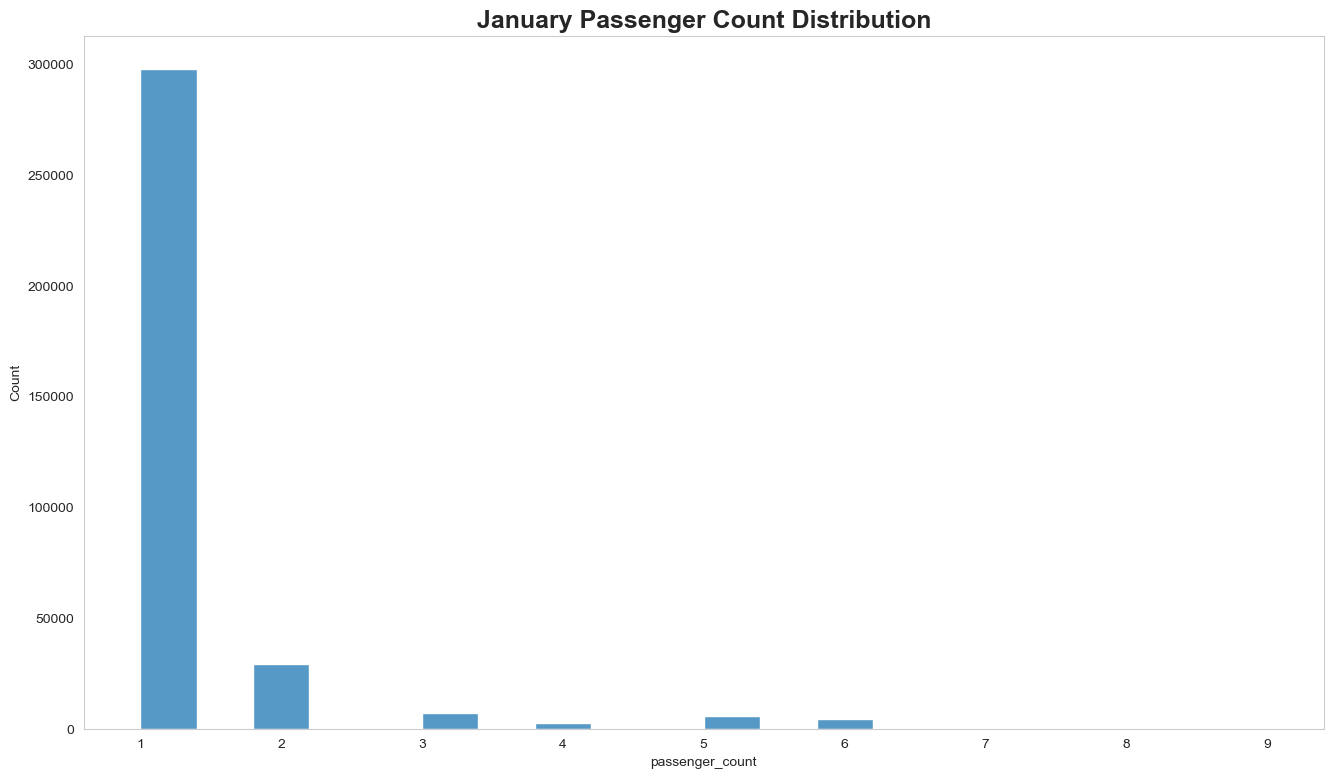

[1 2 3 4 5 6 7 8 9]

Seems okay - maybe 9 people can fit in a yellow taxi van?






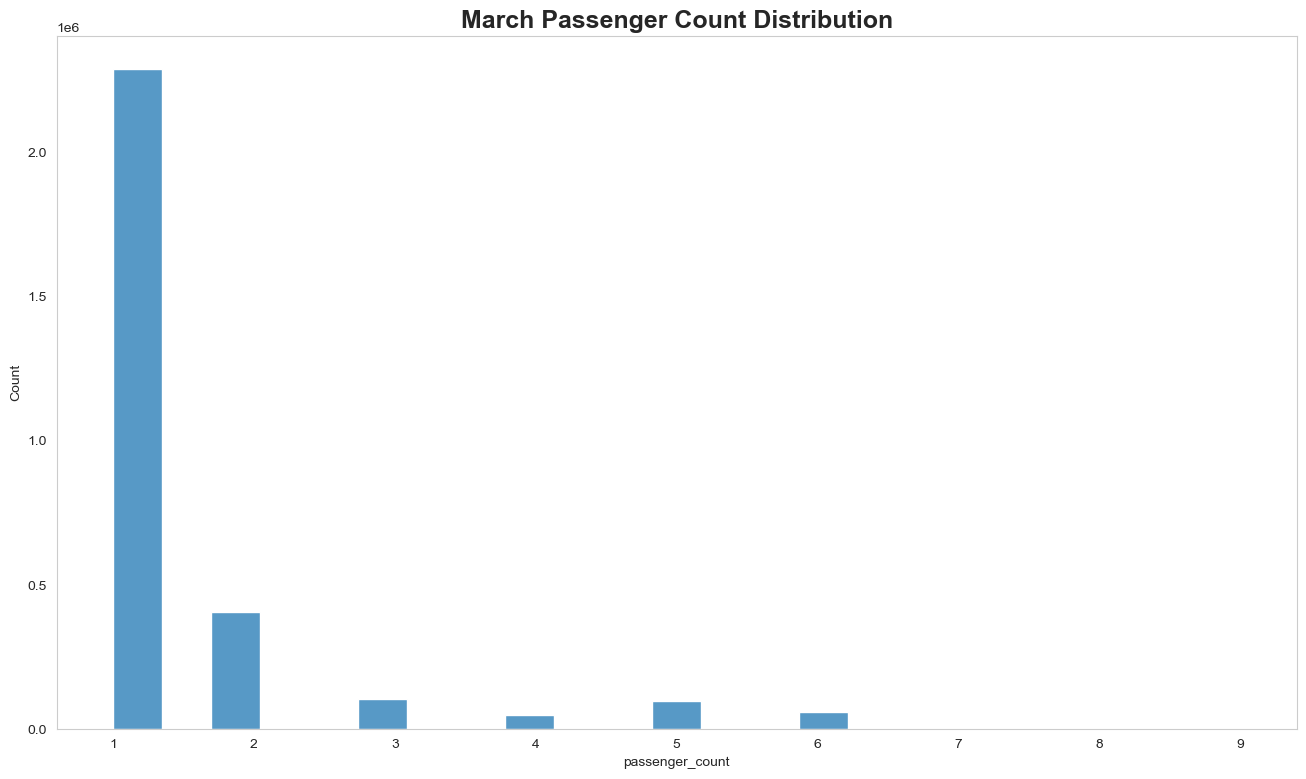

[1 2 3 4 5 6 7 8 9]
* No more zero passenger values (fixed previously)







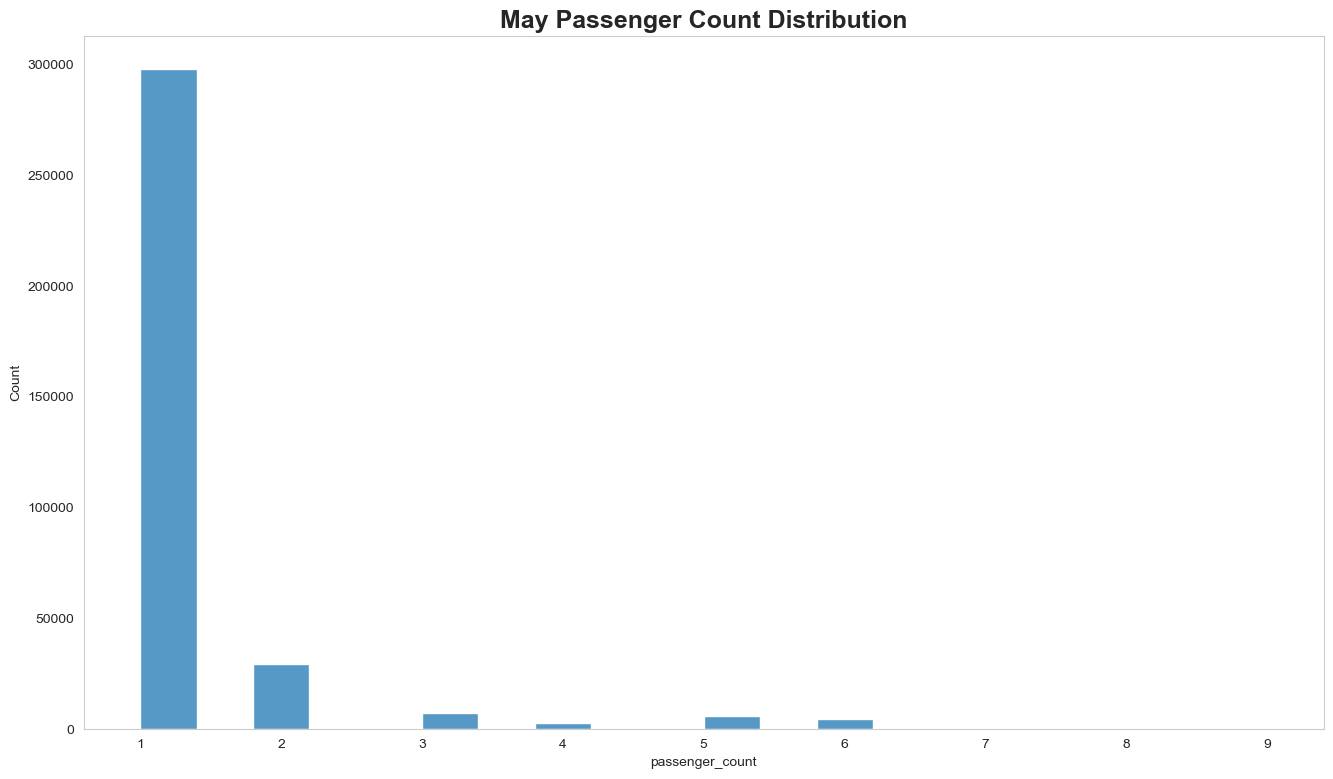

[1 2 3 4 5 6 8 9]






In [26]:
#
# Look at Jan passenger count values
#

print("\n\n")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(may_df['passenger_count'])
plt.title('January Passenger Count Distribution', weight='bold', fontsize='18')
plt.show();

print(np.sort(jan_df['passenger_count'].unique()))
print("\nSeems okay - maybe 9 people can fit in a yellow taxi van?\n")
print("\n\n")

#
# Look at March passenger count values
#
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(march_df['passenger_count'])
plt.title('March Passenger Count Distribution', weight='bold', fontsize='18')
plt.show();

print(np.sort(march_df['passenger_count'].unique()))
print("* No more zero passenger values (fixed previously)\n")
print("\n\n")

#
# Look at May passenger count values
#
print("")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(may_df['passenger_count'])
plt.title('May Passenger Count Distribution', weight='bold', fontsize='18')
plt.show();

print(np.sort(may_df['passenger_count'].unique()))
print("\n\n\n")

### **Look at Vendor ID values**

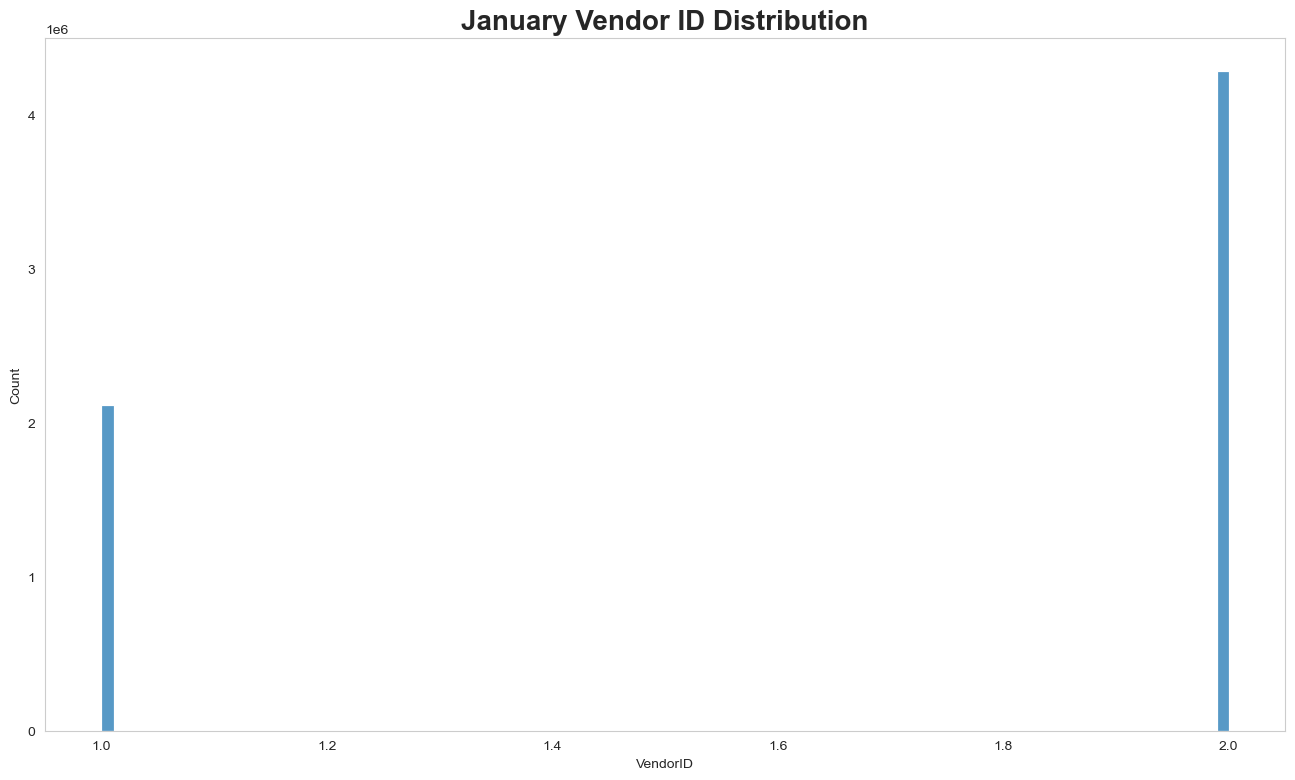

[1 2]
There are only 2 values...Good!






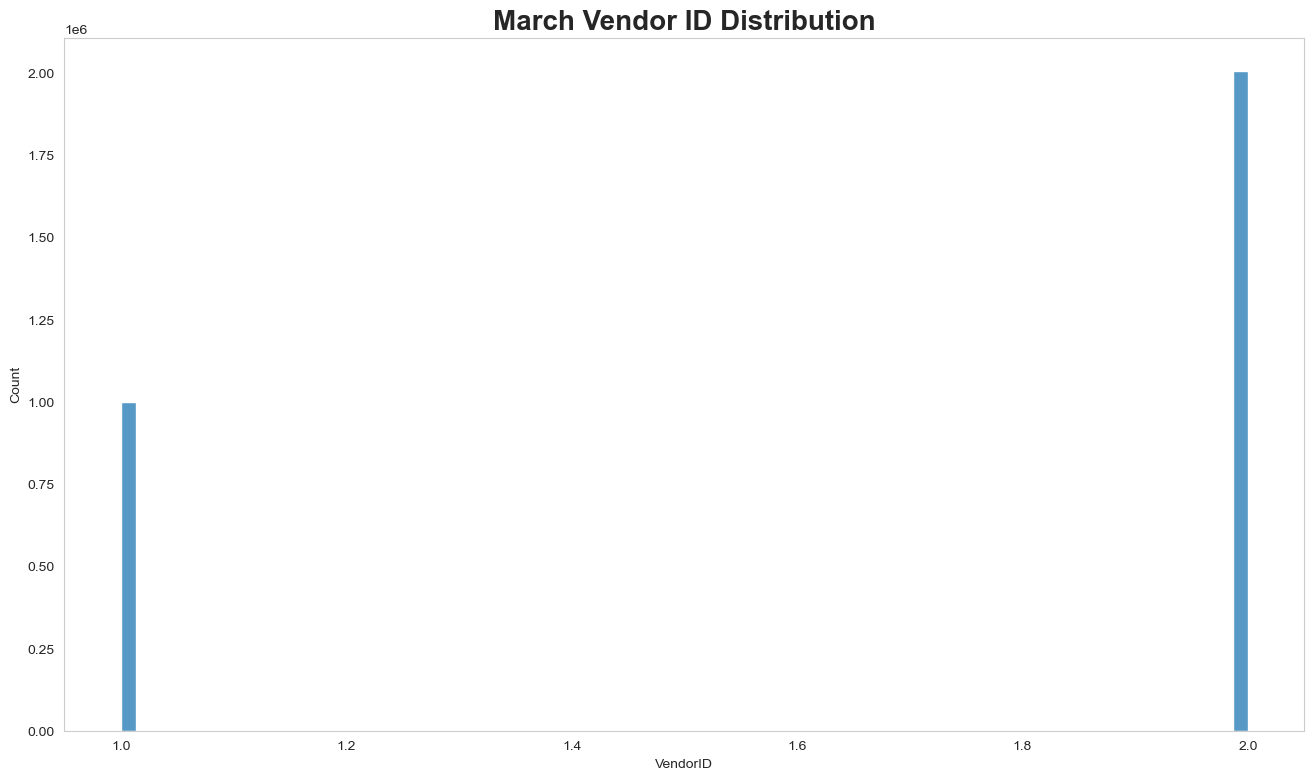

[1 2]
There are only 2 values...Good!






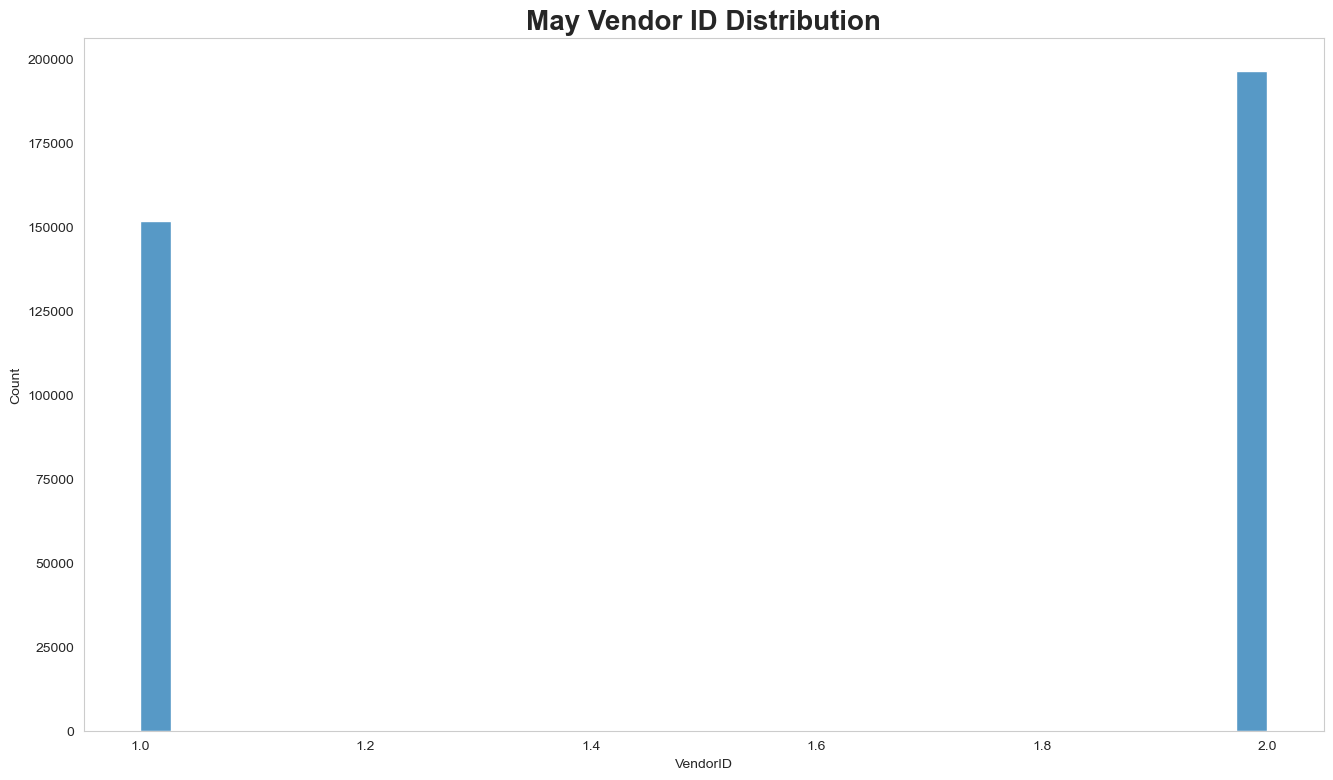

[1 2]
There are only 2 values...Good!






In [27]:
#
# Look at Jan VendorID values
#

print("\n\n")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(jan_df['VendorID'])
plt.title('January Vendor ID Distribution', weight='bold', fontsize=title_size)
plt.show();

print(np.sort(jan_df['VendorID'].unique()))
print("There are only 2 values...Good!\n")
print("\n\n")


#
# Look at March VendorID values
#
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(march_df['VendorID'])
plt.title('March Vendor ID Distribution', weight='bold', fontsize=title_size)
plt.show();

print(np.sort(march_df['VendorID'].unique()))
print("There are only 2 values...Good!\n")
print("\n\n")



#
# Look at May VendorID values
#
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(may_df['VendorID'])
plt.title('May Vendor ID Distribution', weight='bold', fontsize=title_size)
plt.show();

print(np.sort(may_df['VendorID'].unique()))
print("There are only 2 values...Good!\n")
print("\n\n")

### **Look at rate-code values:**

**Valid Rate Codes:**<br>
1 = Standard rate<br>
2 = JFK<br>
3 = Newark<br>
4 = Nassau or Westchester<br>
5 = Negotiated fare<br>
6 = Group ride<br>

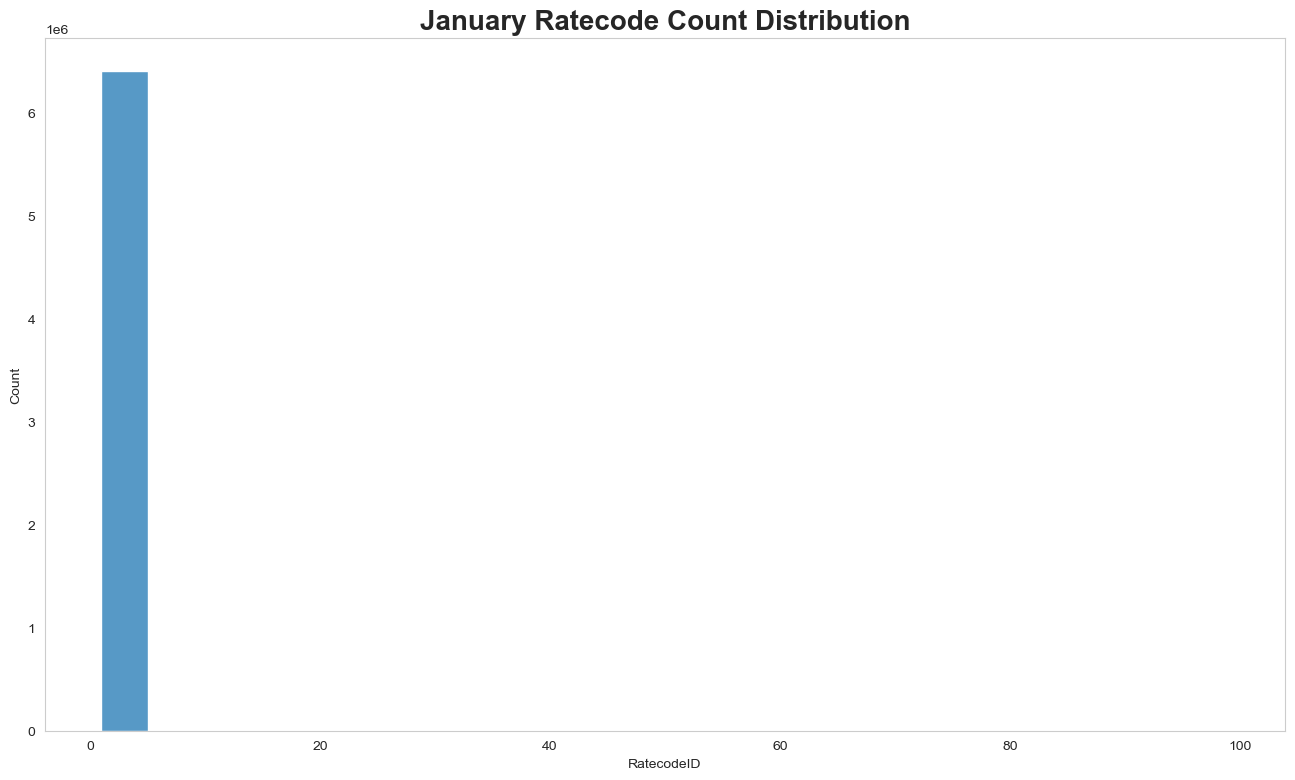

[ 1  2  3  4  5  6 99]

Uh oh....a value of 99 is not valid!

99 is not a valid rate-code
Changing all 99 values to 1



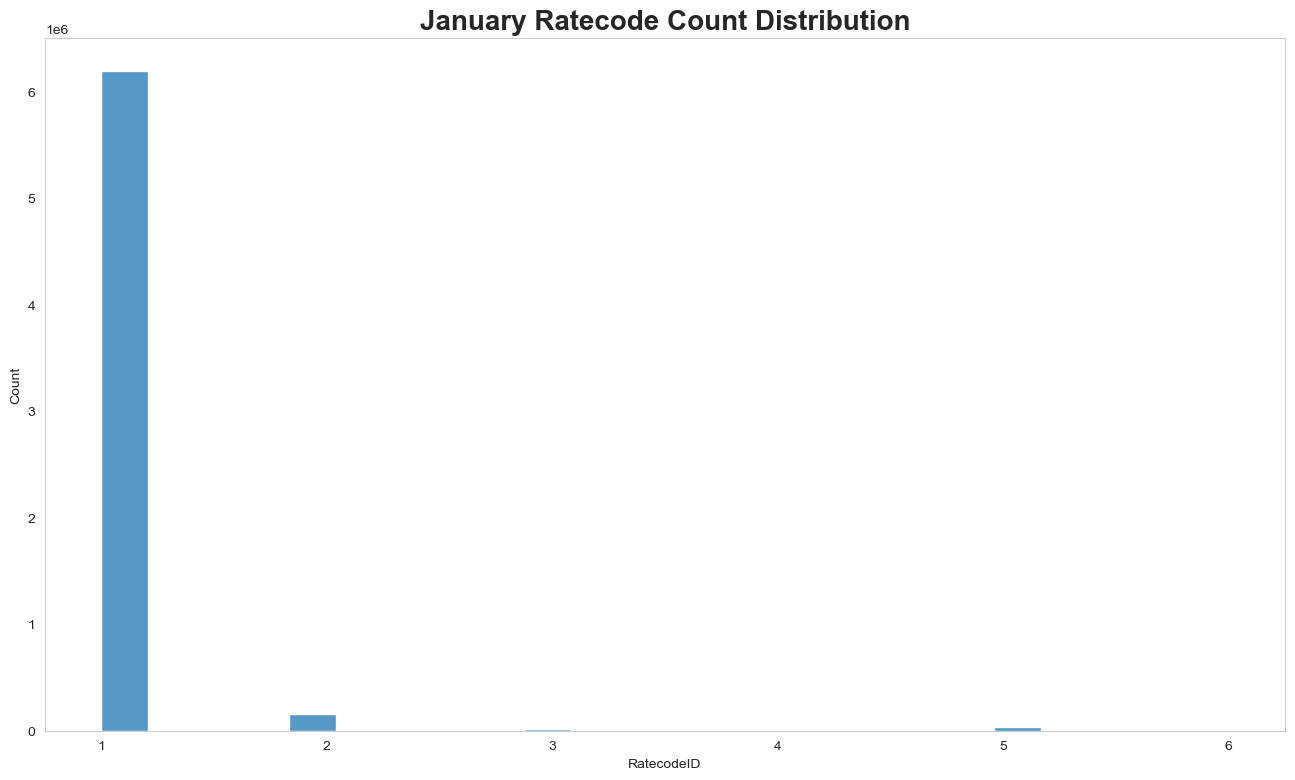

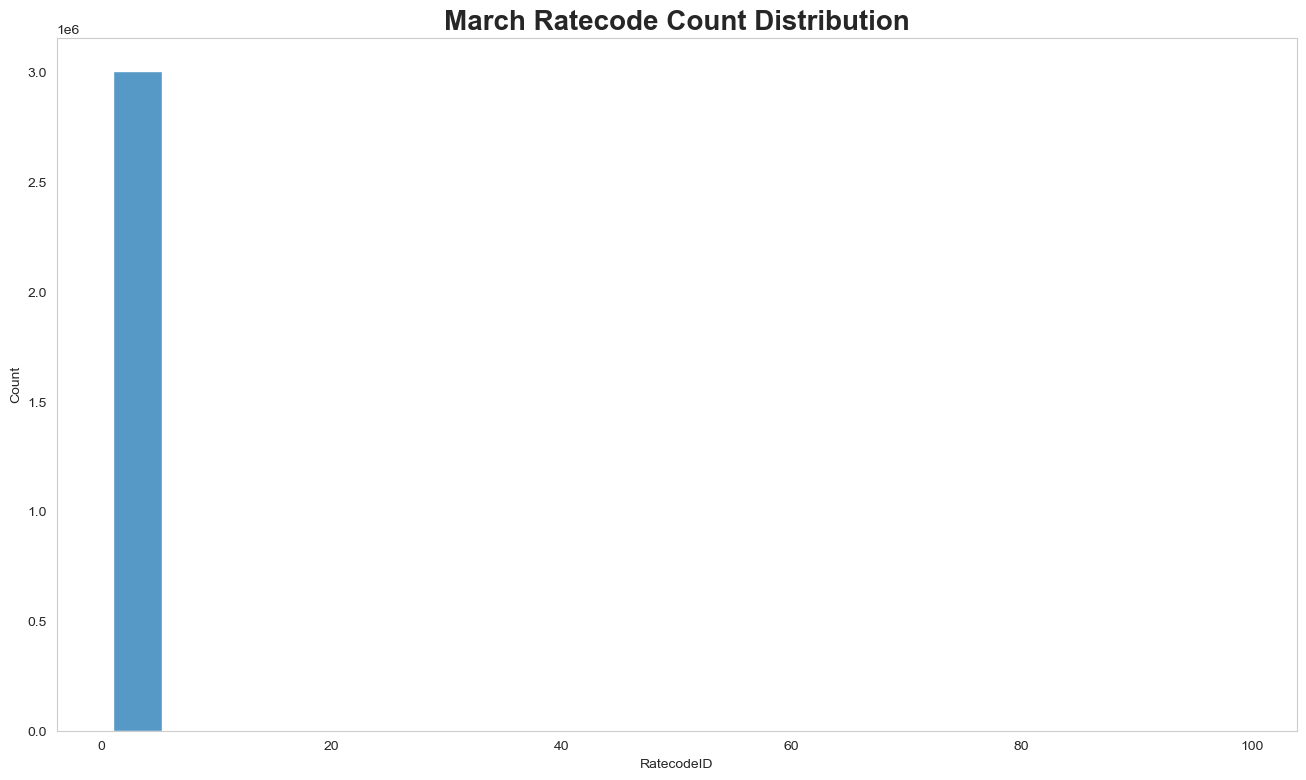

[ 1  2  3  4  5  6 99]

Uh oh....a value of 99 is not valid!


99 is not a valid rate-code
Changing all 99 values to 1



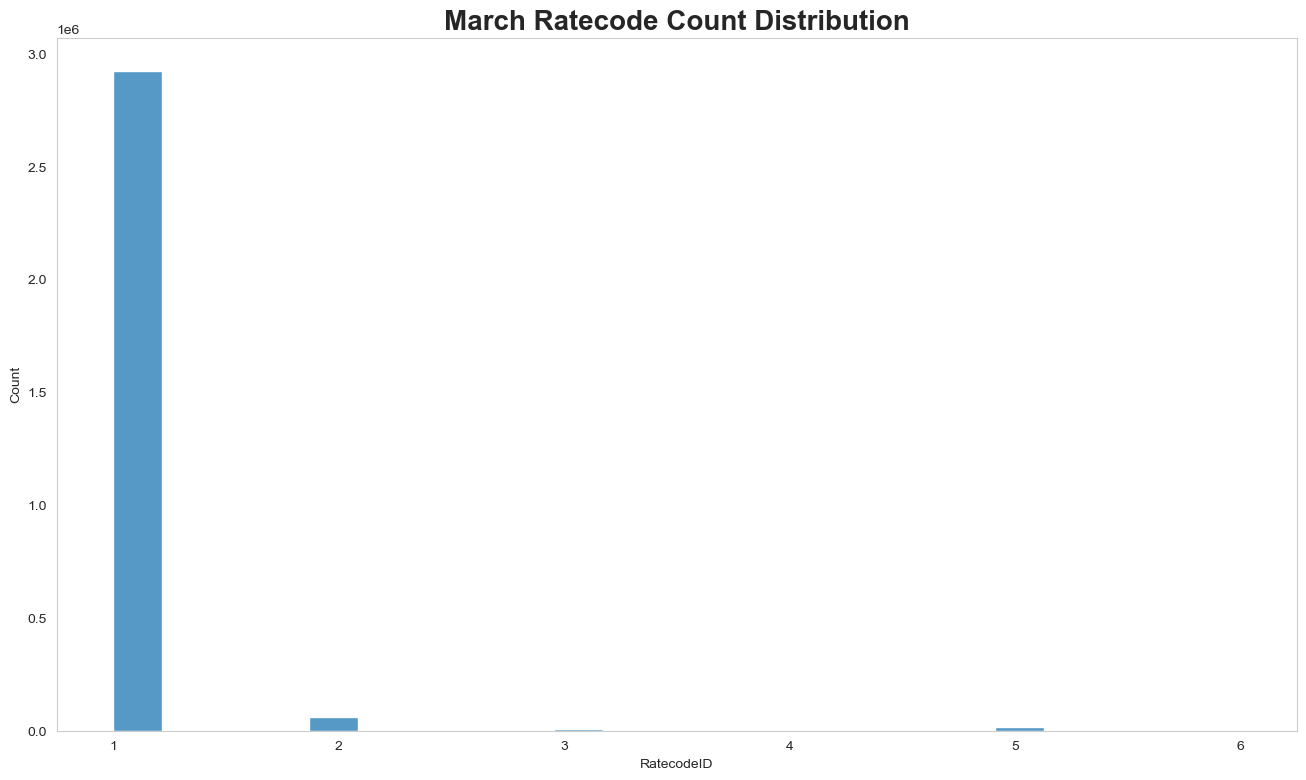

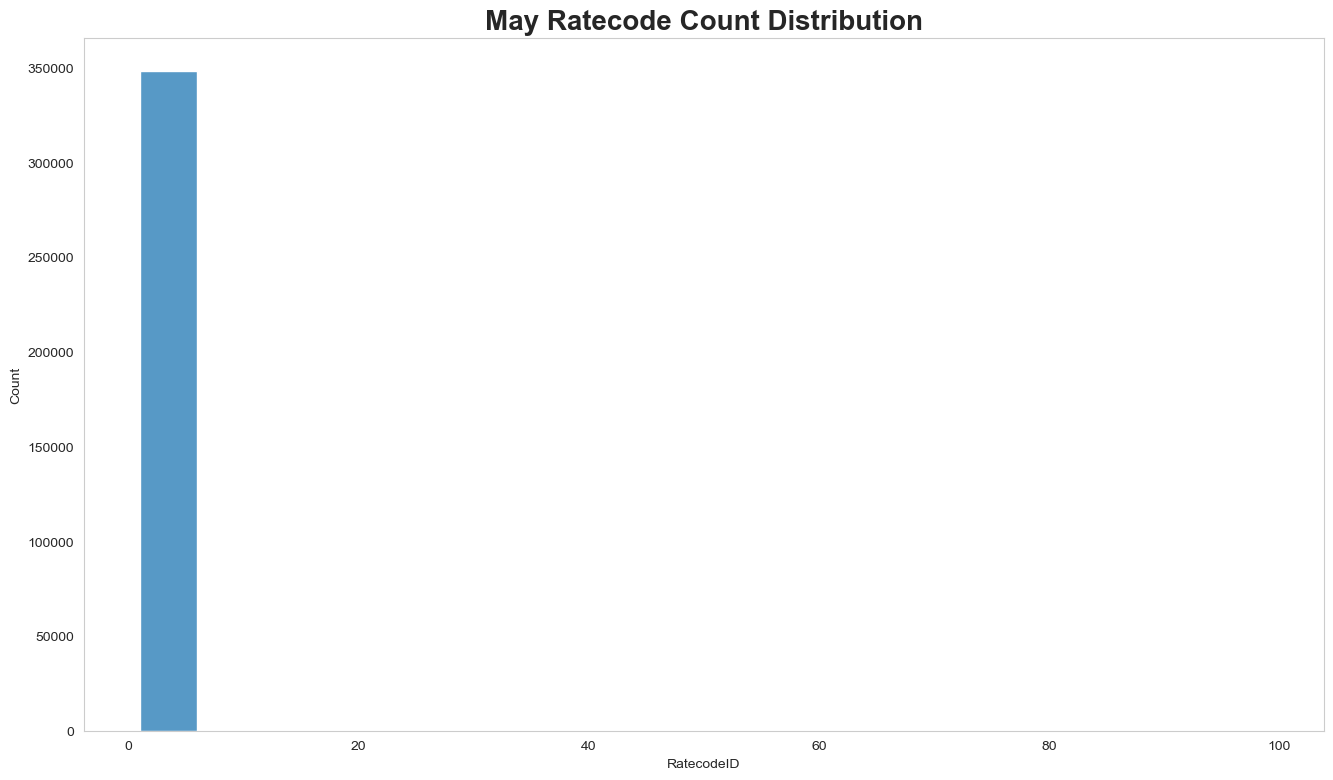

[ 1  2  3  4  5  6 99]

99 is not a valid rate-code
Changing all 99 values to 1



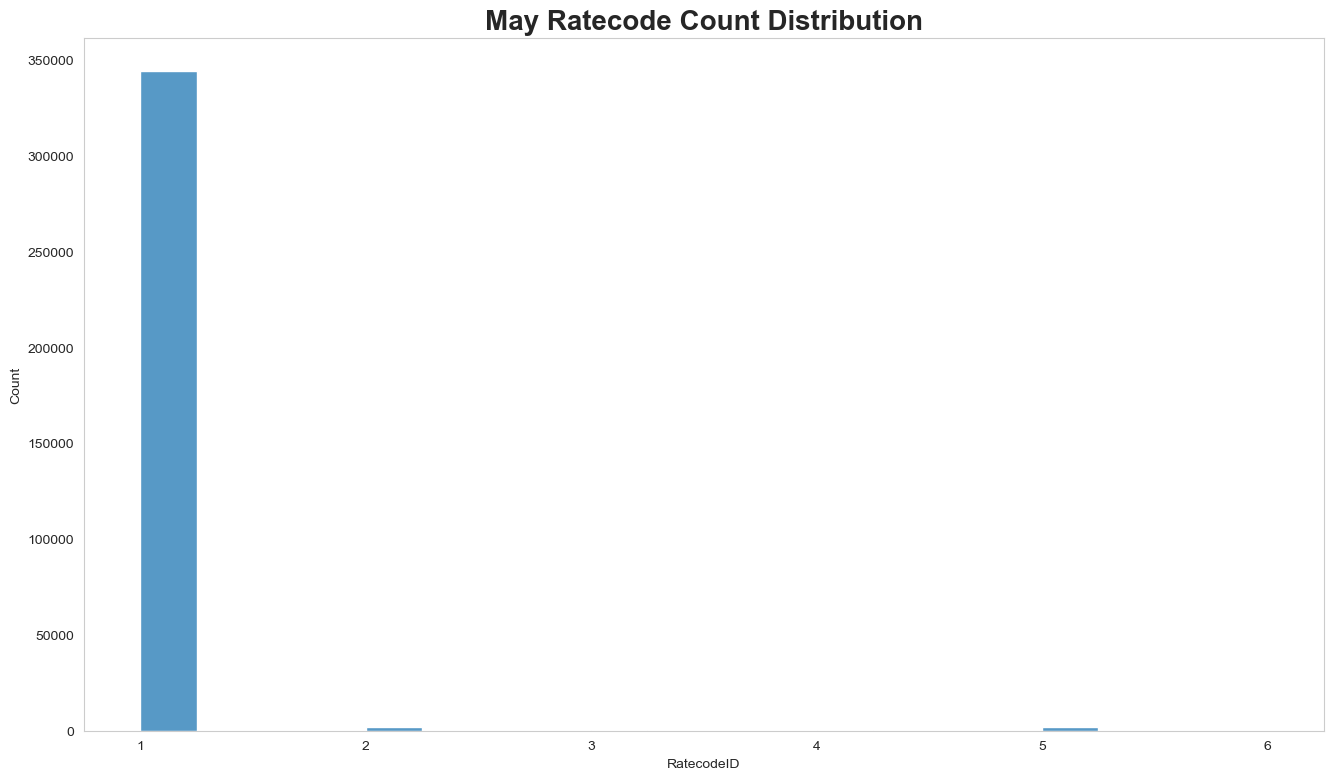

In [28]:
#
# Look at January ratecode count values
#
print("\n\n")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(jan_df['RatecodeID'])
plt.title('January Ratecode Count Distribution', weight='bold', fontsize=title_size)
plt.show();

print(np.sort(jan_df['RatecodeID'].unique()))
print("\nUh oh....a value of 99 is not valid!")
print("")
# print(jan_df[jan_df['RatecodeID'] == 99].count())

print("99 is not a valid rate-code")
print("Changing all 99 values to 1\n")
jan_df['RatecodeID'].replace(to_replace=99, value=1, inplace=True)

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(jan_df['RatecodeID'])
plt.title('January Ratecode Count Distribution', weight='bold', fontsize=title_size)
plt.show();
print("\n\n\n")

#
# Look at March ratecode count values
#
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(march_df['RatecodeID'])
plt.title('March Ratecode Count Distribution', weight='bold', fontsize=title_size)
plt.show();

print(np.sort(march_df['RatecodeID'].unique()))
print("\nUh oh....a value of 99 is not valid!")
print("")

print("")
print("99 is not a valid rate-code")
print("Changing all 99 values to 1\n")
march_df['RatecodeID'].replace(to_replace=99, value=1, inplace=True)

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(march_df['RatecodeID'])
plt.title('March Ratecode Count Distribution', weight='bold', fontsize=title_size)
plt.show();
print("\n\n\n")

#
# Look at May ratecode count values
#
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(may_df['RatecodeID'])
plt.title('May Ratecode Count Distribution', weight='bold', fontsize=title_size)
plt.show();

print(np.sort(may_df['RatecodeID'].unique()))

print("")
print("99 is not a valid rate-code")
print("Changing all 99 values to 1\n")
may_df['RatecodeID'].replace(to_replace=99, value=1, inplace=True)

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(may_df['RatecodeID'])
plt.title('May Ratecode Count Distribution', weight='bold', fontsize=title_size)
plt.show();

<br>

### **Create new columns:** _pickup_day_ **and** _dropoff_day_ **- using integer values:**
#### (Later, the two _datetime_ columns can be removed if desired, since they are not exactly an integer or a float type)



January distribution of pick-up days: (0 - 6, Mon - Sun)

0     740467
1     848946
2    1053394
3    1108580
4    1124818
5     813638
6     715165
Name: pickup_day, dtype: int64




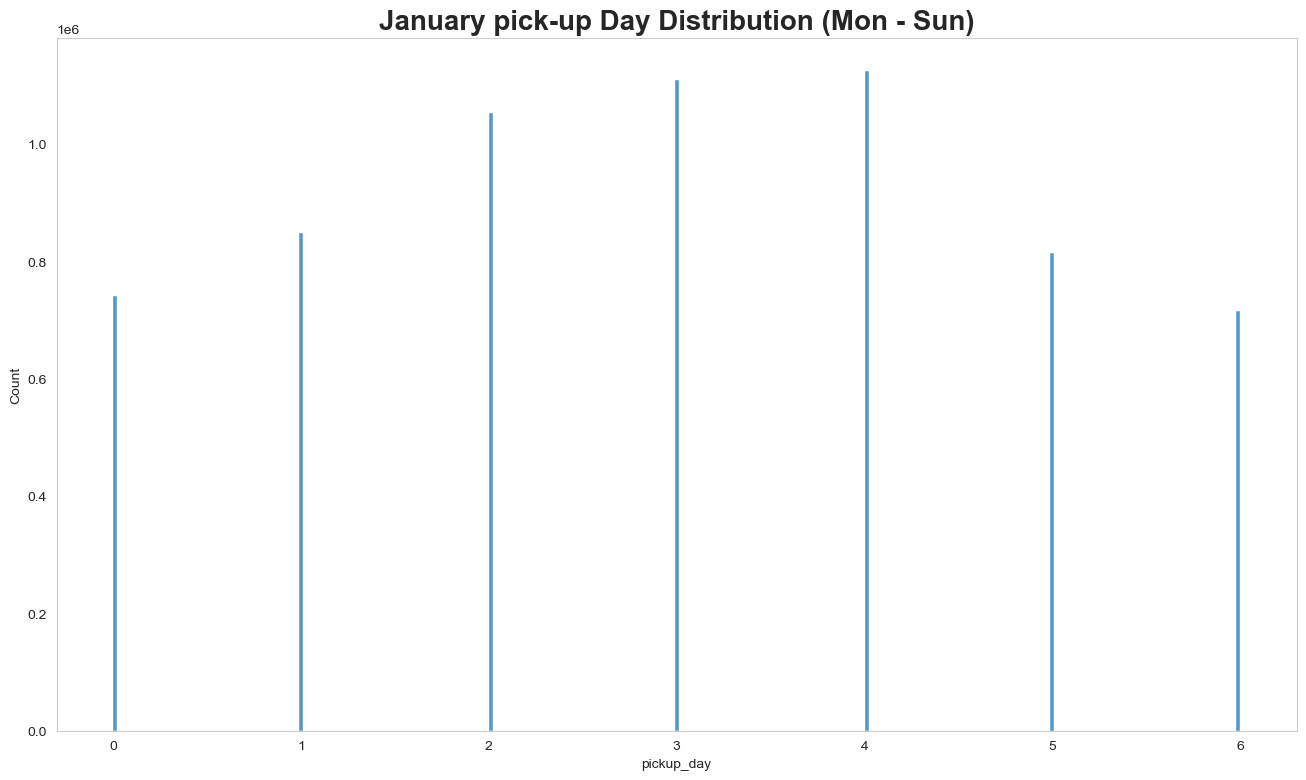





March distribution of pick-up days: (0 - 6, Mon - Sun)

0    456463
1    473920
2    459820
3    455994
4    417851
5    321860
6    421384
Name: pickup_day, dtype: int64




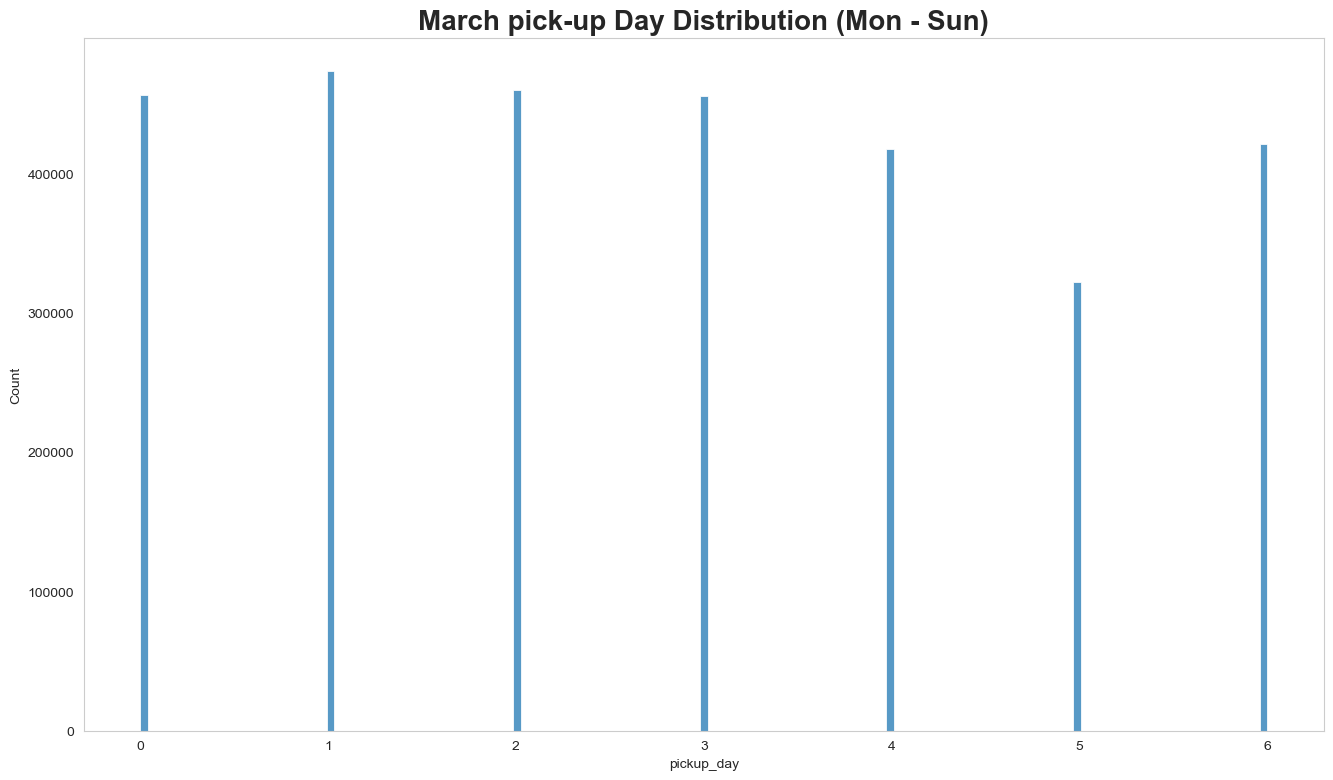





May distribution of pick-up days: (0 - 6, Mon - Sun)

0    42424
1    48700
2    51921
3    51665
4    68777
5    46657
6    38227
Name: pickup_day, dtype: int64




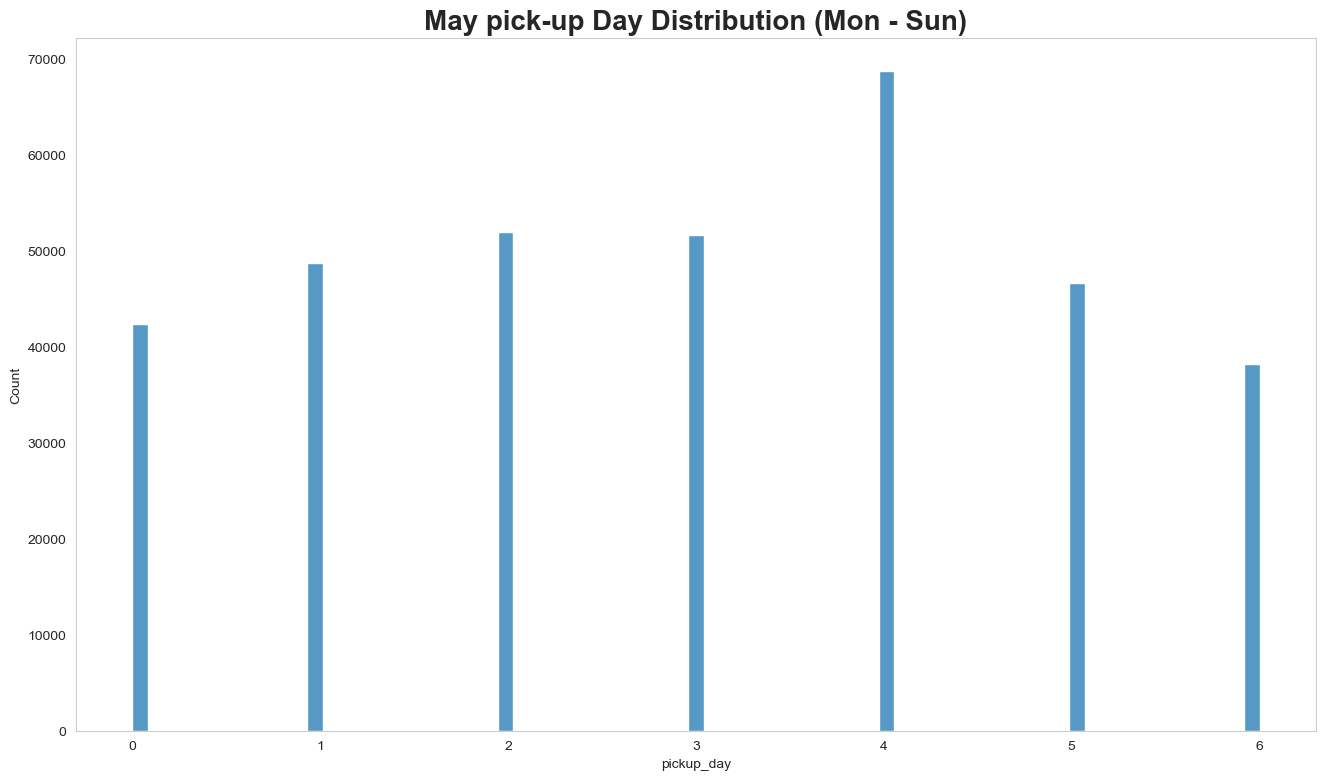

In [29]:
#
# Create new columns: pickup_day and dropoff_day - use numeric values, not string values
#

jan_df['pickup_day'] = jan_df['tpep_pickup_datetime'].dt.day_of_week
jan_df['dropoff_day'] = jan_df['tpep_dropoff_datetime'].dt.day_of_week

march_df['pickup_day'] = march_df['tpep_pickup_datetime'].dt.day_of_week
march_df['dropoff_day'] = march_df['tpep_dropoff_datetime'].dt.day_of_week

may_df['pickup_day'] = may_df['tpep_pickup_datetime'].dt.day_of_week
may_df['dropoff_day'] = may_df['tpep_dropoff_datetime'].dt.day_of_week


print("\n\nJanuary distribution of pick-up days: (0 - 6, Mon - Sun)\n")
print(jan_df['pickup_day'].value_counts().sort_index())
print("\n")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(jan_df['pickup_day'])
plt.title('January pick-up Day Distribution (Mon - Sun)', weight='bold', fontsize=title_size)
plt.show();
print("\n\n\n")


print("March distribution of pick-up days: (0 - 6, Mon - Sun)\n")
print(march_df['pickup_day'].value_counts().sort_index())
print("\n")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(march_df['pickup_day'])
plt.title('March pick-up Day Distribution (Mon - Sun)', weight='bold', fontsize=title_size)
plt.show();
print("\n\n\n")


print("May distribution of pick-up days: (0 - 6, Mon - Sun)\n")
print(may_df['pickup_day'].value_counts().sort_index())
print("\n")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(may_df['pickup_day'])
plt.title('May pick-up Day Distribution (Mon - Sun)', weight='bold', fontsize=title_size)
plt.show();
print("\n\n\n")

### **Create new columns:** _pickup_month_ **and** _dropoff_month_ **- using integer values**


Create new columns with the pick-up month and drop-off month: digits only...(1 - 12)...
Done



January distribution of pick-up month:

1     6404945
12         63
Name: pickup_month, dtype: int64




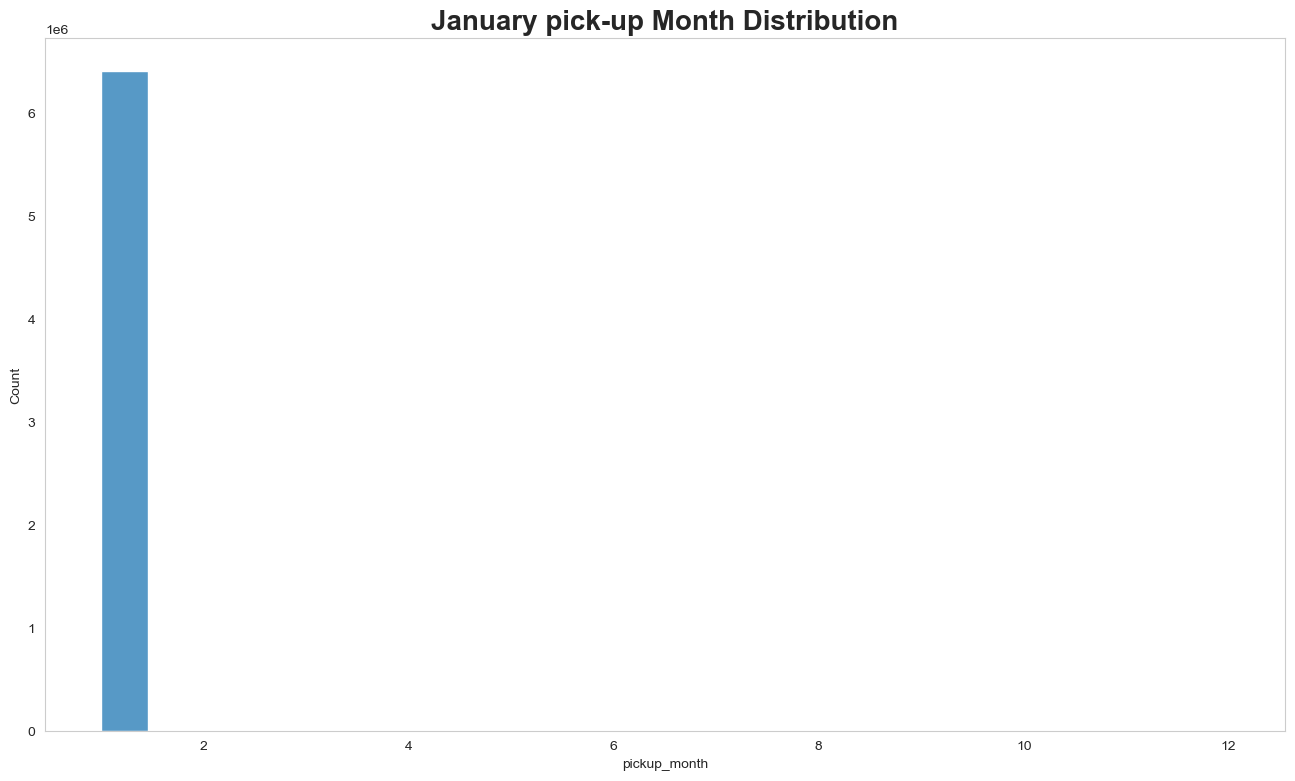





March distribution of pick-up month:

3    3007102
2        190
Name: pickup_month, dtype: int64




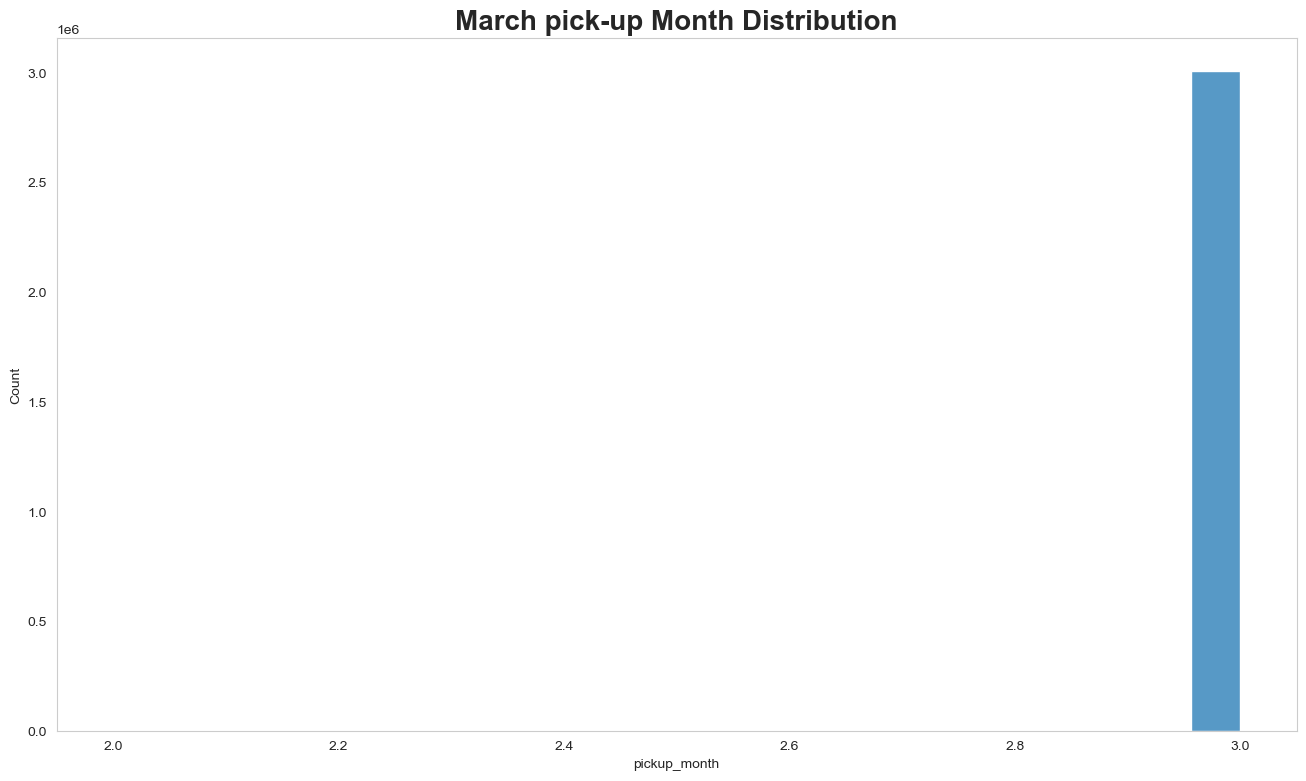





May distribution of pick-up month:

5    348369
4         2
Name: pickup_month, dtype: int64




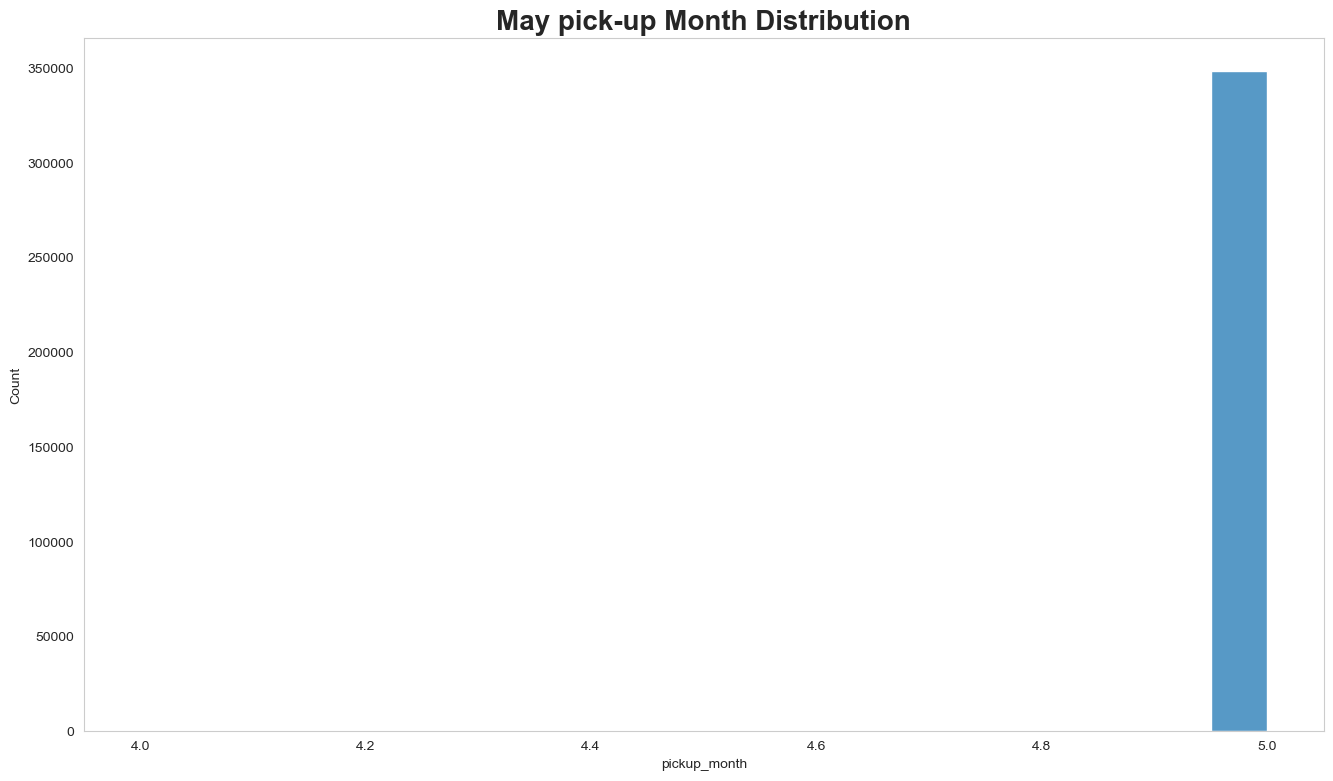

In [30]:
#
# Create new columns: pickup_day and dropoff_day - use numeric values, not string values
#

print("\nCreate new columns with the pick-up month and drop-off month: digits only...(1 - 12)...")

jan_df['pickup_month'] = jan_df['tpep_pickup_datetime'].dt.month
march_df['pickup_month'] = march_df['tpep_pickup_datetime'].dt.month
may_df['pickup_month'] = may_df['tpep_pickup_datetime'].dt.month

jan_df['dropoff_month'] = jan_df['tpep_dropoff_datetime'].dt.month
march_df['dropoff_month'] = march_df['tpep_dropoff_datetime'].dt.month
may_df['dropoff_month'] = may_df['tpep_dropoff_datetime'].dt.month

print("Done\n")


print("\n\nJanuary distribution of pick-up month:\n")
print(jan_df['pickup_month'].value_counts())
print("\n")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(jan_df['pickup_month'])
plt.title('January pick-up Month Distribution', weight='bold', fontsize=title_size)
plt.show();
print("\n\n\n")


print("March distribution of pick-up month:\n")
print(march_df['pickup_month'].value_counts())
print("\n")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(march_df['pickup_month'])
plt.title('March pick-up Month Distribution', weight='bold', fontsize=title_size)
plt.show();
print("\n\n\n")


print("May distribution of pick-up month:\n")
print(may_df['pickup_month'].value_counts())
print("\n")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(may_df['pickup_month'])
plt.title('May pick-up Month Distribution', weight='bold', fontsize=title_size)
plt.show();
print("\n\n\n")



January distribution of drop-off month:

1    6402316
2       2692
Name: dropoff_month, dtype: int64




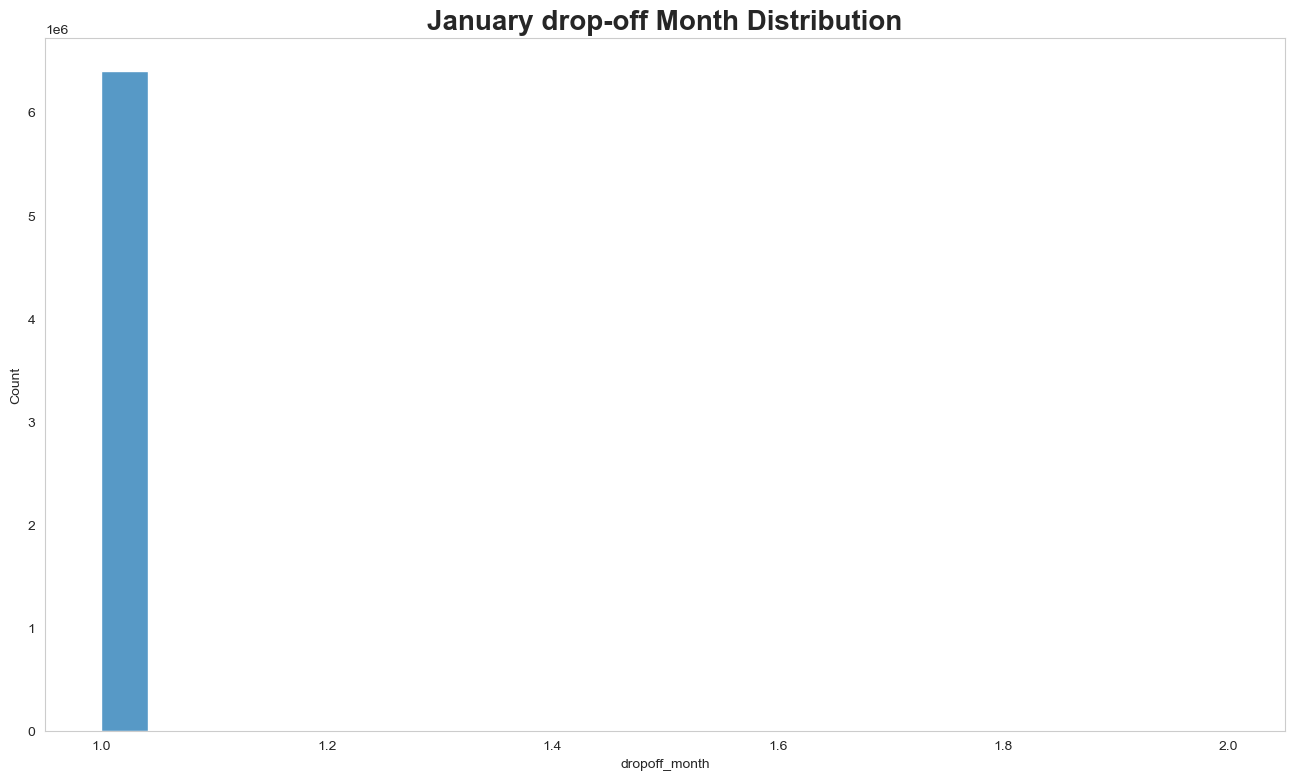





March distribution of drop-off month:

3    3007253
4         39
Name: dropoff_month, dtype: int64




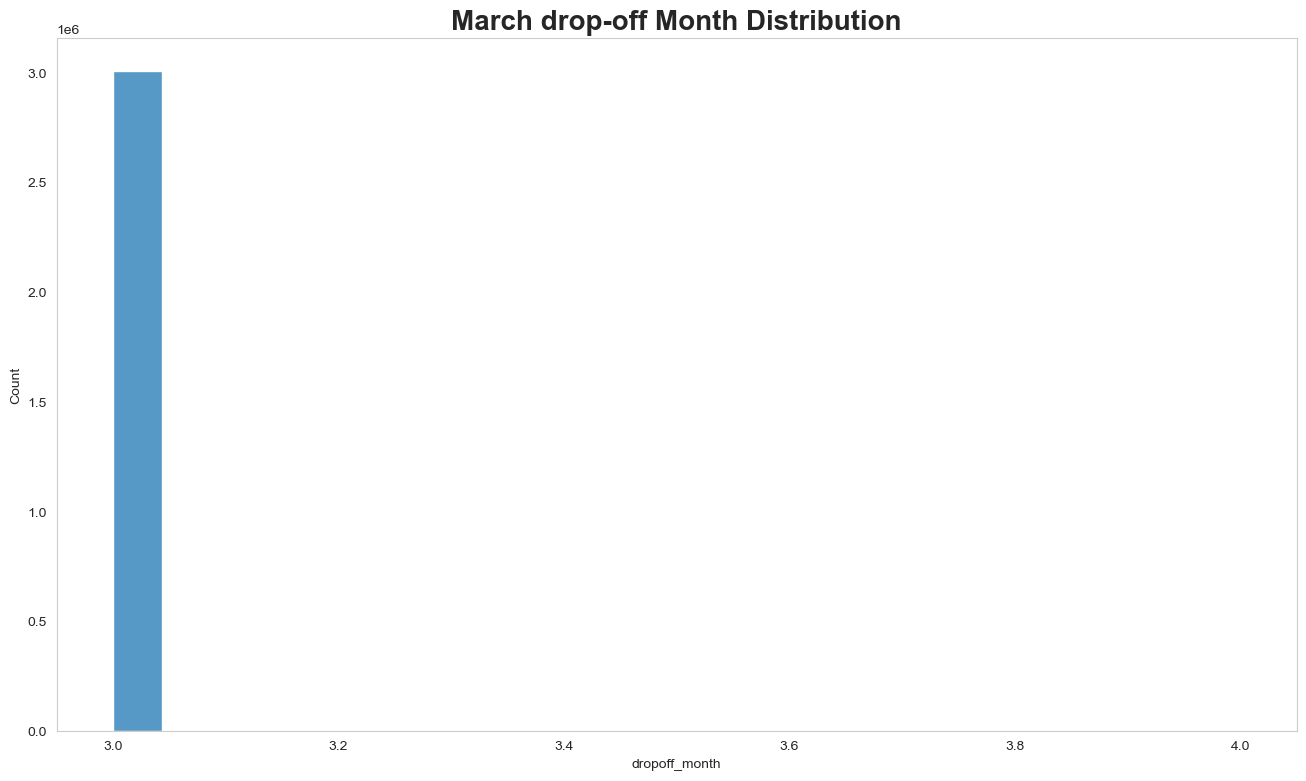





May distribution of drop-off month:

5    348291
6        80
Name: dropoff_month, dtype: int64




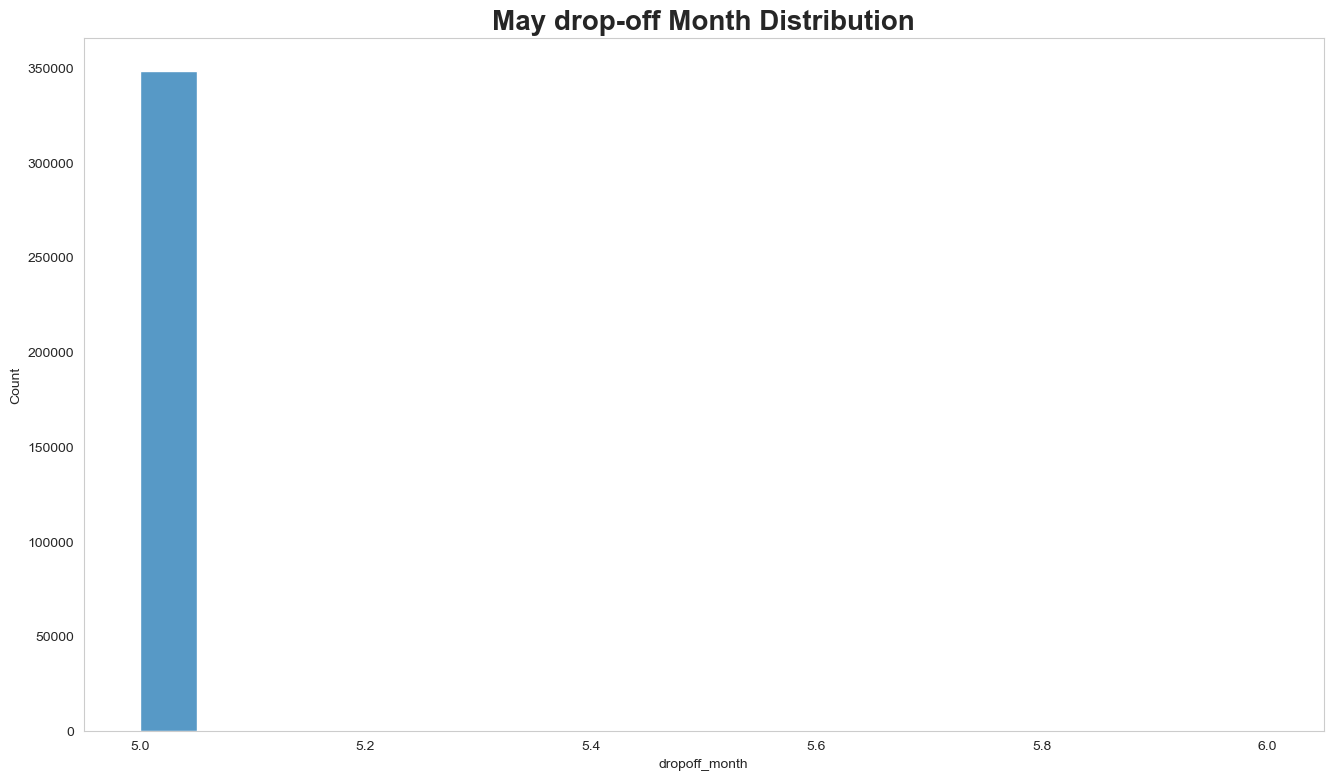

In [31]:
print("\n\nJanuary distribution of drop-off month:\n")
print(jan_df['dropoff_month'].value_counts())
print("\n")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(jan_df['dropoff_month'])
plt.title('January drop-off Month Distribution', weight='bold', fontsize=title_size)
plt.show();
print("\n\n\n")


print("March distribution of drop-off month:\n")
print(march_df['dropoff_month'].value_counts())
print("\n")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(march_df['dropoff_month'])
plt.title('March drop-off Month Distribution', weight='bold', fontsize=title_size)
plt.show();
print("\n\n\n")


print("May distribution of drop-off month:\n")
print(may_df['dropoff_month'].value_counts())
print("\n")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(may_df['dropoff_month'])
plt.title('May drop-off Month Distribution', weight='bold', fontsize=title_size)
plt.show();
print("\n\n\n")

### **Create a new** _pickup_hour_ **column that is** _int64_ **type**

Create new columns for pick-up hour - integer type: (0 - 23)

January pick-up hour distribution

0     169515
1     121699
2      88864
3      62464
4      47513
5      55857
6     124692
7     238132
8     301875
9     304336
10    300571
11    314305
12    342560
13    347446
14    368595
15    376990
16    358745
17    400612
18    437607
19    395664
20    351334
21    351563
22    312054
23    232015
Name: pickup_hour, dtype: int64



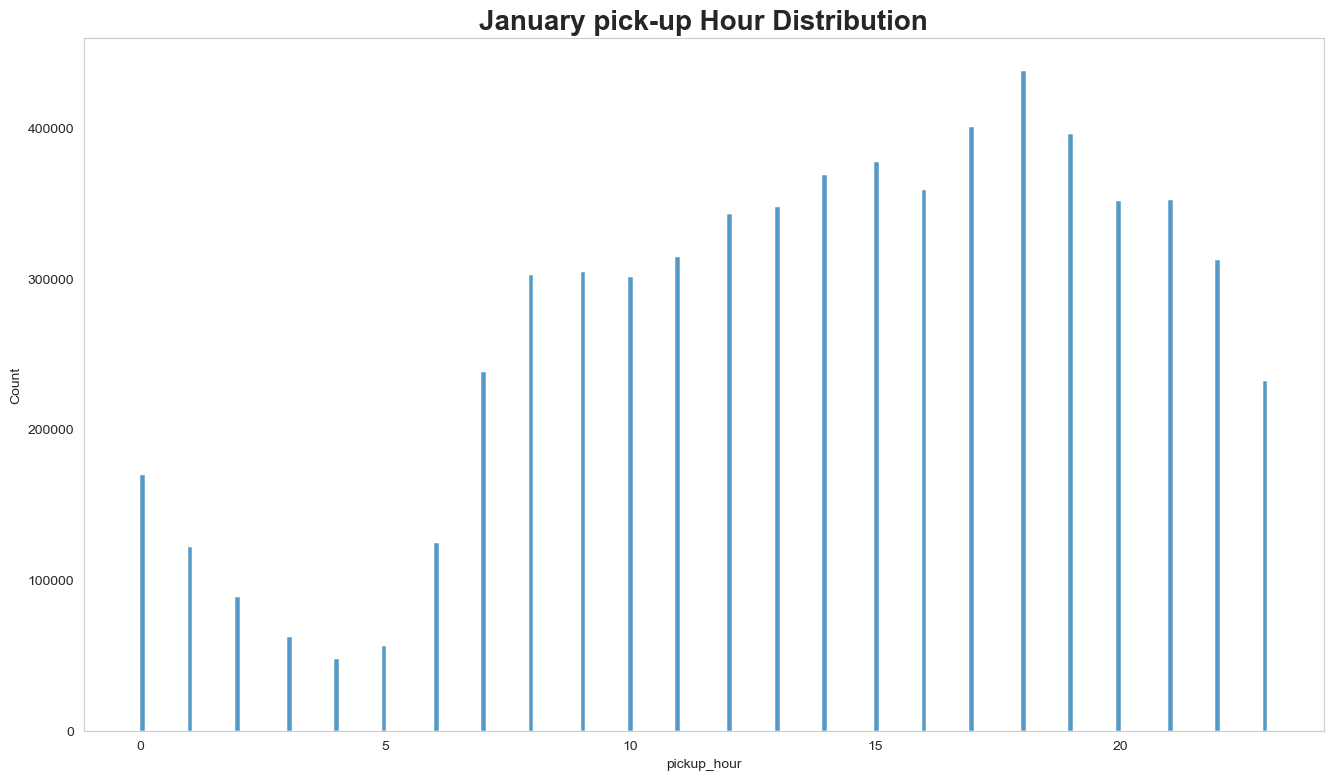





March pick-up hour distribution

0      77396
1      52862
2      30510
3      29511
4      23771
5      28698
6      69340
7     122751
8     155530
9     149897
10    148608
11    151257
12    158163
13    162776
14    177009
15    180071
16    170551
17    192772
18    208023
19    183650
20    157054
21    146493
22    133185
23     97414
Name: pickup_hour, dtype: int64



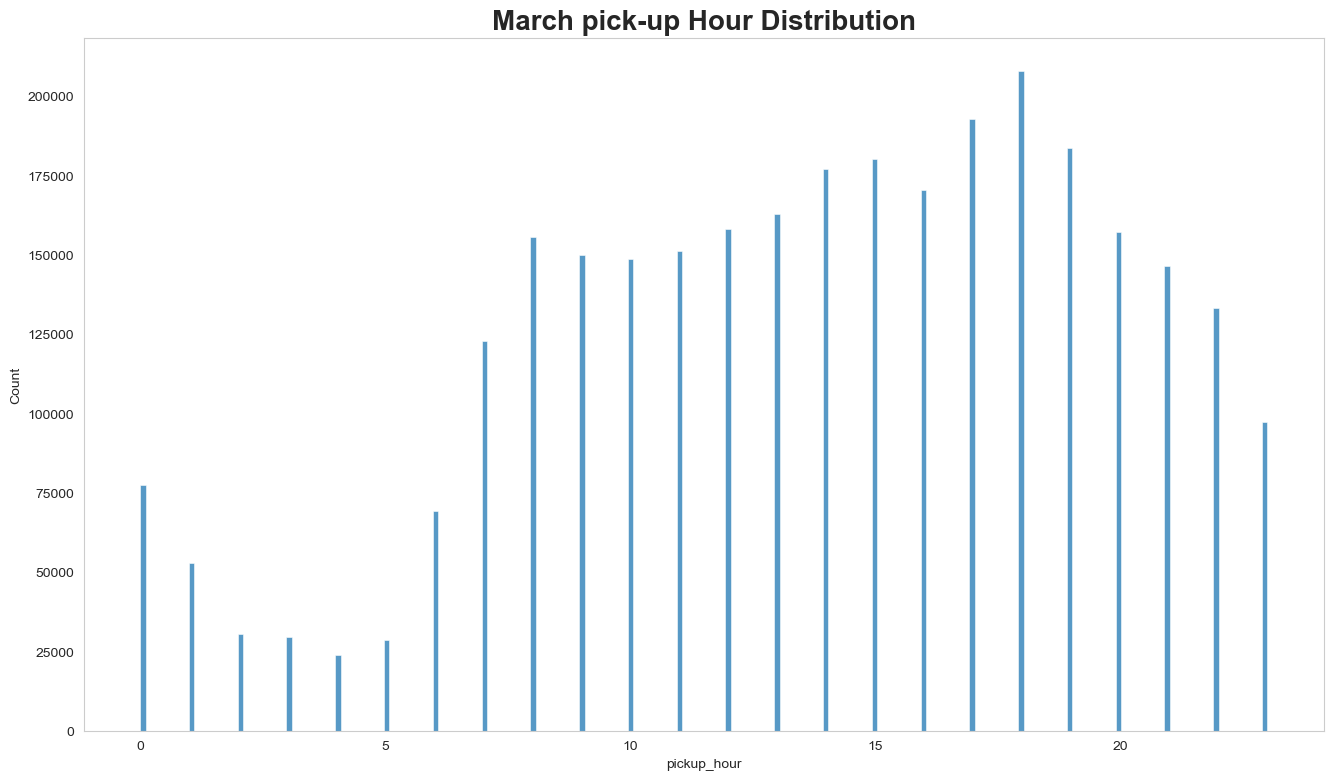





May pick-up hour distribution

0      5675
1      3940
2      3176
3      3157
4      4789
5      5493
6     12719
7     17461
8     18552
9     17298
10    18285
11    19381
12    21411
13    23003
14    23742
15    25225
16    24697
17    23783
18    20010
19    17307
20    12947
21     9188
22     8040
23     9092
Name: pickup_hour, dtype: int64



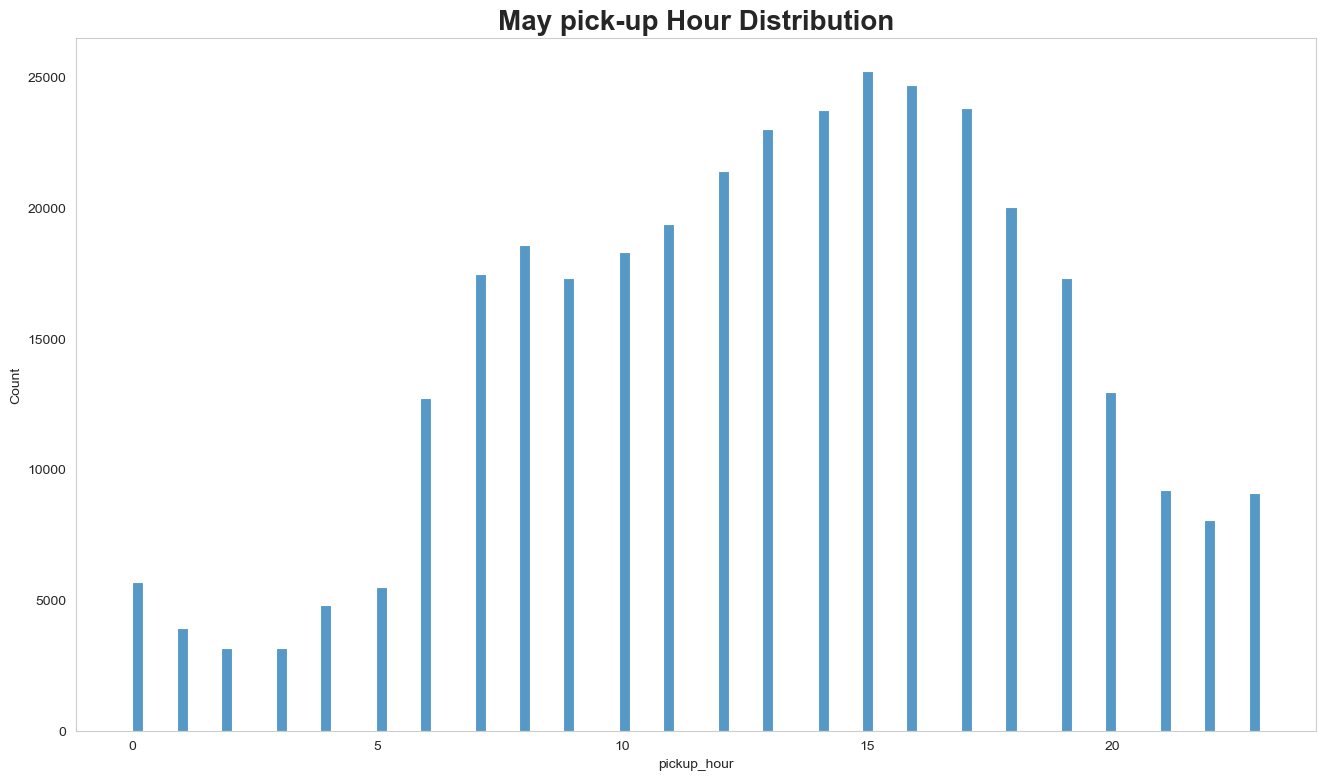



Only values: 0...23 Good!





In [32]:
#
# Create a new pickup_hour that is integer type only
#

warnings.filterwarnings('ignore')

print("Create new columns for pick-up hour - integer type: (0 - 23)\n")
jan_df['pickup_hour'] = jan_df['tpep_pickup_datetime'].dt.hour
march_df['pickup_hour'] = march_df['tpep_pickup_datetime'].dt.hour
may_df['pickup_hour'] = may_df['tpep_pickup_datetime'].dt.hour


print("January pick-up hour distribution\n")
print(jan_df['pickup_hour'].value_counts().sort_index())
print("")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(jan_df['pickup_hour'], stat='count')
plt.title('January pick-up Hour Distribution', weight='bold', fontsize=title_size)
plt.show();
print("\n\n\n")


print("March pick-up hour distribution\n")
print(march_df['pickup_hour'].value_counts().sort_index())
print("")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(march_df['pickup_hour'], stat='count')
plt.title('March pick-up Hour Distribution', weight='bold', fontsize=title_size)
plt.show();
print("\n\n\n")


print("May pick-up hour distribution\n")
print(may_df['pickup_hour'].value_counts().sort_index())
print("")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(may_df['pickup_hour'], stat='count')
plt.title('May pick-up Hour Distribution', weight='bold', fontsize=title_size)
plt.show();


print("\n\nOnly values: 0...23 Good!\n\n\n")

### **Create a new** _dropoff_hour_ **column that is** _int64_ **type**


Create new columns for drop-off hour - integer type: (0 - 23)

January drop-off hour distribution

0     182165
1     130992
2      95316
3      65816
4      50278
5      49594
6     108585
7     209556
8     289816
9     306809
10    303402
11    309802
12    340448
13    341128
14    358512
15    376537
16    359724
17    387893
18    441327
19    415399
20    354761
21    350680
22    325818
23    250650
Name: dropoff_hour, dtype: int64



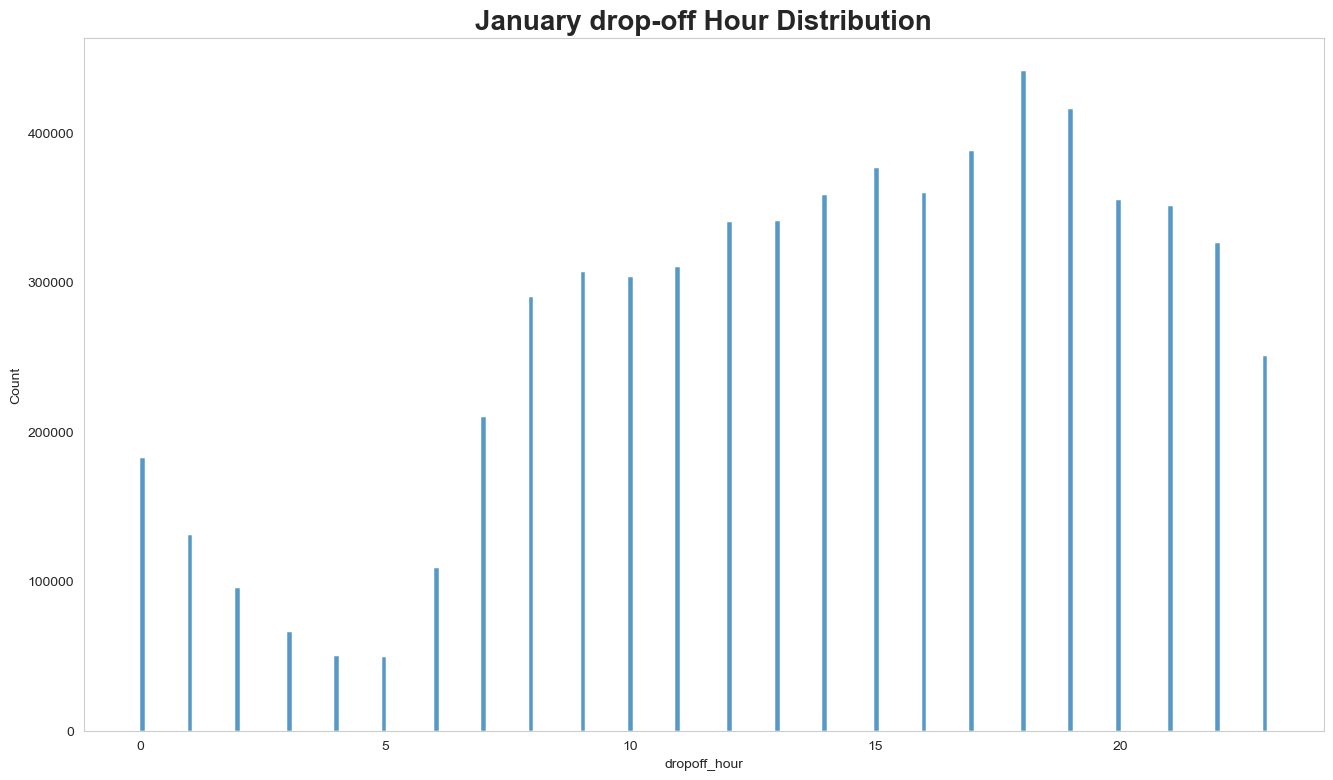





March drop-off hour distribution

0      82197
1      56976
2      32753
3      30646
4      24957
5      25371
6      60618
7     110326
8     147479
9     153488
10    149064
11    149820
12    158860
13    159482
14    170800
15    180429
16    171068
17    186282
18    210272
19    193447
20    161853
21    147604
22    137780
23    105720
Name: dropoff_hour, dtype: int64



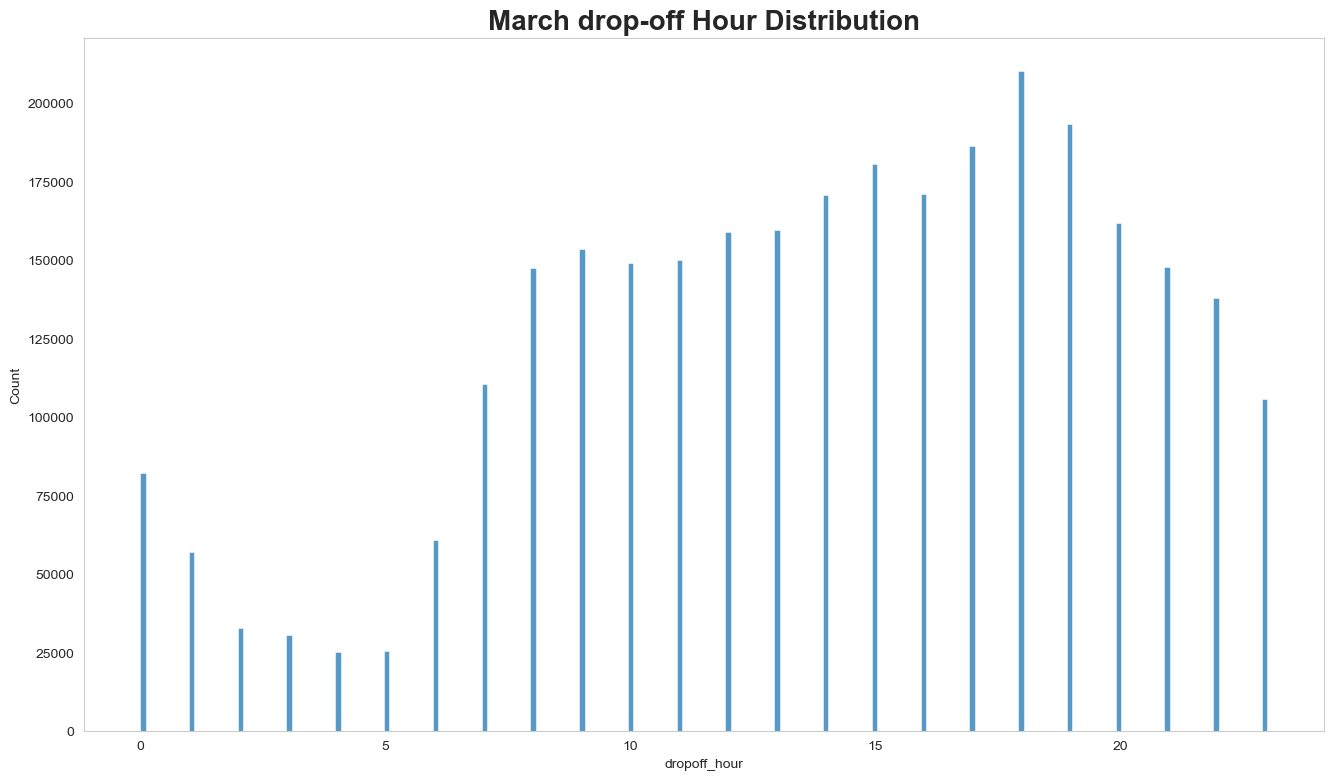





May drop-off hour distribution

0      6833
1      3918
2      3221
3      2961
4      3954
5      5759
6     11928
7     16407
8     18765
9     17701
10    18020
11    18977
12    21074
13    22846
14    23342
15    24599
16    24382
17    24880
18    20912
19    17448
20    13959
21     9785
22     7833
23     8867
Name: dropoff_hour, dtype: int64



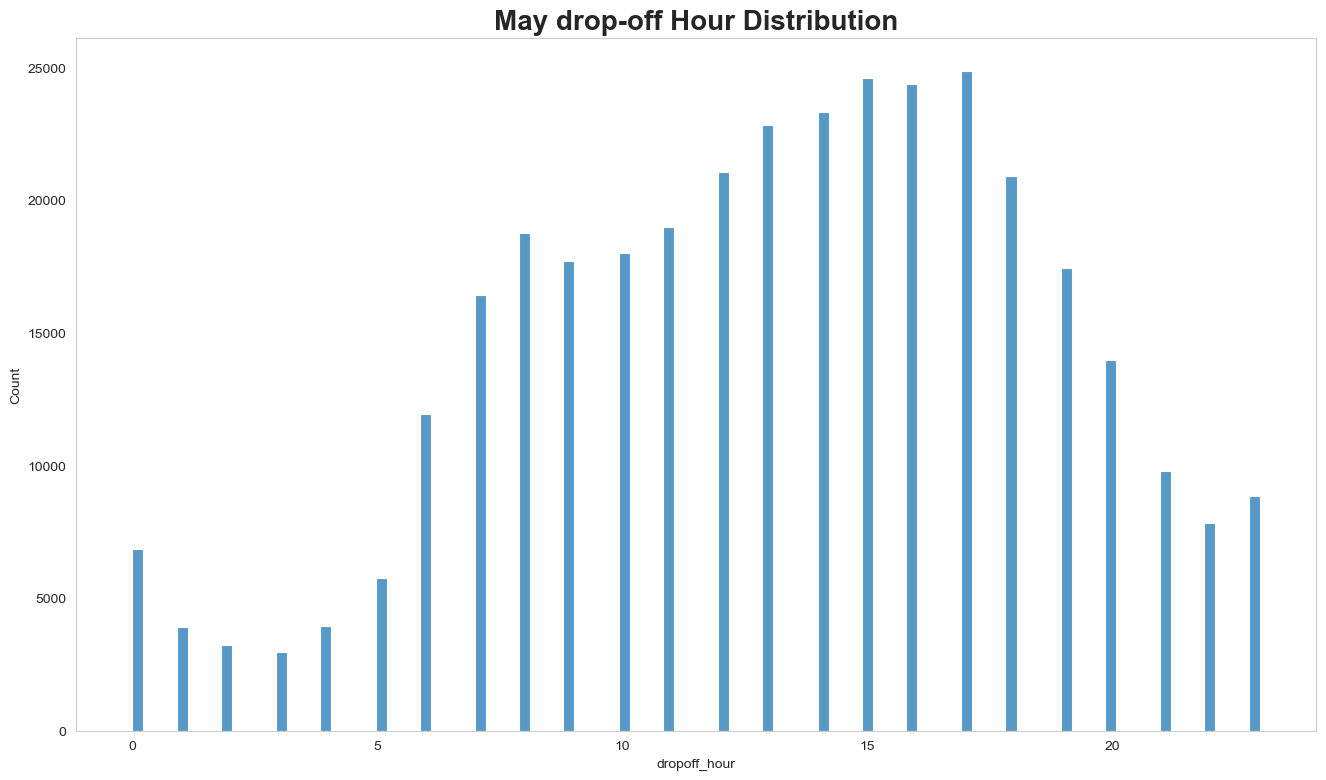


Only values 0...23 Good!





In [33]:
#
# Create a new dropoff_hour that is integer type only
#

print("\nCreate new columns for drop-off hour - integer type: (0 - 23)\n")
jan_df['dropoff_hour'] = jan_df['tpep_dropoff_datetime'].dt.hour
march_df['dropoff_hour'] = march_df['tpep_dropoff_datetime'].dt.hour
may_df['dropoff_hour'] = may_df['tpep_dropoff_datetime'].dt.hour


print("January drop-off hour distribution\n")
print(jan_df['dropoff_hour'].value_counts().sort_index())
print("")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(jan_df['dropoff_hour'])
plt.title('January drop-off Hour Distribution', weight='bold', fontsize=title_size)
plt.show();
print("\n\n\n")


print("March drop-off hour distribution\n")
print(march_df['dropoff_hour'].value_counts().sort_index())
print("")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(march_df['dropoff_hour'])
plt.title('March drop-off Hour Distribution', weight='bold', fontsize=title_size)
plt.show();
print("\n\n\n")


print("May drop-off hour distribution\n")
print(may_df['dropoff_hour'].value_counts().sort_index())
print("")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(may_df['dropoff_hour'])
plt.title('May drop-off Hour Distribution', weight='bold', fontsize=title_size)
plt.show();

print("\nOnly values 0...23 Good!\n\n\n")

<br>
<br>

## **Drop columns that are no longer needed:** _trip_duration_, _tpep_pickup_datetime_, _tpep_pickup_datetime_

In [34]:
#
# Delete time columns that are no longer needed
#

if 'trip_duration' in jan_df:    
    jan_df.drop('trip_duration', axis =1, inplace = True)
if 'trip_duration' in march_df: 
    march_df.drop('trip_duration', axis =1, inplace = True)
if 'trip_duration' in may_df: 
    may_df.drop('trip_duration', axis =1, inplace = True)

if 'tpep_pickup_datetime' in jan_df:
    jan_df.drop('tpep_pickup_datetime', axis =1, inplace = True)
if 'tpep_pickup_datetime' in march_df:
    march_df.drop('tpep_pickup_datetime', axis =1, inplace = True)
if 'tpep_pickup_datetime' in may_df:
    may_df.drop('tpep_pickup_datetime', axis =1, inplace = True)

if 'tpep_dropoff_datetime' in jan_df:
    jan_df.drop('tpep_dropoff_datetime', axis =1, inplace = True)
if 'tpep_dropoff_datetime' in march_df:
    march_df.drop('tpep_dropoff_datetime', axis =1, inplace = True)
if 'tpep_dropoff_datetime' in may_df:
    may_df.drop('tpep_dropoff_datetime', axis =1, inplace = True)

In [35]:
jan_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               6405008 non-null  int64  
 1   passenger_count        6405008 non-null  int64  
 2   trip_distance          6405008 non-null  float64
 3   RatecodeID             6405008 non-null  int64  
 4   PULocationID           6405008 non-null  int64  
 5   DOLocationID           6405008 non-null  int64  
 6   payment_type           6405008 non-null  int64  
 7   fare_amount            6405008 non-null  float64
 8   extra                  6405008 non-null  float64
 9   mta_tax                6405008 non-null  float64
 10  tip_amount             6405008 non-null  float64
 11  tolls_amount           6405008 non-null  float64
 12  improvement_surcharge  6405008 non-null  float64
 13  total_amount           6405008 non-null  float64
 14  congestion_surchar

In [36]:
march_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007292 entries, 0 to 3007291
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               3007292 non-null  int64  
 1   passenger_count        3007292 non-null  int64  
 2   trip_distance          3007292 non-null  float64
 3   RatecodeID             3007292 non-null  int64  
 4   PULocationID           3007292 non-null  int64  
 5   DOLocationID           3007292 non-null  int64  
 6   payment_type           3007292 non-null  int64  
 7   fare_amount            3007292 non-null  float64
 8   extra                  3007292 non-null  float64
 9   mta_tax                3007292 non-null  float64
 10  tip_amount             3007292 non-null  float64
 11  tolls_amount           3007292 non-null  float64
 12  improvement_surcharge  3007292 non-null  float64
 13  total_amount           3007292 non-null  float64
 14  congestion_surchar

In [37]:
may_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348371 entries, 0 to 348370
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               348371 non-null  int64  
 1   passenger_count        348371 non-null  int64  
 2   trip_distance          348371 non-null  float64
 3   RatecodeID             348371 non-null  int64  
 4   PULocationID           348371 non-null  int64  
 5   DOLocationID           348371 non-null  int64  
 6   payment_type           348371 non-null  int64  
 7   fare_amount            348371 non-null  float64
 8   extra                  348371 non-null  float64
 9   mta_tax                348371 non-null  float64
 10  tip_amount             348371 non-null  float64
 11  tolls_amount           348371 non-null  float64
 12  improvement_surcharge  348371 non-null  float64
 13  total_amount           348371 non-null  float64
 14  congestion_surcharge   348371 non-nu

<br>

## **Show Pick-Up Location ID's**

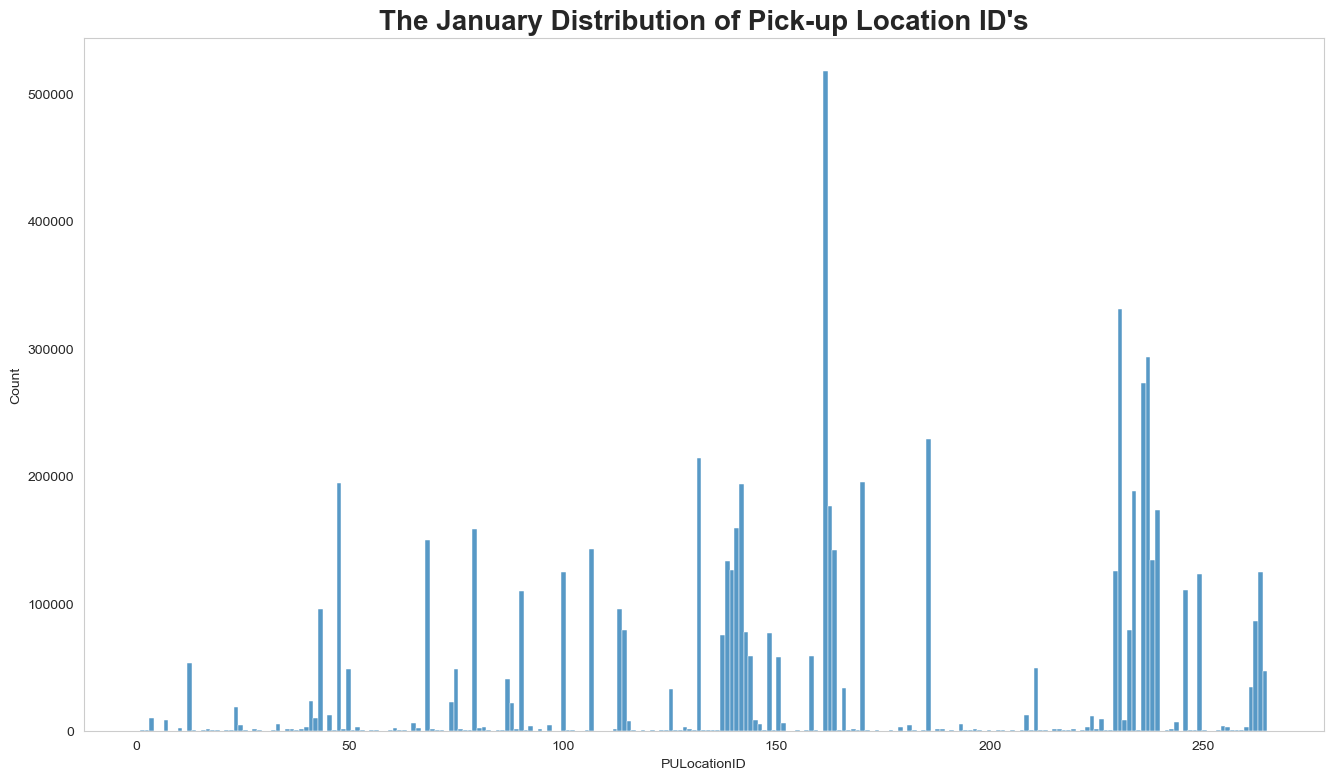

Top 5 most popular pick-up locations: 

Location 237: Upper East Side South - used 292989 times.
Location 161: Midtown Center - used 282213 times.
Location 236: Upper East Side North - used 272592 times.
Location 162: Midtown East - used 235602 times.
Location 186: Penn Station/Madison Sq West - used 228746 times.





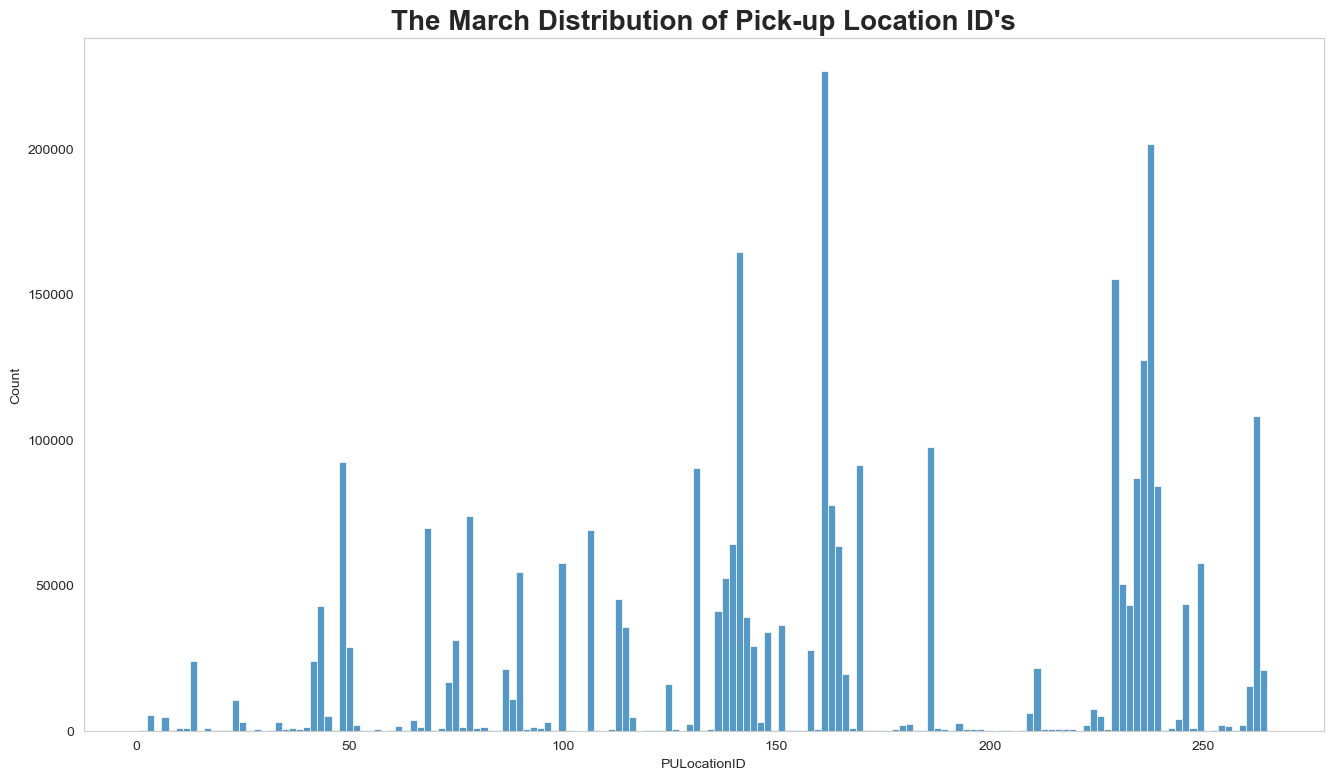

Top 5 most popular pick-up locations: 

Location 237: Upper East Side South - used 131058 times.
Location 236: Upper East Side North - used 127221 times.
Location 161: Midtown Center - used 121076 times.
Location 162: Midtown East - used 105570 times.
Location 186: Penn Station/Madison Sq West - used 97445 times.





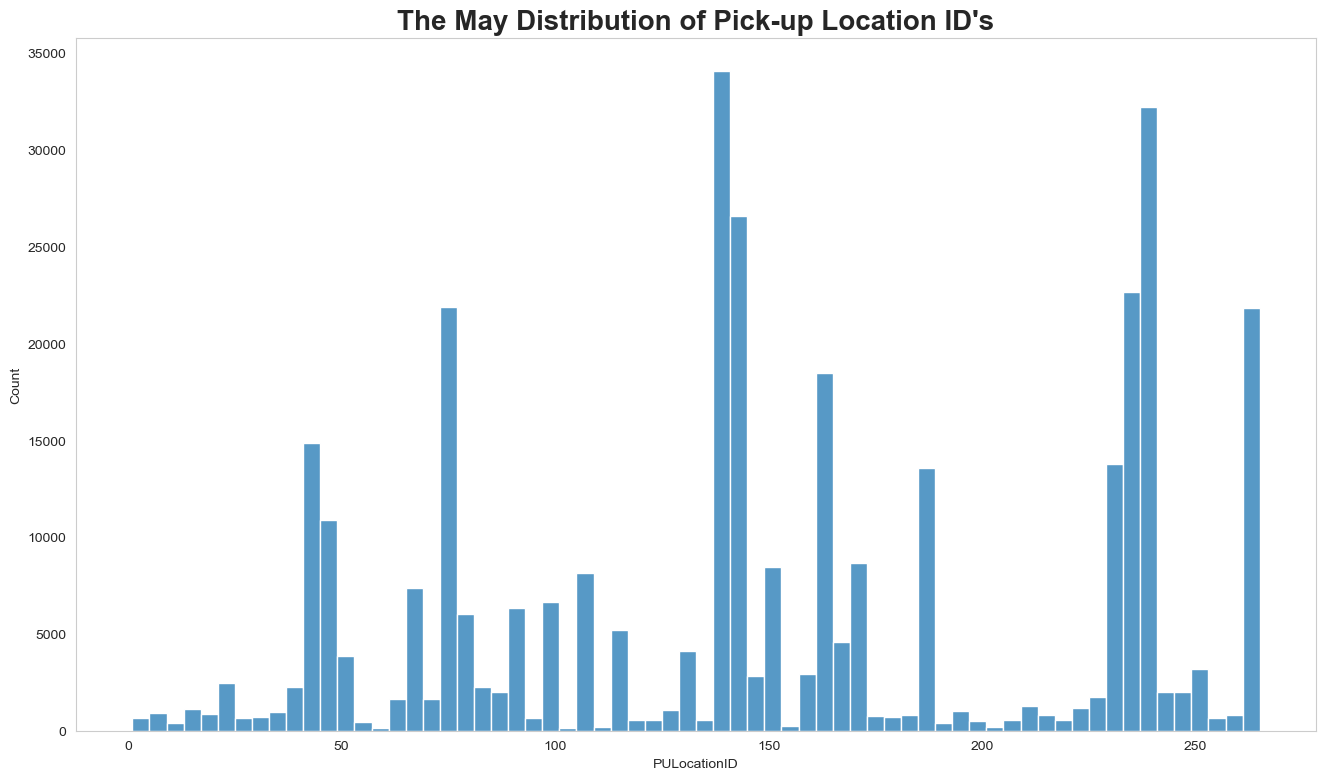

Top 5 most popular pick-up locations: 

Location 137: Kips Bay - used 18809 times.
Location 75: East Harlem South - used 13808 times.
Location 238: Upper West Side North - used 12450 times.
Location 140: Lenox Hill East - used 12337 times.
Location 263: Yorkville West - used 12328 times.





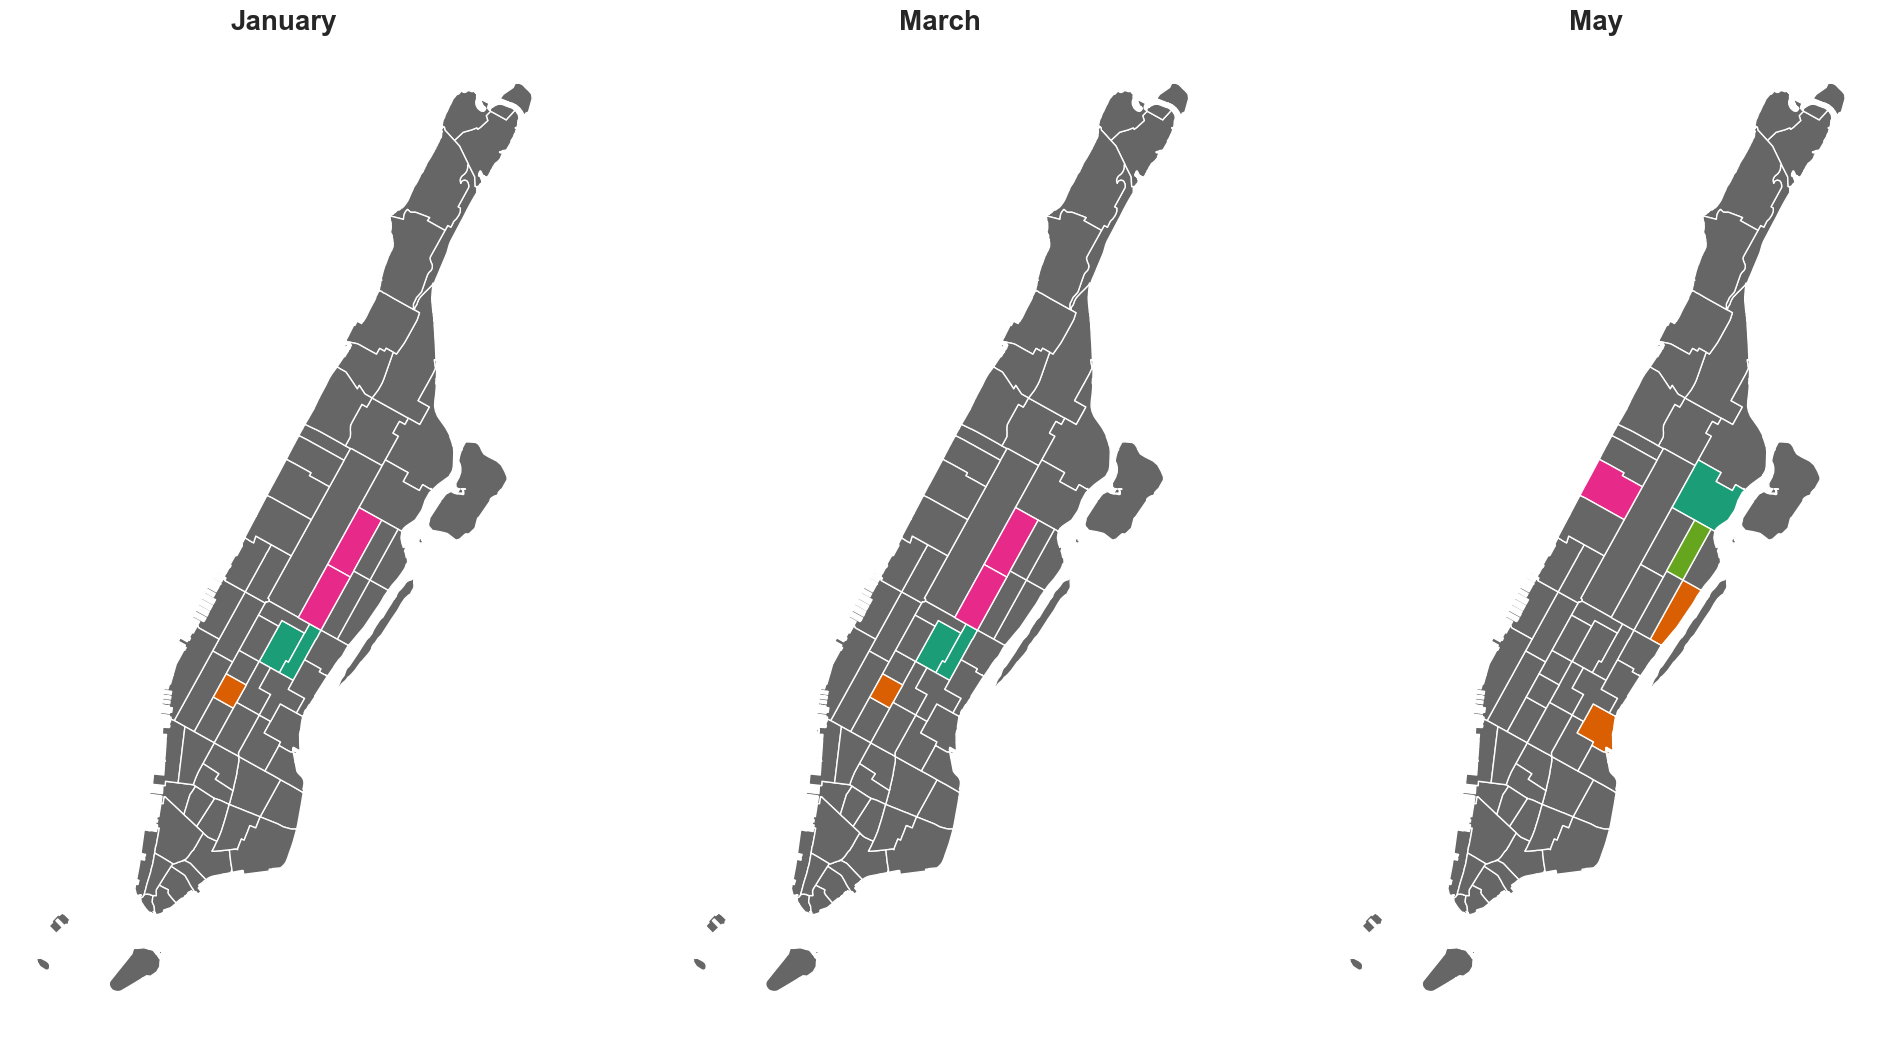

In [38]:
#
# Show Pick-up Location ID's
#
from collections import Counter

warnings.filterwarnings('ignore')

n = 5   # Max top locations

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(jan_df['PULocationID'], kde=False)
plt.title("The January Distribution of Pick-up Location ID's", weight='bold', fontsize=title_size)
plt.show();
print("Top " + str(n) + " most popular pick-up locations: ")
jan_pickup_most_popular = Counter(jan_df['PULocationID']).most_common(n)
print("")
for index, row in jan_pickup_most_popular:
    print("Location " + str(index) + ": " + str((taxizone_df[taxizone_df['LocationID'] == index]['Zone']).array[0]) + " - used " + str(row) + " times.")
print("\n\n")


sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(march_df['PULocationID'], kde=False)
plt.title("The March Distribution of Pick-up Location ID's", weight='bold', fontsize=title_size)
plt.show();
print("Top " + str(n) + " most popular pick-up locations: ")
march_pickup_most_popular = Counter(march_df['PULocationID']).most_common(n)
print("")
for index, row in march_pickup_most_popular:
    print("Location " + str(index) + ": " + str((taxizone_df[taxizone_df['LocationID'] == index]['Zone']).array[0]) + " - used " + str(row) + " times.")
print("\n\n")


sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(may_df['PULocationID'], kde=False)
plt.title("The May Distribution of Pick-up Location ID's", weight='bold', fontsize=title_size)
plt.show();
print("Top " + str(n) + " most popular pick-up locations: ")
may_pickup_most_popular = Counter(may_df['PULocationID']).most_common(n)
print("")
for index, row in may_pickup_most_popular:
    print("Location " + str(index) + ": " + str((taxizone_df[taxizone_df['LocationID'] == index]['Zone']).array[0]) + " - used " + str(row) + " times.")
print("\n\n")

mh1 = geozone_df[geozone_df['borough'] == 'Manhattan'].copy()
mh2 = geozone_df[geozone_df['borough'] == 'Manhattan'].copy()
mh3 = geozone_df[geozone_df['borough'] == 'Manhattan'].copy()

l1 = jan_pickup_most_popular
l2 = march_pickup_most_popular
l3 = may_pickup_most_popular

max1 = 0
for index, row in l1:
    if index > max1:
        max1 = index
mh1['col'] = max1 + 100

max2 = 0
for index, row in l2:
    if index > max2:
        max2 = index
mh2['col'] = max2 + 100

max3 = 0
for index, row in l3:
    if index > max3:
        max3 = index
mh3['col'] = max3 + 140

for index, row in l1:
    mh1.at[index, 'col'] = index
for index, row in l2:
    mh2.at[index, 'col'] = index
for index, row in l3:
    mh3.at[index, 'col'] = index

    
f, ax = plt.subplots(1, 3, figsize=(24, 24))
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
ax[0].set_title('January', fontsize=title_size, fontweight ="bold")
ax[1].set_title('March', fontsize=title_size, fontweight ="bold")
ax[2].set_title('May', fontsize=title_size, fontweight ="bold")
    
# f.suptitle(title, fontsize=title_size, weight='bold')
mh1.plot(column='col', ax=ax[0], cmap='Dark2', figsize=(11, 11))
mh2.plot(column='col', ax=ax[1], cmap='Dark2', figsize=(11, 11))
mh3.plot(column='col', ax=ax[2], cmap='Dark2', figsize=(11, 11))
# plt.axis('equal')
plt.show();


# **Observation**
## Pre-COVID and start of COVID
## The most popular pick-up locations were the more _affluent_ and _heavy-commuter_ areas:
#### Upper East Side South, Upper East Side North, Mid-Town Center, Mid-Town East, Penn Station

## But during the heavy COVID month of May...
## The most popular pick-up locations changed to:
#### Kips Bay: Bellevue Hospital, NYU Langone, VA NY Harbor
#### East Harlem South: North General Hospital, Mount Sinai
#### Upper West Side North: Weil Cornell, Mount Sinai, City MD Urgent Care
#### Lenox Hill East: New York Presbyterian, Weil Cornell, Memorial Sloan Kettering
#### Yorkville West: Mount Sinai, City MD Urgent Care
# **During May, the most popular pick-up locations all changed to hospital and medical areas.**

## **Kips Bay**
![SegmentLocal](KipsBay.png "segment")
<br>
## **East Harlem South**
![SegmentLocal](EastHarlemSouth.png "segment")
<br>
## **Upper West Side North**
![SegmentLocal](UpperWestSideNorth1.png "segment")
![SegmentLocal](UpperWestSideNorth2.png "segment")
<br>
## **Lenox Hill East**
![SegmentLocal](LenoxHillEast.png "segment")
<br>
## **Yorkville West**
![SegmentLocal](YorkvilleWest.png "segment")
<br>

<br>

## **Show Drop-off Location ID's**

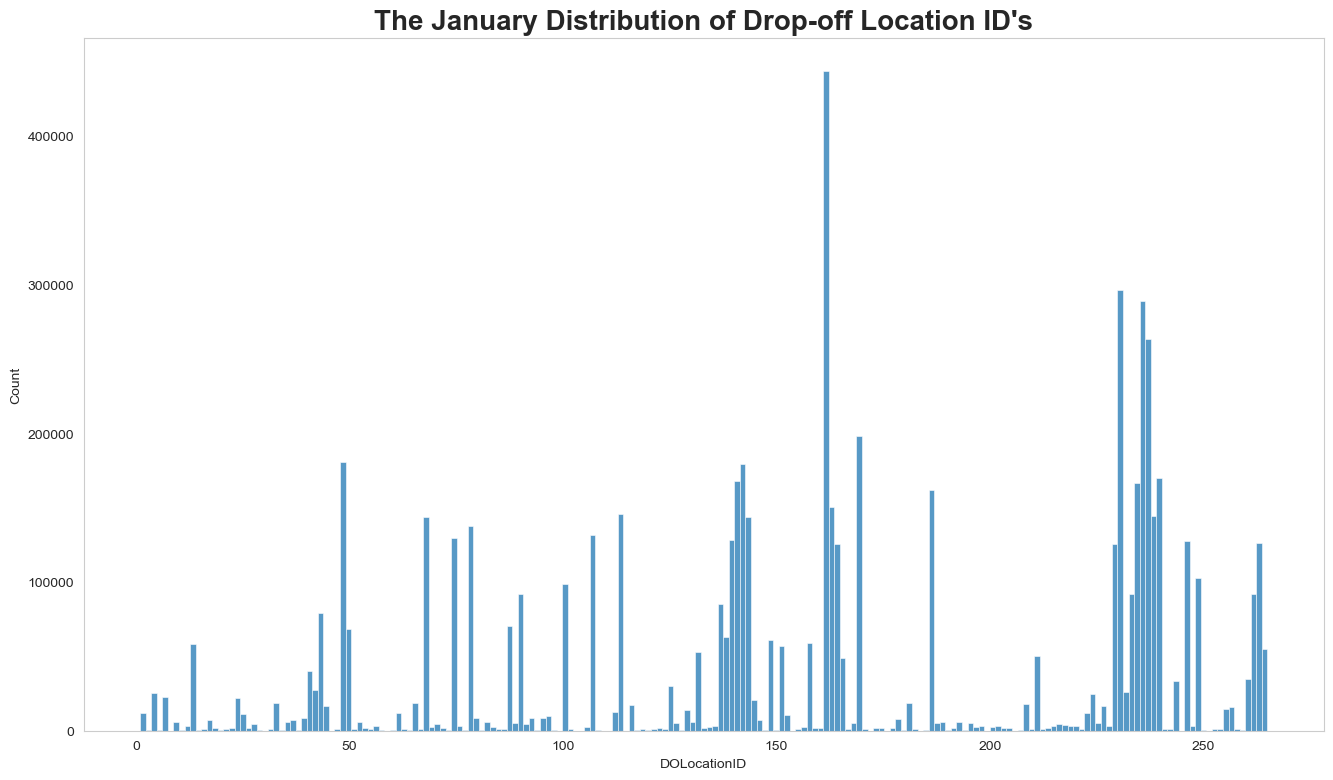

Top 5 most popular drop-off locations:

Location 236: Upper East Side North - used 289289 times.
Location 237: Upper East Side South - used 263588 times.
Location 161: Midtown Center - used 249719 times.
Location 170: Murray Hill - used 196877 times.
Location 162: Midtown East - used 194146 times.
(* Murray Hill is likely Grand Central drop-offs)





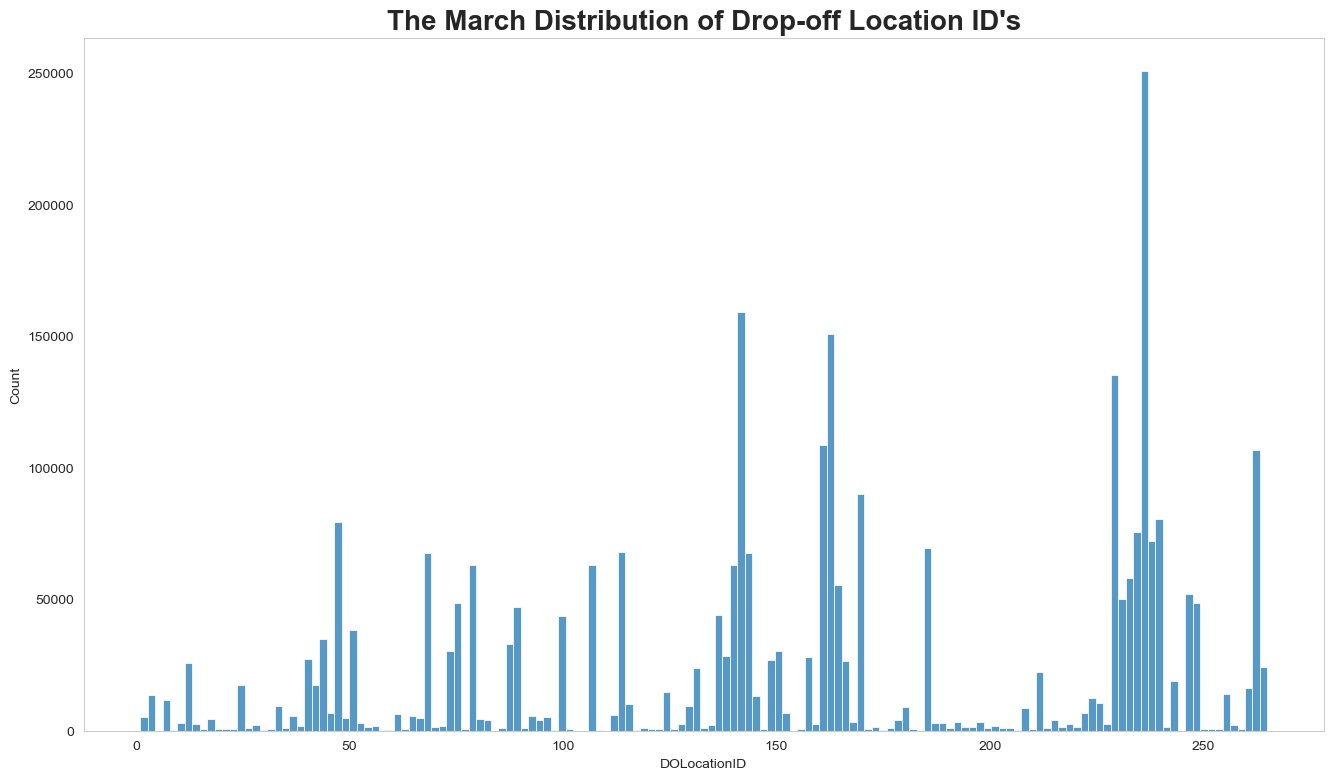

Top 5 most popular drop-off locations:

Location 236: Upper East Side North - used 133040 times.
Location 237: Upper East Side South - used 117853 times.
Location 161: Midtown Center - used 108558 times.
Location 170: Murray Hill - used 88976 times.
Location 162: Midtown East - used 84154 times.
(* Murray Hill is likely Grand Central drop-offs)





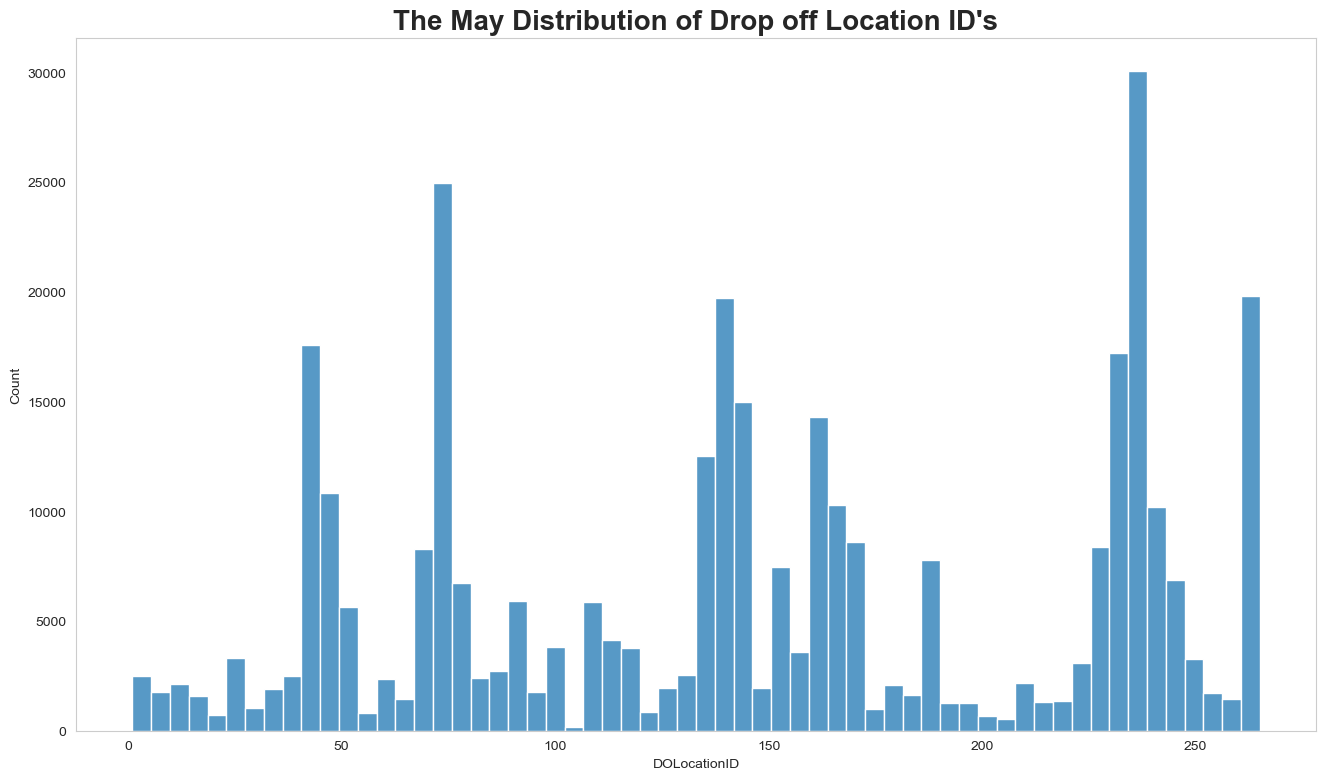

Top 5 most popular drop-off locations:

Location 75: East Harlem South - used 14504 times.
Location 137: Kips Bay - used 11444 times.
Location 236: Upper East Side North - used 11253 times.
Location 140: Lenox Hill East - used 9848 times.
Location 74: East Harlem North - used 9800 times.





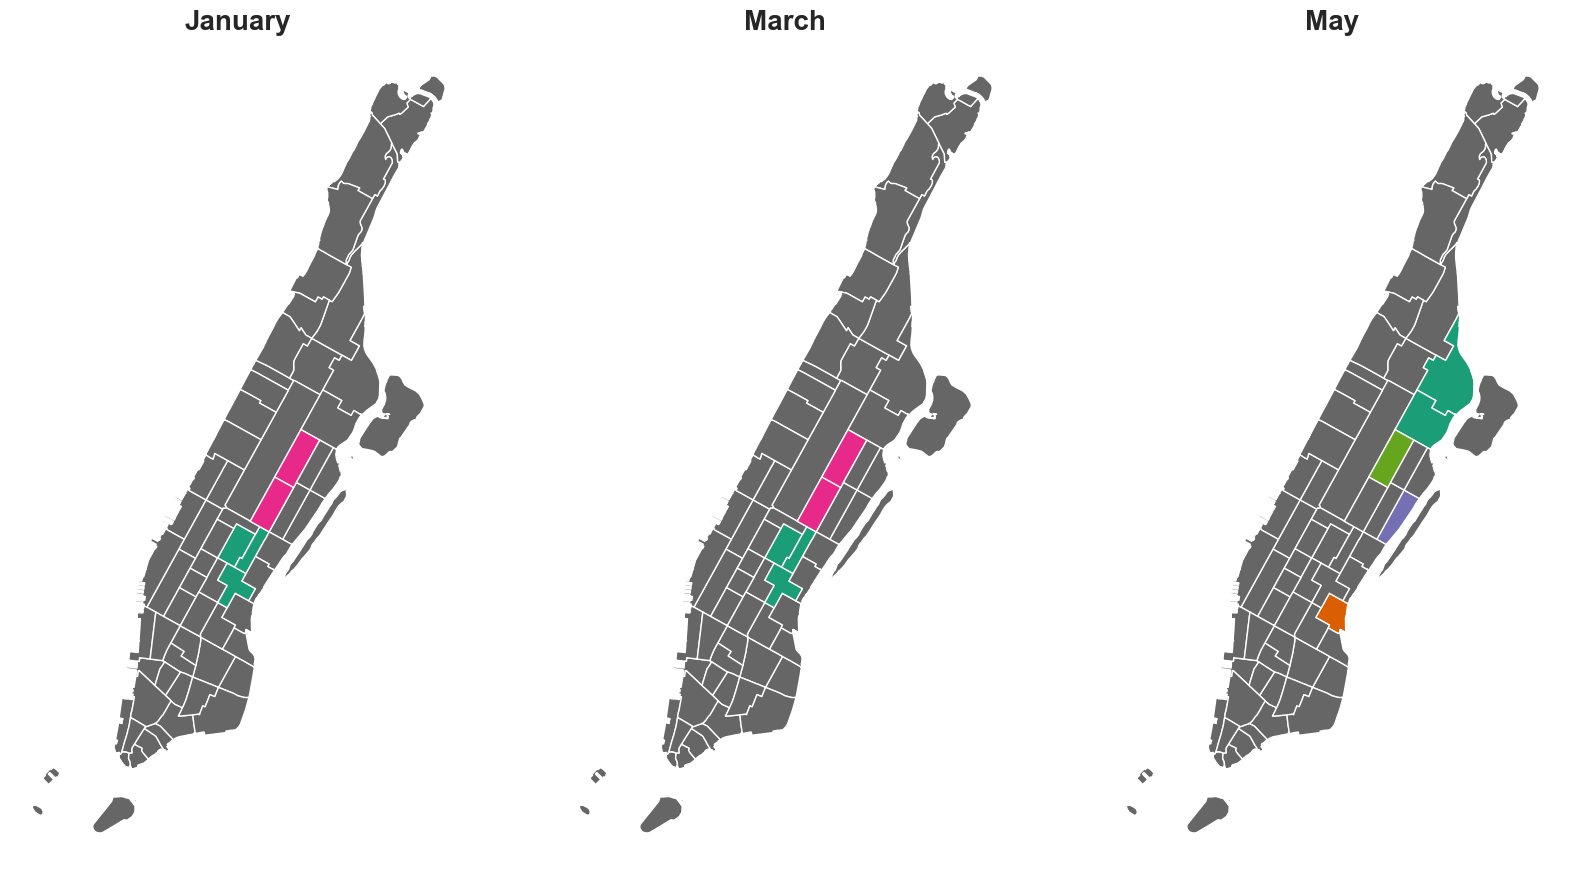

In [39]:
#
# Show Drop-off Location ID's
#

warnings.filterwarnings('ignore')

n = 5   # Max top locations

print("\n\n")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(jan_df['DOLocationID'], kde=False)
plt.title("The January Distribution of Drop-off Location ID's", weight='bold', fontsize=title_size)
plt.show();
print("Top " + str(n) + " most popular drop-off locations:")
jan_dropoff_most_popular = Counter(jan_df['DOLocationID']).most_common(n)
# print(jan_dropoff_most_popular)
print("")
for index, row in jan_dropoff_most_popular:
    print("Location " + str(index) + ": " + str((taxizone_df[taxizone_df['LocationID'] == index]['Zone']).array[0]) + " - used " + str(row) + " times.")
print("(* Murray Hill is likely Grand Central drop-offs)")
print("\n\n")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(march_df['DOLocationID'], kde=False)
plt.title("The March Distribution of Drop-off Location ID's", weight='bold', fontsize=title_size)
plt.show();
print("Top " + str(n) + " most popular drop-off locations:")
march_dropoff_most_popular = Counter(march_df['DOLocationID']).most_common(n)
# print(march_dropoff_most_popular)
print("")
for index, row in march_dropoff_most_popular:
    print("Location " + str(index) + ": " + str((taxizone_df[taxizone_df['LocationID'] == index]['Zone']).array[0]) + " - used " + str(row) + " times.")
print("(* Murray Hill is likely Grand Central drop-offs)")
print("\n\n")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.histplot(may_df['DOLocationID'], kde=False)
plt.title("The May Distribution of Drop off Location ID's", weight='bold', fontsize=title_size)
plt.show();
print("Top " + str(n) + " most popular drop-off locations:")
may_dropoff_most_popular = Counter(may_df['DOLocationID']).most_common(n)
# print(may_dropoff_most_popular)
print("")
for index, row in may_dropoff_most_popular:
    print("Location " + str(index) + ": " + str((taxizone_df[taxizone_df['LocationID'] == index]['Zone']).array[0]) + " - used " + str(row) + " times.")
print("\n\n")


mh1 = geozone_df[geozone_df['borough'] == 'Manhattan'].copy()
mh2 = geozone_df[geozone_df['borough'] == 'Manhattan'].copy()
mh3 = geozone_df[geozone_df['borough'] == 'Manhattan'].copy()

l1 = jan_dropoff_most_popular
l2 = march_dropoff_most_popular
l3 = may_dropoff_most_popular

max1 = 0
for index, row in l1:
    if index > max1:
        max1 = index
mh1['col'] = max1 + 100

max2 = 0
for index, row in l2:
    if index > max2:
        max2 = index
mh2['col'] = max2 + 100

max3 = 0
for index, row in l3:
    if index > max3:
        max3 = index
mh3['col'] = max3 + 100

for index, row in l1:
    mh1.at[index, 'col'] = index
for index, row in l2:
    mh2.at[index, 'col'] = index
for index, row in l3:
    mh3.at[index, 'col'] = index

    
f, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
ax[0].set_title('January', fontsize=title_size, fontweight ="bold")
ax[1].set_title('March', fontsize=title_size, fontweight ="bold")
ax[2].set_title('May', fontsize=title_size, fontweight ="bold")
    
# f.suptitle(title, fontsize=title_size, weight='bold')
mh1.plot(column='col', ax=ax[0], cmap='Dark2', figsize=(11, 11))
mh2.plot(column='col', ax=ax[1], cmap='Dark2', figsize=(11, 11))
mh3.plot(column='col', ax=ax[2], cmap='Dark2', figsize=(11, 11))
# plt.axis('equal')
plt.show();

</br>

# **Observation**
### Similar to the pick-up locations...
## Pre-COVID and start of COVID
### The most popular drop-off locations were the more affluent and heavy commuter areas:
#### Upper East Side South, Upper East Side North, Mid-Town Center, Mid-Town East, Murray Hill

## But during the heavy COVID month of May...
## The most popular drop-off locations change to:
#### East Harlem South: NYC Health, Mount Sinai
#### Kips Bay: Bellevue Hospital
#### Upper East Side North: Mount Sinai, East Side Comprehensive
#### Lenox Hill East: New York Presbyterian, Weil Cornell, Memorial Sloan Kettering
#### East Harlem North: Harlem Hospital, North General Hospital
# **The popular drop-off locations change to hospital areas.**

## **East Harlem South**
![SegmentLocal](EastHarlemSouth.png "segment")
## **Kips Bay**
![SegmentLocal](KipsBay.png "segment")
## **Upper East Side North**
![SegmentLocal](UpperEastSideNorth.png "segment")
## **Lenox Hill East**
![SegmentLocal](LenoxHillEast.png "segment")
## **East Harlem North**
![SegmentLocal](EastHarlemNorth2.png "segment")

<br>

# **Further Observation**

## **Most popular pick-up &#8594; drop-off location pairs:**

January's most popular pick-up --> drop-off location pairs:

1. Upper East Side South to Upper East Side North - was used 45539 times.
2. Upper East Side North to Upper East Side North - was used 38775 times.
3. Upper East Side North to Upper East Side South - was used 38264 times.
4. Upper East Side South to Upper East Side South - was used 33909 times.
5. (No Value Given) to (No Value Given) - was used 27928 times.
6. Upper West Side South to Upper West Side North - was used 19944 times.


March's most popular pick-up --> drop-off location pairs

1. Upper East Side South to Upper East Side North - was used 19418 times.
2. Upper East Side North to Upper East Side North - was used 17344 times.
3. Upper East Side North to Upper East Side South - was used 16475 times.
4. Upper East Side South to Upper East Side South - was used 14731 times.
5. (No Value Given) to (No Value Given) - was used 12167 times.
6. Upper West Side South to Upper West Side North - was used 9767 times.


May's most

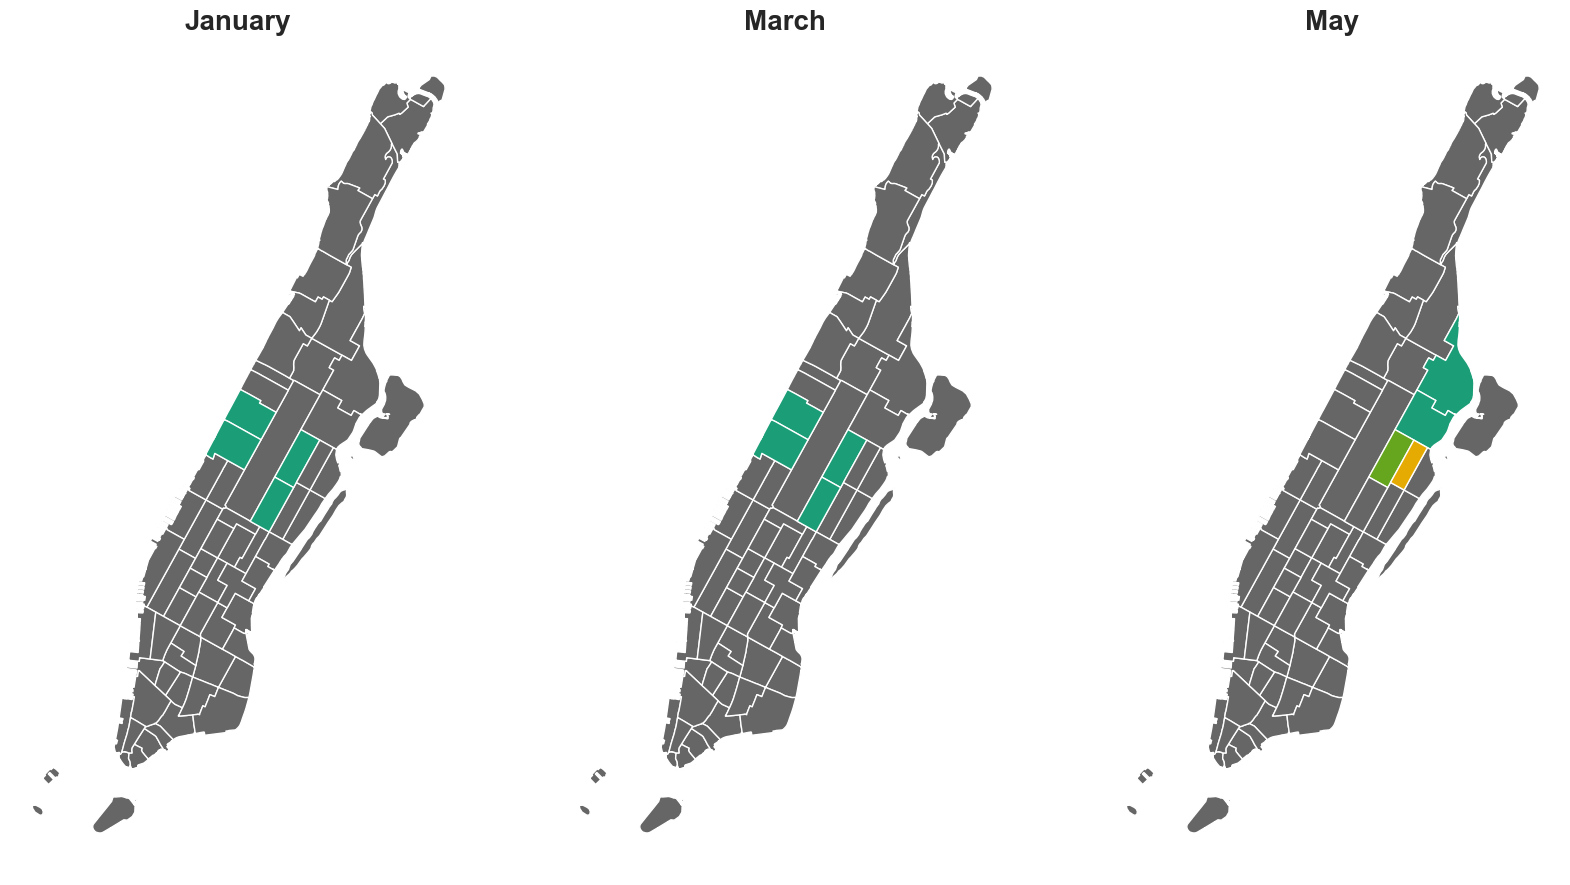

In [40]:
print("January's most popular pick-up --> drop-off location pairs:\n")
jan_pairs = Counter(jan_df['PULocationID'].astype(str) + '|' + jan_df['DOLocationID'].astype(str)).most_common(6)
c = 1
for index, row in jan_pairs:
    start, end = str(index).split('|')
    pickup = (taxizone_df[taxizone_df['LocationID'] == int(start)]['Zone']).array[0]
    dropoff = (taxizone_df[taxizone_df['LocationID'] == int(end)]['Zone']).array[0]
    if pickup == 'NV':
        pickup = "(No Value Given)"
    if dropoff == "NV":
        dropoff = "(No Value Given)"
    print(str(c) + ". " + pickup + " to " + dropoff + " - was used " + str(row) + " times.")
    # print("Pick-up at location: " + pickup + " to drop-off location: " + dropoff + " was used " + str(row) + " times.")
    c += 1
print("\n")

print("March's most popular pick-up --> drop-off location pairs\n")
march_pairs = Counter(march_df['PULocationID'].astype(str) + '|' + march_df['DOLocationID'].astype(str)).most_common(6)
c = 1
for index, row in march_pairs:
    start, end = str(index).split('|')
    pickup = (taxizone_df[taxizone_df['LocationID'] == int(start)]['Zone']).array[0]
    dropoff = (taxizone_df[taxizone_df['LocationID'] == int(end)]['Zone']).array[0]
    if pickup == 'NV':
        pickup = "(No Value Given)"
    if dropoff == "NV":
        dropoff = "(No Value Given)"
    print(str(c) + ". " + pickup + " to " + dropoff + " - was used " + str(row) + " times.")
    c += 1
print("\n")

print("May's most popular pick-up --> drop-off location pairs\n")
may_pairs = Counter(may_df['PULocationID'].astype(str) + '|' + may_df['DOLocationID'].astype(str)).most_common(6)
c = 1
for row, index in may_pairs:
    start, end = str(row).split('|')
    pickup = (taxizone_df[taxizone_df['LocationID'] == int(start)]['Zone']).array[0]
    dropoff = (taxizone_df[taxizone_df['LocationID'] == int(end)]['Zone']).array[0]
    if pickup == 'NV':
        pickup = "(No Value Given)"
    if dropoff == "NV":
        dropoff = "(No Value Given)"
    print(str(c) + ". " + pickup + " to " + dropoff + " - was used " + str(index) + " times.")
    c += 1
print("")


# Show the maps

mh1 = geozone_df[geozone_df['borough'] == 'Manhattan'].copy()
mh2 = geozone_df[geozone_df['borough'] == 'Manhattan'].copy()
mh3 = geozone_df[geozone_df['borough'] == 'Manhattan'].copy()

l1 = jan_pairs
l2 = march_pairs
l3 = may_pairs

max1 = 0
for index, row in l1:
    start, end = str(index).split('|')
    start = int(start)
    end = int(end)
    m = max(start, end)
    if m > max1:
        max1 = m
mh1['col'] = max1 + 100

max2 = 0
for index, row in l2:
    start, end = str(index).split('|')
    start = int(start)
    end = int(end)
    m = max(start, end)
    if m > max2:
        max2 = m
mh2['col'] = max2 + 100

max3 = 0
for index, row in l3:
    start, end = str(index).split('|')
    start = int(start)
    end = int(end)
    m = max(start, end)
    if m > max3:
        max3 = m
mh3['col'] = max3 + 100


for index, row in l1:
    start, end = str(index).split('|')
    start = int(start)
    end = int(end)
    mh1.at[start, 'col'] = start
    mh1.at[end, 'col'] = end
print()
for index, row in l2:
    start, end = str(index).split('|')
    start = int(start)
    end = int(end)
    mh2.at[start, 'col'] = start
    mh2.at[end, 'col'] = end
print()
for index, row in l3:
    start, end = str(index).split('|')
    start = int(start)
    end = int(end)
    mh3.at[start, 'col'] = start
    mh3.at[end, 'col'] = end
print()


f, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
ax[0].set_title('January', fontsize=title_size, fontweight ="bold")
ax[1].set_title('March', fontsize=title_size, fontweight ="bold")
ax[2].set_title('May', fontsize=title_size, fontweight ="bold")
    
# f.suptitle(title, fontsize=title_size, weight='bold')
mh1.plot(column='col', ax=ax[0], cmap='Dark2', figsize=(11, 11))
mh2.plot(column='col', ax=ax[1], cmap='Dark2', figsize=(11, 11))
mh3.plot(column='col', ax=ax[2], cmap='Dark2', figsize=(11, 11))
# plt.axis('equal')
plt.show();

## While pick-ups and drop-offs peak in the hospital areas during COVID, it should also be noted that there was an increase of pick-ups and drop-offs in less affluent areas.
## Perhaps this is due to more affluent people leaving NYC, forcing yellow taxis to go further north into the Yellow/Green taxi zone (North of 110th St) looking for passengers.

<br>

## **Find trip-time outliers**

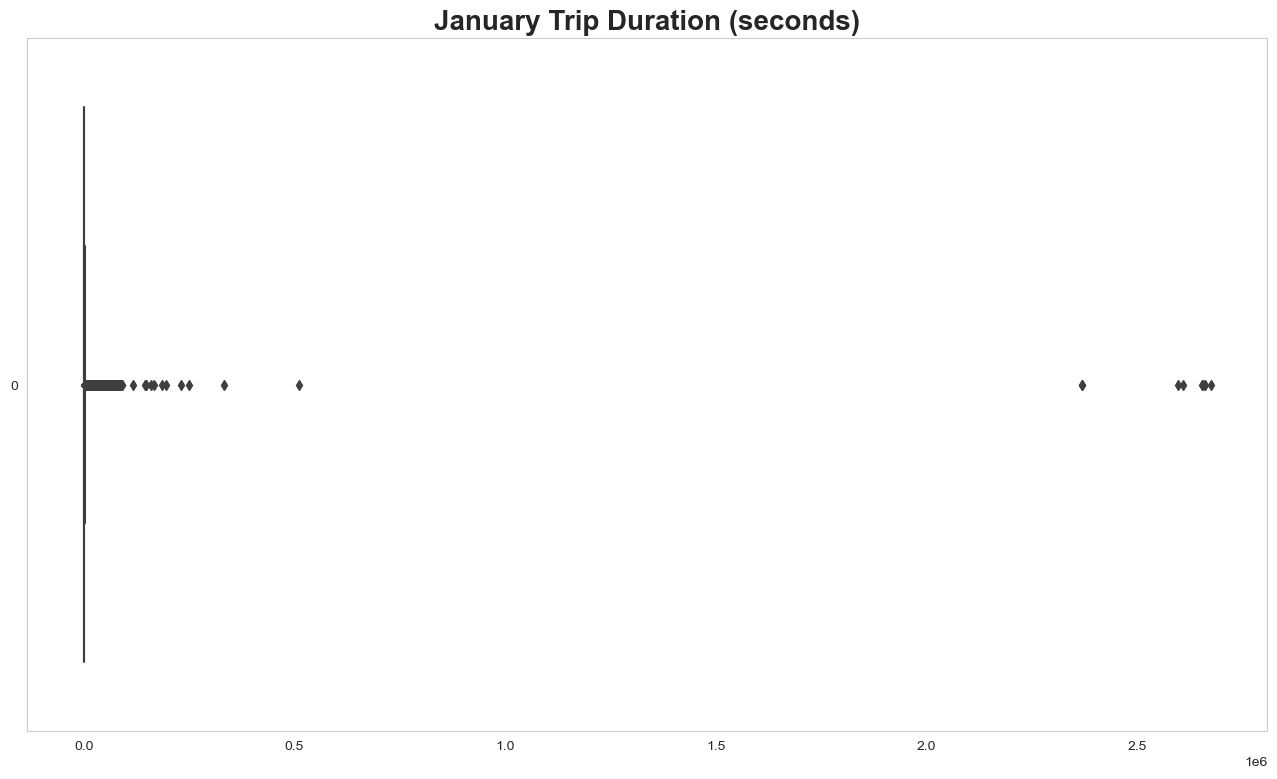

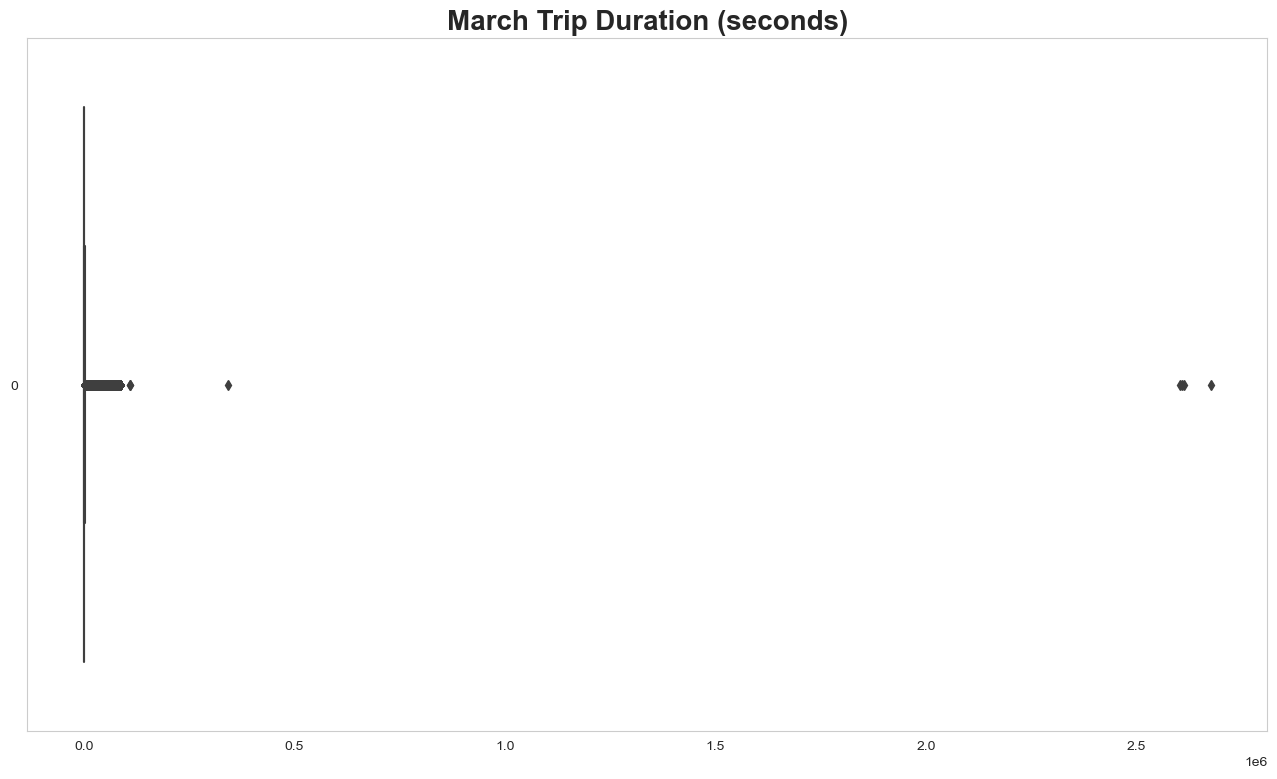

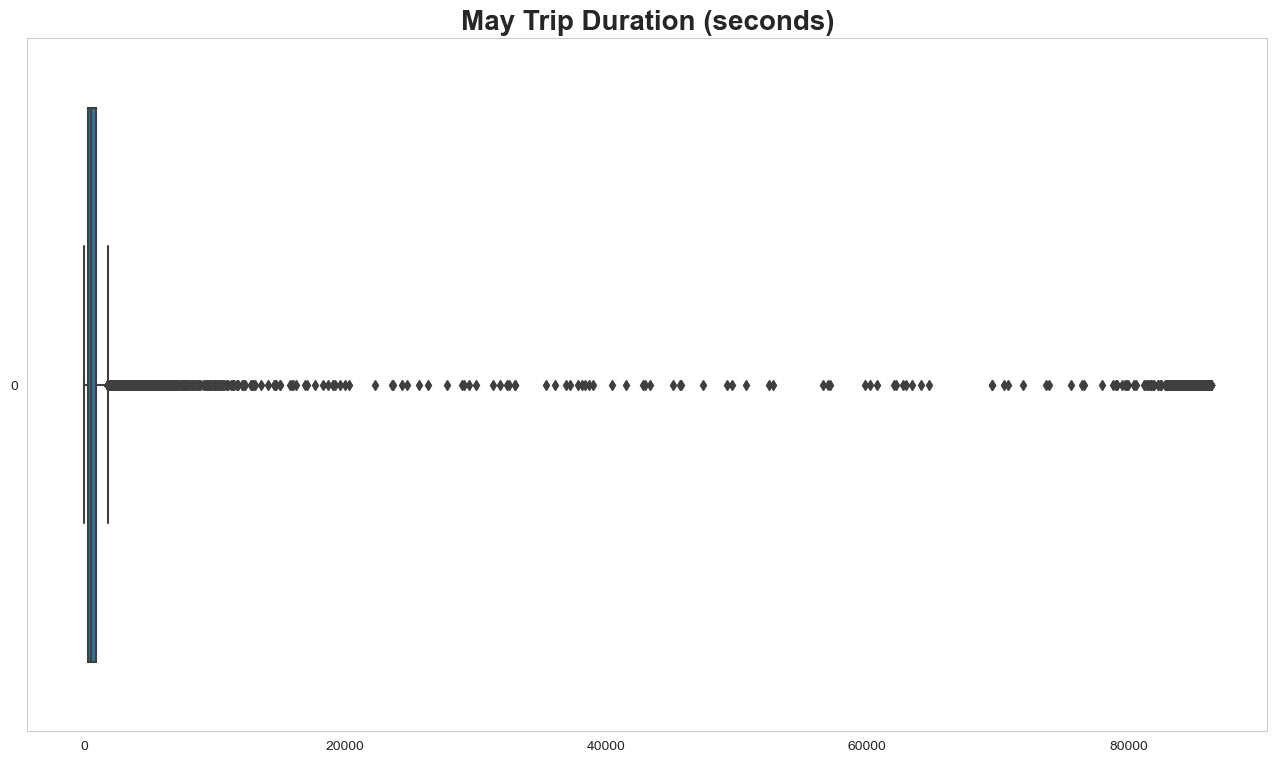

In [41]:
#
# Find trip-time outliers
#

print("\n\n")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(jan_df['trip_in_seconds'], orient='horizontal')
plt.title('January Trip Duration (seconds)', weight='bold', fontsize=title_size)
plt.show();

print("\n\n")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(march_df['trip_in_seconds'], orient='horizontal')
plt.title('March Trip Duration (seconds)', weight='bold', fontsize=title_size)
plt.show();

print("\n\n")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(may_df['trip_in_seconds'], orient='horizontal')
plt.title('May Trip Duration (seconds)', weight='bold', fontsize=title_size)
plt.show();

<br>

## **Update the trip time outliers**
#### Finding similar trips and take the average of them
#### If equal to 0.0 then find similar trips in the opposite direction and take the average
#### _TODO:_ Take into consideration the time of day when finding the average

Number of outlier values:
  January 16106
  March 6765
  May 952

Converting January's - outlier trip times...Done
Converting March's - outlier trip times...Done
Converting May's - outlier trip times...Done

Remaining trip time outliers (average value could not be computed):
  January 4
  March 2
  May 4



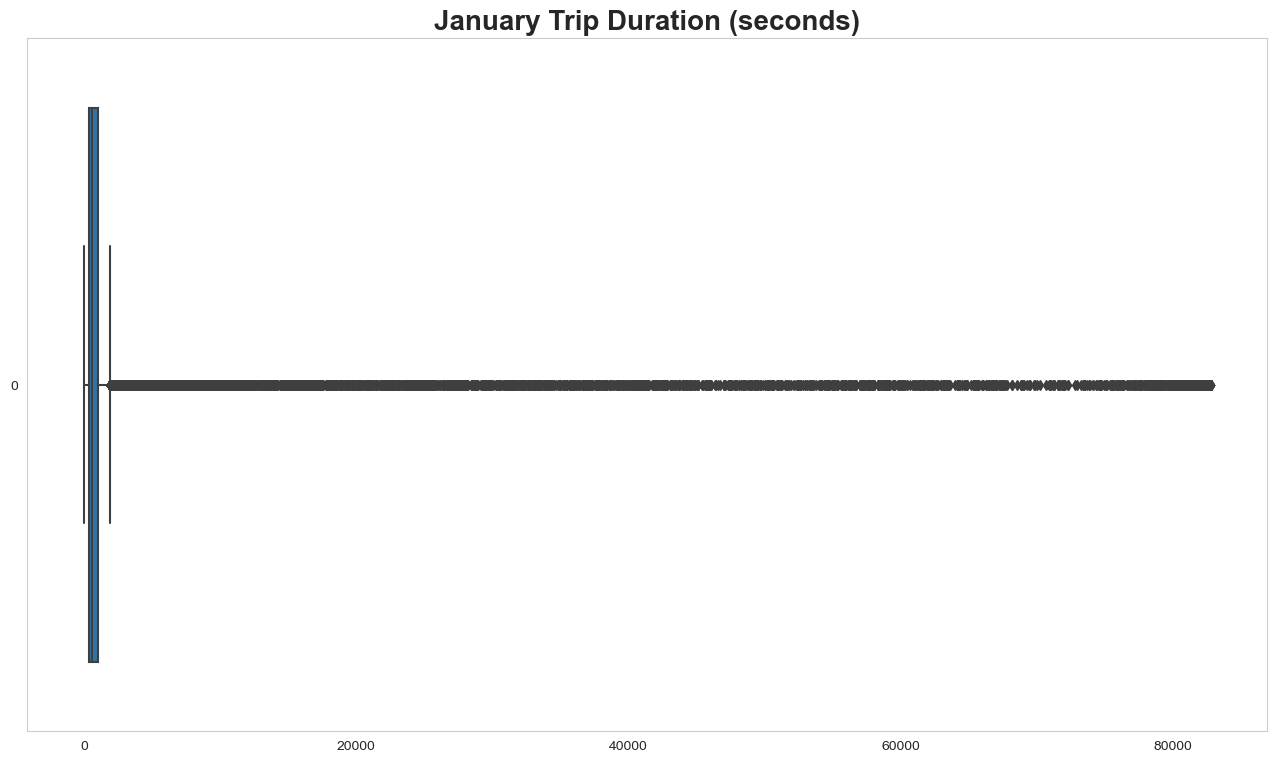

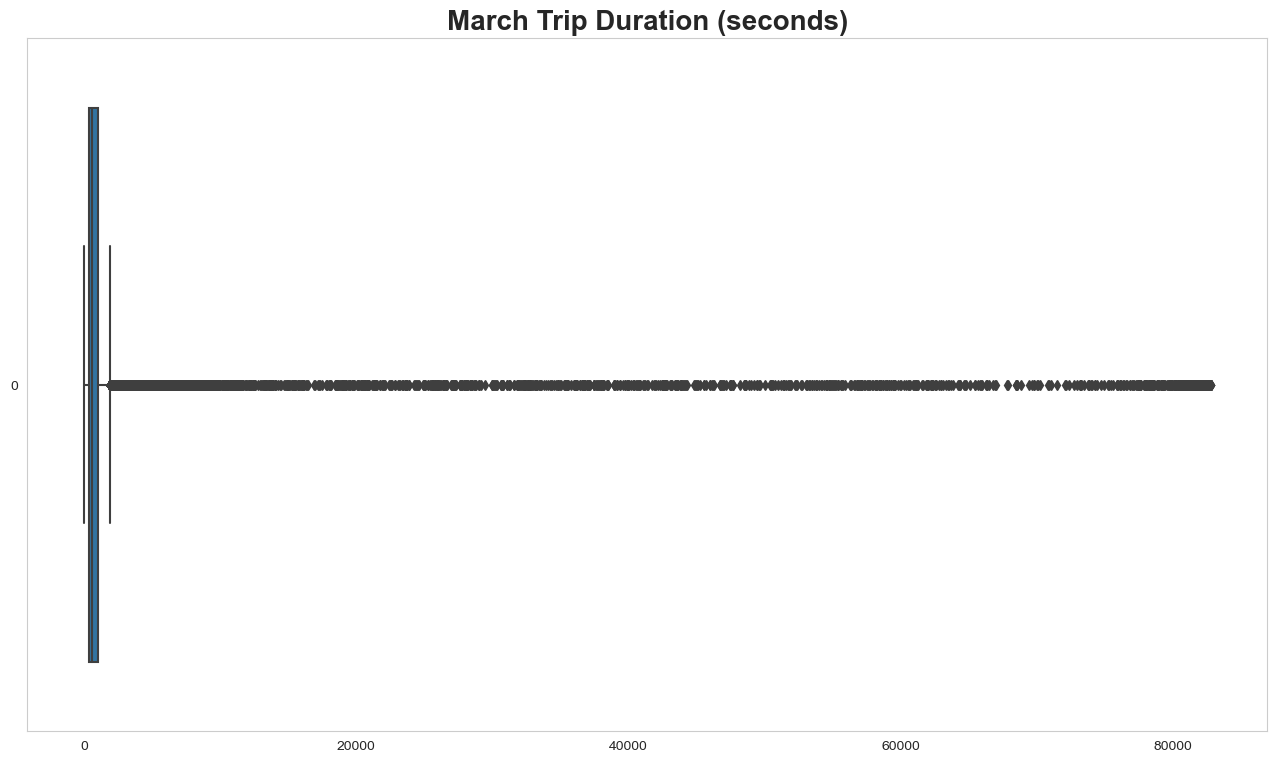

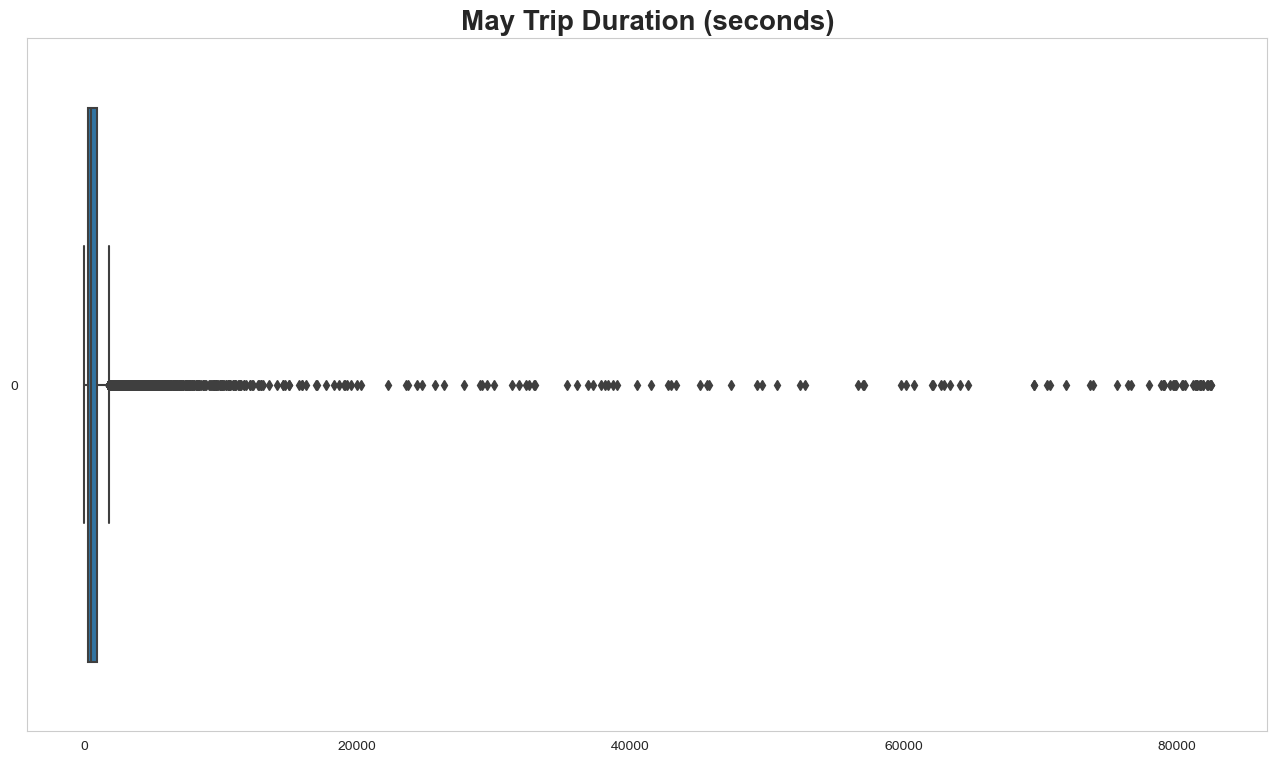

In [42]:
#
# Update trip time values to the average of the trips starting at and ending at the same zones
# If the average is still zero then take the average of the trips traveling in the reverse order
#


cutoff = (60*60*23)

def convert_jan_outlier_trip_time(row):
    
    global cutoff
    
    # Find the average time of trips going to the same locations
    avg = jan_df.loc[( (jan_df['PULocationID'] == row['PULocationID']) & (jan_df['DOLocationID'] == row['DOLocationID']) & (jan_df['trip_in_seconds'] > 0) & (jan_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)
    
    avg = jan_df.loc[( (jan_df['DOLocationID'] == row['PULocationID']) & (jan_df['PULocationID'] == row['DOLocationID']) & (jan_df['trip_in_seconds'] > 0) & (jan_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)

    # Try the March dataset
    avg = march_df.loc[( (march_df['PULocationID'] == row['PULocationID']) & (march_df['DOLocationID'] == row['DOLocationID']) & (march_df['trip_in_seconds'] > 0) & (march_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)
    
    avg = march_df.loc[( (march_df['DOLocationID'] == row['PULocationID']) & (march_df['PULocationID'] == row['DOLocationID']) & (march_df['trip_in_seconds'] > 0) & (march_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)   
    
    # Try the May dataset
    avg = may_df.loc[( (may_df['PULocationID'] == row['PULocationID']) & (may_df['DOLocationID'] == row['DOLocationID']) & (may_df['trip_in_seconds'] > 0) & (may_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)
    
    avg = may_df.loc[( (may_df['DOLocationID'] == row['PULocationID']) & (may_df['PULocationID'] == row['DOLocationID']) & (may_df['trip_in_seconds'] > 0) & (may_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)
            
    # No hope for a trip time
    if pd.isnull(avg):
        # print("No hope")
        avg = np.int64(0)
        
    avg = avg.astype(np.int64)
    
    return avg


def convert_march_outlier_trip_time(row):
    
    global cutoff
    
    # Find the average time of trips going to the same locations
    avg = march_df.loc[( (march_df['PULocationID'] == row['PULocationID']) & (march_df['DOLocationID'] == row['DOLocationID']) & (march_df['trip_in_seconds'] > 0) & (march_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)
    
    # Try the opposite direction
    avg = march_df.loc[( (march_df['DOLocationID'] == row['PULocationID']) & (march_df['PULocationID'] == row['DOLocationID']) & (march_df['trip_in_seconds'] > 0) & (march_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)

    # Try the January dataset
    avg = jan_df.loc[( (jan_df['PULocationID'] == row['PULocationID']) & (jan_df['DOLocationID'] == row['DOLocationID']) & (jan_df['trip_in_seconds'] > 0) & (jan_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)
    
    avg = jan_df.loc[( (jan_df['DOLocationID'] == row['PULocationID']) & (jan_df['PULocationID'] == row['DOLocationID']) & (jan_df['trip_in_seconds'] > 0) & (jan_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)
    
    # Try the May dataset
    avg = may_df.loc[( (may_df['PULocationID'] == row['PULocationID']) & (may_df['DOLocationID'] == row['DOLocationID']) & (may_df['trip_in_seconds'] > 0) & (may_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)   
    
    avg = may_df.loc[( (may_df['DOLocationID'] == row['PULocationID']) & (may_df['PULocationID'] == row['DOLocationID']) & (may_df['trip_in_seconds'] > 0) & (may_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)   
        
    # No hope for a trip time
    if pd.isnull(avg):
        # print("No hope")
        avg = np.int64(0)
        
    avg = avg.astype(np.int64)

    return avg


def convert_may_outlier_trip_time(row):

    global cutoff
    
    # Find the average time of trips going to the same locations
    avg = may_df.loc[( (may_df['PULocationID'] == row['PULocationID']) & (may_df['DOLocationID'] == row['DOLocationID']) & (may_df['trip_in_seconds'] > 0) & (may_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)   
    
    # if no average then try the trip in the opposite direction
    avg = may_df.loc[( (may_df['DOLocationID'] == row['PULocationID']) & (may_df['PULocationID'] == row['DOLocationID']) & (may_df['trip_in_seconds'] > 0) & (may_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)
    
    # Try the March dataset
    avg = march_df.loc[( (march_df['PULocationID'] == row['PULocationID']) & (march_df['DOLocationID'] == row['DOLocationID']) & (march_df['trip_in_seconds'] > 0) & (march_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)
    
    avg = march_df.loc[( (march_df['DOLocationID'] == row['PULocationID']) & (march_df['PULocationID'] == row['DOLocationID']) & (march_df['trip_in_seconds'] > 0) & (march_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)
    
    # Try the January dataset
    avg = jan_df.loc[( (jan_df['PULocationID'] == row['PULocationID']) & (jan_df['DOLocationID'] == row['DOLocationID']) & (jan_df['trip_in_seconds'] > 0) & (jan_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)
    
    avg = jan_df.loc[( (jan_df['DOLocationID'] == row['PULocationID']) & (jan_df['PULocationID'] == row['DOLocationID']) & (jan_df['trip_in_seconds'] > 0) & (jan_df['trip_in_seconds'] <= cutoff) ), 'trip_in_seconds'].mean()
    if not pd.isnull(avg):
        return avg.astype(np.int64)
 
    # No hope for a trip time
    if pd.isnull(avg):
        # print("No hope")
        avg = np.int64(0)
        
    avg = avg.astype(np.int64)

    return avg


print("Number of outlier values:")
jan_outliers = len(jan_df.loc[jan_df['trip_in_seconds'] > cutoff, 'trip_in_seconds']) + len(jan_df.loc[jan_df['trip_in_seconds'] <= 0, 'trip_in_seconds'])
march_outliers = len(march_df.loc[march_df['trip_in_seconds'] > cutoff, 'trip_in_seconds']) + len(march_df.loc[march_df['trip_in_seconds'] <= 0, 'trip_in_seconds'])
may_outliers = len(may_df.loc[may_df['trip_in_seconds'] > cutoff, 'trip_in_seconds']) + len(may_df.loc[may_df['trip_in_seconds'] <= 0, 'trip_in_seconds'])

print("  January " + str(jan_outliers))
print("  March " + str(march_outliers))
print("  May " + str(may_outliers))
print("")

print("Converting January's - outlier trip times...", end="")
temp_df = jan_df.loc[ (jan_df['trip_in_seconds'] > cutoff) | (jan_df['trip_in_seconds'] <= 0) ]
temp_df['trip_in_seconds'] = temp_df.apply(convert_jan_outlier_trip_time, axis=1)
jan_df.loc[temp_df.index, :] = temp_df[:]
print("Done")

print("Converting March's - outlier trip times...", end="")
temp_df = march_df.loc[ (march_df['trip_in_seconds'] > cutoff) | (march_df['trip_in_seconds'] <= 0) ]
temp_df['trip_in_seconds'] = temp_df.apply(convert_march_outlier_trip_time, axis=1)
march_df.loc[temp_df.index, :] = temp_df[:]
print("Done")

print("Converting May's - outlier trip times...", end="")
temp_df = may_df.loc[ (may_df['trip_in_seconds'] > cutoff) | (may_df['trip_in_seconds'] <= 0) ]
temp_df['trip_in_seconds'] = temp_df.apply(convert_may_outlier_trip_time, axis=1)
may_df.loc[temp_df.index, :] = temp_df[:]
print("Done")


jan_outliers = len(jan_df.loc[jan_df['trip_in_seconds'] > cutoff, 'trip_in_seconds']) + len(jan_df.loc[jan_df['trip_in_seconds'] <= 0, 'trip_in_seconds'])
march_outliers = len(march_df.loc[march_df['trip_in_seconds'] > cutoff, 'trip_in_seconds']) + len(march_df.loc[march_df['trip_in_seconds'] <= 0, 'trip_in_seconds'])
may_outliers = len(may_df.loc[may_df['trip_in_seconds'] > cutoff, 'trip_in_seconds']) + len(may_df.loc[may_df['trip_in_seconds'] <= 0, 'trip_in_seconds'])
print("\nRemaining trip time outliers (average value could not be computed):")
print("  January " + str(jan_outliers))
print("  March " + str(march_outliers))
print("  May " + str(may_outliers))
print("")


sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(jan_df['trip_in_seconds'], orient='horizontal')
plt.title('January Trip Duration (seconds)', weight='bold', fontsize=title_size)
plt.show();
print("\n")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(march_df['trip_in_seconds'], orient='horizontal')
plt.title('March Trip Duration (seconds)', weight='bold', fontsize=title_size)
plt.show();
print("\n")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(may_df['trip_in_seconds'], orient='horizontal')
plt.title('May Trip Duration (seconds)', weight='bold', fontsize=title_size)
plt.show();
print("\n")

<br>

## **Find the** _Trip Distance_ **Outliers**

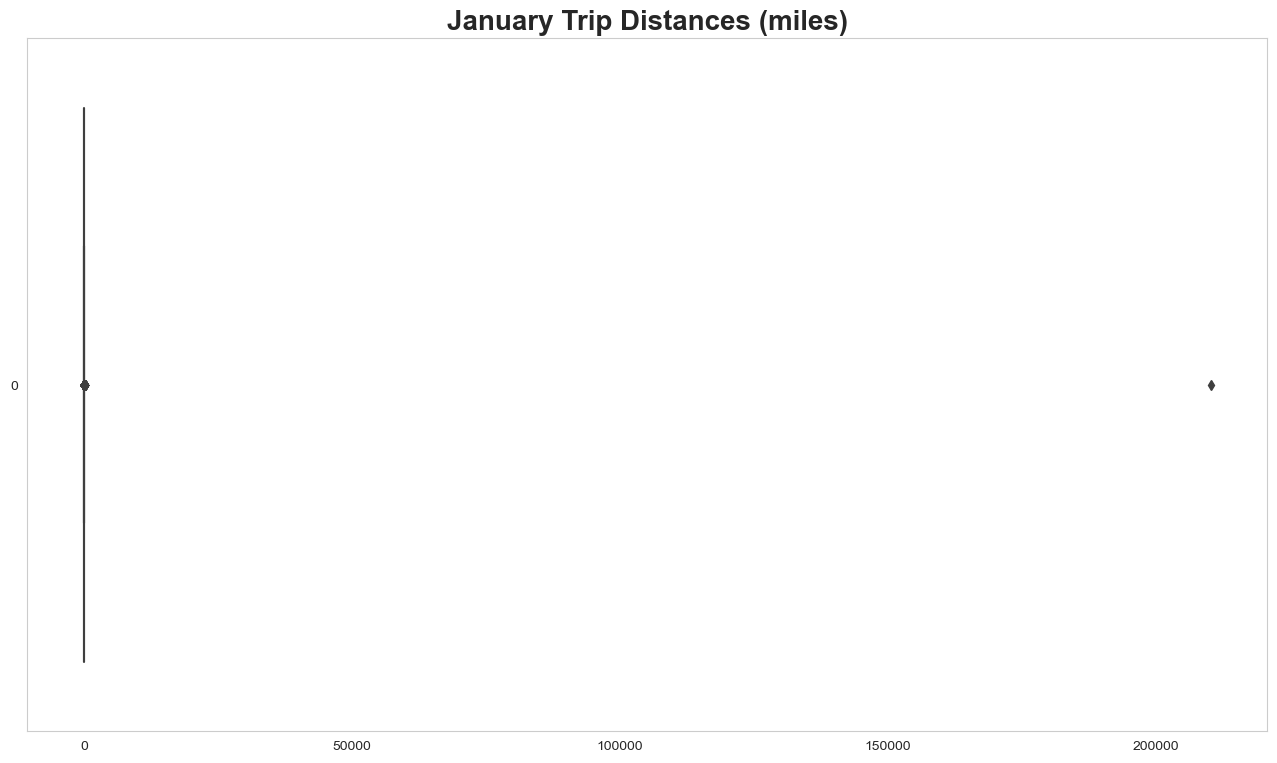

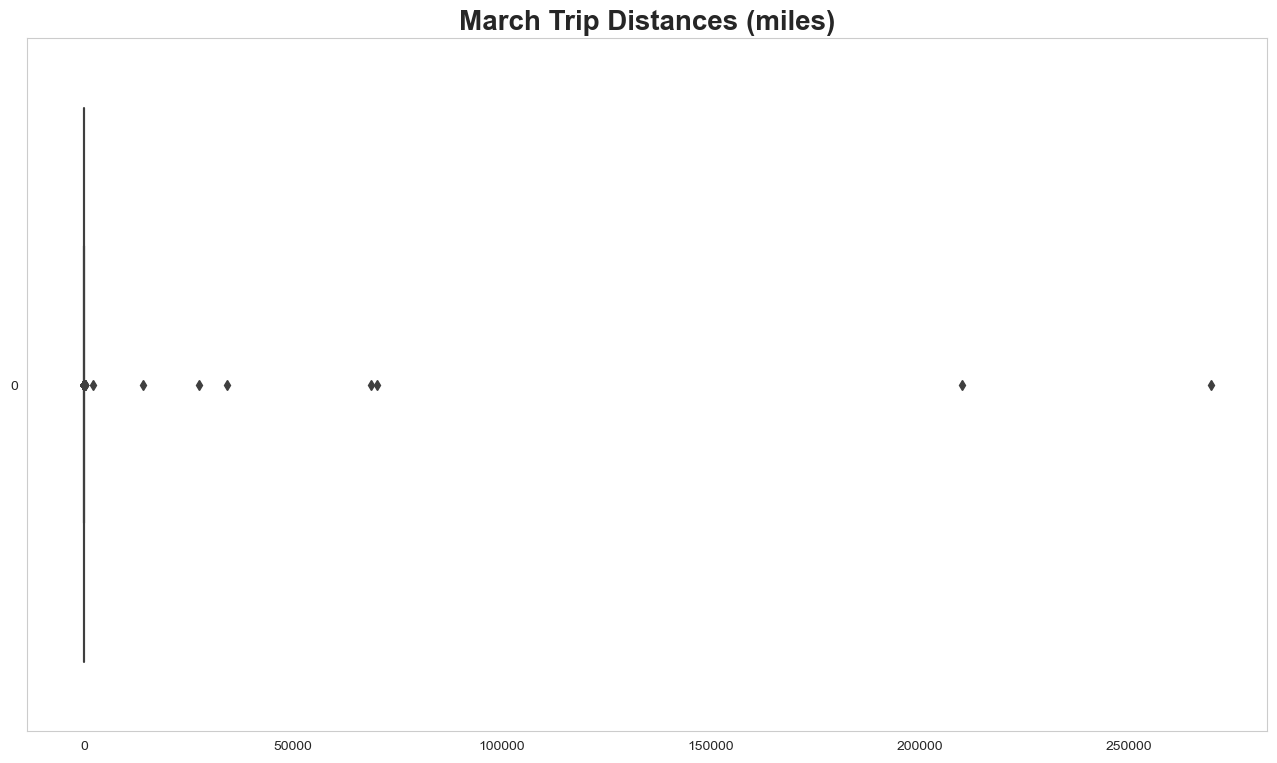

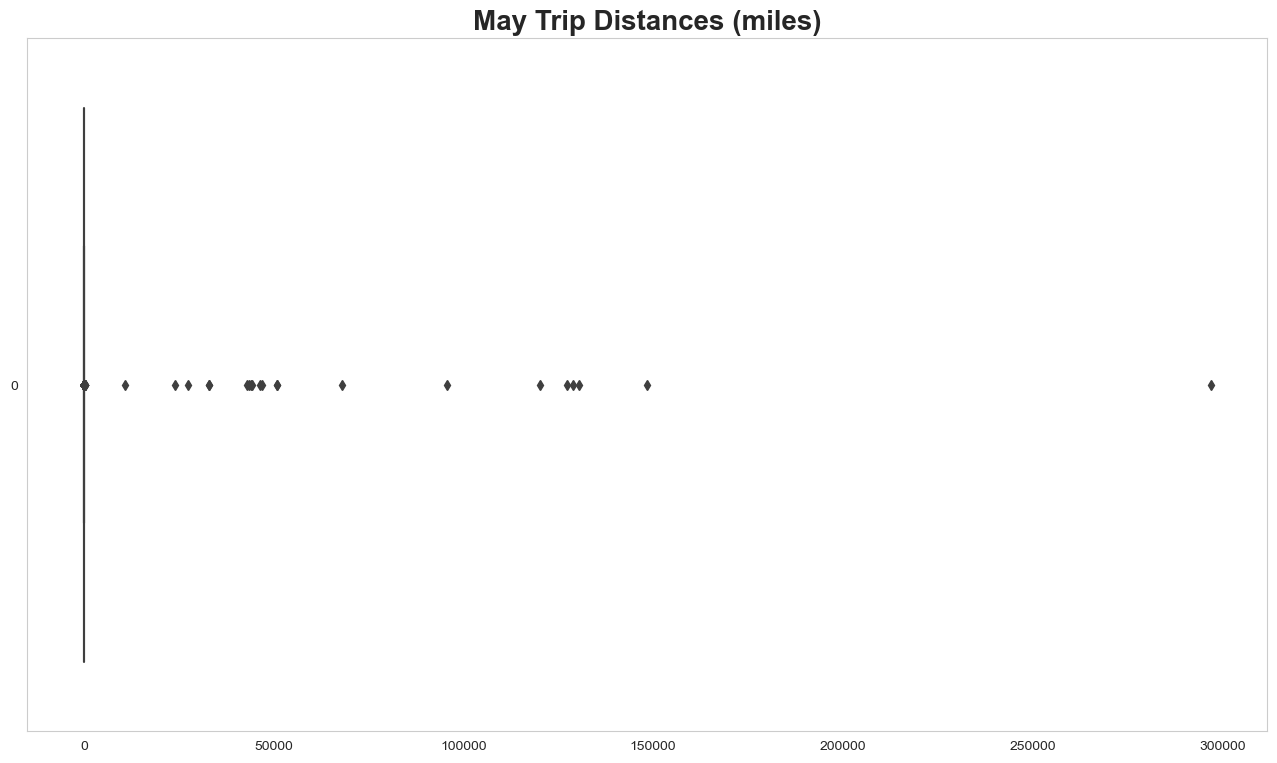

In [43]:
print("")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(jan_df['trip_distance'], orient='horizontal')
plt.title('January Trip Distances (miles)', weight='bold', fontsize=title_size)
plt.show();
print("")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(march_df['trip_distance'], orient='horizontal')
plt.title('March Trip Distances (miles)', weight='bold', fontsize=title_size)
plt.show();
print("")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(may_df['trip_distance'], orient='horizontal')
plt.title('May Trip Distances (miles)', weight='bold', fontsize=title_size)
plt.show();

<br>

## **Update the** _Trip Distances_ **Outliers**
#### Finding similar trips and take the average of them
#### If still _0.0_ then find similar trips in the opposite direction and take the average
#### _TODO:_ Take into consideration the time of day and trip time when finding the average

Number of trip distances outliers:
   Jan: 70201
   March: 31404
   May: 10247

Converting January's trip distance outliers...Done
Converting March's trip distance outliers...Done
Converting May's trip distance outliers...Done

Remaining trip distances outliers (average value could not be computed):
   Jan: 406
   March: 128
   May: 78






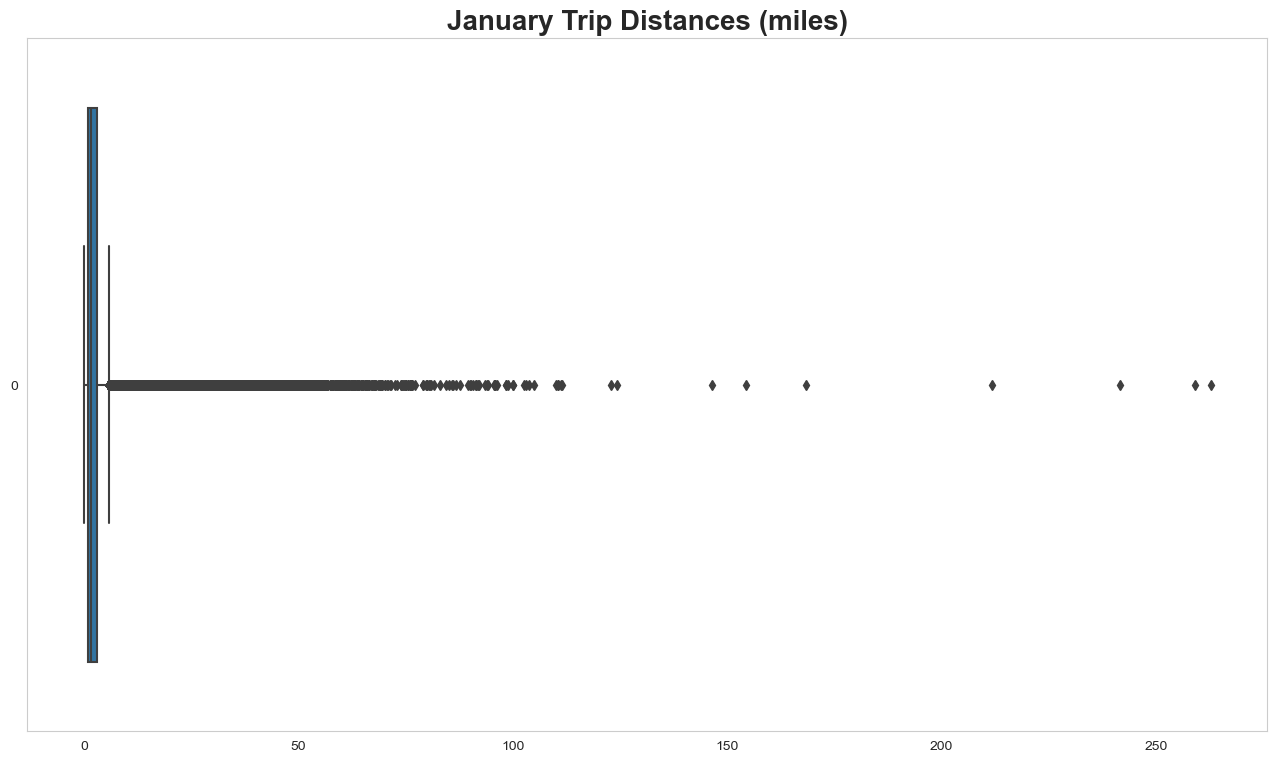

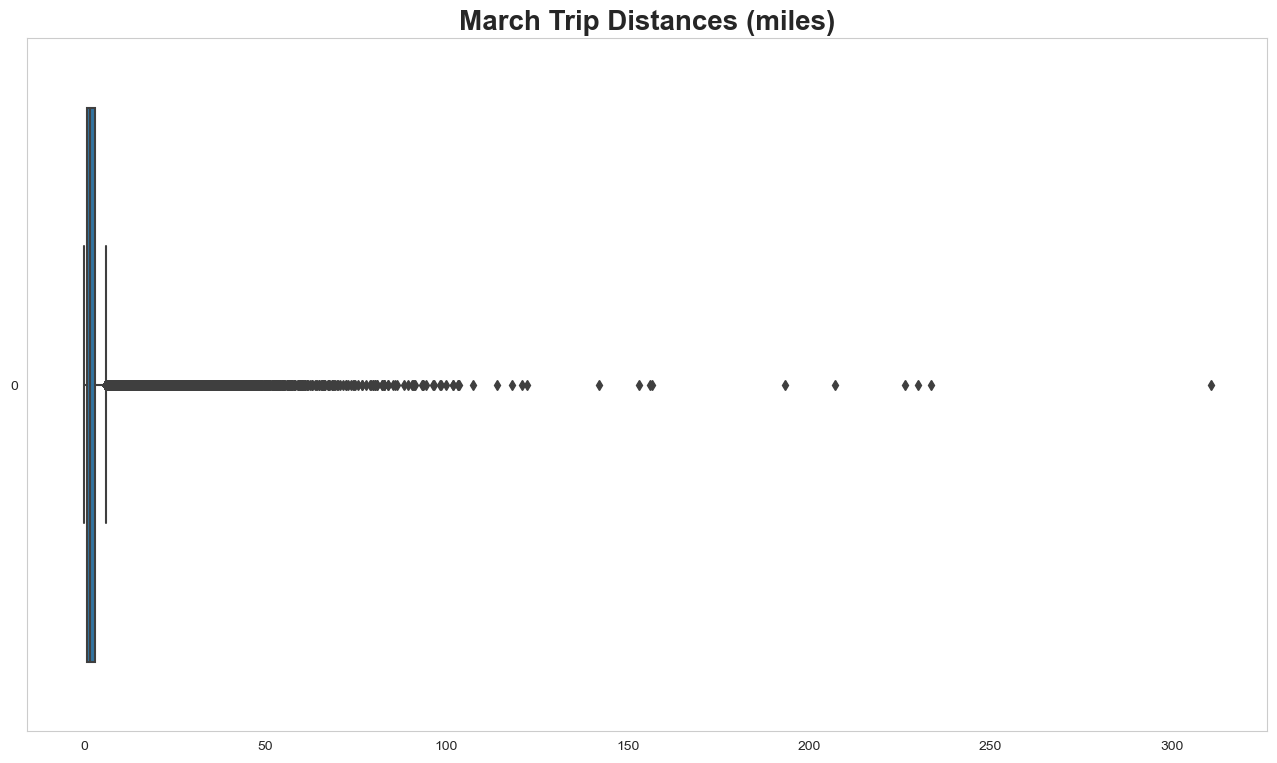

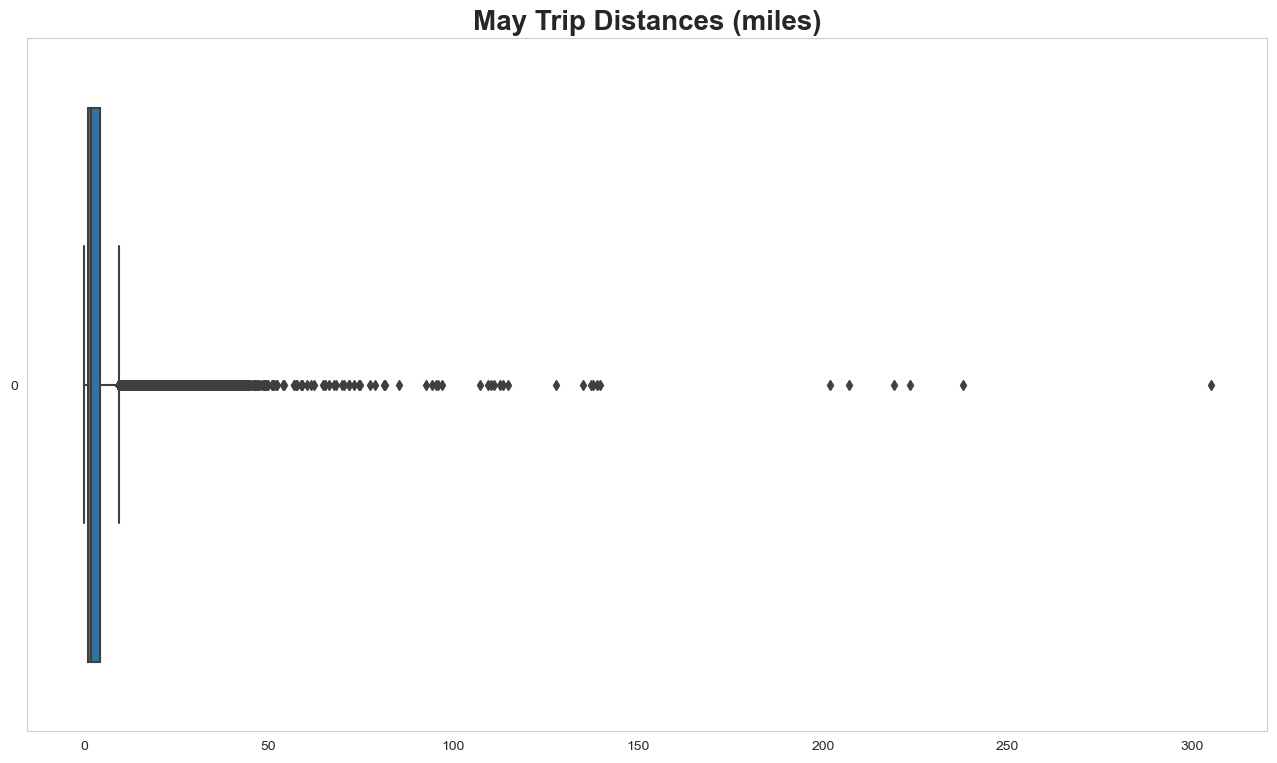

In [44]:
#
# Convert zero trip distance values to the average of the trips starting at and ending at the same zones
# If the average is still zero then take the average of the trips traveling in the reverse order
#

cutoff = 800.00

def convert_jan_trip_distance_outlier(row):
    
    global cutoff
    
    avg = jan_df.loc[( (jan_df['PULocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (jan_df['DOLocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (jan_df['trip_distance'] > 0.0) & (jan_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean()
    if not pd.isnull(avg):
        return round(avg, 2)
    
    avg = jan_df.loc[( (jan_df['DOLocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (jan_df['PULocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (jan_df['trip_distance'] > 0.0) & (jan_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean()
    if not pd.isnull(avg):
        return round(avg, 2)
    
    avg = march_df.loc[( (march_df['PULocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (march_df['DOLocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (march_df['trip_distance'] > 0.0) & (march_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean()
    if not pd.isnull(avg):
        return round(avg, 2)
    
    avg = march_df.loc[( (march_df['DOLocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (march_df['PULocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (march_df['trip_distance'] > 0.0) & (march_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean() 
    if not pd.isnull(avg):
        return round(avg, 2)
    
    avg = may_df.loc[( (may_df['PULocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (may_df['DOLocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (may_df['trip_distance'] > 0.0) & (may_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean()    
    if not pd.isnull(avg):
        return round(avg, 2)
    
    avg = may_df.loc[( (may_df['DOLocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (may_df['PULocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (may_df['trip_distance'] > 0.0) & (may_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean()
    if not pd.isnull(avg):
        return round(avg, 2)
    
    # No hope for a trip distance
    if pd.isnull(avg):
        # print("No hope")
        avg = 0.0
        
    return round(avg, 2)


def convert_march_trip_distance_outlier(row):
    
    global cutoff
    
    # Find the average distance of trips going to the same locations
    avg = march_df.loc[( (march_df['PULocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (march_df['DOLocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (march_df['trip_distance'] > 0.0) & (march_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean()
    if not pd.isnull(avg):
        return round(avg, 2)
    
    avg = march_df.loc[( (march_df['DOLocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (march_df['PULocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (march_df['trip_distance'] > 0.0) & (march_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean() 
    if not pd.isnull(avg):
        return round(avg, 2)
    
    avg = jan_df.loc[( (jan_df['PULocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (jan_df['DOLocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (jan_df['trip_distance'] > 0.0) & (jan_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean()
    if not pd.isnull(avg):
        return round(avg, 2)
    
    avg = jan_df.loc[( (jan_df['DOLocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (jan_df['PULocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (jan_df['trip_distance'] > 0.0) & (jan_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean()
    if not pd.isnull(avg):
        return round(avg, 2)
    
    avg = may_df.loc[( (may_df['PULocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (may_df['DOLocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (may_df['trip_distance'] > 0.0) & (may_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean()    
    if not pd.isnull(avg):
        return round(avg, 2)
    
    avg = may_df.loc[( (may_df['DOLocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (may_df['PULocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (may_df['trip_distance'] > 0.0) & (may_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean()
    if not pd.isnull(avg):
        return round(avg, 2)
    
    # No hope for a trip distance
    if pd.isnull(avg):
        # print("No hope")
        avg = 0.0
        
    return round(avg, 2)


def convert_may_trip_distance_outlier(row):
    
    global cutoff
    
    avg = may_df.loc[( (may_df['PULocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (may_df['DOLocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (may_df['trip_distance'] > 0.0) & (may_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean()    
    if not pd.isnull(avg):
        return round(avg, 2)
    
    avg = may_df.loc[( (may_df['DOLocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (may_df['PULocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (may_df['trip_distance'] > 0.0) & (may_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean()
    if not pd.isnull(avg):
        return round(avg, 2)
    
    avg = march_df.loc[( (march_df['PULocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (march_df['DOLocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (march_df['trip_distance'] > 0.0) & (march_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean()
    if not pd.isnull(avg):
        return round(avg, 2)
    
    avg = march_df.loc[( (march_df['DOLocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (march_df['PULocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (march_df['trip_distance'] > 0.0) & (march_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean() 
    if not pd.isnull(avg):
        return round(avg, 2)
    
    avg = jan_df.loc[( (jan_df['PULocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (jan_df['DOLocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (jan_df['trip_distance'] > 0.0) & (jan_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean()
    if not pd.isnull(avg):
        return round(avg, 2)
    
    avg = jan_df.loc[( (jan_df['DOLocationID'].astype(np.int64) == row['PULocationID'].astype(np.int64)) & (jan_df['PULocationID'].astype(np.int64) == row['DOLocationID'].astype(np.int64)) & (jan_df['trip_distance'] > 0.0) & (jan_df['trip_distance'] <= cutoff) ), 'trip_distance'].mean()
    if not pd.isnull(avg):
        return round(avg, 2)
    
    # No hope for an updated trip distance
    if pd.isnull(avg):
        avg = 0.0
        
    return round(avg, 2)



print("Number of trip distances outliers:")
print("   Jan: " + str(len( jan_df.loc[ (jan_df['trip_distance'] > cutoff) | (jan_df['trip_distance'] <= 0.0) ] ))) 
print("   March: " + str(len( march_df.loc[ (march_df['trip_distance'] > cutoff) | (march_df['trip_distance'] <= 0.0) ] )))
print("   May: " + str(len( may_df.loc[ (may_df['trip_distance'] > cutoff) | (may_df['trip_distance'] <= 0.0) ] ))) 
print("")


print("Converting January's trip distance outliers...", end="")
temp_df = jan_df.loc[ (jan_df['trip_distance'] > cutoff) | (jan_df['trip_distance'] <= 0.0) ]
temp_df['trip_distance'] = temp_df.apply(convert_jan_trip_distance_outlier, axis=1)
jan_df.loc[temp_df.index, :] = temp_df[:]
print("Done")

print("Converting March's trip distance outliers...", end="")
temp_df = march_df.loc[ (march_df['trip_distance'] > cutoff) | (march_df['trip_distance'] <= 0.0) ]
temp_df['trip_distance'] = temp_df.apply(convert_march_trip_distance_outlier, axis=1)
march_df.loc[temp_df.index, :] = temp_df[:]
print("Done")

print("Converting May's trip distance outliers...", end="")
temp_df = may_df.loc[ (may_df['trip_distance'] > cutoff) | (may_df['trip_distance'] <= 0.0) ]
temp_df['trip_distance'] = temp_df.apply(convert_may_trip_distance_outlier, axis=1)
may_df.loc[temp_df.index, :] = temp_df[:]
print("Done")


print("\nRemaining trip distances outliers (average value could not be computed):")
print("   Jan: " + str(len( jan_df.loc[ (jan_df['trip_distance'] > cutoff) | (jan_df['trip_distance'] <= 0.0) ] ))) 
print("   March: " + str(len( march_df.loc[ (march_df['trip_distance'] > cutoff) | (march_df['trip_distance'] <= 0.0) ] )))
print("   May: " + str(len( may_df.loc[ (may_df['trip_distance'] > cutoff) | (may_df['trip_distance'] <= 0.0) ] ))) 
print("\n\n")

print("")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(jan_df['trip_distance'], orient='horizontal')
plt.title('January Trip Distances (miles)', weight='bold', fontsize=title_size)
plt.show();
print("\n")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(march_df['trip_distance'], orient='horizontal')
plt.title('March Trip Distances (miles)', weight='bold', fontsize=title_size)
plt.show();
print("\n")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(may_df['trip_distance'], orient='horizontal')
plt.title('May Trip Distances (miles)', weight='bold', fontsize=title_size)
plt.show();
print("\n")

<br>

## **Some values within the dollar based columns are negative; convert them all to absolute values**
### (_fare_amount_, _extra_, _mta_tax_, _tip_amount_, _tolls_amount_, _improvement_surcharge_, _total_amount_, _congestion_surcharge_)

In [45]:
#
# Fare and other dollar amounts that have negative values
#

print("\nThe number of fare amounts that are negative:\n")

print("  January: ", end="")
print((jan_df['fare_amount'].values < 0.0).sum())

print("  March: ", end="")
print((march_df['fare_amount'].values < 0.0).sum())

print("  May: ", end="")
print((may_df['fare_amount'].values < 0.0).sum())



print("")
print("Make the following columns equal in magnitude but postive in value:\n")
print("   'fare_amount', 'extra', 'mta_tax', 'tip_amount',")
print("   'tolls_amount', 'improvement_surcharge',")
print("   'congestion_surcharge'\n\n\n")

jan_df['fare_amount'] = jan_df['fare_amount'].abs()
march_df['fare_amount'] = march_df['fare_amount'].abs()
may_df['fare_amount'] = may_df['fare_amount'].abs()

jan_df['extra'] = jan_df['extra'].abs()
march_df['extra'] = march_df['extra'].abs()
may_df['extra'] = may_df['extra'].abs()

jan_df['mta_tax'] = jan_df['mta_tax'].abs()
march_df['mta_tax'] = march_df['mta_tax'].abs()
may_df['mta_tax'] = may_df['mta_tax'].abs()

jan_df['tip_amount'] = jan_df['tip_amount'].abs()
march_df['tip_amount'] = march_df['tip_amount'].abs()
may_df['tip_amount'] = may_df['tip_amount'].abs()

jan_df['tolls_amount'] = jan_df['tolls_amount'].abs()
march_df['tolls_amount'] = march_df['tolls_amount'].abs()
may_df['tolls_amount'] = may_df['tolls_amount'].abs()

jan_df['improvement_surcharge'] = jan_df['improvement_surcharge'].abs()
march_df['improvement_surcharge'] = march_df['improvement_surcharge'].abs()
may_df['improvement_surcharge'] = may_df['improvement_surcharge'].abs()

jan_df['total_amount'] = jan_df['total_amount'].abs()
march_df['total_amount'] = march_df['total_amount'].abs()
may_df['total_amount'] = may_df['total_amount'].abs()

jan_df['congestion_surcharge'] = jan_df['congestion_surcharge'].abs()
march_df['congestion_surcharge'] = march_df['congestion_surcharge'].abs()
may_df['congestion_surcharge'] = may_df['congestion_surcharge'].abs()


#
# Do something about the mta_tax values that "all" ??? should be $0.50
#
jan_df['mta_tax'].where(jan_df['mta_tax'] <= 4.0, 0.5, inplace=True)
march_df['mta_tax'].where(march_df['mta_tax'] <= 4.0, 0.5, inplace=True)
may_df['mta_tax'].where(may_df['mta_tax'] <= 4.0, 0.5, inplace=True)


The number of fare amounts that are negative:

  January: 19505
  March: 11034
  May: 1529

Make the following columns equal in magnitude but postive in value:

   'fare_amount', 'extra', 'mta_tax', 'tip_amount',
   'tolls_amount', 'improvement_surcharge',
   'congestion_surcharge'





<br>

## **Look at some of the largest** _fare_amount_ **values**

In [46]:
march_df['fare_amount'].nlargest(10)

732249     671100.14
2848069      1259.00
2848070      1259.00
2744190       804.00
826608        750.00
1755302       700.00
2779837       700.00
2779838       700.00
1348004       655.35
2221328       655.35
Name: fare_amount, dtype: float64

<br>

## **Find outliers in the** _fare_amount_ **values**

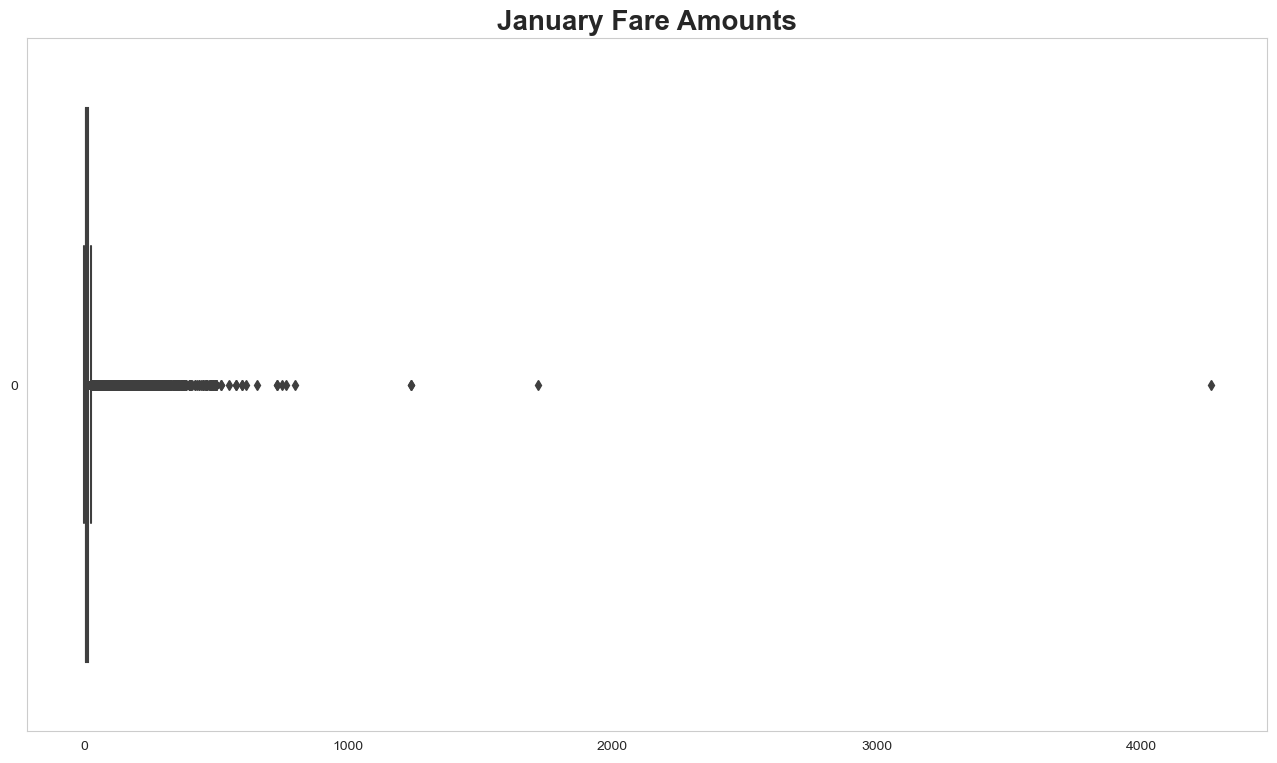

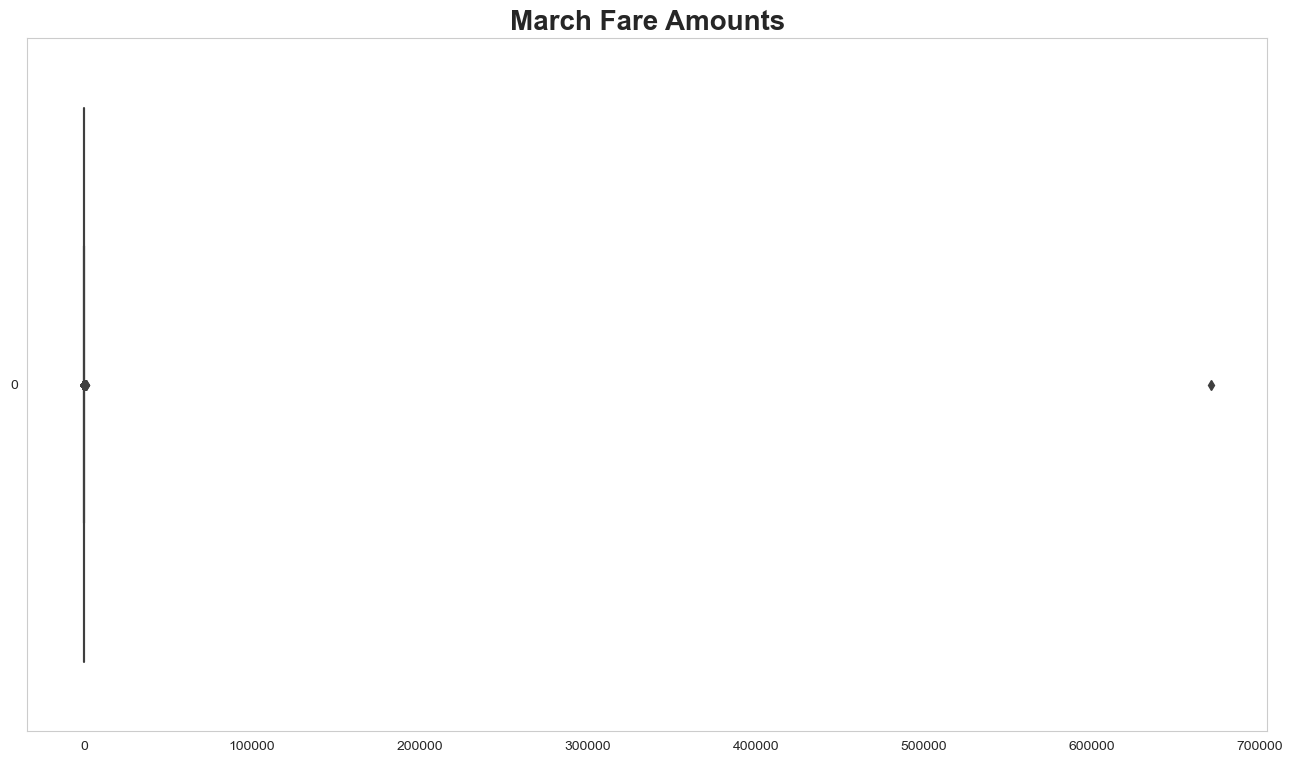

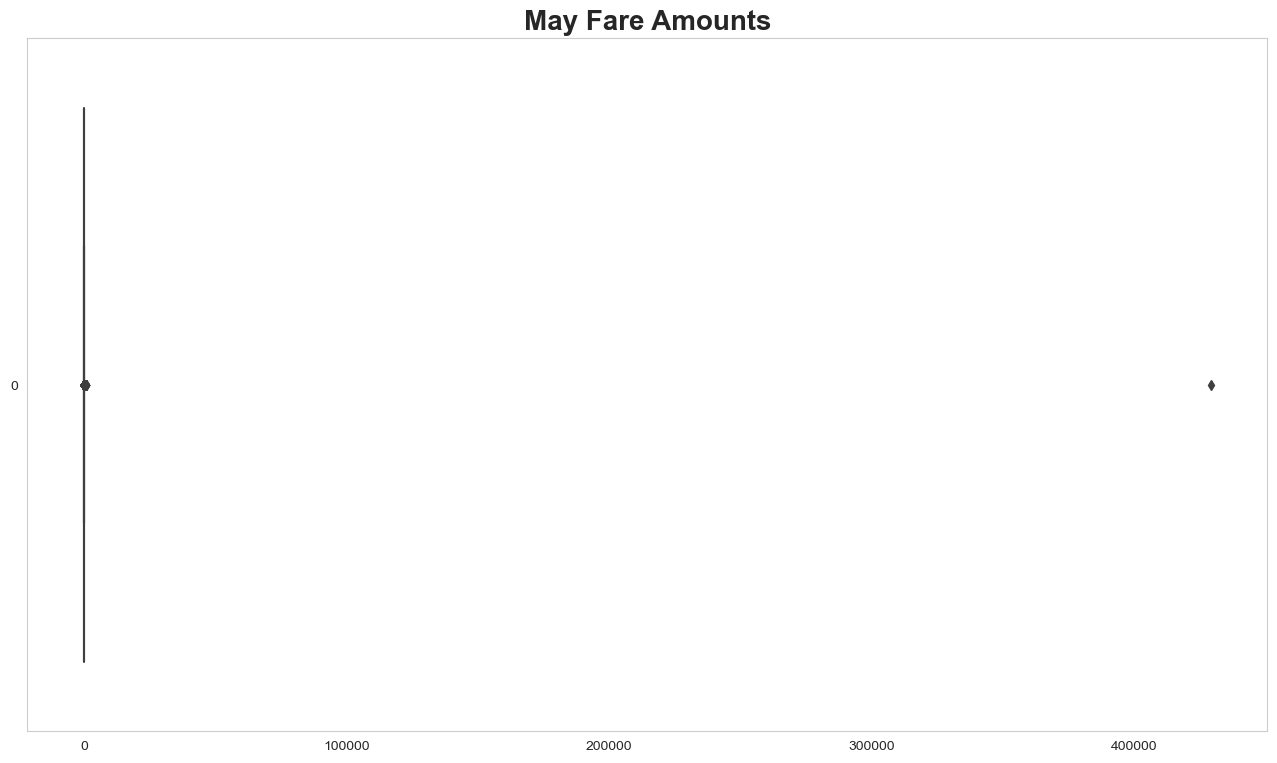

In [47]:
#
# Find outliers in fare amounts
#

print("")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(jan_df['fare_amount'], orient='horizontal')
plt.title('January Fare Amounts', weight='bold', fontsize=title_size)
plt.show();
print("")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(march_df['fare_amount'], orient='horizontal')
plt.title('March Fare Amounts', weight='bold', fontsize=title_size)
plt.show();
print("")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(may_df['fare_amount'], orient='horizontal')
plt.title('May Fare Amounts', weight='bold', fontsize=title_size)
plt.show();
print("")

## **Update the** _fare amount_ **outliers**

Number of fare amounts exceeding the cutoff of 1000.0:
   Jan: 4
   March: 3
   May: 1

Converting January's fare amounts outliers..Done
Converting March's fare amounts outliers...Done
Converting May's fare amounts outliers...Done

Remaining fare amounts greater than the cutoff (average value could not be computed):
   Jan: 0 rows
   March: 0 rows
   May: 0 rows





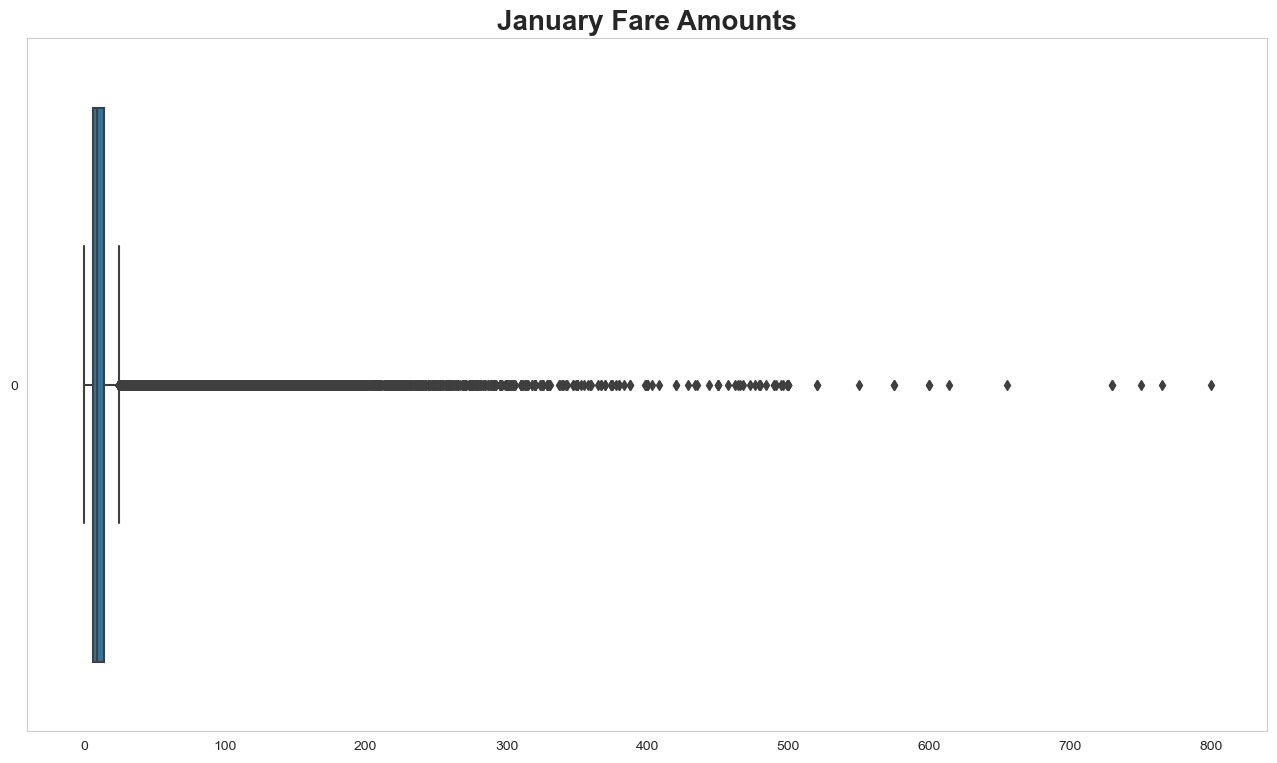

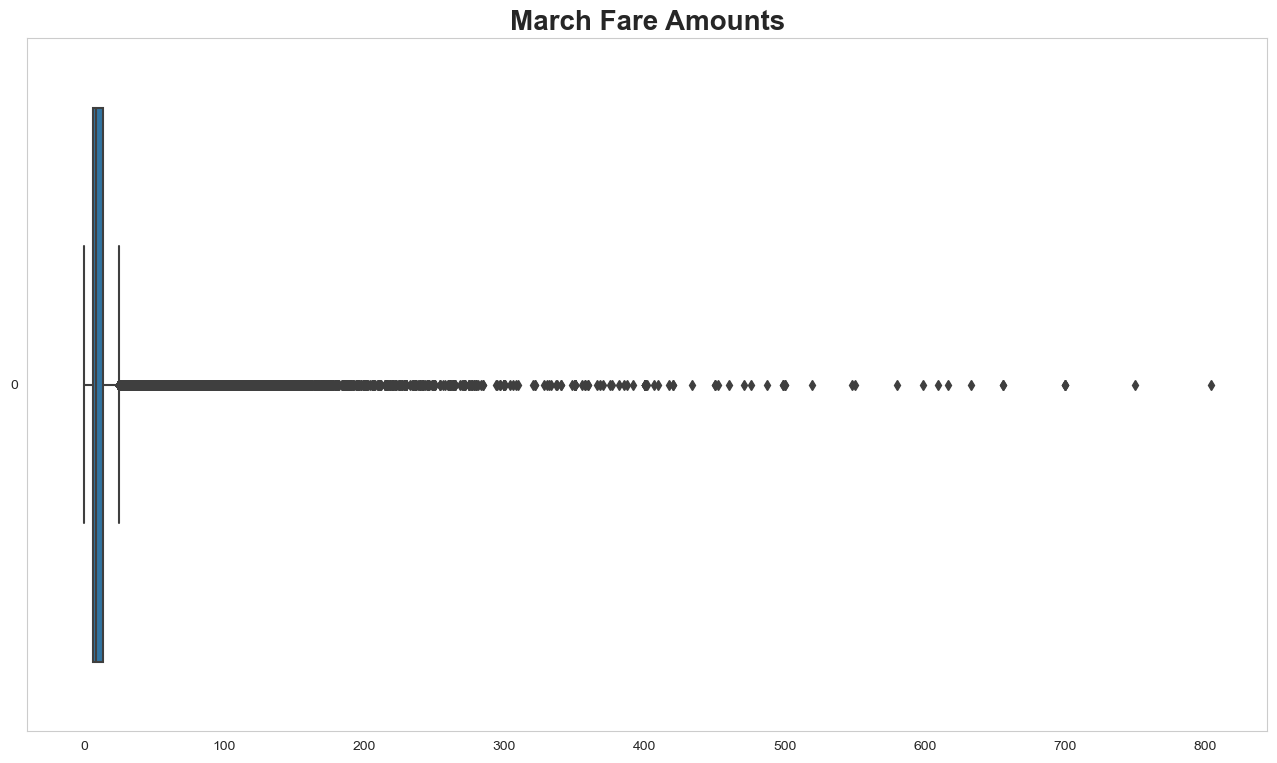

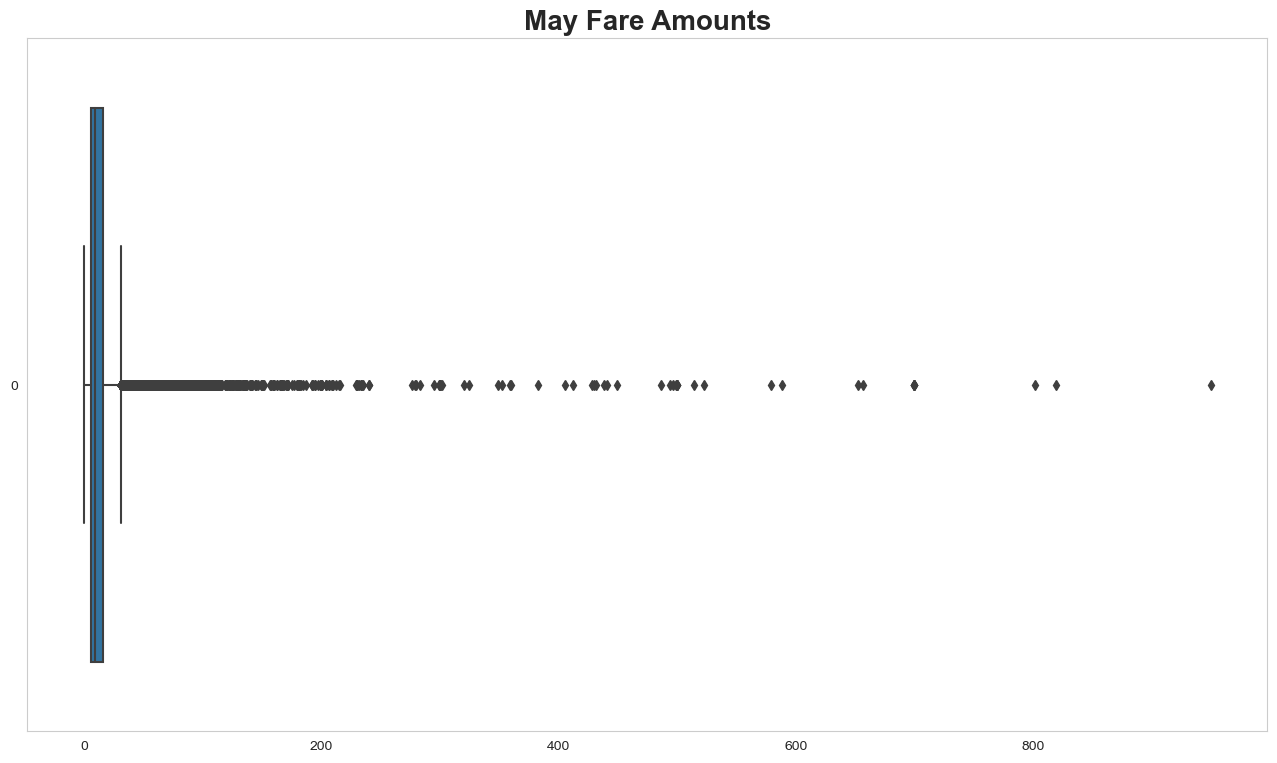

In [48]:
#
# Convert outlier fare_amount values to the average of the trips starting at and ending at the same zones
# If the average is still zero then take the average of the trips traveling in the reverse order
#

cutoff = 1000.00

def convert_jan_fare_amount(row):
    
    global cutoff
    
    # Find the average distance of trips going to the same locations
    avg = jan_df.loc[( (jan_df['PULocationID'] == row['PULocationID']) & (jan_df['DOLocationID'] == row['DOLocationID']) & (jan_df['fare_amount'] != 0.0) & (jan_df['fare_amount'] <= cutoff) ), 'fare_amount'].mean()
    
    # if no average then try the trip in the opposite direction
    if pd.isnull(avg):
        avg = jan_df.loc[( (jan_df['DOLocationID'] == row['PULocationID']) & (jan_df['PULocationID'] == row['DOLocationID']) & (jan_df['fare_amount'] != 0.0) & (jan_df['fare_amount'] <= cutoff) ), 'fare_amount'].mean()
 
    # No hope for a trip distance
    if pd.isnull(avg):
        # print("No hope")
        avg = 0.0

    avg = round(avg, 2)
    
    return avg


def convert_march_fare_amount(row):
    
    global cutoff
    
    # Find the average distance of trips going to the same locations
    avg = march_df.loc[( (march_df['PULocationID'] == row['PULocationID']) & (march_df['DOLocationID'] == row['DOLocationID']) & (march_df['fare_amount'] != 0.0) & (march_df['fare_amount'] <= cutoff) ), 'fare_amount'].mean()
    
    # if no average then try the trip in the opposite direction
    if pd.isnull(avg):
        avg = march_df.loc[( (march_df['DOLocationID'] == row['PULocationID']) & (march_df['PULocationID'] == row['DOLocationID']) & (march_df['fare_amount'] != 0.0) & (march_df['fare_amount'] <= cutoff) ), 'fare_amount'].mean()
 
    # No hope for a trip distance
    if pd.isnull(avg):
        # print("No hope")
        avg = 0.0
        
    avg = round(avg, 2)

    return avg


def convert_may_fare_amount(row):
    
    global cutoff

    # Find the average distance of trips going to the same locations
    avg = may_df.loc[( (may_df['PULocationID'] == row['PULocationID']) & (may_df['DOLocationID'] == row['DOLocationID']) & (may_df['fare_amount'] != 0.0) & (may_df['fare_amount'] <= cutoff) ), 'fare_amount'].mean()
    
    # if no average then try the trip in the opposite direction
    if pd.isnull(avg):
        avg = may_df.loc[( (may_df['DOLocationID'] == row['PULocationID']) & (may_df['PULocationID'] == row['DOLocationID']) & (may_df['fare_amount'] != 0.0) & (may_df['fare_amount'] <= cutoff) ), 'fare_amount'].mean()
 
    # No hope for a trip distance
    if pd.isnull(avg):
        # print("No hope")
        avg = 0.0
        
    avg = round(avg, 2)

    return avg


print("Number of fare amounts exceeding the cutoff of " + str(cutoff) + ":")
print("   Jan: ", end="")
print(len(jan_df.loc[(jan_df['fare_amount'] > cutoff)]))
print("   March: ", end="")
print(len(march_df.loc[(march_df['fare_amount'] > cutoff)]))
print("   May: ", end="")
print(len(may_df.loc[(may_df['fare_amount'] > cutoff)]))
print("")


print("Converting January's fare amounts outliers..", end="")
temp_df = jan_df.loc[(jan_df['fare_amount'] > cutoff)]
temp_df['fare_amount'] = temp_df.apply(convert_jan_fare_amount, axis=1)
jan_df.loc[temp_df.index, :] = temp_df[:]
print("Done")

print("Converting March's fare amounts outliers...", end="")
temp_df = march_df.loc[(march_df['fare_amount'] > cutoff)]
temp_df['fare_amount'] = temp_df.apply(convert_march_fare_amount, axis=1)
march_df.loc[temp_df.index, :] = temp_df[:]
print("Done")

print("Converting May's fare amounts outliers...", end="")
temp_df = may_df.loc[(may_df['fare_amount'] > cutoff)]
temp_df['fare_amount'] = temp_df.apply(convert_may_fare_amount, axis=1)
may_df.loc[temp_df.index, :] = temp_df[:]
print("Done")


print("\nRemaining fare amounts greater than the cutoff (average value could not be computed):")
print("   Jan: " + str(len(jan_df.loc[(jan_df['fare_amount'] > cutoff)])) + " rows")
print("   March: " + str(len(march_df.loc[(march_df['fare_amount'] > cutoff)])) + " rows")
print("   May: " + str(len(may_df.loc[(may_df['fare_amount'] > cutoff)])) + " rows")
print("\n\n")

#
# Show revised fare amounts
#

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(jan_df['fare_amount'], orient='horizontal')
plt.title('January Fare Amounts', weight='bold', fontsize=title_size)
plt.show();
print("")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(march_df['fare_amount'], orient='horizontal')
plt.title('March Fare Amounts', weight='bold', fontsize=title_size)
plt.show();
print("")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(may_df['fare_amount'], orient='horizontal')
plt.title('May Fare Amounts', weight='bold', fontsize=title_size)
plt.show();
print("")

print("")

<br>

## **Find outliers in the** _tolls_amount_

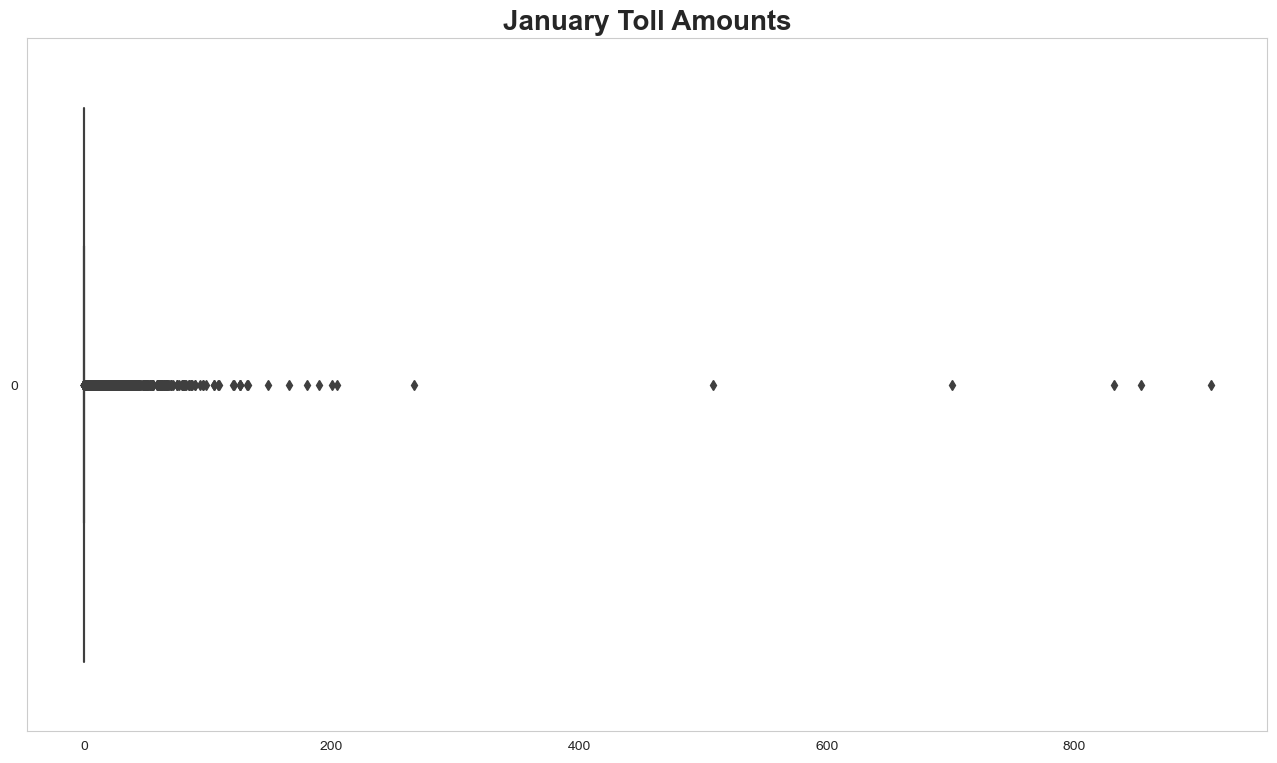

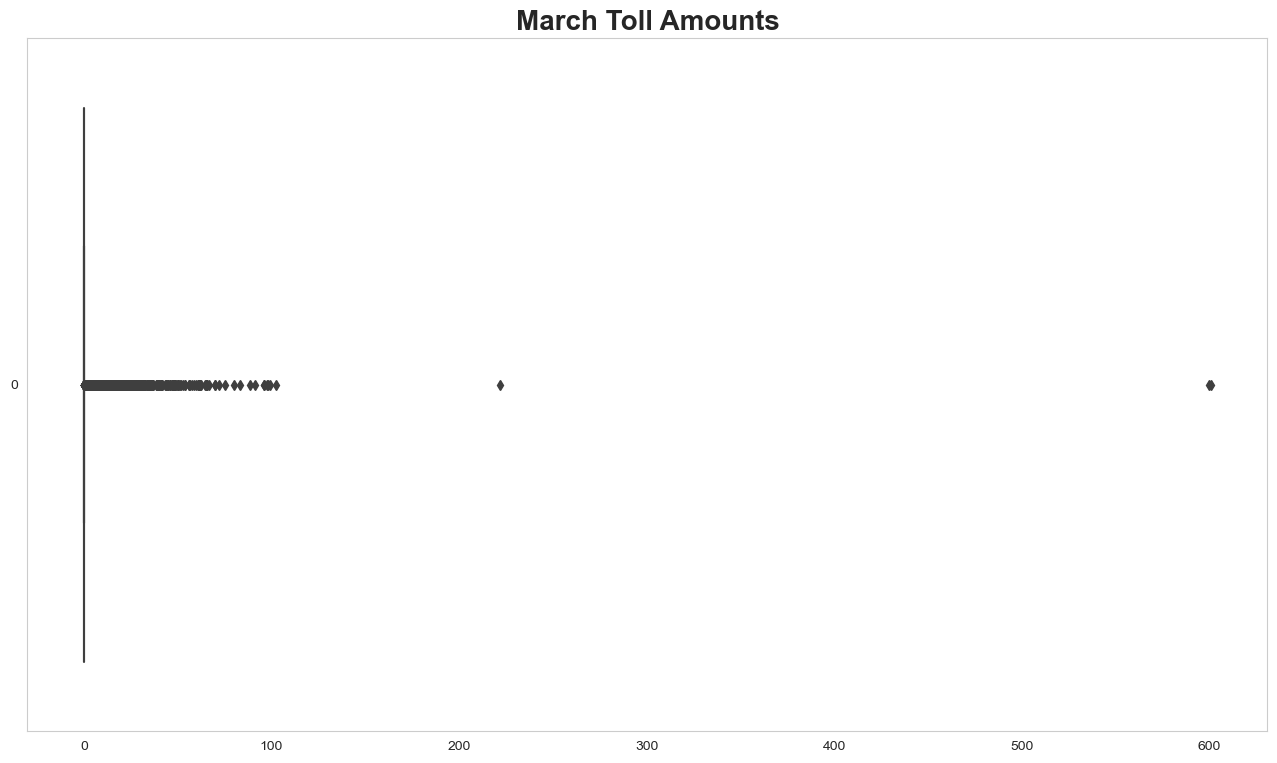

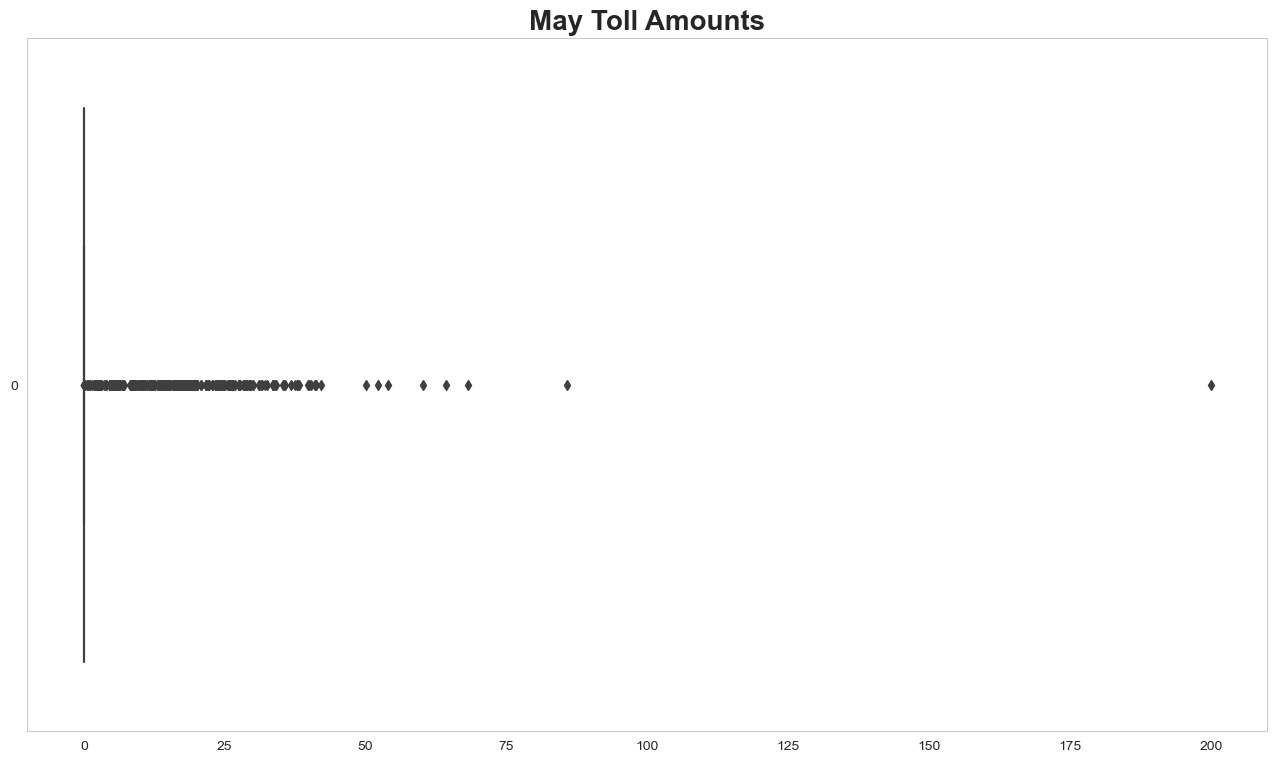

In [49]:
#
# Find outliers in tolls amount
#

print("")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(jan_df['tolls_amount'], orient='horizontal')
plt.title('January Toll Amounts', weight='bold', fontsize=title_size)
plt.show();
print("")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(march_df['tolls_amount'], orient='horizontal')
plt.title('March Toll Amounts', weight='bold', fontsize=title_size)
plt.show();
print("")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(may_df['tolls_amount'], orient='horizontal')
plt.title('May Toll Amounts', weight='bold', fontsize=title_size)
plt.show();

print("\n\n")

## **Update** _tolls_amount_ **outliers**

Number of toll amounts exceeding the cutoff of 200.0:
   Jan: 8
   March: 3
   May: 0

Converting January's tolls amounts outliers..Done
Converting March's tolls amounts outliers...Done
Converting May's tolls amounts outliers...Done

Remaining tolls amounts greater than the cutoff (average value could not be computed):
   Jan: 0 rows
   March: 0 rows
   May: 0 rows





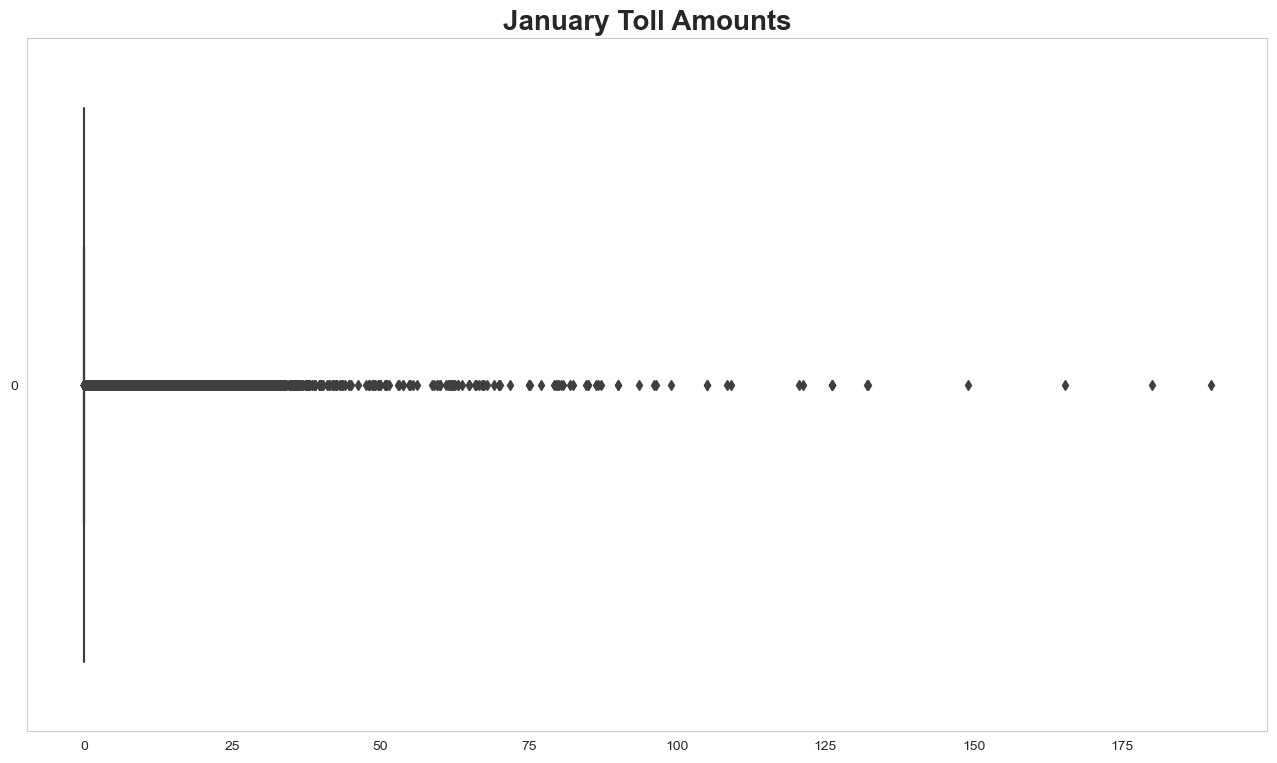

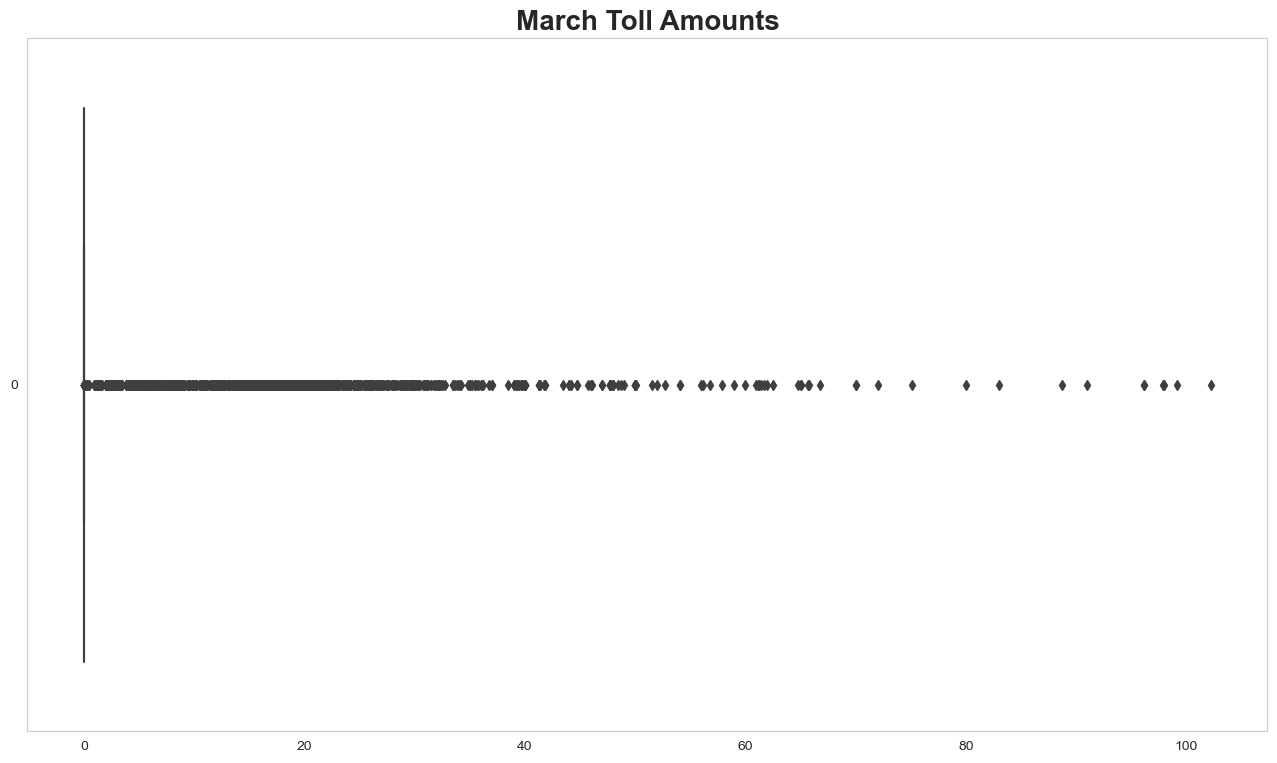

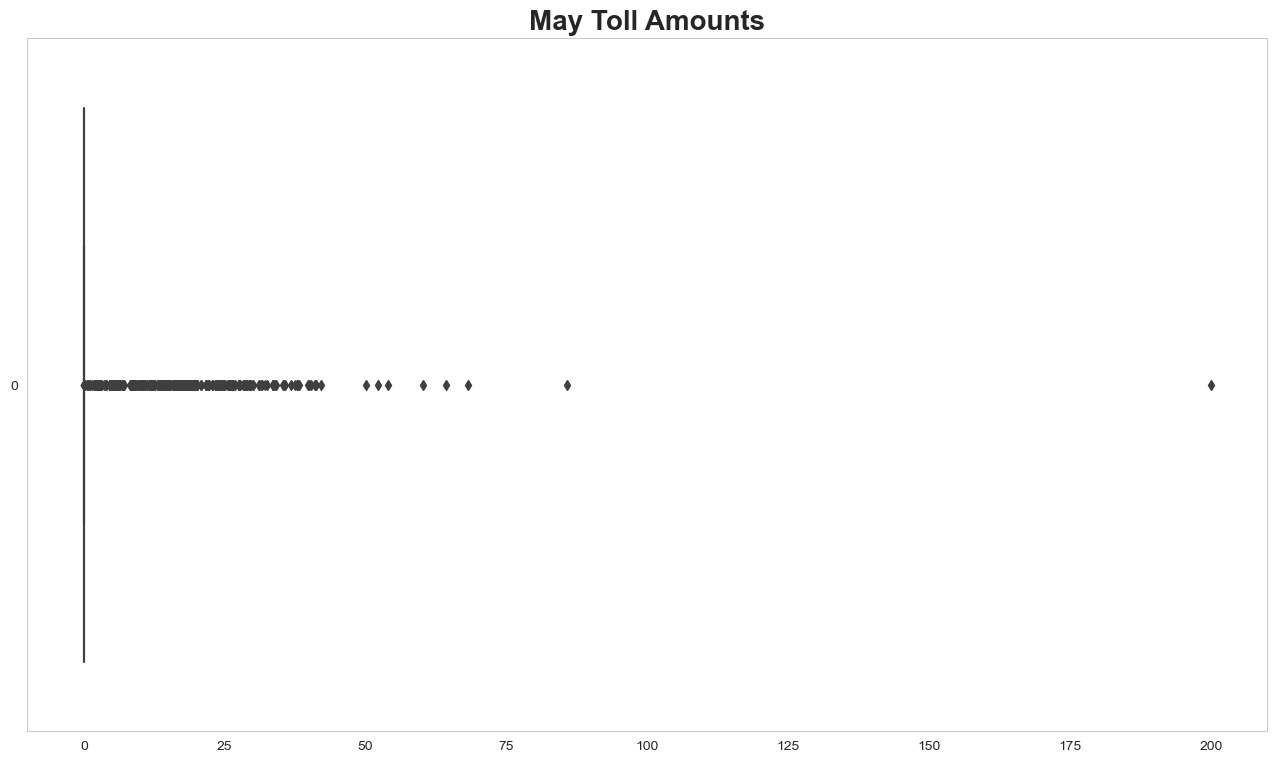

In [50]:
#
# Convert toll amount values to the average of the trips starting at and ending at the same zones
# If the average is still zero then take the average of the trips traveling in the reverse order
#

cutoff = 200.0

def convert_jan_tolls_amount(row):
    
    global cutoff
    
    # Find the average tolls of trips going to the same locations
    avg = jan_df.loc[( (jan_df['PULocationID'] == row['PULocationID']) & (jan_df['DOLocationID'] == row['DOLocationID']) & (jan_df['tolls_amount'] != 0.0) & (jan_df['tolls_amount'] <= cutoff) ), 'tolls_amount'].mean()
    
    # if no average then try the trip in the opposite direction
    if pd.isnull(avg):
        avg = jan_df.loc[( (jan_df['DOLocationID'] == row['PULocationID']) & (jan_df['PULocationID'] == row['DOLocationID']) & (jan_df['tolls_amount'] != 0.0) & (jan_df['tolls_amount'] <= cutoff) ), 'tolls_amount'].mean()
 
    # No hope for a trip distance
    if pd.isnull(avg):
        # print("No hope")
        avg = 0.0

    avg = round(avg, 2)
    
    return avg


def convert_march_tolls_amount(row):
    
    global cutoff
    
    # Find the average tolls of trips going to the same locations
    avg = march_df.loc[( (march_df['PULocationID'] == row['PULocationID']) & (march_df['DOLocationID'] == row['DOLocationID']) & (march_df['tolls_amount'] != 0.0) & (march_df['tolls_amount'] <= cutoff) ), 'tolls_amount'].mean()
    
    # if no average then try the trip in the opposite direction
    if pd.isnull(avg):
        avg = march_df.loc[( (march_df['DOLocationID'] == row['PULocationID']) & (march_df['PULocationID'] == row['DOLocationID']) & (march_df['tolls_amount'] != 0.0) & (march_df['tolls_amount'] <= cutoff) ), 'tolls_amount'].mean()
 
    # No hope for a trip distance
    if pd.isnull(avg):
        # print("No hope")
        avg = 0.0
        
    avg = round(avg, 2)

    return avg


def convert_may_tolls_amount(row):
    
    global cutoff

    # Find the average tolls of trips going to the same locations
    avg = may_df.loc[( (may_df['PULocationID'] == row['PULocationID']) & (may_df['DOLocationID'] == row['DOLocationID']) & (may_df['tolls_amount'] != 0.0) & (may_df['tolls_amount'] <= cutoff) ), 'tolls_amount'].mean()
    
    # if no average then try the trip in the opposite direction
    if pd.isnull(avg):
        avg = may_df.loc[( (may_df['DOLocationID'] == row['PULocationID']) & (may_df['PULocationID'] == row['DOLocationID']) & (may_df['tolls_amount'] != 0.0) & (may_df['tolls_amount'] <= cutoff) ), 'tolls_amount'].mean()
 
    # No hope for a trip distance
    if pd.isnull(avg):
        # print("No hope")
        avg = 0.0
        
    avg = round(avg, 2)

    return avg


print("Number of toll amounts exceeding the cutoff of " + str(cutoff) + ":")
print("   Jan: ", end="")
print(len(jan_df.loc[(jan_df['tolls_amount'] > cutoff)]))
print("   March: ", end="")
print(len(march_df.loc[(march_df['tolls_amount'] > cutoff)]))
print("   May: ", end="")
print(len(may_df.loc[(may_df['tolls_amount'] > cutoff)]))
print("")


print("Converting January's tolls amounts outliers..", end="")
if len(jan_df.loc[(jan_df['tolls_amount'] > cutoff)]) > 0:
    temp_df = jan_df.loc[(jan_df['tolls_amount'] > cutoff)]
    temp_df['tolls_amount'] = temp_df.apply(convert_jan_tolls_amount, axis=1)
jan_df.loc[temp_df.index, :] = temp_df[:]
print("Done")

print("Converting March's tolls amounts outliers...", end="")
if len(march_df.loc[(march_df['tolls_amount'] > cutoff)]) > 0:
    temp_df = march_df.loc[(march_df['tolls_amount'] > cutoff)]
    temp_df['tolls_amount'] = temp_df.apply(convert_march_tolls_amount, axis=1)
    march_df.loc[temp_df.index, :] = temp_df[:]
print("Done")

print("Converting May's tolls amounts outliers...", end="")
if len(may_df.loc[(may_df['tolls_amount'] > cutoff)]) > 0:
    temp_df = may_df.loc[(may_df['tolls_amount'] > cutoff)]
    temp_df['tolls_amount'] = temp_df.apply(convert_may_tolls_amount, axis=1)
    may_df.loc[temp_df.index, :] = temp_df[:]
print("Done")


print("\nRemaining tolls amounts greater than the cutoff (average value could not be computed):")
print("   Jan: " + str(len(jan_df.loc[(jan_df['tolls_amount'] > cutoff)])) + " rows")
print("   March: " + str(len(march_df.loc[(march_df['tolls_amount'] > cutoff)])) + " rows")
print("   May: " + str(len(may_df.loc[(may_df['tolls_amount'] > cutoff)])) + " rows")
print("\n\n")


sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(jan_df['tolls_amount'], orient='horizontal')
plt.title('January Toll Amounts', weight='bold', fontsize=title_size)
plt.show();
print("")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(march_df['tolls_amount'], orient='horizontal')
plt.title('March Toll Amounts', weight='bold', fontsize=title_size)
plt.show();
print("")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.boxplot(may_df['tolls_amount'], orient='horizontal')
plt.title('May Toll Amounts', weight='bold', fontsize=title_size)
plt.show();
print("")

<br>

# **Fill in values for where the** _total_amount_ **= \\$0.00 by calculating the fare and all of the surcharges**

![SegmentLocal](taxi_meter.jpeg "segment")

In [95]:
print("\nOut of the 3 data-sets there are {rows} rows with $0.00 fare amounts.\n\n".format(rows = (len(jan_df[(jan_df['total_amount'] == 0.0)]) + len(march_df[(march_df['total_amount'] == 0.0)]) + len(may_df[(may_df['total_amount'] == 0.0)]))))


Out of the 3 data-sets there are 2741 rows with $0.00 fare amounts.




![SegmentLocal](problem-icon-png-14.png)
## _Simulated fare calculator works - but it's slow_ <br>
### It takes 30 minutes to calculate: (1671 + 899 + 170) fares
##### January takes longer per fare! (Need to investigate why - could be parallelized for speedup)
##### It appears that the larger dataframe (January) has longer look-up times, but I would think it would always be _O(1)_

In [96]:
#
# WARNING: apply() in this case is not maintaining the original dtypes for the columns since the 'row' is being returned
# after apply() returns, have to convert back to original desired data types for EACH column
#

no_tip = 0
yes_tip = 0
count = 0
def calculate_taxi_fare(row):
    """
    Simulate the taxi fare based on static fees and the time of day and day of the week
    Assume tolls is always 0
    """

    global count
    global no_tip
    global yes_tip
    
    count += 1
    # print(str(count) + " ", end="")

    initial_charge = 2.50
    per_mile = 2.50
    mta_surcharge = 0.50
    improvement_surcharge = 0.30
    congestion_surcharge = 2.50 # Below 96th St
    rush_hour_surcharge = 1.00  # 4pm to 8pm weekdays
    overnight_surcharge = 0.50  # 8pm to 6am all days
    
    # Minimum fare:
    fare_amount = initial_charge
    
    # Always
    row['mta_tax'] = mta_surcharge
    row['improvement_surcharge'] = improvement_surcharge
    
    # Milage fee
    fare_amount += (row['trip_distance'] * per_mile)
    row['fare_amount'] = round(fare_amount, 2)
    
    # Additional fees based on day and time
    extra = 0.0
    
    # Rush hour surcharge
    # This does not handle the edge case if a drop-off happens after midnight
    if (((row['pickup_hour'] >= 16 and row['dropoff_hour'] <= 20) or
         (row['pickup_hour'] <= 16 and row['dropoff_hour'] >= 16) or 
         (row['pickup_hour'] <= 20 and row['dropoff_hour'] >= 20) or
         (row['pickup_hour'] <= 16 and row['dropoff_hour'] >= 20)) and (row['pickup_day'] >= 0 and row['pickup_day'] <= 4)):
        extra += rush_hour_surcharge

    # Overnight surcharge
    if ((row['pickup_hour'] >= 20 and (row['dropoff_hour'] >= 20 or row['dropoff_hour'] <= 6)) or
        (row['pickup_hour'] <= 20 and (row['dropoff_hour'] >= 20 or row['dropoff_hour'] <= 6)) or
        ((row['pickup_hour'] >= 20 or row['pickup_hour'] <= 6) and row['dropoff_hour'] >= 6) or
         (row['pickup_hour'] <= 20 and row['dropoff_hour'] >= 6)):
        extra += overnight_surcharge
        
    row['extra'] = extra
 
    # Choose a congestion_surcharge based on weighted random number (either $0.00 or $2.50)
    # Pick the weights from either the January, March or May datasets
    if row['pickup_month'] == 1 or row['pickup_month'] == 12:
        no_congestion_surcharge_weight = len(jan_df[(jan_df['congestion_surcharge'] == 0.0)])
        has_congestion_surcharge_weight = len(jan_df[(jan_df['congestion_surcharge'] > 0.0)]) 
    elif row['pickup_month'] == 3 or row['pickup_month'] == 2:     
        no_congestion_surcharge_weight = len(march_df[(march_df['congestion_surcharge'] == 0.0)])
        has_congestion_surcharge_weight = len(march_df[(march_df['congestion_surcharge'] > 0.0)])
    else:
        no_congestion_surcharge_weight = len(may_df[(may_df['congestion_surcharge'] == 0.0)])
        has_congestion_surcharge_weight = len(may_df[(may_df['congestion_surcharge'] > 0.0)])

    congestion_charge = random.choices([0.0, congestion_surcharge], weights=((no_congestion_surcharge_weight/(no_congestion_surcharge_weight + has_congestion_surcharge_weight)), (has_congestion_surcharge_weight/(no_congestion_surcharge_weight + has_congestion_surcharge_weight))), k=1)[0]
    
    row['congestion_surgcharge'] = congestion_charge
    
    total_amount = fare_amount + extra + mta_surcharge + improvement_surcharge   # congestion_charge not included in the total
    
    cash_tip = random.choices([False, True], weights=((no_tip/(no_tip + yes_tip)), (yes_tip/(no_tip + yes_tip))), k=1)[0]
    if cash_tip:
        tip_amount = (total_amount + congestion_charge * 0.20)
    else:
        tip_amount = 0.00
        
    row['tip_amount'] = round(tip_amount, 2)

    total_amount += tip_amount
    total_amount = round(total_amount, 2)
    
    row['total_amount'] = total_amount
    
    print("$ ", end="") # + str(total_amount))
        
    return row


#
# January dataset
#
count = 0
no_tip = len(jan_df[(jan_df['tip_amount'] == 0.0)])
yes_tip = len(jan_df[(jan_df['tip_amount'] > 0.0)])
print("Calculating missing fare amounts for January...")
temp_df = jan_df.loc[jan_df['total_amount'] == 0.0].apply(calculate_taxi_fare, axis=1)

temp_df['VendorID'] = temp_df['VendorID'].astype(np.int64)
temp_df['passenger_count'] = temp_df['passenger_count'].astype(np.int64)
temp_df['RatecodeID'] = temp_df['RatecodeID'].astype(np.int64)
temp_df['PULocationID'] = temp_df['PULocationID'].astype(np.int64)
temp_df['DOLocationID'] = temp_df['DOLocationID'].astype(np.int64)
temp_df['payment_type'] = temp_df['payment_type'].astype(np.int64)
temp_df['pickup_unix_time'] = temp_df['pickup_unix_time'].astype(np.int64)
temp_df['dropoff_unix_time'] = temp_df['dropoff_unix_time'].astype(np.int64)
temp_df['trip_in_seconds'] = temp_df['trip_in_seconds'].astype(np.int64)
temp_df['pickup_day'] = temp_df['pickup_day'].astype(np.int64)
temp_df['dropoff_day'] = temp_df['dropoff_day'].astype(np.int64)
temp_df['pickup_month'] = temp_df['pickup_month'].astype(np.int64)
temp_df['dropoff_month'] = temp_df['dropoff_month'].astype(np.int64)
temp_df['pickup_hour'] = temp_df['pickup_hour'].astype(np.int64)
temp_df['dropoff_hour'] = temp_df['dropoff_hour'].astype(np.int64)

jan_df.loc[temp_df.index, :] = temp_df[:]
print("Done")

#
# March dataset
#
count = 0
no_tip = len(march_df[(jan_df['tip_amount'] == 0.0)])
yes_tip = len(march_df[(jan_df['tip_amount'] > 0.0)])
print("Calculating missing fare amounts for March...")
temp_df = march_df.loc[march_df['total_amount'] == 0.0].apply(calculate_taxi_fare, axis=1)

temp_df['VendorID'] = temp_df['VendorID'].astype(np.int64)
temp_df['passenger_count'] = temp_df['passenger_count'].astype(np.int64)
temp_df['RatecodeID'] = temp_df['RatecodeID'].astype(np.int64)
temp_df['PULocationID'] = temp_df['PULocationID'].astype(np.int64)
temp_df['DOLocationID'] = temp_df['DOLocationID'].astype(np.int64)
temp_df['payment_type'] = temp_df['payment_type'].astype(np.int64)
temp_df['pickup_unix_time'] = temp_df['pickup_unix_time'].astype(np.int64)
temp_df['dropoff_unix_time'] = temp_df['dropoff_unix_time'].astype(np.int64)
temp_df['trip_in_seconds'] = temp_df['trip_in_seconds'].astype(np.int64)
temp_df['pickup_day'] = temp_df['pickup_day'].astype(np.int64)
temp_df['dropoff_day'] = temp_df['dropoff_day'].astype(np.int64)
temp_df['pickup_month'] = temp_df['pickup_month'].astype(np.int64)
temp_df['dropoff_month'] = temp_df['dropoff_month'].astype(np.int64)
temp_df['pickup_hour'] = temp_df['pickup_hour'].astype(np.int64)
temp_df['dropoff_hour'] = temp_df['dropoff_hour'].astype(np.int64)

march_df.loc[temp_df.index, :] = temp_df[:]
print("Done")


#
# May dataset
#
count = 0
no_tip = len(may_df[(jan_df['tip_amount'] == 0.0)])
yes_tip = len(may_df[(jan_df['tip_amount'] > 0.0)])
print("Calculating missing fare amounts for May...")
temp_df = may_df.loc[may_df['total_amount'] == 0.0].apply(calculate_taxi_fare, axis=1)

# Pandas converts the dataframe to all floats - so convert back to what it was before apply() was called
temp_df['VendorID'] = temp_df['VendorID'].astype(np.int64)
temp_df['passenger_count'] = temp_df['passenger_count'].astype(np.int64)
temp_df['RatecodeID'] = temp_df['RatecodeID'].astype(np.int64)
temp_df['PULocationID'] = temp_df['PULocationID'].astype(np.int64)
temp_df['DOLocationID'] = temp_df['DOLocationID'].astype(np.int64)
temp_df['payment_type'] = temp_df['payment_type'].astype(np.int64)
temp_df['pickup_unix_time'] = temp_df['pickup_unix_time'].astype(np.int64)
temp_df['dropoff_unix_time'] = temp_df['dropoff_unix_time'].astype(np.int64)
temp_df['trip_in_seconds'] = temp_df['trip_in_seconds'].astype(np.int64)
temp_df['pickup_day'] = temp_df['pickup_day'].astype(np.int64)
temp_df['dropoff_day'] = temp_df['dropoff_day'].astype(np.int64)
temp_df['pickup_month'] = temp_df['pickup_month'].astype(np.int64)
temp_df['dropoff_month'] = temp_df['dropoff_month'].astype(np.int64)
temp_df['pickup_hour'] = temp_df['pickup_hour'].astype(np.int64)
temp_df['dropoff_hour'] = temp_df['dropoff_hour'].astype(np.int64)

may_df.loc[temp_df.index, :] = temp_df[:]
print("Done")

Calculating missing fare amounts for January...
$ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ 

In [97]:
print("January $0.00 rows left: " + str(len(jan_df[(jan_df['total_amount'] == 0.0)])))
print("March $0.00 rows left: " + str(len(march_df[(march_df['total_amount'] == 0.0)])))
print("May $0.00 rows left: " + str(len(may_df[(may_df['total_amount'] == 0.0)])))

January $0.00 rows left: 0
March $0.00 rows left: 0
May $0.00 rows left: 0


<br>

### **Fix TLC taxes that are occassionaly left at $0.00 and update the** _total_amount_

In [98]:
print(jan_df['mta_tax'].unique())
print(len(jan_df[(jan_df['mta_tax'] == 0.5)]))

print(march_df['mta_tax'].unique())
print(len(march_df[(march_df['mta_tax'] == 0.5)]))

print(may_df['mta_tax'].unique())
print(len(may_df[(may_df['mta_tax'] == 0.5)]))

print()

print(jan_df['improvement_surcharge'].unique())
print(march_df['improvement_surcharge'].unique())
print(may_df['improvement_surcharge'].unique())


# Question: Should every row be recalculated?
# jan_df['total_amount'] = jan_df['fare_amount'] + jan_df['extra'] + jan_df['mta_tax'] + jan_df['tip_amount'] + jan_df['tolls_amount'] + jan_df['improvement_surcharge']
# march_df['total_amount'] = march_df['fare_amount'] + march_df['extra'] + march_df['mta_tax'] + march_df['tip_amount'] + march_df['tolls_amount'] + march_df['improvement_surcharge']
# may_df['total_amount'] = may_df['fare_amount'] + may_df['extra'] + may_df['mta_tax'] + may_df['tip_amount'] + may_df['tolls_amount'] + may_df['improvement_surcharge']

[0.5  0.   1.1  3.3  2.5  0.35 1.54 3.  ]
6346168
[0.5  0.   3.3  0.35 0.59]
2980387
[0.5 0.  3.3]
344664

[0.3 0. ]
[0.3 0. ]
[0.3 0. ]


<br>

# **_TODO_: Find outliers where** _trip_distance_ **is not relative to** _fare_amount_

In [99]:
#
# TODO: Find outliers where trip_distince is not relative to fare_amount
#
# print( (march_df[ (march_df['trip_distance'] / march_df['fare_amount']) > 0.5 ]).sum() )

<br>

## **Create bins for the travel times**
#### (One more new column to add - last one)<br>
#### This creates a _category_ data type, which in pandas is a hybrid data type.
#### _"It looks and behaves like a string in many instances, but internally it is represented by an array of integers._
#### _This allows the data to be sorted in a custom order and to more efficiently store the data"_ (Pandas Documentation).


Put the travel times into 5 different bins: < 45m, 45m-2h, 2h-4h, 4h-12h, >12h



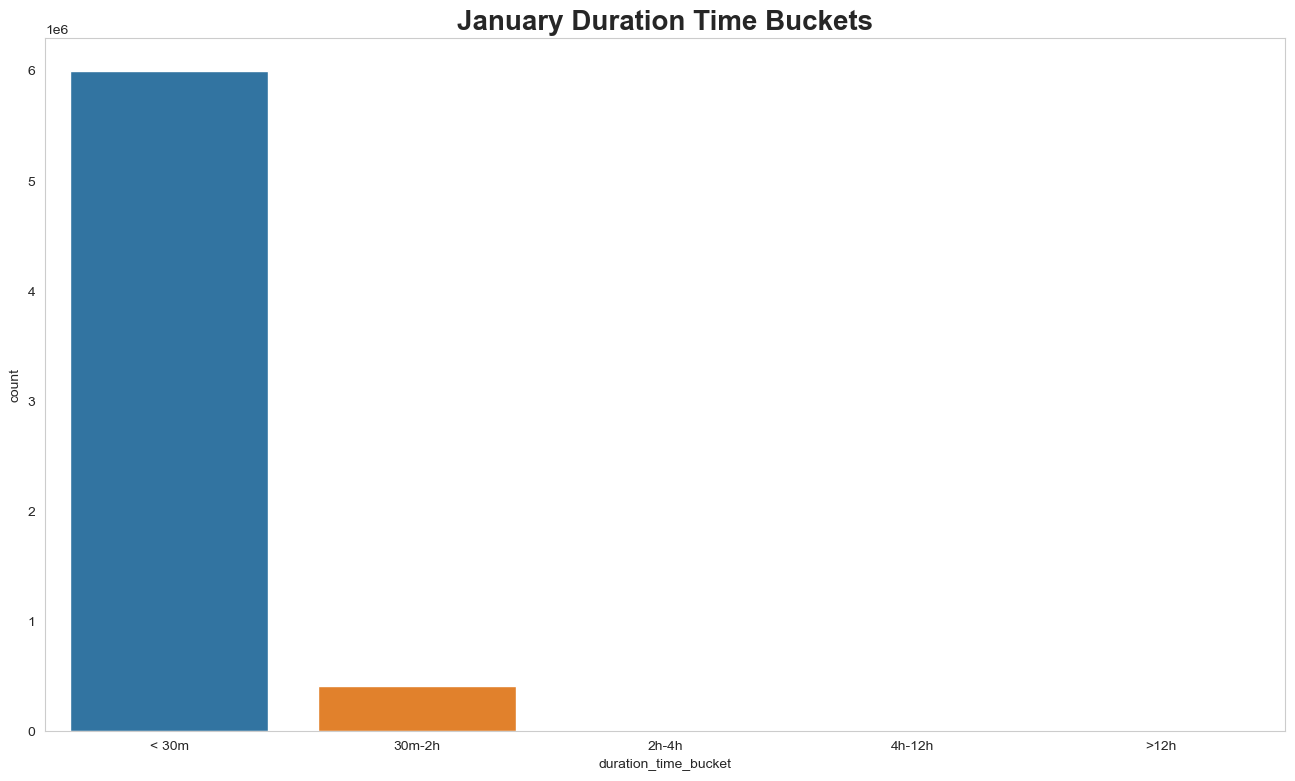

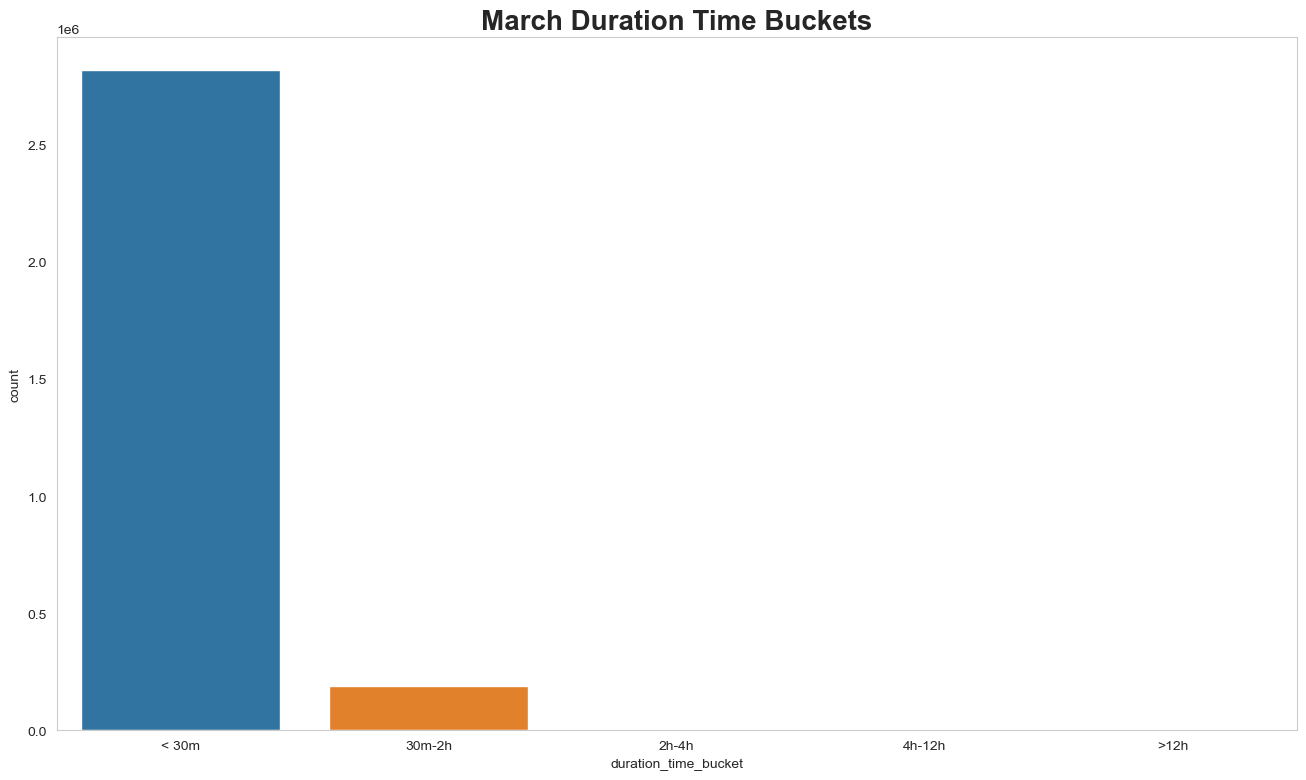

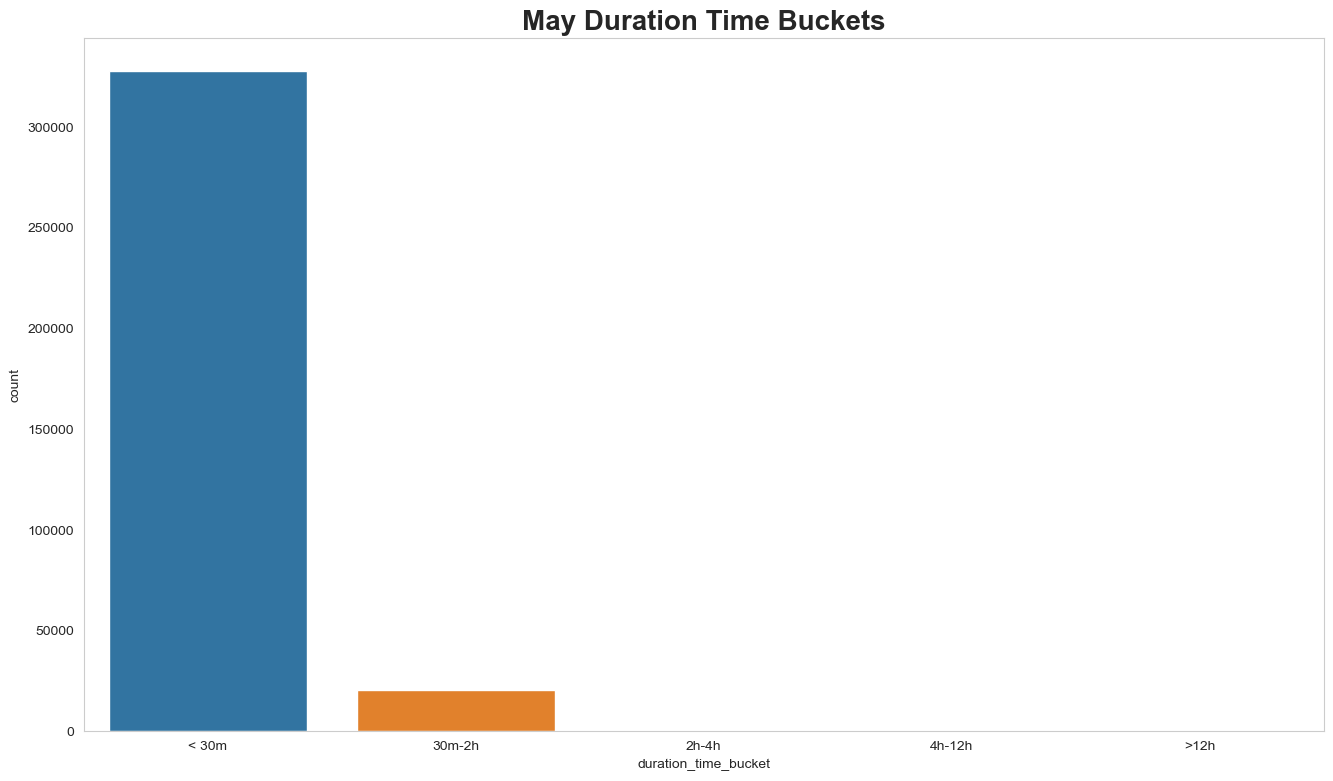

In [100]:
#
# Create bins for the travel times
#


bins=np.array([-1,1800,7200,14400,43200,900000])

jan_df['duration_time_bucket']=pd.cut(jan_df.trip_in_seconds,bins,labels=["< 30m", "30m-2h", "2h-4h","4h-12h",">12h"])
march_df['duration_time_bucket']=pd.cut(march_df.trip_in_seconds,bins,labels=["< 30m", "30m-2h", "2h-4h","4h-12h",">12h"])
may_df['duration_time_bucket']=pd.cut(may_df.trip_in_seconds,bins,labels=["< 30m", "30m-2h", "2h-4h","4h-12h",">12h"])

print("\nPut the travel times into 5 different bins: < 45m, 45m-2h, 2h-4h, 4h-12h, >12h")

print("")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.countplot(x=jan_df['duration_time_bucket'])
plt.title('January Duration Time Buckets', weight='bold', fontsize=title_size)
plt.show();
print("")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.countplot(x=march_df['duration_time_bucket'])
plt.title('March Duration Time Buckets', weight='bold', fontsize=title_size)
plt.show();
print("")

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.countplot(x=may_df['duration_time_bucket'])
plt.title('May Duration Time Buckets', weight='bold', fontsize=title_size)
plt.show();
print("\n")

In [101]:
#
# TensorFlow is going to complain about the "categorical data" of the bin type
#

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'duration_time_bucket' 

jan_df['duration_time_bucket'] = label_encoder.fit_transform(jan_df['duration_time_bucket']) 
march_df['duration_time_bucket'] = label_encoder.fit_transform(march_df['duration_time_bucket']) 
may_df['duration_time_bucket'] = label_encoder.fit_transform(may_df['duration_time_bucket'])

jan_df['duration_time_bucket'] = jan_df['duration_time_bucket'].astype(np.int64)
march_df['duration_time_bucket'] = march_df['duration_time_bucket'].astype(np.int64)
may_df['duration_time_bucket'] = may_df['duration_time_bucket'].astype(np.int64)

# **Final Dataset Features**

In [102]:
jan_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               6405008 non-null  int64  
 1   passenger_count        6405008 non-null  int64  
 2   trip_distance          6405008 non-null  float64
 3   RatecodeID             6405008 non-null  int64  
 4   PULocationID           6405008 non-null  int64  
 5   DOLocationID           6405008 non-null  int64  
 6   payment_type           6405008 non-null  int64  
 7   fare_amount            6405008 non-null  float64
 8   extra                  6405008 non-null  float64
 9   mta_tax                6405008 non-null  float64
 10  tip_amount             6405008 non-null  float64
 11  tolls_amount           6405008 non-null  float64
 12  improvement_surcharge  6405008 non-null  float64
 13  total_amount           6405008 non-null  float64
 14  congestion_surchar

In [103]:
march_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007292 entries, 0 to 3007291
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               3007292 non-null  int64  
 1   passenger_count        3007292 non-null  int64  
 2   trip_distance          3007292 non-null  float64
 3   RatecodeID             3007292 non-null  int64  
 4   PULocationID           3007292 non-null  int64  
 5   DOLocationID           3007292 non-null  int64  
 6   payment_type           3007292 non-null  int64  
 7   fare_amount            3007292 non-null  float64
 8   extra                  3007292 non-null  float64
 9   mta_tax                3007292 non-null  float64
 10  tip_amount             3007292 non-null  float64
 11  tolls_amount           3007292 non-null  float64
 12  improvement_surcharge  3007292 non-null  float64
 13  total_amount           3007292 non-null  float64
 14  congestion_surchar

In [104]:
may_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348371 entries, 0 to 348370
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               348371 non-null  int64  
 1   passenger_count        348371 non-null  int64  
 2   trip_distance          348371 non-null  float64
 3   RatecodeID             348371 non-null  int64  
 4   PULocationID           348371 non-null  int64  
 5   DOLocationID           348371 non-null  int64  
 6   payment_type           348371 non-null  int64  
 7   fare_amount            348371 non-null  float64
 8   extra                  348371 non-null  float64
 9   mta_tax                348371 non-null  float64
 10  tip_amount             348371 non-null  float64
 11  tolls_amount           348371 non-null  float64
 12  improvement_surcharge  348371 non-null  float64
 13  total_amount           348371 non-null  float64
 14  congestion_surcharge   348371 non-nu

<br>

# **At this point all dataframe changes are done; new columns added or deleted, outliers modified**
# **_Not a single row was dropped from any dataset_**
<br>
<br>

# **Find Feature Correlations:**

#### The closer to 1, the stronger the positive correlation.
#### The closer to -1, the stronger the negative correlation (i.e., the more “opposite” the columns are).
#### The closer to 0, the weaker the correlation.
<br>


### **Pearson Correlation For January Dataset**

In [105]:
# pearson : standard correlation coefficient

df_pearson_jan = jan_df.corr(method='pearson')
df_pearson_march = march_df.corr(method='pearson')
df_pearson_may = may_df.corr(method='pearson')

df_pearson_jan

VendorID  passenger_count  trip_distance  RatecodeID  \
VendorID               1.000000         0.161591       0.018726    0.014906   
passenger_count        0.161591         1.000000       0.000166    0.001425   
trip_distance          0.018726         0.000166       1.000000    0.351836   
RatecodeID             0.014906         0.001425       0.351836    1.000000   
PULocationID          -0.009724        -0.002156      -0.103490   -0.025273   
DOLocationID          -0.003617        -0.001208      -0.108115    0.003542   
payment_type          -0.013654         0.011432      -0.016447   -0.002687   
fare_amount            0.019862        -0.002078       0.881065    0.562932   
extra                 -0.853606        -0.141456      -0.000765   -0.046781   
mta_tax                0.007893         0.016547      -0.143172   -0.553017   
tip_amount             0.022415         0.001934       0.497164    0.338276   
tolls_amount           0.007737         0.000397       0.605057    0.363050   
improvement_surcharge -0.008001         0.005539      -0.006353   -0.093148   
total_amount           0.021630        -0.000448       0.868861    0.550266   
congestion_surcharge   0.000821         0.028473      -0.286450   -0.213380   
pickup_unix_time      -0.006224        -0.018498      -0.026760   -0.011873   
dropoff_unix_time     -0.006068        -0.018429      -0.026075   -0.011701   
trip_in_seconds        0.010723         0.002516       0.442134    0.111172   
pickup_day             0.012631         0.031616      -0.000541    0.005293   
dropoff_day            0.012829         0.031793      -0.000500    0.004876   
pickup_month           0.002203         0.001925       0.001055   -0.000055   
dropoff_month          0.002095         0.001467       0.008709   -0.000430   
pickup_hour            0.002349         0.014797      -0.005397   -0.005648   
dropoff_hour           0.000454         0.013539      -0.003246   -0.003035   
duration_time_bucket  -0.002965         0.003015      -0.681002   -0.249431   

                       PULocationID  DOLocationID  payment_type  fare_amount  \
VendorID                  -0.009724     -0.003617     -0.013654     0.019862   
passenger_count           -0.002156     -0.001208      0.011432    -0.002078   
trip_distance             -0.103490     -0.108115     -0.016447     0.881065   
RatecodeID                -0.025273      0.003542     -0.002687     0.562932   
PULocationID               1.000000      0.100316     -0.030206    -0.088884   
DOLocationID               0.100316      1.000000     -0.030798    -0.091253   
payment_type              -0.030206     -0.030798      1.000000    -0.022373   
fare_amount               -0.088884     -0.091253     -0.022373     1.000000   
extra                      0.016926      0.012348     -0.021739    -0.008530   
mta_tax                    0.016405      0.039818     -0.004846    -0.298075   
tip_amount                -0.030103     -0.030260     -0.450003     0.533788   
tolls_amount              -0.051514     -0.061241     -0.031012     0.582046   
improvement_surcharge     -0.000267     -0.005679     -0.011867    -0.036634   
total_amount              -0.078396     -0.081543     -0.113439     0.967793   
congestion_surcharge       0.138934      0.135545     -0.126642    -0.307973   
pickup_unix_time           0.015552      0.012578     -0.042859    -0.013137   
dropoff_unix_time          0.015483      0.012485     -0.042867    -0.012474   
trip_in_seconds           -0.044455     -0.055447     -0.017559     0.425165   
pickup_day                -0.026406     -0.022217      0.019808    -0.006807   
dropoff_day               -0.026452     -0.022407      0.019493    -0.006689   
pickup_month              -0.000301     -0.000755      0.000629     0.000904   
dropoff_month             -0.003467     -0.003643     -0.002368     0.009091   
pickup_hour                0.027684      0.017092     -0.027633    -0.003771   
dropoff_hour               0.030046      0.01932

### **Pearson Correlation Heatmaps**
#### (Correlation changes a little pre-COVID and COVID)

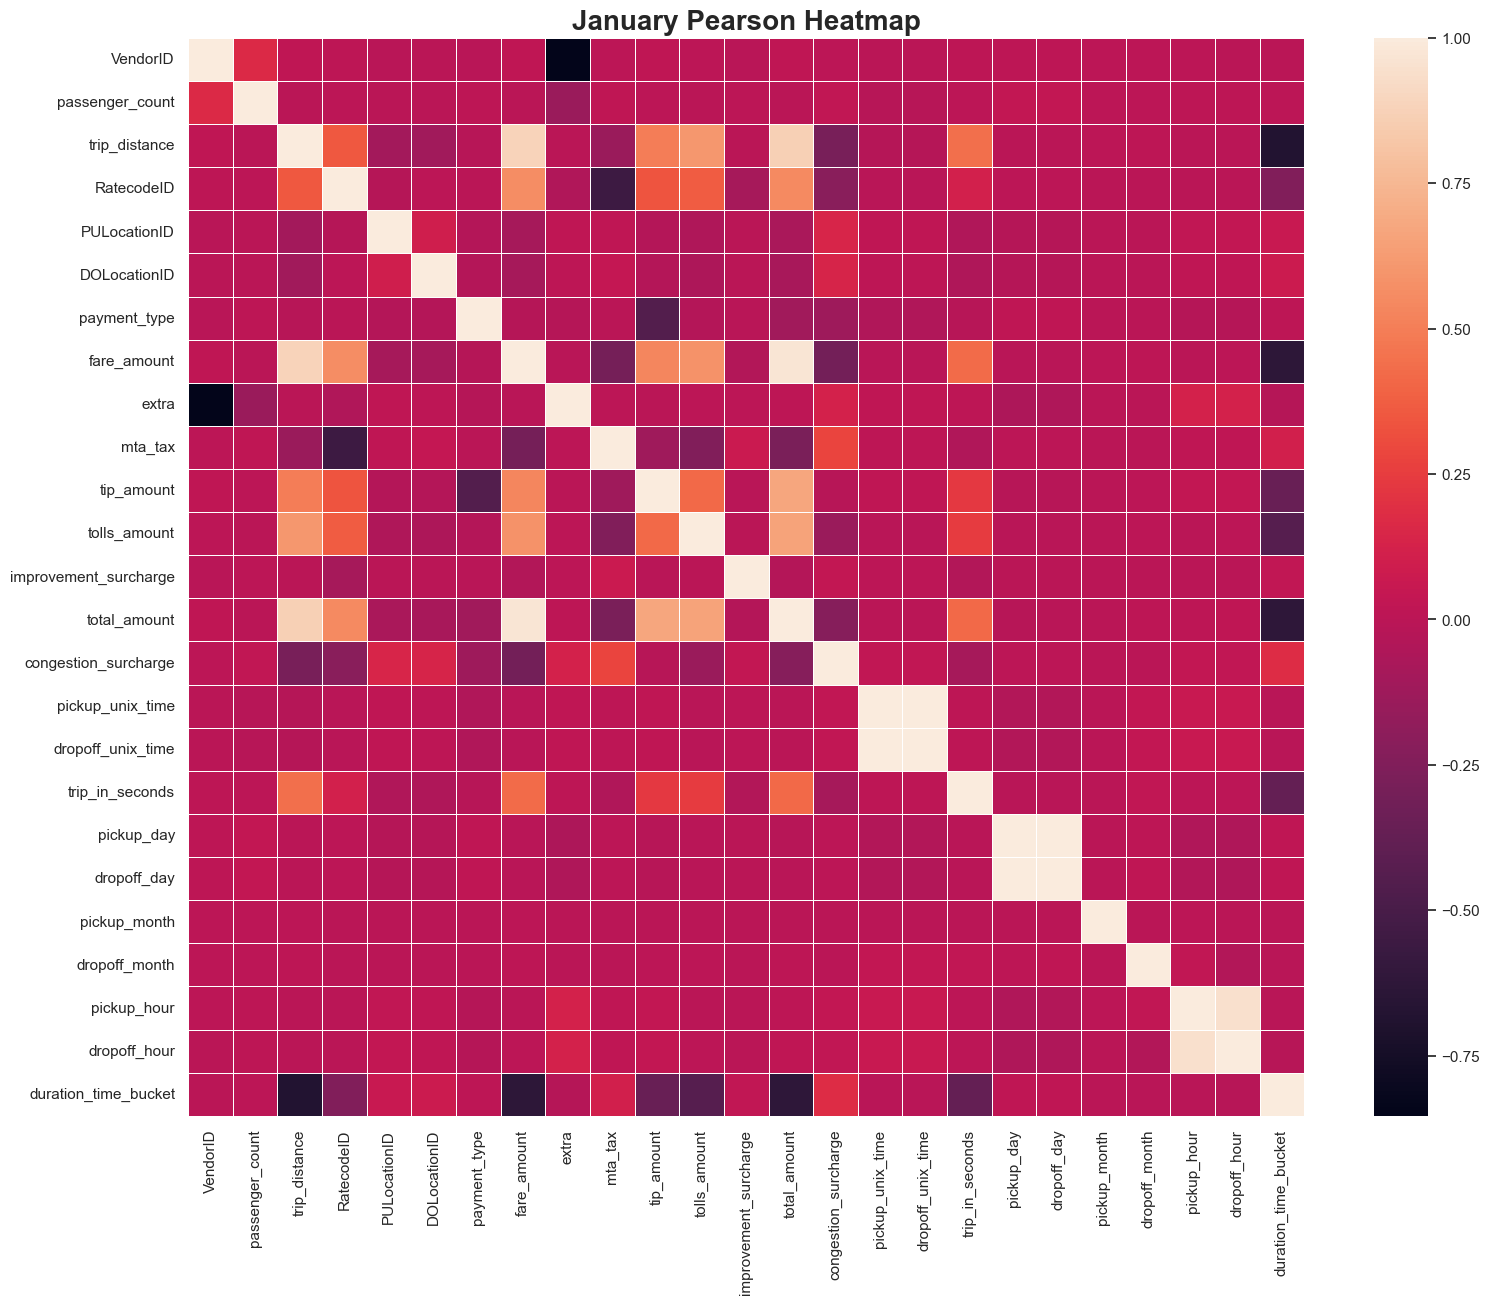

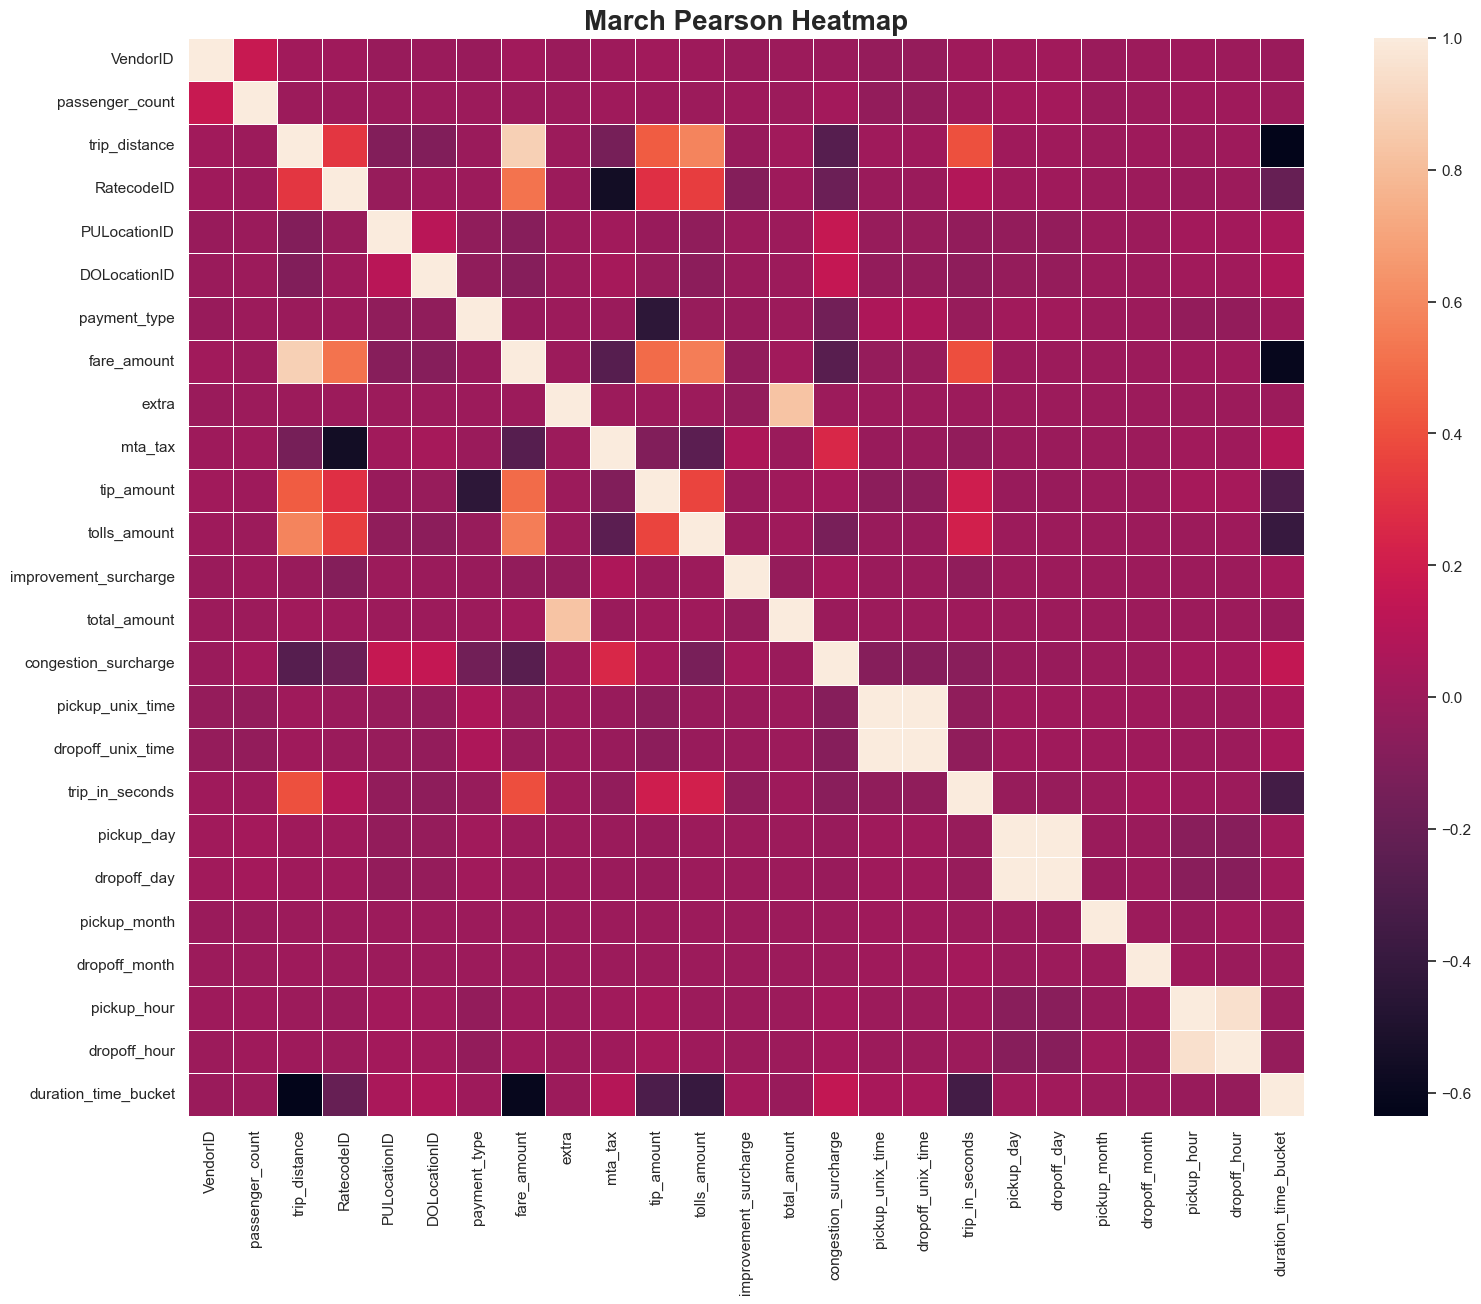

May Heatmap:


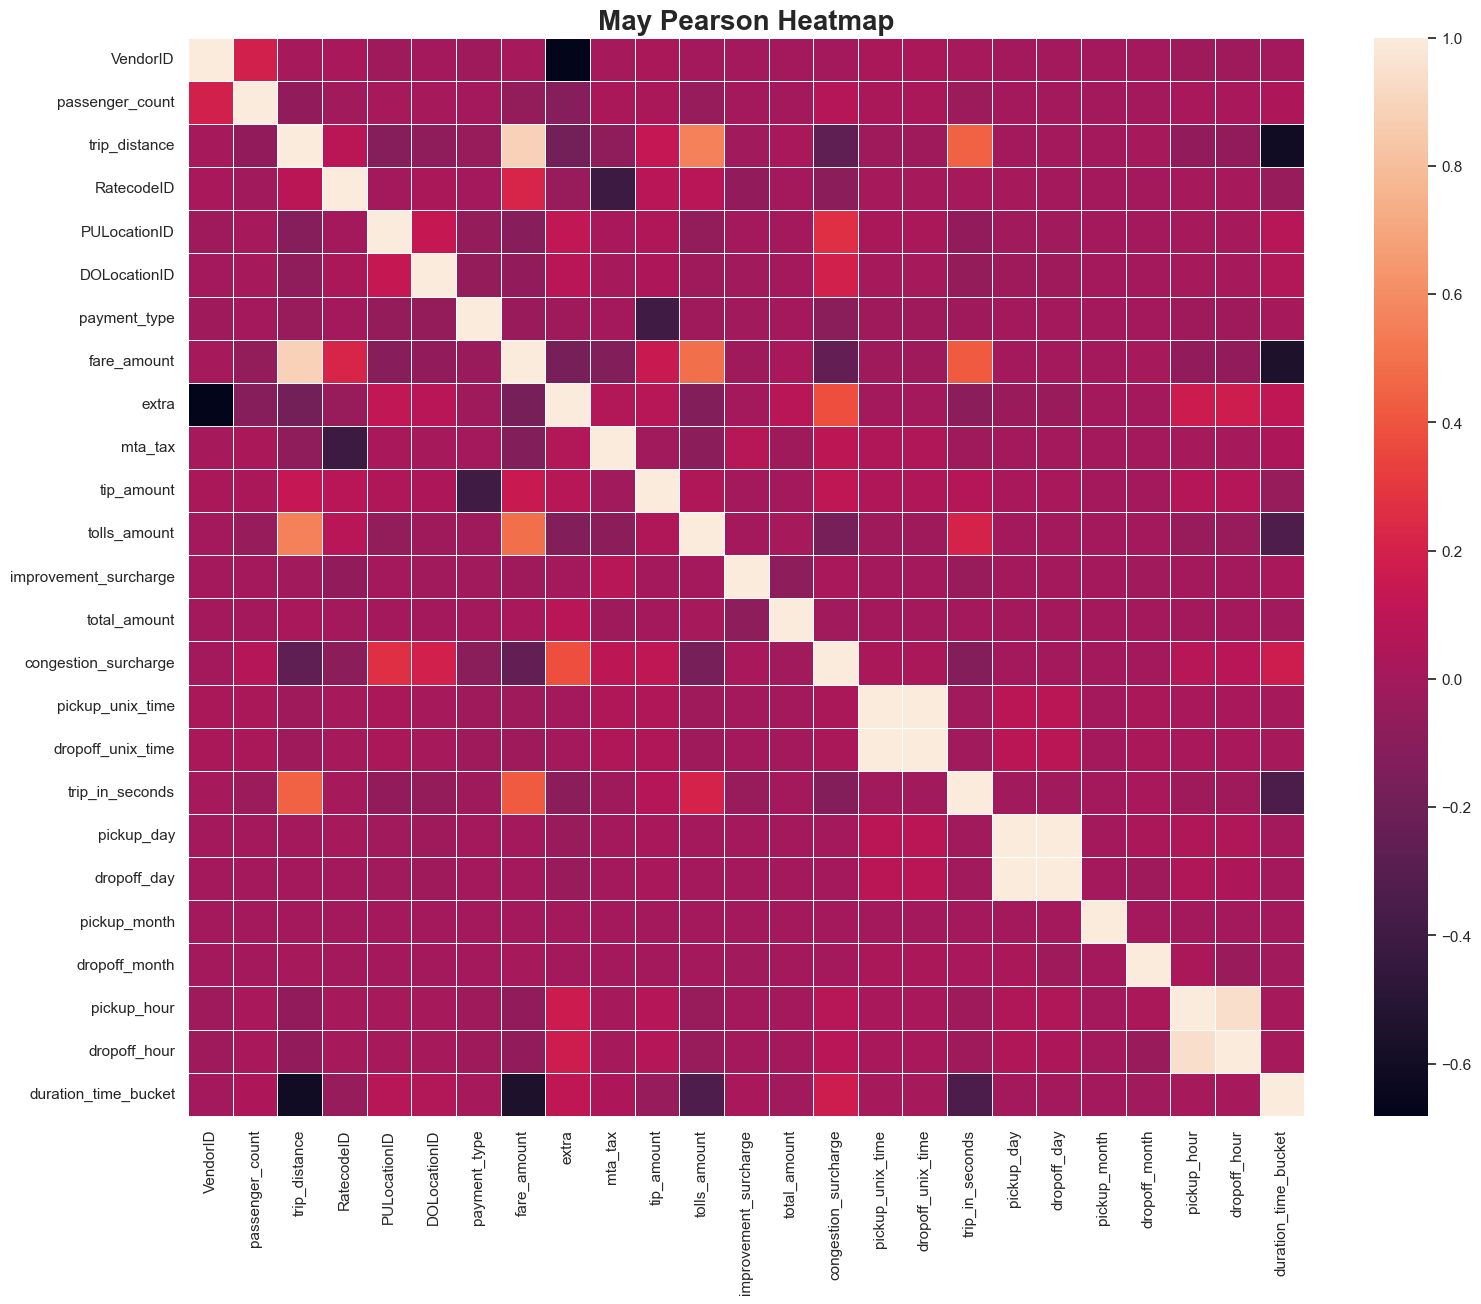

In [106]:
sns.set(rc = {'figure.figsize':(18,14)})
sns.heatmap(df_pearson_jan, linewidths=.5)
plt.title("January Pearson Heatmap", fontsize=title_size, weight='bold')
plt.show();

sns.set(rc = {'figure.figsize':(18,14)})
sns.heatmap(df_pearson_march, linewidths=.5)
plt.title("March Pearson Heatmap", fontsize=title_size, weight='bold')
plt.show();

print("May Heatmap:")
sns.set(rc = {'figure.figsize':(18,14)})
sns.heatmap(df_pearson_may, linewidths=.5)
plt.title("May Pearson Heatmap", fontsize=title_size, weight='bold')
plt.show();

## **Compare January and May Pearson heatmaps**

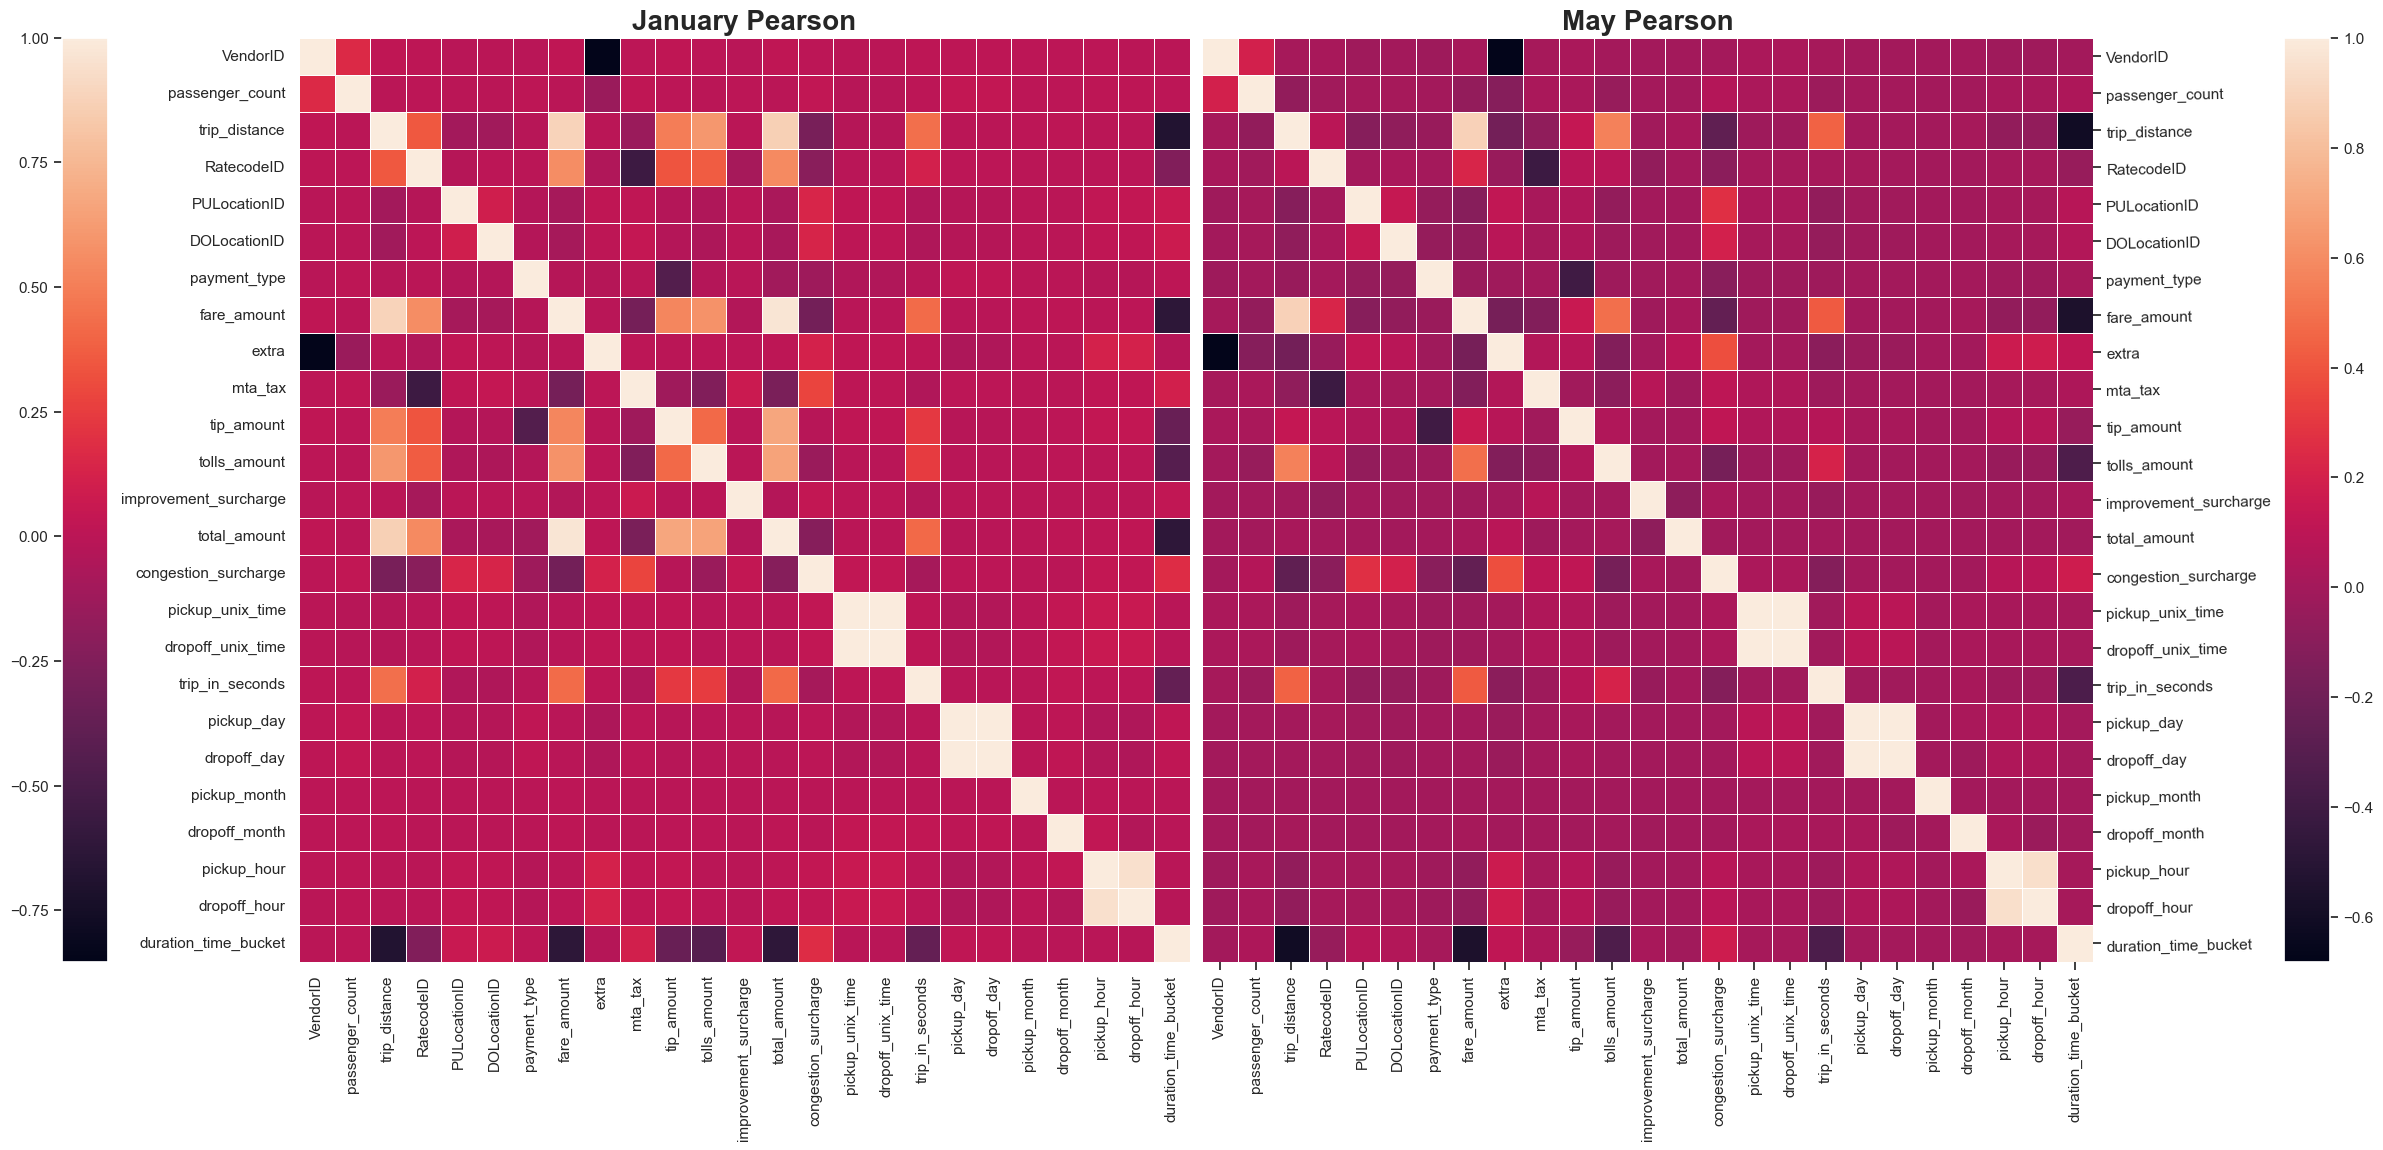

In [107]:
print("\n\n")
sns.set(rc = {'figure.figsize':(33,12)})
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.01)
sns.heatmap(df_pearson_jan, cmap="rocket", ax=ax1, cbar=False, linewidths=.5)
fig.colorbar(ax1.collections[0], ax=ax1, location="left", use_gridspec=False, pad=0.15)
sns.heatmap(df_pearson_may, cmap="rocket", ax=ax2, cbar=False, linewidths=.5)
fig.colorbar(ax2.collections[0], ax=ax2, location="right", use_gridspec=False, pad=0.15)
ax2.yaxis.tick_right()
ax2.xaxis.tick_bottom()
ax2.tick_params(axis='y', rotation=1)
ax1.set_title('January Pearson', weight='bold', fontsize=title_size)
ax2.set_title('May Pearson',  weight='bold', fontsize=title_size)
plt.show();

### **Show Pearson pairs with highest positive correlation values (simpler view)**

In [108]:
from tabulate import tabulate

#
# January
#

# Clear the diagonal so that it's not found as the false best correlation
df_pearson_jan.values[[np.arange(df_pearson_jan.shape[0])]*2] = 0

max_values = df_pearson_jan.max(axis = 1, skipna = True)
max_grid = df_pearson_jan.idxmax(axis = 1)
df1 = max_grid.to_frame()
df2 = max_values.to_frame()
df3 = pd.concat([df1, df2], axis=1)
df3.reset_index(drop=False, inplace=True)
df3.columns = ['Feature1', 'Feature2', 'corr']
df3.sort_values(by='corr', ascending=False, inplace=True)
print("\n\nJanuary Pearson positive correlation values:")
print(tabulate(df3, showindex=False, headers=['Feature1', 'Feature2', 'corr'], tablefmt="fancy_grid"))
print("\n")

min_values = df_pearson_jan.min(axis = 1, skipna = True)
min_grid = df_pearson_jan.idxmin(axis = 1)
df1 = min_grid.to_frame()
df2 = min_values.to_frame()
df3 = pd.concat([df1, df2], axis=1)
df3.reset_index(drop=False, inplace=True)
df3.columns = ['Feature1', 'Feature2', 'corr']
df3.sort_values(by='corr', ascending=True, inplace=True)
print("January Pearson negative correlation values:")
print(tabulate(df3, showindex=False, headers=['Feature1', 'Feature2', 'corr'], tablefmt="fancy_grid"))
print("\n\n")


#
# March
#

# Clear the diagonal so that it's not found as the false best correlation
df_pearson_march.values[[np.arange(df_pearson_march.shape[0])]*2] = 0

max_values = df_pearson_march.max(axis = 1, skipna = True)
max_grid = df_pearson_march.idxmax(axis = 1)
df1 = max_grid.to_frame()
df2 = max_values.to_frame()
df3 = pd.concat([df1, df2], axis=1)
df3.reset_index(drop=False, inplace=True)
df3.columns = ['Feature1', 'Feature2', 'corr']
df3.sort_values(by='corr', ascending=False, inplace=True)
print("\n\nMarch Pearson positive correlation values:")
print(tabulate(df3, showindex=False, headers=['Feature1', 'Feature2', 'corr'], tablefmt="fancy_grid"))
print("\n")

min_values = df_pearson_march.min(axis = 1, skipna = True)
min_grid = df_pearson_march.idxmin(axis = 1)
df1 = min_grid.to_frame()
df2 = min_values.to_frame()
df3 = pd.concat([df1, df2], axis=1)
df3.reset_index(drop=False, inplace=True)
df3.columns = ['Feature1', 'Feature2', 'corr']
df3.sort_values(by='corr', ascending=True, inplace=True)
print("March Pearson negative correlation values:")
print(tabulate(df3, showindex=False, headers=['Feature1', 'Feature2', 'corr'], tablefmt="fancy_grid"))
print("\n\n")


#
# May
#

# Clear the diagonal so that it's not found as the false best correlation
df_pearson_may.values[[np.arange(df_pearson_may.shape[0])]*2] = 0

max_values = df_pearson_may.max(axis = 1, skipna = True)
max_grid = df_pearson_may.idxmax(axis = 1)
df1 = max_grid.to_frame()
df2 = max_values.to_frame()
df3 = pd.concat([df1, df2], axis=1)
df3.reset_index(drop=False, inplace=True)
df3.columns = ['Feature1', 'Feature2', 'corr']
df3.sort_values(by='corr', ascending=False, inplace=True)
print("\n\nMay Pearson positive correlation values:")
print(tabulate(df3, showindex=False, headers=['Feature1', 'Feature2', 'corr'], tablefmt="fancy_grid"))
print("\n")

min_values = df_pearson_march.min(axis = 1, skipna = True)
min_grid = df_pearson_march.idxmin(axis = 1)
df1 = min_grid.to_frame()
df2 = min_values.to_frame()
df3 = pd.concat([df1, df2], axis=1)
df3.reset_index(drop=False, inplace=True)
df3.columns = ['Feature1', 'Feature2', 'corr']
df3.sort_values(by='corr', ascending=True, inplace=True)
print("May Pearson negative correlation values:")
print(tabulate(df3, showindex=False, headers=['Feature1', 'Feature2', 'corr'], tablefmt="fancy_grid"))
print("\n\n")



January Pearson positive correlation values:
╒═══════════════════════╤════════════╤════════╕
│ Feature1              │ Feature2   │   corr │
╞═══════════════════════╪════════════╪════════╡
│ VendorID              │ VendorID   │      0 │
├───────────────────────┼────────────┼────────┤
│ total_amount          │ VendorID   │      0 │
├───────────────────────┼────────────┼────────┤
│ dropoff_hour          │ VendorID   │      0 │
├───────────────────────┼────────────┼────────┤
│ pickup_hour           │ VendorID   │      0 │
├───────────────────────┼────────────┼────────┤
│ dropoff_month         │ VendorID   │      0 │
├───────────────────────┼────────────┼────────┤
│ pickup_month          │ VendorID   │      0 │
├───────────────────────┼────────────┼────────┤
│ dropoff_day           │ VendorID   │      0 │
├───────────────────────┼────────────┼────────┤
│ pickup_day            │ VendorID   │      0 │
├───────────────────────┼────────────┼────────┤
│ trip_in_seconds       │ VendorID   │   

<br>

### **Kendall Correlation for the January dataset - (very long time to converge)**

In [109]:
# kendall : Kendall Tau correlation coefficient

df_kendall = jan_df.corr(method='kendall')
df_kendall

VendorID  passenger_count  trip_distance  RatecodeID  \
VendorID               1.000000         0.116135       0.019861    0.017300   
passenger_count        0.116135         1.000000       0.007228    0.016913   
trip_distance          0.019861         0.007228       1.000000    0.179624   
RatecodeID             0.017300         0.016913       0.179624    1.000000   
PULocationID          -0.009347        -0.002197      -0.074425   -0.059209   
DOLocationID          -0.002544        -0.000525      -0.070257   -0.018474   
payment_type          -0.002057         0.021972      -0.039916   -0.013523   
fare_amount            0.009957         0.005150       0.806743    0.244609   
extra                 -0.679738        -0.075799      -0.002535   -0.058428   
mta_tax                0.008058         0.016108      -0.055203   -0.335329   
tip_amount             0.018536         0.000127       0.288867    0.133393   
tolls_amount           0.009732         0.004303       0.288950    0.508670   
improvement_surcharge -0.008001         0.005557      -0.002942   -0.046900   
total_amount           0.014283         0.004341       0.738892    0.239959   
congestion_surcharge   0.000841         0.033245      -0.135853   -0.142632   
pickup_unix_time      -0.004656        -0.019061      -0.013563   -0.013242   
dropoff_unix_time     -0.004529        -0.019016      -0.013008   -0.012929   
trip_in_seconds        0.002283         0.007271       0.676363    0.138710   
pickup_day             0.010871         0.040620       0.007381    0.003364   
dropoff_day            0.011049         0.040794       0.007997    0.002825   
pickup_month           0.002203         0.001322       0.001058   -0.000023   
dropoff_month          0.002095         0.002075       0.010805   -0.000485   
pickup_hour            0.005626         0.029586       0.015351    0.000971   
dropoff_hour           0.004336         0.028540       0.018225    0.006597   
duration_time_bucket  -0.002863        -0.000549      -0.320914   -0.412664   

                       PULocationID  DOLocationID  payment_type  fare_amount  \
VendorID                  -0.009347     -0.002544     -0.002057     0.009957   
passenger_count           -0.002197     -0.000525      0.021972     0.005150   
trip_distance             -0.074425     -0.070257     -0.039916     0.806743   
RatecodeID                -0.059209     -0.018474     -0.013523     0.244609   
PULocationID               1.000000      0.070688     -0.027393    -0.072340   
DOLocationID               0.070688      1.000000     -0.026138    -0.070885   
payment_type              -0.027393     -0.026138      1.000000    -0.041417   
fare_amount               -0.072340     -0.070885     -0.041417     1.000000   
extra                      0.008837      0.001299     -0.029786    -0.007083   
mta_tax                    0.012615      0.021239      0.001709    -0.109726   
tip_amount                -0.006378     -0.003224     -0.620201     0.323296   
tolls_amount              -0.073229     -0.048209     -0.036771     0.300825   
improvement_surcharge      0.000233     -0.005633     -0.012191    -0.012158   
total_amount              -0.060235     -0.058575     -0.183950     0.853629   
congestion_surcharge       0.126234      0.098783     -0.124077    -0.142489   
pickup_unix_time           0.009956      0.007340     -0.036060     0.003906   
dropoff_unix_time          0.009870      0.007256     -0.036066     0.004500   
trip_in_seconds           -0.060249     -0.066212     -0.042571     0.840608   
pickup_day                -0.017800     -0.014854      0.018272    -0.005937   
dropoff_day               -0.017825     -0.014967      0.017999    -0.005330   
pickup_month              -0.000201     -0.000573      0.000732     0.001050   
dropoff_month             -0.003032     -0.002702     -0.002473     0.010696   
pickup_hour                0.003838      0.006958     -0.024974     0.007556   
dropoff_hour               0.004918      0.00735

### **Kendall Correlation Heatmap For The January Dataset**

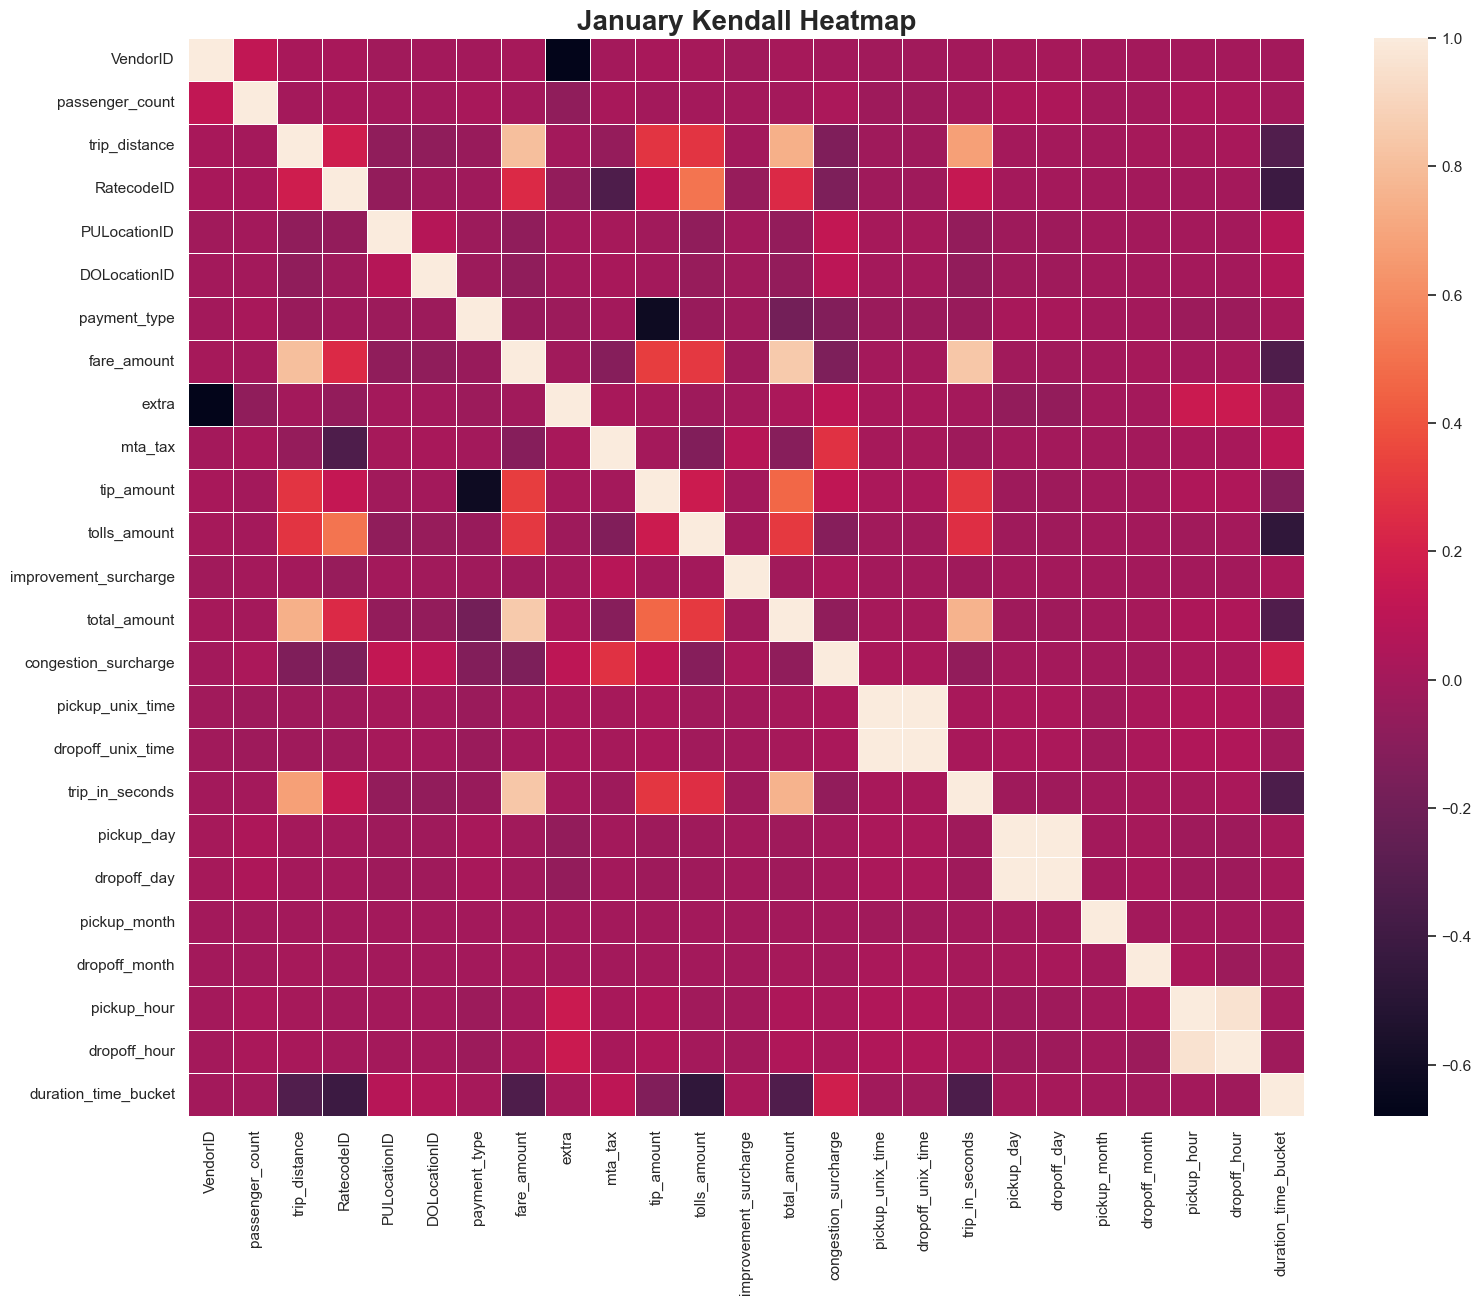

In [110]:
sns.set(rc = {'figure.figsize':(18,14)})
sns.heatmap(df_kendall, linewidths=.5)
plt.title("January Kendall Heatmap", weight='bold', fontsize=title_size)
plt.show();

### **Show Kendall pairs with highest positive correlation values (simpler view)**

In [111]:
#
# January
#

# Clear the diagonal so that it's not found as the false best correlation
df_kendall.values[[np.arange(df_pearson_jan.shape[0])]*2] = 0

max_values = df_kendall.max(axis = 1, skipna = True)
max_grid = df_kendall.idxmax(axis = 1)
df1 = max_grid.to_frame()
df2 = max_values.to_frame()
df3 = pd.concat([df1, df2], axis=1)
df3.reset_index(drop=False, inplace=True)
df3.columns = ['Feature1', 'Feature2', 'corr']
df3.sort_values(by='corr', ascending=False, inplace=True)
print("\n\nJanuary Kendall positive correlation values:")
print(tabulate(df3, showindex=False, headers=['Feature1', 'Feature2', 'corr'], tablefmt="fancy_grid"))
print("\n")

min_values = df_kendall.min(axis = 1, skipna = True)
min_grid = df_kendall.idxmin(axis = 1)
df1 = min_grid.to_frame()
df2 = min_values.to_frame()
df3 = pd.concat([df1, df2], axis=1)
df3.reset_index(drop=False, inplace=True)
df3.columns = ['Feature1', 'Feature2', 'corr']
df3.sort_values(by='corr', ascending=True, inplace=True)
print("January Kendall negative correlation values:")
print(tabulate(df3, showindex=False, headers=['Feature1', 'Feature2', 'corr'], tablefmt="fancy_grid"))
print("\n\n")



January Kendall positive correlation values:
╒═══════════════════════╤════════════╤════════╕
│ Feature1              │ Feature2   │   corr │
╞═══════════════════════╪════════════╪════════╡
│ VendorID              │ VendorID   │      0 │
├───────────────────────┼────────────┼────────┤
│ total_amount          │ VendorID   │      0 │
├───────────────────────┼────────────┼────────┤
│ dropoff_hour          │ VendorID   │      0 │
├───────────────────────┼────────────┼────────┤
│ pickup_hour           │ VendorID   │      0 │
├───────────────────────┼────────────┼────────┤
│ dropoff_month         │ VendorID   │      0 │
├───────────────────────┼────────────┼────────┤
│ pickup_month          │ VendorID   │      0 │
├───────────────────────┼────────────┼────────┤
│ dropoff_day           │ VendorID   │      0 │
├───────────────────────┼────────────┼────────┤
│ pickup_day            │ VendorID   │      0 │
├───────────────────────┼────────────┼────────┤
│ trip_in_seconds       │ VendorID   │   

<br>

### **Spearman Correlation for the January dataset**

In [112]:
# spearman : Spearman rank correlation

df_spearman = jan_df.corr(method='spearman')
df_spearman

VendorID  passenger_count  trip_distance  RatecodeID  \
VendorID               1.000000         0.120939       0.024265    0.017359   
passenger_count        0.120939         1.000000       0.009200    0.017674   
trip_distance          0.024265         0.009200       1.000000    0.220161   
RatecodeID             0.017359         0.017674       0.220161    1.000000   
PULocationID          -0.011311        -0.002770      -0.109726   -0.071836   
DOLocationID          -0.003085        -0.000665      -0.104622   -0.022288   
payment_type          -0.002065         0.022976      -0.048917   -0.013620   
fare_amount            0.012010         0.006474       0.922320    0.295051   
extra                 -0.757254        -0.087862      -0.002733   -0.065587   
mta_tax                0.008058         0.016774      -0.067442   -0.336488   
tip_amount             0.021906         0.000155       0.356297    0.157867   
tolls_amount           0.009753         0.004490       0.353332    0.510457   
improvement_surcharge -0.008001         0.005787      -0.003594   -0.047062   
total_amount           0.017427         0.005519       0.889572    0.293029   
congestion_surcharge   0.000841         0.034621      -0.165973   -0.143127   
pickup_unix_time      -0.005702        -0.024312      -0.020350   -0.016270   
dropoff_unix_time     -0.005547        -0.024254      -0.019525   -0.015885   
trip_in_seconds        0.002796         0.009281       0.855527    0.169762   
pickup_day             0.012434         0.048384       0.010271    0.003862   
dropoff_day            0.012638         0.048594       0.011129    0.003244   
pickup_month           0.002203         0.001377       0.001293   -0.000023   
dropoff_month          0.002095         0.002161       0.013200   -0.000487   
pickup_hour            0.006725         0.036792       0.021703    0.001172   
dropoff_hour           0.005183         0.035489       0.025843    0.007914   
duration_time_bucket  -0.002863        -0.000572      -0.392127   -0.414160   

                       PULocationID  DOLocationID  payment_type  fare_amount  \
VendorID                  -0.011311     -0.003085     -0.002065     0.012010   
passenger_count           -0.002770     -0.000665      0.022976     0.006474   
trip_distance             -0.109726     -0.104622     -0.048917     0.922320   
RatecodeID                -0.071836     -0.022288     -0.013620     0.295051   
PULocationID               1.000000      0.101544     -0.033279    -0.104222   
DOLocationID               0.101544      1.000000     -0.031818    -0.103325   
payment_type              -0.033279     -0.031818      1.000000    -0.050068   
fare_amount               -0.104222     -0.103325     -0.050068     1.000000   
extra                      0.011544      0.001921     -0.033297    -0.009371   
mta_tax                    0.015266      0.025755      0.001716    -0.132353   
tip_amount                -0.007961     -0.004685     -0.735783     0.376458   
tolls_amount              -0.088777     -0.058441     -0.036991     0.362701   
improvement_surcharge      0.000282     -0.006831     -0.012238    -0.014665   
total_amount              -0.087530     -0.086426     -0.224819     0.961461   
congestion_surcharge       0.152761      0.119789     -0.124559    -0.171873   
pickup_unix_time           0.014818      0.010881     -0.044333     0.005700   
dropoff_unix_time          0.014694      0.010759     -0.044341     0.006567   
trip_in_seconds           -0.087996     -0.097605     -0.052243     0.933496   
pickup_day                -0.024672     -0.020527      0.020979    -0.008162   
dropoff_day               -0.024709     -0.020685      0.020666    -0.007332   
pickup_month              -0.000243     -0.000694      0.000734     0.001267   
dropoff_month             -0.003670     -0.003276     -0.002483     0.012902   
pickup_hour                0.006932      0.009137     -0.029961     0.010665   
dropoff_hour               0.008575      0.00976

### **Spearman Correlation Heatmap For The January Dataset**

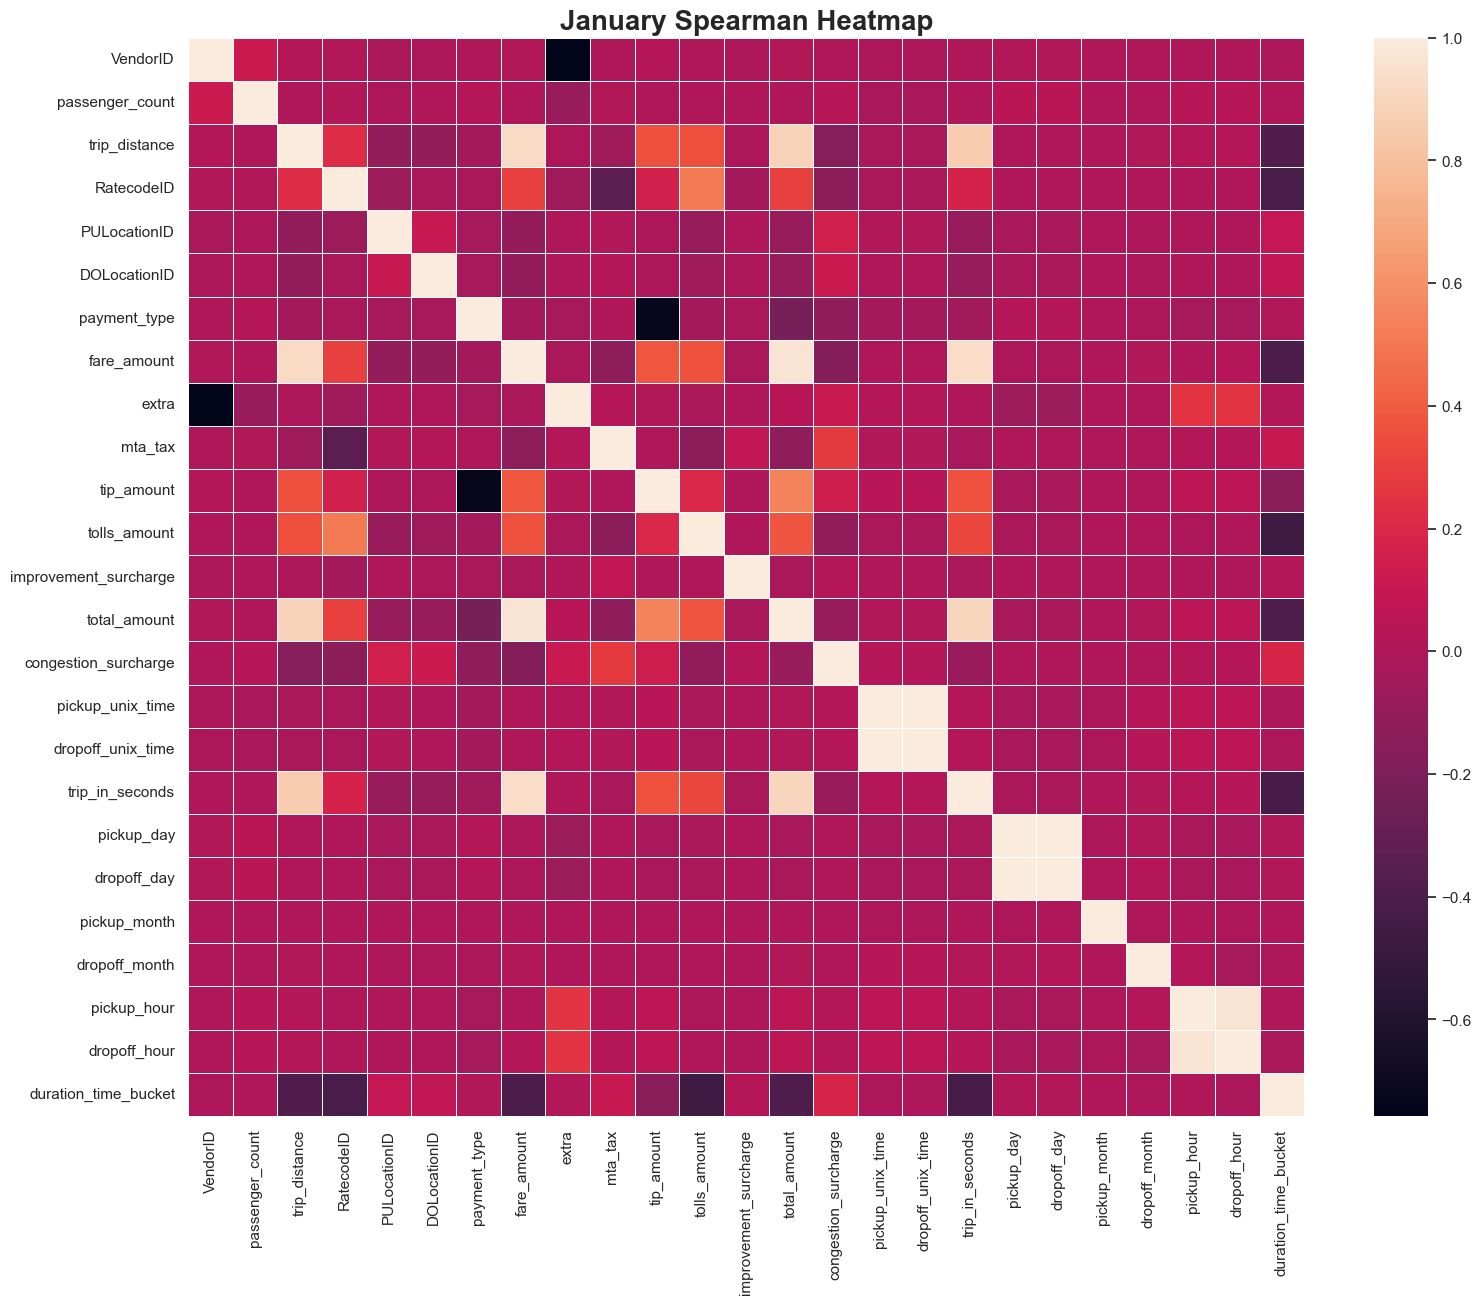

In [113]:
sns.set(rc = {'figure.figsize':(18,14)})
sns.heatmap(df_spearman, linewidths=.5)
plt.title("January Spearman Heatmap", weight='bold', fontsize=title_size)
plt.show();

### **Show Spearman pairs with highest positive correlation values (simpler view)**

In [114]:
#
# January
#

# Clear the diagonal so that it's not found as the false best correlation
df_kendall.values[[np.arange(df_pearson_jan.shape[0])]*2] = 0

max_values = df_spearman.max(axis = 1, skipna = True)
max_grid = df_spearman.idxmax(axis = 1)
df1 = max_grid.to_frame()
df2 = max_values.to_frame()
df3 = pd.concat([df1, df2], axis=1)
df3.reset_index(drop=False, inplace=True)
df3.columns = ['Feature1', 'Feature2', 'corr']
df3.sort_values(by='corr', ascending=False, inplace=True)
print("\n\nJanuary Spearman positive correlation values:")
print(tabulate(df3, showindex=False, headers=['Feature1', 'Feature2', 'corr'], tablefmt="fancy_grid"))
print("\n")

min_values = df_spearman.min(axis = 1, skipna = True)
min_grid = df_spearman.idxmin(axis = 1)
df1 = min_grid.to_frame()
df2 = min_values.to_frame()
df3 = pd.concat([df1, df2], axis=1)
df3.reset_index(drop=False, inplace=True)
df3.columns = ['Feature1', 'Feature2', 'corr']
df3.sort_values(by='corr', ascending=True, inplace=True)
print("January Spearman negative correlation values:")
print(tabulate(df3, showindex=False, headers=['Feature1', 'Feature2', 'corr'], tablefmt="fancy_grid"))
print("\n\n")




January Spearman positive correlation values:
╒═══════════════════════╤═══════════════════════╤════════╕
│ Feature1              │ Feature2              │   corr │
╞═══════════════════════╪═══════════════════════╪════════╡
│ VendorID              │ VendorID              │      1 │
├───────────────────────┼───────────────────────┼────────┤
│ total_amount          │ total_amount          │      1 │
├───────────────────────┼───────────────────────┼────────┤
│ dropoff_hour          │ dropoff_hour          │      1 │
├───────────────────────┼───────────────────────┼────────┤
│ pickup_hour           │ pickup_hour           │      1 │
├───────────────────────┼───────────────────────┼────────┤
│ dropoff_month         │ dropoff_month         │      1 │
├───────────────────────┼───────────────────────┼────────┤
│ pickup_month          │ pickup_month          │      1 │
├───────────────────────┼───────────────────────┼────────┤
│ dropoff_day           │ dropoff_day           │      1 │
├───────

## **Try to find feature correlations using pandas scatter-matrix plots**



Using March data-set...



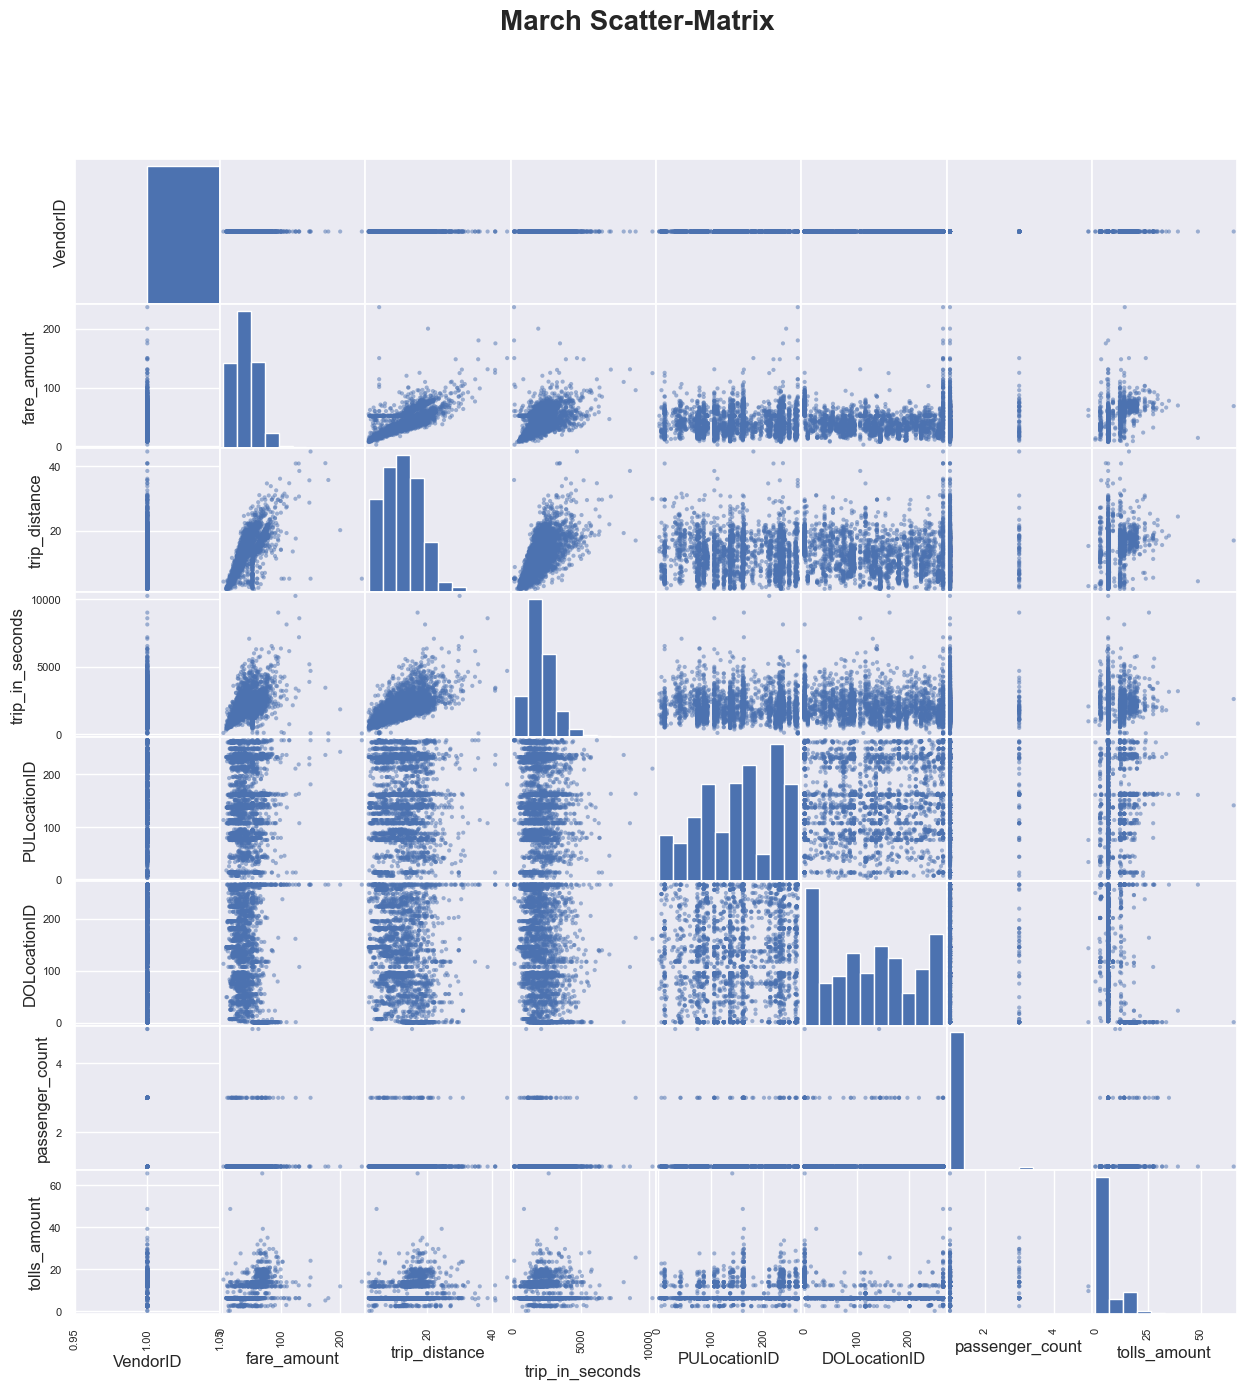

VendorID not very useful in correlations




In [115]:
#
# Try to find attribute correlations by using pandas scatter-matrix plots
#

march_df_filtered_1 = \
    march_df[ \
    (march_df['trip_distance'] >= 2) & (march_df['trip_distance'] <= 50) & \
    (march_df['fare_amount'] >= 3) & (march_df['fare_amount'] <= 300) & \
    (march_df['trip_in_seconds'] > 60) & (march_df['trip_in_seconds'] <= 12000) & \
    (march_df['VendorID']) & \
    (march_df['PULocationID']) & \
    (march_df['DOLocationID']) & \
    (march_df['passenger_count']) & \
    (march_df['tolls_amount'] > 0) \
    ].copy()

print("\n\nUsing March data-set...\n")
pd.plotting.scatter_matrix(frame = march_df_filtered_1[['VendorID','fare_amount', 'trip_distance', 'trip_in_seconds', 'PULocationID', 'DOLocationID', 'passenger_count', 'tolls_amount']], figsize=(15,15))
plt.suptitle("March Scatter-Matrix", fontsize=title_size, weight='bold')
plt.show();

print("VendorID not very useful in correlations\n\n")


Toll amount to Drop Off location



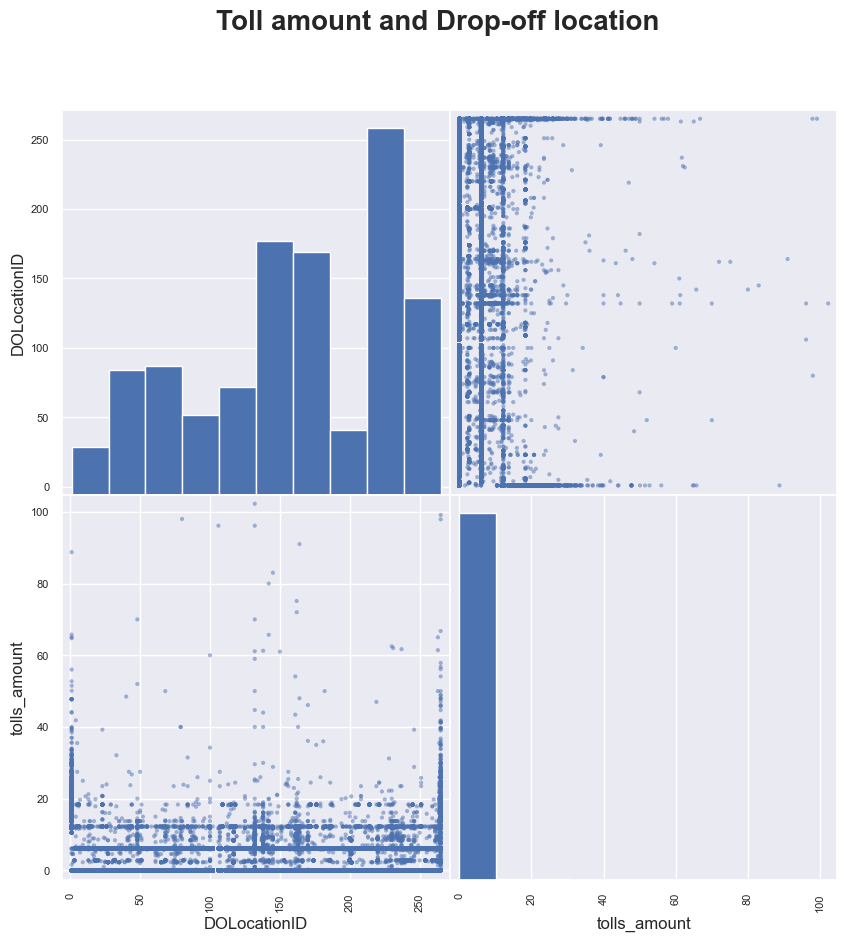

In [116]:
print("\nToll amount to Drop Off location\n")

pd.plotting.scatter_matrix(frame = march_df[['DOLocationID', 'tolls_amount']], figsize=(10,10))
plt.suptitle("Toll amount and Drop-off location", weight='bold', fontsize=title_size)
plt.show();


March - Pick-up location to Drop-off location



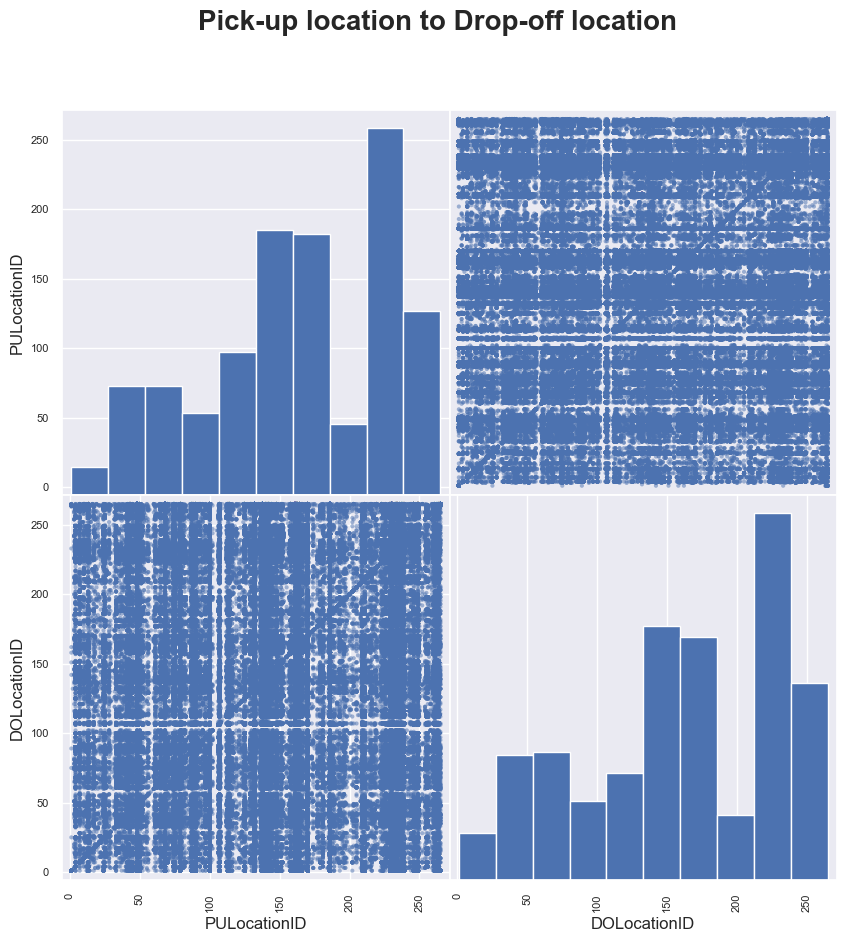

In [117]:
print("\nMarch - Pick-up location to Drop-off location\n")

pd.plotting.scatter_matrix(frame = march_df[['PULocationID', 'DOLocationID']], figsize=(10,10))
plt.suptitle("Pick-up location to Drop-off location", weight='bold', fontsize=title_size)
plt.show();


March - Pick-up location to passenger count



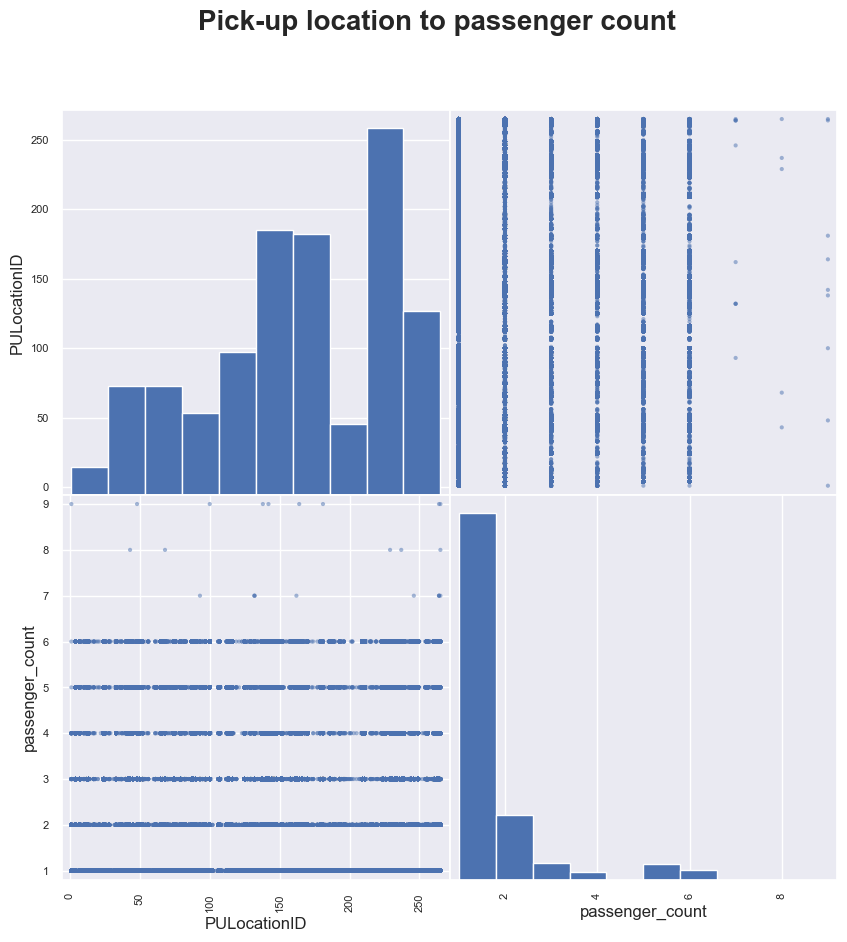

In [118]:
print("\nMarch - Pick-up location to passenger count\n")

pd.plotting.scatter_matrix(frame = march_df[['PULocationID', 'passenger_count']], figsize=(10,10))
plt.suptitle("Pick-up location to passenger count", weight='bold', fontsize=20)
plt.show();

<br>

# **Effects of COVID on Taxi Rides**

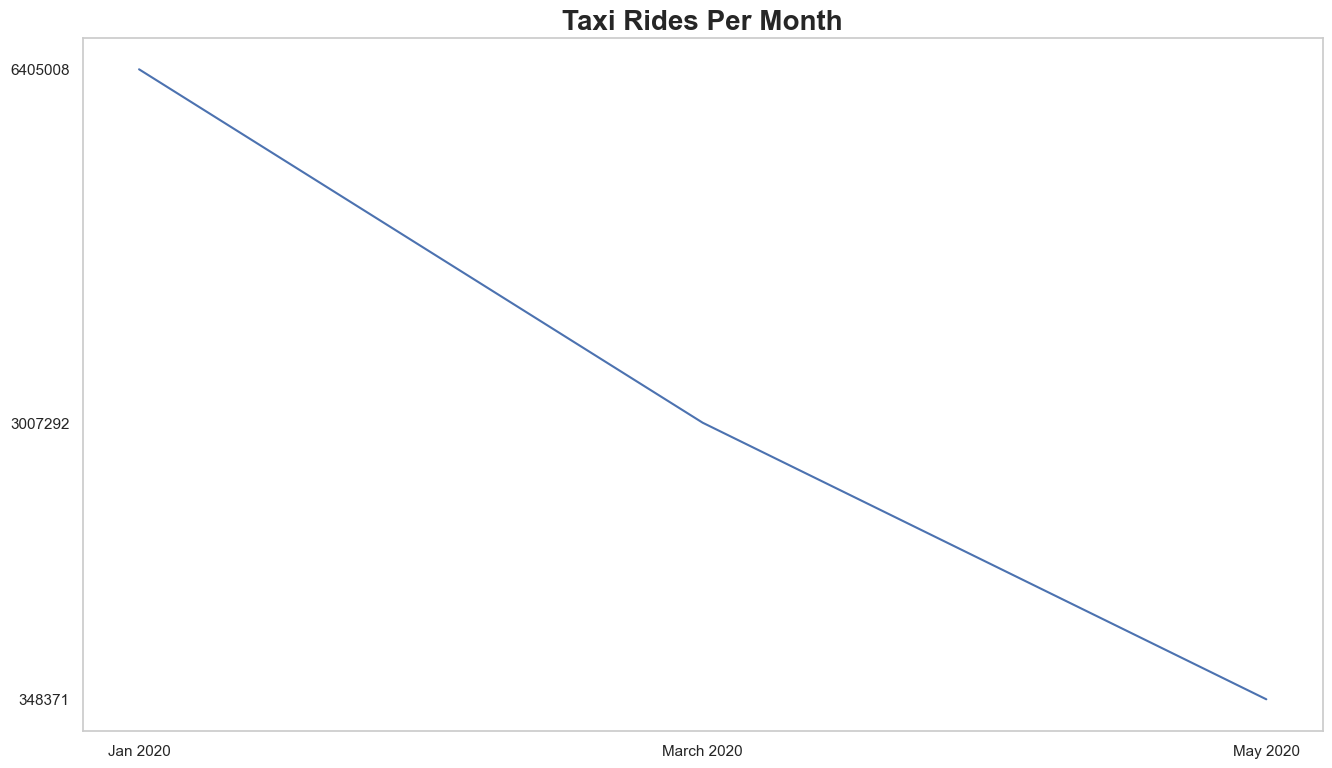

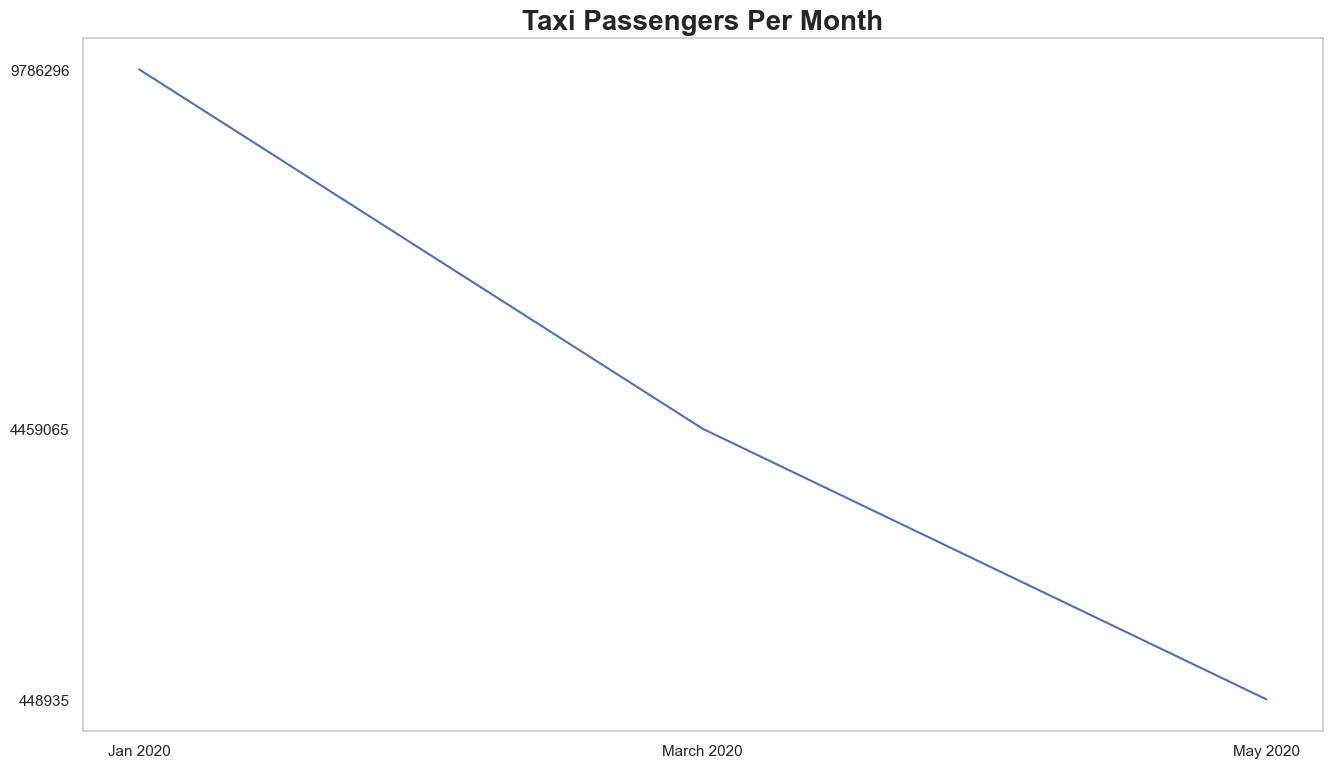

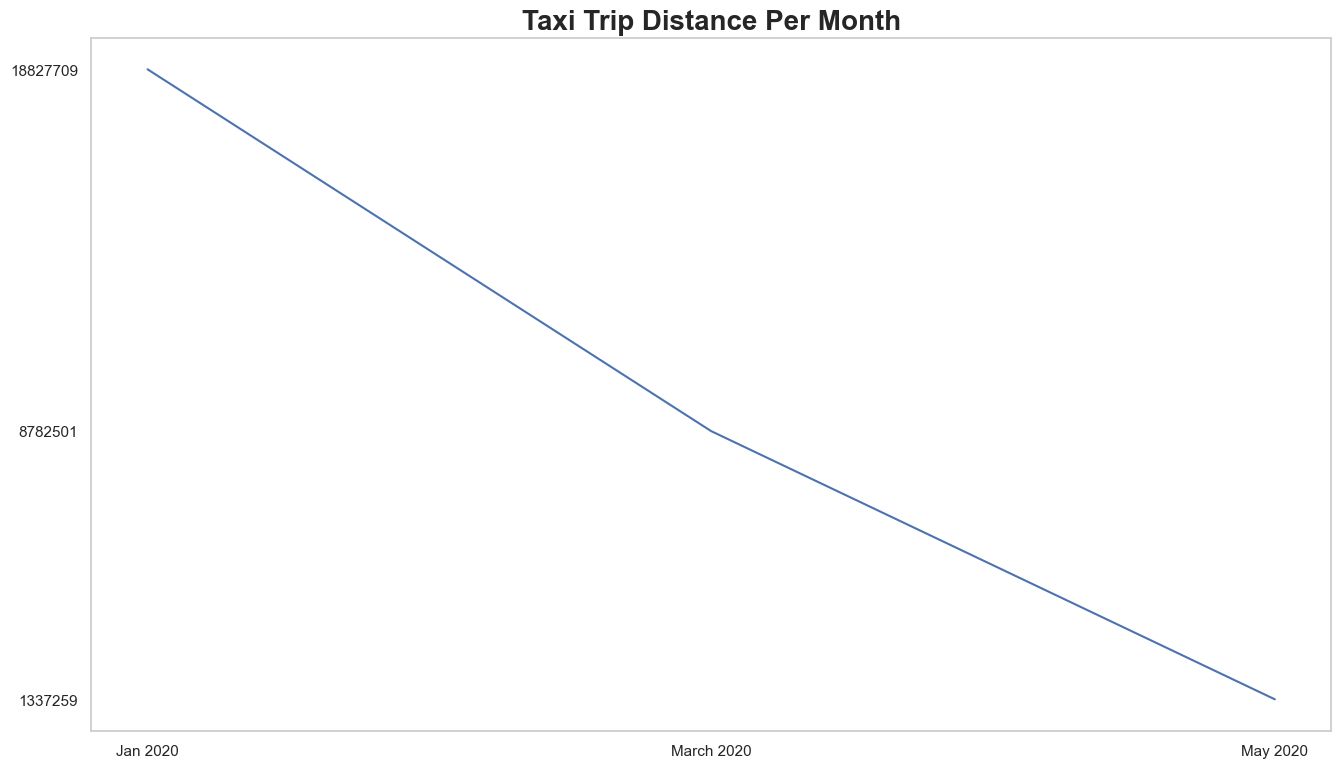

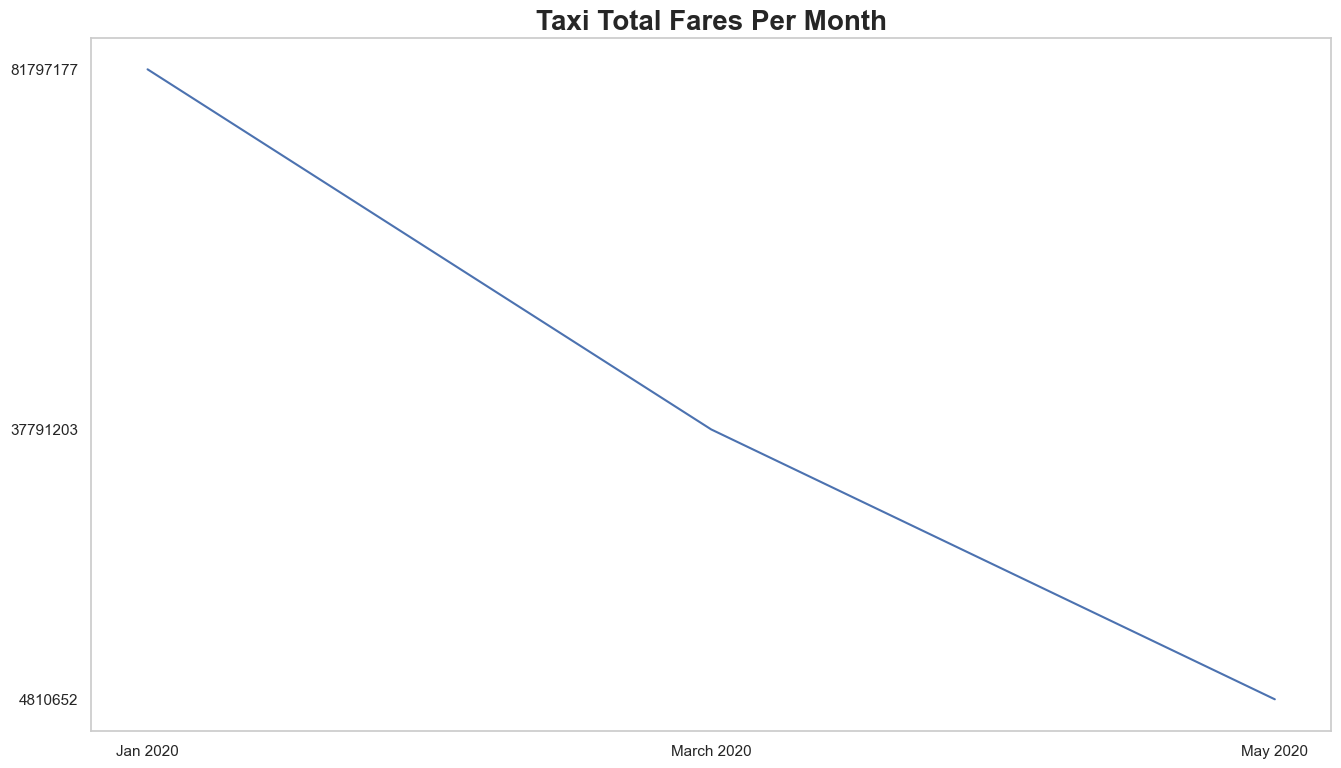

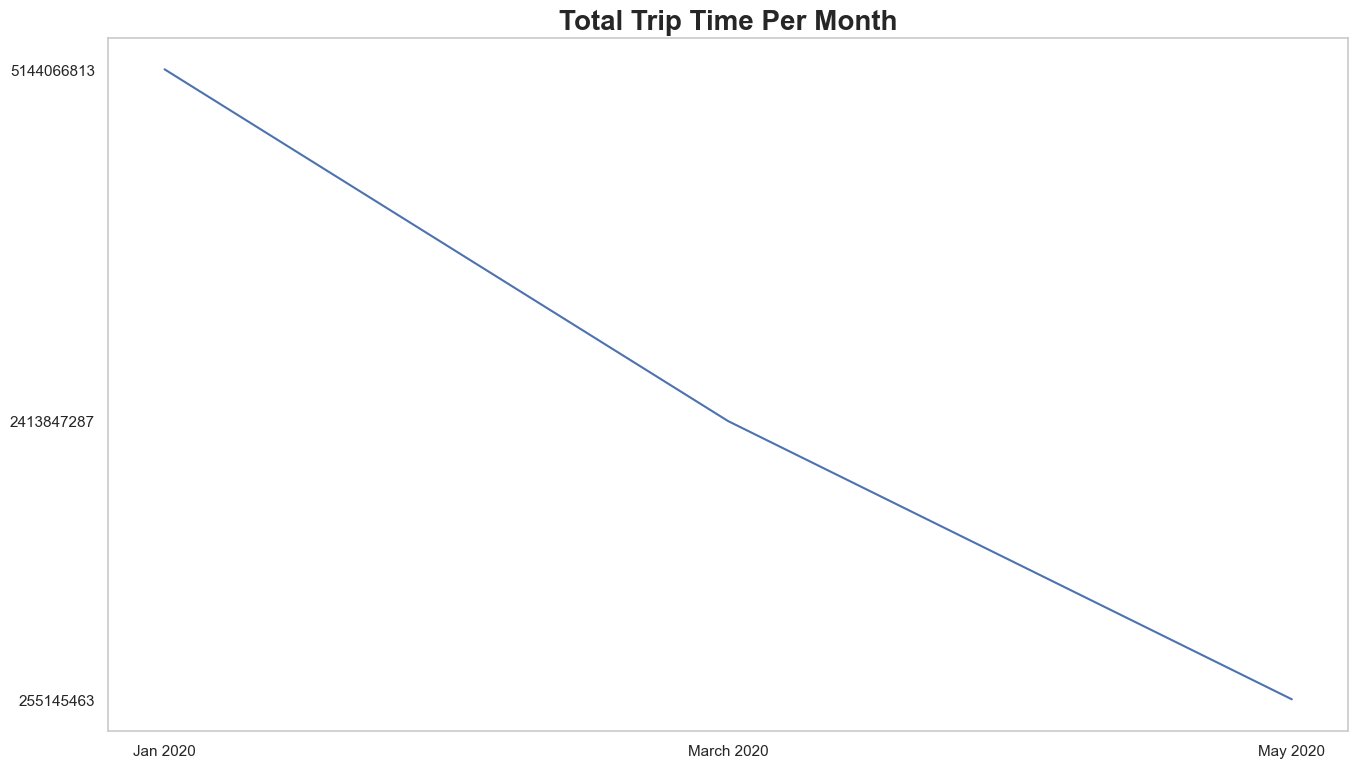

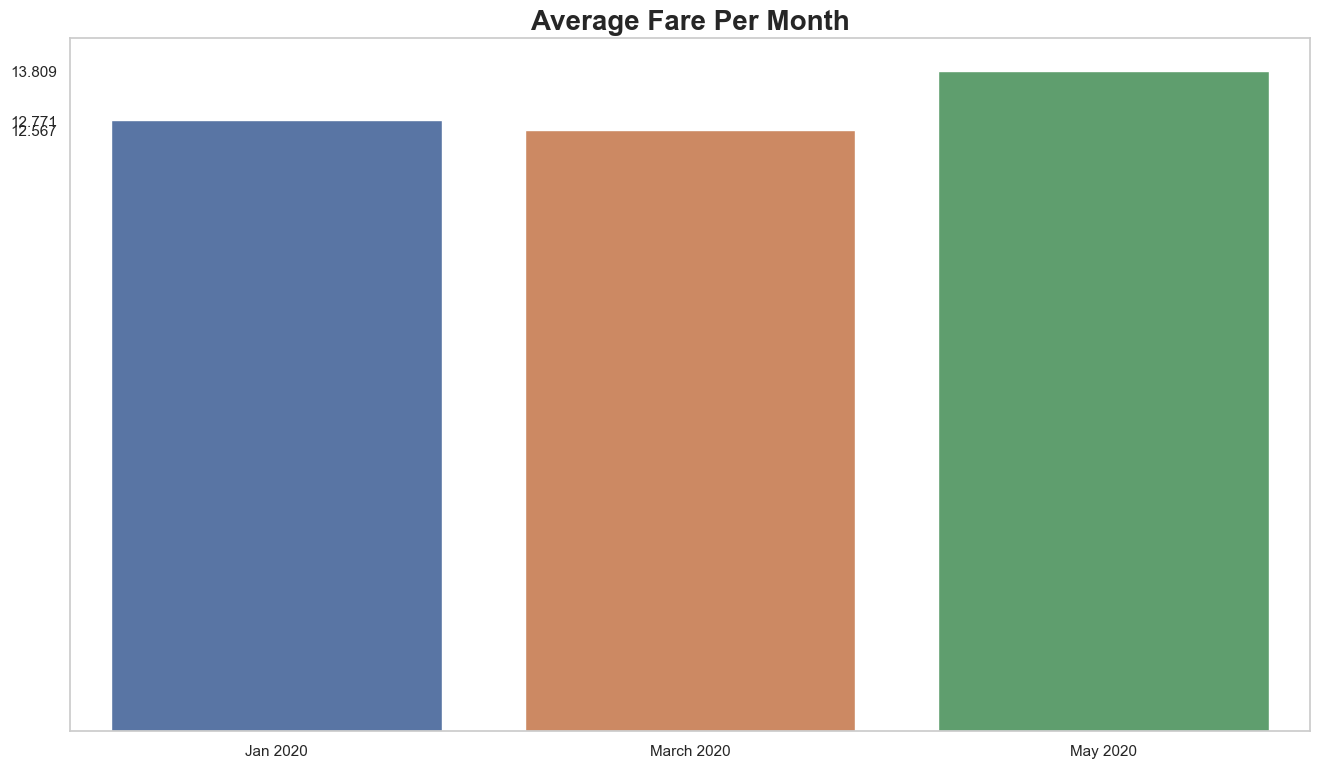

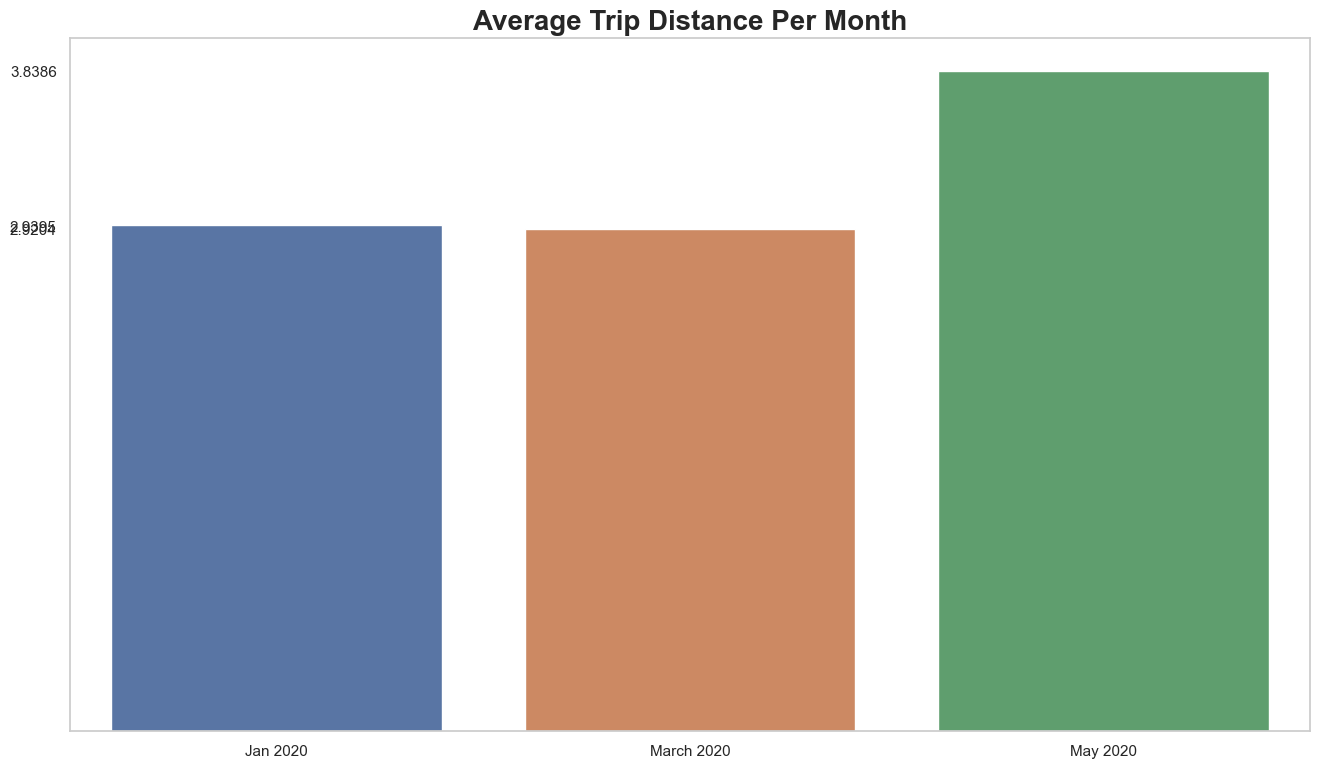

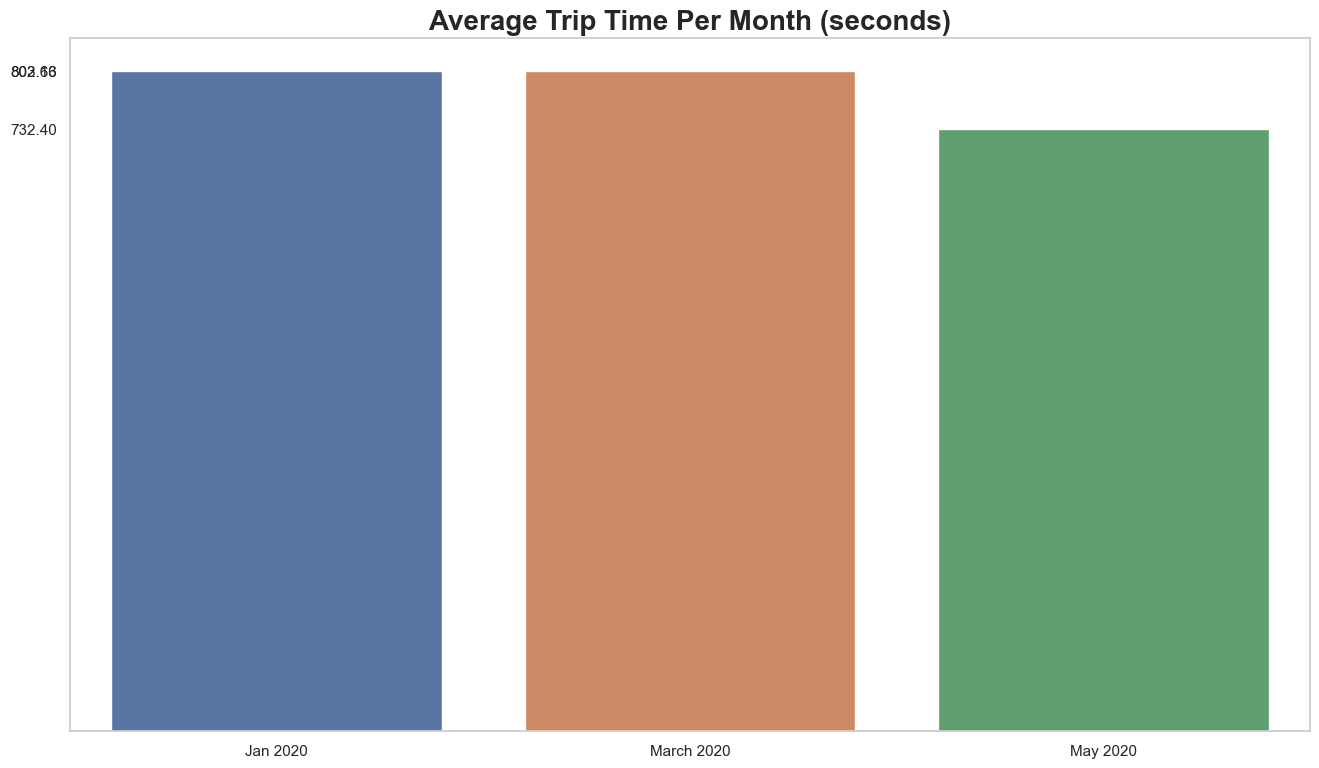

In [119]:
x = ['Jan 2020', 'March 2020', 'May 2020']
y = [len(jan_df), len(march_df), len(may_df)]
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.lineplot(x=x, y=y)
plt.title('Taxi Rides Per Month', weight='bold', fontsize=title_size)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.yticks(y)
plt.show();
print("\n\n")

x = ['Jan 2020', 'March 2020', 'May 2020']
y = [jan_df['passenger_count'].sum(), march_df['passenger_count'].sum(), may_df['passenger_count'].sum()]
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.lineplot(x=x, y=y)
plt.title('Taxi Passengers Per Month', weight='bold', fontsize=title_size)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.yticks(y)
plt.show();
print("\n\n")

x = ['Jan 2020', 'March 2020', 'May 2020']
y = [jan_df['trip_distance'].sum(), march_df['trip_distance'].sum(), may_df['trip_distance'].sum()]
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.lineplot(x=x, y=y)
plt.title('Taxi Trip Distance Per Month', weight='bold', fontsize=title_size)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.yticks(y)
plt.show();
print("\n\n")

x = ['Jan 2020', 'March 2020', 'May 2020']
y = [jan_df['fare_amount'].sum(), march_df['fare_amount'].sum(), may_df['fare_amount'].sum()]
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.lineplot(x=x, y=y)
plt.title('Taxi Total Fares Per Month', weight='bold', fontsize=title_size)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.yticks(y)
plt.show();
print("\n\n")

x = ['Jan 2020', 'March 2020', 'May 2020']
y = [jan_df['trip_in_seconds'].sum(), march_df['trip_in_seconds'].sum(), may_df['trip_in_seconds'].sum()]
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.lineplot(x=x, y=y)
plt.title('Total Trip Time Per Month', weight='bold', fontsize=title_size)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.yticks(y)
plt.show();
print("\n\n")

print("\n\n")
x = ['Jan 2020', 'March 2020', 'May 2020']
y = [jan_df['fare_amount'].mean(), march_df['fare_amount'].mean(), may_df['fare_amount'].mean()]
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.barplot(x=x, y=y)
plt.title('Average Fare Per Month', weight='bold', fontsize=title_size)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.yticks(y)
plt.show();
print("\n\n")

print("\n\n")
x = ['Jan 2020', 'March 2020', 'May 2020']
y = [jan_df['trip_distance'].mean(), march_df['trip_distance'].mean(), may_df['trip_distance'].mean()]
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.barplot(x=x, y=y)
plt.title('Average Trip Distance Per Month', weight='bold', fontsize=title_size)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.yticks(y)
plt.show();
print("\n\n")

print("\n\n")
x = ['Jan 2020', 'March 2020', 'May 2020']
y = [jan_df['trip_in_seconds'].mean(), march_df['trip_in_seconds'].mean(), may_df['trip_in_seconds'].mean()]
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(fig_x, fig_y))
sns.barplot(x=x, y=y)
plt.title('Average Trip Time Per Month (seconds)', weight='bold', fontsize=title_size)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.yticks(y)
plt.show();
print("\n\n")

## My guess: The average trip time went down in May because there were fewer vehicles on the NYC streets
<br>

In [52]:
#
# Write out csv files for tensor-flow
#

# Don't write the index value to the csv file

jan_df.to_csv('./data/jan_taxi_part1.csv', header=True, encoding='utf-8', index=False)
march_df.to_csv('./data/march_taxi_part1.csv', header=True, encoding='utf-8', index=False)
may_df.to_csv('./data/may_taxi_part1.csv', header=True, encoding='utf-8', index=False)

# **Part II - EDA With TensorFlow Data Valiation**

# **The End**

In [ ]:
# print(jsonstr)

In [ ]:
# from IPython.display import IFrame
# IFrame('http://stackoverflow.org', width=700, height=350)

In [ ]:
# from IPython.display import IFrame

In [ ]:
# HTML_TEMPLATE = """
#        <iframe id="iframe">
#        </iframe>
#        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
#        
#        <script>
#        var data = {jsonstr};
#        iframe = document.getElementById('iframe');
#        srcStr = '<link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html"><facets-dive id="elem" height="600">';
#        iframe.frameBorder = '0';
#        iframe.srcdoc = srcStr;
#        setTimeout(()=> iframe.contentDocument.getElementById('elem').data = data, 1000);
#        </script>
# """
# html = HTML_TEMPLATE.format(jsonstr=jsonstr)
# display(HTML(html))

In [ ]:
# BACKUP
#HTML_TEMPLATE = """
#        <iframe id="iframe">
#        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
#        
#        <script>
#        var data = {jsonstr};
#        iframe = document.getElementById('iframe');
#        srcStr = '<link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html"><facets-dive id="elem" height="600">';
#        iframe.frameBorder = '0';
#        iframe.style.width = '100%';
#        iframe.style.height = '600px';
#        iframe.srcdoc = srcStr;
#        setTimeout(()=> iframe.contentDocument.getElementById('elem').data = data, 1000);
#        </script>
#"""
#html = HTML_TEMPLATE.format(jsonstr=jsonstr)
#display(HTML(html))

In [ ]:
#import base64
#from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

#gfsg = GenericFeatureStatisticsGenerator()
#proto = gfsg.ProtoFromDataFrames([{'name': 'train', 'table': march_df_new},
#                                  {'name': 'test', 'table': may_df_new}])
#protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")
# print(protostr)

In [ ]:
#from IPython.core.display import display, HTML
#
#HTML_TEMPLATE = """
#        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
#        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
#        <facets-overview id="elem"></facets-overview>
#        <script>
#          document.querySelector("#elem").protoInput = "{protostr}";
#        </script>"""
#html = HTML_TEMPLATE.format(protostr=protostr)
#display(HTML(html))

In [ ]:
#HTML_TEMPLATE = """
#        <iframe id="iframe">
#        </iframe>
#        <script>
#        iframe = document.getElementById('iframe');
#        srcStr = '<link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/master/facets-dist/facets-jupyter.html\"><facets-dive id="elem" height="600">';
#        iframe.frameBorder = '0';
#        iframe.style.width = '100%';
#        iframe.style.height = '600px';
#        iframe.srcdoc = srcStr;
#        setTimeout(()=> iframe.contentDocument.getElementById('elem').data = data, 1000);
#        </script>
#"""
#html = HTML_TEMPLATE.format(jsonstr=jsonstr)
#display(HTML(html))

In [ ]:
import urllib.request
import tempfile

DATA_ROOT = tempfile.mkdtemp(prefix='tfx-data')  # Create a temporary directory.
_data_url = 'file:///Users/ray/Desktop/CS672/Week03/taxi/yellow_tripdata_2020-01.csv'
_data_filepath = os.path.join(DATA_ROOT, "data.csv")
urllib.request.urlretrieve(_data_url, _data_filepath)

In [ ]:
# !head {_data_filepath}

In [ ]:
import tensorflow_data_validation as tfdv
from tfx_bsl.public import tfxio
import apache_beam as beam
from tensorflow_metadata.proto.v0 import statistics_pb2

In [ ]:
example_gen = CsvExampleGen(input_base='data_root')

with beam.Pipeline() as p:
    _ = (
    p
    # 1. Read and decode the data with tfx_bsl.
    | 'TFXIORead' >> (
          tfxio.TFExampleRecord(
              file_pattern=[_data_filepath],
              telemetry_descriptors=['tfdv']).BeamSource())
    # 2. Invoke TFDV `GenerateStatistics` API to compute the data statistics.
    | 'GenerateStatistics' >> tfdv.GenerateStatistics()
    # 3. Materialize the generated data statistics.
    | 'WriteStatsOutput' >> tfdv.WriteStatisticsToTFRecord(_data_filepath))

In [ ]:
d = tf.data.experimental.make_csv_dataset(
    '/Users/ray/Desktop/CS672/Week03/taxi/yellow_tripdata_2020-03.csv',
    batch_size=1000,
    field_delim=',',
    header=True,
    # column_names=None, column_defaults=None,
    # label_name=None, select_columns=None, field_delim=',',
    # use_quote_delim=True, na_value='', header=True, num_epochs=None,
    # shuffle=True, shuffle_buffer_size=10000, shuffle_seed=None,
    # prefetch_buffer_size=None, num_parallel_reads=None, sloppy=False,
    # num_rows_for_inference=100, compression_type=None,
    ignore_errors=False
)

In [ ]:
# print(d)

In [ ]:
#with np.load(path) as data:
#    train_examples = data['x_train']
#    train_labels = data['y_train']
#    test_examples = data['x_test']